## Importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/final_data_project-3.csv")

## Data Cleaning

In [ ]:
df['price']=df['price'].str.strip().replace("['₹',',']","",regex=True)
df.price=pd.to_numeric(df['price'])
df.drop(['Unnamed: 0','links'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   images    2788 non-null   object 
 1   brands    2788 non-null   object 
 2   price     2788 non-null   int64  
 3   rating    2788 non-null   float64
 4   category  2788 non-null   object 
 5   gender    2788 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 130.8+ KB


In [ ]:
df

,images,brands,price,rating,category,gender
0,https://rukminim1.flixcart.com/image/330/396/k...,ARROW,1179,4.2,shirts,male
1,https://rukminim1.flixcart.com/image/330/396/k...,VAN HEUSEN,1126,4.7,shirts,male
2,https://rukminim1.flixcart.com/image/330/396/j...,Dennis Lingo,500,4.1,shirts,male
3,https://rukminim1.flixcart.com/image/330/396/k...,Dennis Lingo,500,4.1,shirts,male
4,https://rukminim1.flixcart.com/image/330/396/j...,Dennis Lingo,500,4.1,shirts,male
...,...,...,...,...,...,...
2783,https://rukminim1.flixcart.com/image/580/696/j...,W,1699,4.1,kurta,female
2784,https://rukminim1.flixcart.com/image/580/696/j...,W,1699,4.3,kurta,female
2785,https://rukminim1.flixcart.com/image/580/696/j...,W,1699,4.2,kurta,female
2786,https://rukminim1.flixcart.com/image/580/696/j...,W,1699,3.5,kurta,female


In [ ]:
df.duplicated().sum()

1183

In [ ]:
df[df.duplicated()]

,images,brands,price,rating,category,gender
40,https://rukminim1.flixcart.com/image/330/396/k...,ARROW,1179,4.2,shirts,male
41,https://rukminim1.flixcart.com/image/330/396/k...,VAN HEUSEN,1126,4.7,shirts,male
46,https://rukminim1.flixcart.com/image/330/396/j...,VAN HEUSEN,1954,4.3,shirts,male
47,https://rukminim1.flixcart.com/image/330/396/k...,ARROW,1200,4.3,shirts,male
50,https://rukminim1.flixcart.com/image/330/396/k...,Raymond,1049,4.0,shirts,male
...,...,...,...,...,...,...
2617,https://rukminim1.flixcart.com/image/580/696/j...,GLOBAL DESI,1999,3.9,kurta,female
2618,https://rukminim1.flixcart.com/image/580/696/j...,W,1999,4.1,kurta,female
2619,https://rukminim1.flixcart.com/image/580/696/j...,W,1999,4.1,kurta,female
2707,https://rukminim1.flixcart.com/image/580/696/k...,GLOBAL DESI,1819,4.4,kurta,female


## Image Processing

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
from sklearn.neighbors import NearestNeighbors
import cv2
import urllib.request
from PIL import Image as img1

In [ ]:
# load the model
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

print(model.summary())

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [ ]:
def extract_features(img_path,model):
    # load an image from file
    img = image.load_img(img_path,target_size=(224,224))
    # convert the image pixels to a numpy array
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

  0%|          | 0/2788 [00:00<?, ?it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


  0%|          | 1/2788 [00:15<11:44:56, 15.18s/it]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


  0%|          | 2/2788 [00:15<5:10:55,  6.70s/it] 

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/h/a/h/l-c301-dustypink-dennis-lingo-original-imafjvx7b9jguhdv.jpeg?q=50


  0%|          | 3/2788 [00:16<2:57:18,  3.82s/it]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/e/u/v/l-c301-dustygreen-dennis-lingo-original-imafzvvr7q8zn9kh.jpeg?q=50


  0%|          | 4/2788 [00:16<1:54:16,  2.46s/it]

https://rukminim1.flixcart.com/image/330/396/jjolt3k0/shirt/p/v/h/l-az301-skyblue-dennis-lingo-original-imaf7588mxx5ger7.jpeg?q=50


  0%|          | 5/2788 [00:17<1:19:12,  1.71s/it]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/x/j/x/l-c301-darkred-dennis-lingo-original-imag42pwzynahcxx.jpeg?q=50


  0%|          | 6/2788 [00:17<59:40,  1.29s/it]  

https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/p/k/o/xxl-c442-olive-dennis-lingo-original-imag2fp7s6dytdxf.jpeg?q=50


  0%|          | 7/2788 [00:17<46:35,  1.01s/it]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


  0%|          | 8/2788 [00:18<37:08,  1.25it/s]

https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/r/h/j/44-11326702-roadster-original-imafqes7ct8psybp.jpeg?q=50


  0%|          | 9/2788 [00:18<31:22,  1.48it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/shirt/p/o/f/xxl-c301-purple-dennis-lingo-original-imagdtnmbksjbgjz.jpeg?q=50


  0%|          | 10/2788 [00:19<27:46,  1.67it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


  0%|          | 11/2788 [00:19<24:52,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


  0%|          | 12/2788 [00:20<23:32,  1.97it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/2/n/x/xxl-c301-black-dennis-lingo-original-imafw2gg2n7ygpwv.jpeg?q=50


  0%|          | 13/2788 [00:20<23:05,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/u/d/r/xl-c301-b-green-dennis-lingo-original-imag42z8fxqvxgzu.jpeg?q=50


  1%|          | 14/2788 [00:21<25:15,  1.83it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/n/6/xxl-c610-grey-dennis-lingo-original-imag68eb6zs4qgg8.jpeg?q=50


  1%|          | 15/2788 [00:21<23:21,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/8/g/c/l-cc201-2-dennis-lingo-original-imafz3k8nfwpe57e.jpeg?q=50


  1%|          | 16/2788 [00:21<21:48,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


  1%|          | 17/2788 [00:22<21:53,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


  1%|          | 18/2788 [00:22<22:06,  2.09it/s]

https://rukminim1.flixcart.com/image/330/396/jy4q3680/shirt/z/p/w/38-assfwspfh57445-allen-solly-original-imafgf6h6qm8r3aw.jpeg?q=50


  1%|          | 19/2788 [00:23<20:56,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/w/p/d/l-c301-olive-dennis-lingo-original-imafjvx3vnp2z7yd.jpeg?q=50


  1%|          | 20/2788 [00:23<20:20,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


  1%|          | 21/2788 [00:24<20:34,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


  1%|          | 22/2788 [00:24<19:47,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/n/k/38-8470027-roadster-original-imafw2grdgxyyfkq.jpeg?q=50


  1%|          | 23/2788 [00:24<19:35,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/t/q/8/42-10944906-roadster-original-imafphh3fcpsrwqg.jpeg?q=50


  1%|          | 24/2788 [00:25<20:57,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kdj4xow0-0/shirt/s/v/v/m-cc201-dustypink-dennis-lingo-original-imafueutmgyvtfdr.jpeg?q=50


  1%|          | 25/2788 [00:25<20:42,  2.22it/s]

https://rukminim1.flixcart.com/image/330/396/ks0onm80/shirt/b/t/a/s-c442-maroon-dennis-lingo-original-imag5zhyehegnkbt.jpeg?q=50


  1%|          | 26/2788 [00:26<20:37,  2.23it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


  1%|          | 27/2788 [00:26<20:44,  2.22it/s]

https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50


  1%|          | 28/2788 [00:27<19:52,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/l2z26q80/shirt/y/2/8/-original-image7ad6ms3hxkc.jpeg?q=50


  1%|          | 29/2788 [00:27<19:34,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/jur9nrk0/shirt/k/g/y/s-cc201-skyblue-dennis-lingo-original-imaffhsyqsrmp2vh.jpeg?q=50


  1%|          | 30/2788 [00:28<19:12,  2.39it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50


  1%|          | 31/2788 [00:28<19:53,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50


  1%|          | 32/2788 [00:29<21:23,  2.15it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/9/q/l-c503-ombre-dennis-lingo-original-imafw2gzsu5gemjt.jpeg?q=50


  1%|          | 33/2788 [00:29<23:00,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/y/8/g/xl-c751-d-blue-dennis-lingo-original-imafnyksvpjybggz.jpeg?q=50


  1%|          | 34/2788 [00:30<22:36,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/f/h/h/m-fmshto0297-flying-machine-original-imaga3hkwqem2vgh.jpeg?q=50


  1%|▏         | 35/2788 [00:30<22:00,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/kvr01ow0/shirt/w/8/o/40-14625162-roadster-original-imag8kpargug2mqf.jpeg?q=50


  1%|▏         | 36/2788 [00:30<20:58,  2.19it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50


  1%|▏         | 37/2788 [00:31<20:24,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50


  1%|▏         | 38/2788 [00:31<20:50,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/n/l/o/s-c610-black-dennis-lingo-original-imag68ebpgxsdw7b.jpeg?q=50


  1%|▏         | 39/2788 [00:32<20:11,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/5/z/40-rmsz11007-r3-raymond-original-imag9nvjwdrburqb.jpeg?q=50


  2%|▏         | 42/2788 [00:32<12:32,  3.65it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/g/w/p/42-9951619-roadster-original-imafknz5rug4hnbg.jpeg?q=50


  2%|▏         | 43/2788 [00:33<13:56,  3.28it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/z/z/t/m-ecmsh-01bb-050-spykar-original-imagf5m7hm9tpdjv.jpeg?q=50


  2%|▏         | 44/2788 [00:33<15:24,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/d/h/q/m-fmshto0303-flying-machine-original-imaga3hkudz9rx6p.jpeg?q=50


  2%|▏         | 45/2788 [00:34<16:27,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/g/g/e/xxl-cc201-pink-dennis-lingo-original-imafjvx3hpkvux3c.jpeg?q=50


  2%|▏         | 47/2788 [00:34<13:31,  3.38it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/a/x/j/l-c301-p-blue-dennis-lingo-original-imag2y78hehupm6r.jpeg?q=50


  2%|▏         | 49/2788 [00:35<12:27,  3.67it/s]

https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/7/f/d/42-11326318-roadster-original-imag2zwuzhueaggc.jpeg?q=50


  2%|▏         | 52/2788 [00:35<09:34,  4.76it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/t/8/3/m-fmshto0375-flying-machine-original-imaga3hk5aqfrqga.jpeg?q=50


  2%|▏         | 53/2788 [00:36<12:09,  3.75it/s]

https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/3/j/h/l-c301-d-peach-dennis-lingo-original-imag2y773a4ksnzp.jpeg?q=50


  2%|▏         | 54/2788 [00:36<13:30,  3.37it/s]

https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/l/x/s/xxl-c503-darkblue-dennis-lingo-original-imafwyfymgpz9rzm.jpeg?q=50


  2%|▏         | 55/2788 [00:36<14:37,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/k97dxu80/shirt/w/z/g/44-11326780-roadster-original-imafrfx7vbfsat8b.jpeg?q=50


  2%|▏         | 57/2788 [00:37<13:29,  3.37it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


  2%|▏         | 58/2788 [00:37<12:19,  3.69it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/t/y/x/m-ecmsh-01bb-037-spykar-original-imagf5hwbyazx9eu.jpeg?q=50


  2%|▏         | 59/2788 [00:38<16:35,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/d/6/j/xl-c731-t-green-dennis-lingo-original-imafnykszhfehbsa.jpeg?q=50


  2%|▏         | 61/2788 [00:38<14:00,  3.24it/s]

https://rukminim1.flixcart.com/image/330/396/jpk2z680/shirt/a/y/q/xl-c501-towelblue-dennis-lingo-original-imafbryzzcnw92cw.jpeg?q=50


  2%|▏         | 62/2788 [00:39<14:50,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/j/3/m-ecmsh-01bb-050-spykar-original-imagf9zsgwzfzcab.jpeg?q=50


  2%|▏         | 65/2788 [00:39<10:50,  4.19it/s]

https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/c/3/z/m-fmshto0354-flying-machine-original-imag9xkpzhvwvt3z.jpeg?q=50


  2%|▏         | 66/2788 [00:40<12:31,  3.62it/s]

https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/y/m/9/s-c756-navy-dennis-lingo-original-imafpg7fgjuvvjyw.jpeg?q=50


  2%|▏         | 67/2788 [00:40<14:05,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/2/y/b/m-c610-white-dennis-lingo-original-imag68ebgcy3qqdq.jpeg?q=50


  2%|▏         | 69/2788 [00:41<12:53,  3.52it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/l/g/s-c610-navy-dennis-lingo-original-imag68eb33rhh8ws.jpeg?q=50


  3%|▎         | 70/2788 [00:41<14:00,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/d/x/r/xxl-c415-red-dennis-lingo-original-imafzvvrqtgx7nan.jpeg?q=50


  3%|▎         | 71/2788 [00:41<14:50,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/5/r/y/40-rmsz11037-r5-raymond-original-imag9r2yhzz4zerz.jpeg?q=50


  3%|▎         | 73/2788 [00:42<13:31,  3.34it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/8/o/40-rmsz11024-m3-raymond-original-imag9nvgsdajde3y.jpeg?q=50


  3%|▎         | 74/2788 [00:42<15:00,  3.01it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/h/h/e/40-assfwmofp01624-allen-solly-original-imafpm23nu6hfb8t.jpeg?q=50


  3%|▎         | 75/2788 [00:43<16:04,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/d/t/w/38-15221418-roadster-original-imagb89zuhpeghwr.jpeg?q=50


  3%|▎         | 77/2788 [00:43<13:45,  3.29it/s]

https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/z/g/9/m-w372266285gc-wrangler-original-imagau2wnsy3yryp.jpeg?q=50


  3%|▎         | 78/2788 [00:44<15:10,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/h/u/9/40-rmsz11033-p4-raymond-original-imag9r2xmhhqka6t.jpeg?q=50


  3%|▎         | 79/2788 [00:44<16:20,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/g/x/k/40-8889631-roadster-original-imag2xfqynz8qqrn.jpeg?q=50


  3%|▎         | 81/2788 [00:45<13:59,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/j/k/q/40-rmsz11006-n5-raymond-original-imag9nuf8mqye75f.jpeg?q=50


  3%|▎         | 82/2788 [00:45<15:24,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/9/w/d/40-afadsh0512-arrow-original-imagezrsjvunc7yb.jpeg?q=50


  3%|▎         | 83/2788 [00:45<16:39,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/shirt/r/y/m/38-12948370-roadster-original-imag3hv4cfdgpwnm.jpeg?q=50


  3%|▎         | 85/2788 [00:46<14:15,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/u/f/m/l-c301-slate-dennis-lingo-original-imag2y79cbsaq7r6.jpeg?q=50


  3%|▎         | 86/2788 [00:46<15:08,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/5/g/l/38-2284691-roadster-original-imafwyfyanrz7zec.jpeg?q=50


  3%|▎         | 87/2788 [00:47<16:03,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/e/c/m/3xl-fmshto0290-flying-machine-original-imag9jffhgapvnzp.jpeg?q=50


  3%|▎         | 89/2788 [00:47<13:58,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/m/b/m/40-assfqmofr59116-allen-solly-original-imag73ncrswv68rg.jpeg?q=50


  3%|▎         | 90/2788 [00:48<15:17,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/v/z/n/44-15221214-roadster-original-imag9mkyx2z3h2qv.jpeg?q=50


  3%|▎         | 91/2788 [00:48<16:08,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/r/e/o/40-10398209-roadster-original-imafw2gxpqv9zw5k.jpeg?q=50


  3%|▎         | 93/2788 [00:49<13:56,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/g/h/f/m-fmshto0371-flying-machine-original-imag9nudzcn3gueh.jpeg?q=50


  3%|▎         | 94/2788 [00:49<15:07,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/j/c/5/42-10944496-roadster-original-imafutd6zyjjqbmw.jpeg?q=50


  3%|▎         | 95/2788 [00:49<15:44,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/o/v/a/40-rmsz11019-b2-raymond-original-imag9zz4xh6ydwcg.jpeg?q=50


  3%|▎         | 97/2788 [00:50<14:06,  3.18it/s]

https://rukminim1.flixcart.com/image/330/396/kuef2q80/shirt/5/b/y/m-ksb247-fs-berlin-killer-original-imag7jg6uqzprpq4.jpeg?q=50


  4%|▎         | 98/2788 [00:50<15:03,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/w/r/8/42-11896040-roadster-original-imafvfey26hhe4s2.jpeg?q=50


  4%|▎         | 99/2788 [00:51<15:36,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/9/u/v/m-w372256284az-wrangler-original-imagau2xwfycwt5g.jpeg?q=50


  4%|▎         | 101/2788 [00:51<13:41,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/o/s/1/-original-imagf5fwvegmjzgg.jpeg?q=50


  4%|▎         | 102/2788 [00:52<15:23,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/c/y/g/38-10397979-roadster-original-imafnvdqep9xwss5.jpeg?q=50


  4%|▎         | 103/2788 [00:52<15:57,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/z/t/4/38-11008594-roadster-original-imaftqf9kzt3zabm.jpeg?q=50


  4%|▍         | 105/2788 [00:53<13:54,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/i/p/n/46-assfwmof121100-allen-solly-original-imag6g2g6sg9z4fz.jpeg?q=50


  4%|▍         | 106/2788 [00:53<15:29,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/w/n/w/42-11896034-roadster-original-imafutfh2a9rwdsx.jpeg?q=50


  4%|▍         | 107/2788 [00:53<16:11,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/k/w/g/40-10945164-roadster-original-imafphhqf6hs9yd3.jpeg?q=50


  4%|▍         | 109/2788 [00:54<13:49,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/1/v/2/44-11903976-roadster-original-imaftqfafsksm9gf.jpeg?q=50


  4%|▍         | 110/2788 [00:54<14:55,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/i/c/x/40-rmsz11049-b3-raymond-original-imagaqqvub7nxfk3.jpeg?q=50


  4%|▍         | 111/2788 [00:55<16:14,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/e/h/5/xl-c610-green-dennis-lingo-original-imag68ebfkkhk3hd.jpeg?q=50


  4%|▍         | 113/2788 [00:55<14:10,  3.14it/s]

https://rukminim1.flixcart.com/image/330/396/kfwvcsw0-0/shirt/7/m/k/40-assfqmofr12031-allen-solly-original-imafw9fh8xzgeyem.jpeg?q=50


  4%|▍         | 114/2788 [00:56<15:08,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/2/7/x/38-assfqspph69127-allen-solly-original-imagcryzrsdbxwpw.jpeg?q=50


  4%|▍         | 115/2788 [00:56<16:09,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkr72q80/shirt/w/q/p/38-13130984-roadster-original-imagyyymzkbppgas.jpeg?q=50


  4%|▍         | 117/2788 [00:57<14:05,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/9/u/x/40-rmsz11010-b3-raymond-original-imag9zz4gz7q9zft.jpeg?q=50


  4%|▍         | 118/2788 [00:57<15:30,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/l2jcccw0/shirt/e/c/h/s-wmsh003450-wrangler-original-imagdvfvxwguf2zh.jpeg?q=50


  4%|▍         | 119/2788 [00:58<15:56,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuvkcy80/shirt/1/k/f/l-c301-coral-dennis-lingo-original-imag7wngchuweqmh.jpeg?q=50


  4%|▍         | 121/2788 [00:58<14:03,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/i/d/a/40-rmsz11006-b6-raymond-original-imag9nucy8jmgpkx.jpeg?q=50


  4%|▍         | 122/2788 [00:59<16:18,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/ke8uv0w0-0/shirt/2/q/l/40-11958620-roadster-original-imafuyuspzv9hgz4.jpeg?q=50


  4%|▍         | 123/2788 [00:59<16:47,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/x/f/7/40-assfqmofs44725-allen-solly-original-imag73zhcgrzhwyq.jpeg?q=50


  4%|▍         | 125/2788 [01:00<14:33,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/k/h/q/40-assfwmofu03257-allen-solly-original-imafphykxzewdfgh.jpeg?q=50


  5%|▍         | 126/2788 [01:00<16:45,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/o/2/-original-imagfaekzudfuhvd.jpeg?q=50


  5%|▍         | 128/2788 [01:01<14:14,  3.11it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/y/4/g/m-fmshto0293-flying-machine-original-imag9wgwqcgwp9wh.jpeg?q=50


  5%|▍         | 129/2788 [01:01<15:25,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/z/b/i/l-c403-grey-dennis-lingo-original-imafz3k8c8gky7x4.jpeg?q=50


  5%|▍         | 130/2788 [01:01<16:04,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/j/n/k/m-ecmsh-01bb-051-spykar-original-imagfafkuwq3zqjs.jpeg?q=50


  5%|▍         | 131/2788 [01:02<17:05,  2.59it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/t/m/x/40-2284692-roadster-original-imafgmtzncjkkyjc.jpeg?q=50


  5%|▍         | 133/2788 [01:02<14:25,  3.07it/s]

https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/y/x/d/40-assfqmofd28087-allen-solly-original-imafwfn4dcnfhvhh.jpeg?q=50


  5%|▍         | 134/2788 [01:03<15:57,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/c/w/l-c501-darkblue-dennis-lingo-original-imag4fhrwmnsuzu6.jpeg?q=50


  5%|▍         | 135/2788 [01:03<16:50,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k65d18w0/shirt/c/r/n/40-10398123-roadster-original-imafzhgfhuqjygmp.jpeg?q=50


  5%|▍         | 137/2788 [01:04<14:10,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/i/p/a/-original-imagf4ugrcnefedz.jpeg?q=50


  5%|▍         | 138/2788 [01:04<15:12,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/l/k/e/40-rmsz11034-o3-raymond-original-imag9nuf2zhubafu.jpeg?q=50


  5%|▍         | 139/2788 [01:05<16:25,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/koixwnk0/shirt/z/i/t/48-1862801-roadster-original-imag2ygbvtyxyyzc.jpeg?q=50


  5%|▌         | 141/2788 [01:05<14:30,  3.04it/s]

https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/h/a/s/48-2164551-roadster-original-imag36gjgg3bhyve.jpeg?q=50


  5%|▌         | 142/2788 [01:06<15:59,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/q/4/4/40-assfqmofq40124-allen-solly-original-imafw3keqzb8sgbq.jpeg?q=50


  5%|▌         | 144/2788 [01:06<14:48,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/u/v/v/m-fmshto0372-flying-machine-original-imag9wqxdwqryw5w.jpeg?q=50


  5%|▌         | 145/2788 [01:07<16:06,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/1/9/n/39-arfksh0018-arrow-original-imageaanhhhwzryj.jpeg?q=50


  5%|▌         | 146/2788 [01:07<16:55,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/r/l/c/l-c301-peacock-dennis-lingo-original-imafw8fgyuw3dtre.jpeg?q=50


  5%|▌         | 147/2788 [01:08<16:56,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/1/n/y/s-c615-pink-dennis-lingo-original-imag9yqvvnbh42pn.jpeg?q=50


  5%|▌         | 149/2788 [01:09<20:29,  2.15it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/r/f/o/-original-imagf5fwfuqfghge.jpeg?q=50


  5%|▌         | 150/2788 [01:09<20:17,  2.17it/s]

https://rukminim1.flixcart.com/image/330/396/ks7tuvk0/shirt/4/i/n/m-fmshto0199-flying-machine-original-imag5tthgyctgajr.jpeg?q=50


  5%|▌         | 152/2788 [01:10<18:46,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvvad8w0/shirt/w/p/z/m-ksb252-fs-rock-killer-original-imag8z76sa3c2tnz.jpeg?q=50


  5%|▌         | 153/2788 [01:11<19:57,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/6/8/e/40-afadsh0086-arrow-original-imageaazngep5rkb.jpeg?q=50


  6%|▌         | 154/2788 [01:11<19:29,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/l/7/q/40-rmsz10796-g8-raymond-original-imag5v6nhxftxfjt.jpeg?q=50


  6%|▌         | 155/2788 [01:11<19:04,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/i/8/j/40-assfwmof092085-allen-solly-original-imafw2sq6wgspgzt.jpeg?q=50


  6%|▌         | 157/2788 [01:12<15:26,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/t/4/k/3xl-fmshto0360-flying-machine-original-imag9jf2qzgccnzx.jpeg?q=50


  6%|▌         | 158/2788 [01:12<15:59,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/e/h/v/m-ksb228-fs-udele-killer-original-imag7cuj5yv3rhwz.jpeg?q=50


  6%|▌         | 159/2788 [01:13<16:20,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/q/d/n/m-ksb206-fs-viola-killer-original-imag53fzd4xbcr3n.jpeg?q=50


  6%|▌         | 161/2788 [01:13<14:20,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/5/c/t/40-assfwmof764302-allen-solly-original-imafwfmazckzhwaz.jpeg?q=50


  6%|▌         | 162/2788 [01:14<16:16,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/kfh5ifk0-0/shirt/j/n/y/44-11896354-roadster-original-imafvx99jayfphgu.jpeg?q=50


  6%|▌         | 163/2788 [01:14<16:45,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/5/0/r/42-10944670-roadster-original-imafw8d6zzfgydhu.jpeg?q=50


  6%|▌         | 165/2788 [01:15<14:17,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/c/x/m/46-2127878-roadster-original-imag36gjkes6ffa8.jpeg?q=50


  6%|▌         | 166/2788 [01:15<15:02,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/s/f/1/m-ksb239-fs-igor-killer-original-imag88v4hywzk3ce.jpeg?q=50


  6%|▌         | 167/2788 [01:15<15:59,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/s/z/k/48-2164373-roadster-original-imag2xftcey5z7fz.jpeg?q=50


  6%|▌         | 169/2788 [01:16<13:50,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/k/r/0/m-wmsh003440-wrangler-original-imageaeggwygrynk.jpeg?q=50


  6%|▌         | 170/2788 [01:16<15:02,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kgv5x8w0-0/shirt/t/k/m/m-fmsh9054-flying-machine-original-imafxyahhgpry34d.jpeg?q=50


  6%|▌         | 171/2788 [01:17<16:10,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/j/a/3/40-rmsz11041-k8-raymond-original-imagaqqxwxsbbhan.jpeg?q=50


  6%|▌         | 173/2788 [01:17<14:39,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/shirt/a/9/j/m-ksb187-fs-newt-killer-original-imag63fybzzgyzhz.jpeg?q=50


  6%|▌         | 174/2788 [01:18<18:17,  2.38it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/c/w/y/m-fmshto0261-flying-machine-original-imag73nbtz2rr6qd.jpeg?q=50


  6%|▋         | 175/2788 [01:19<18:49,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/4/3/h/38-10398419-roadster-original-imafnvf63prrngdv.jpeg?q=50


  6%|▋         | 177/2788 [01:19<15:18,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/c/s/o/l-c615-black-dennis-lingo-original-imag9yqvryuvr8uc.jpeg?q=50


  6%|▋         | 178/2788 [01:19<15:45,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kp4difk0/shirt/k/d/o/40-assfqmob902023-allen-solly-original-imag3fzrcgkmhhpr.jpeg?q=50


  6%|▋         | 179/2788 [01:20<17:03,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/a/6/6/m-fmshto0351-flying-machine-original-imag9wgga7b62bek.jpeg?q=50


  6%|▋         | 181/2788 [01:20<14:22,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/e/z/g/40-assfwmof195238-allen-solly-original-imafphp6fywsathf.jpeg?q=50


  7%|▋         | 182/2788 [01:21<16:42,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/i/v/l/38-assfqsppw38340-allen-solly-original-imagcrysgfb8zdxa.jpeg?q=50


  7%|▋         | 183/2788 [01:21<17:00,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/4/e/g/40-assfwmofz83919-allen-solly-original-imafwfm2aj3wggqe.jpeg?q=50


  7%|▋         | 185/2788 [01:22<15:13,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/g/j/e/38-11903972-roadster-original-imafvfeftnp4whsy.jpeg?q=50


  7%|▋         | 186/2788 [01:22<15:46,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/shirt/m/r/z/l-1376577-roadster-original-imaeqtedx5n8hme8.jpeg?q=50


  7%|▋         | 187/2788 [01:23<16:25,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7gikcw0/shirt/4/z/b/44-10944934-roadster-original-imafpzez8pfppn3w.jpeg?q=50


  7%|▋         | 189/2788 [01:23<13:54,  3.11it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/3/y/i/40-es-s-so-axel-blue-blackberrys-original-imag5jvfqpgdak67.jpeg?q=50


  7%|▋         | 190/2788 [01:24<14:53,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/l26hdow0/shirt/s/m/k/40-assfqsppi07464-allen-solly-original-imagdkzdgbfnbfzz.jpeg?q=50


  7%|▋         | 191/2788 [01:24<15:58,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpbipow0/shirt/0/e/u/38-12947624-roadster-original-imag3kvghcteqqup.jpeg?q=50


  7%|▋         | 193/2788 [01:25<13:33,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/q/d/k/l-cc201-dustygreen-dennis-lingo-original-imafz3k8qukeu8h4.jpeg?q=50


  7%|▋         | 194/2788 [01:25<14:31,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/8/d/1/-original-imagbz5byuwfqpv8.jpeg?q=50


  7%|▋         | 195/2788 [01:25<15:22,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke0a7ww0-0/shirt/r/8/y/40-11903996-roadster-original-imafus42gzvhqe8h.jpeg?q=50


  7%|▋         | 197/2788 [01:26<13:11,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/e/m/40-assfqmofu17777-allen-solly-original-imag73ndcfk3b7ph.jpeg?q=50


  7%|▋         | 198/2788 [01:27<15:38,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/l3rmzrk0/shirt/i/h/t/40-assfqsppi43781-allen-solly-original-imagetc3zzjvhuju.jpeg?q=50


  7%|▋         | 199/2788 [01:27<16:26,  2.63it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/s/f/y/m-ksb263-fs-slider-killer-original-imagdeefj843g5bz.jpeg?q=50


  7%|▋         | 201/2788 [01:27<14:13,  3.03it/s]

https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/b/c/9/m-ksb282-fs-dozit-killer-original-imagdeegfgxqzysx.jpeg?q=50


  7%|▋         | 202/2788 [01:28<15:15,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/q/g/x/-original-imagbz5duym3hf3z.jpeg?q=50


  7%|▋         | 203/2788 [01:28<15:53,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/n/x/a/m-fmshto0380-flying-machine-original-imag9xmhhqdbszys.jpeg?q=50


  7%|▋         | 205/2788 [01:29<14:13,  3.03it/s]

https://rukminim1.flixcart.com/image/330/396/k0lbdzk0/shirt/g/r/y/m-fmsh8882-flying-machine-original-imafkcz53t86kpm6.jpeg?q=50


  7%|▋         | 206/2788 [01:29<15:21,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/ku4ezrk0/shirt/5/t/0/m-ksb227-fs-nicoli-killer-original-imag7b4sjtcadyp3.jpeg?q=50


  7%|▋         | 207/2788 [01:30<16:07,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/j/1/a/m-wmsh003425-wrangler-original-imag8m4jty9rfudm.jpeg?q=50


  7%|▋         | 209/2788 [01:30<14:12,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/v/f/-original-imagfaezqu9uhbzf.jpeg?q=50


  8%|▊         | 210/2788 [01:31<15:38,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/d/t/q/-original-imagf5fygxwrbf5v.jpeg?q=50


  8%|▊         | 211/2788 [01:31<16:22,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/7/4/b/42-2164410-roadster-original-imafw2gpgague8at.jpeg?q=50


  8%|▊         | 213/2788 [01:32<13:50,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/o/r/-original-imagapnshzetvv3a.jpeg?q=50


  8%|▊         | 214/2788 [01:32<14:31,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/d/s/f/38-15221508-roadster-original-imagczm9egf87xqx.jpeg?q=50


  8%|▊         | 215/2788 [01:32<15:07,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/7/w/8/l-c756-white-dennis-lingo-original-imafpg7fwcupnffb.jpeg?q=50


  8%|▊         | 217/2788 [01:33<13:16,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/kshtxu80/shirt/l/n/d/l-msh02ba018yellow-spykar-original-imag6fj58xyhszbp.jpeg?q=50


  8%|▊         | 218/2788 [01:33<14:00,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/x/h/f/40-11896106-roadster-original-imaftqf7mfkfgznb.jpeg?q=50


  8%|▊         | 219/2788 [01:34<14:54,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l44hyfk0/shirt/k/y/5/m-fmshto0538-flying-machine-original-imagf3fdsbfxty65.jpeg?q=50


  8%|▊         | 221/2788 [01:34<13:18,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/8/8/o/40-rmsz11045-w0-raymond-original-imagahwqcqfz6d6r.jpeg?q=50


  8%|▊         | 222/2788 [01:35<14:47,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/1/z/x/-original-imagbz5bmjb9wyzj.jpeg?q=50


  8%|▊         | 223/2788 [01:35<15:22,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/z/9/u/40-9951393-roadster-original-imafkmjbd8fuvdss.jpeg?q=50


  8%|▊         | 225/2788 [01:36<13:25,  3.18it/s]

https://rukminim1.flixcart.com/image/330/396/k687wy80/shirt/j/2/s/42-10398041-roadster-original-imafzqa6baeyt7gc.jpeg?q=50


  8%|▊         | 226/2788 [01:36<14:25,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/h/o/v/40-alsfacuf036655-allen-solly-original-imagb766zjkzvehh.jpeg?q=50


  8%|▊         | 227/2788 [01:36<14:59,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/o/l/z/m-cc201-darkred-dennis-lingo-original-imagyv73xv5jh7na.jpeg?q=50


  8%|▊         | 229/2788 [01:37<13:14,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/j/v/b/38-2284519-roadster-original-imafgmtuafcenqbw.jpeg?q=50


  8%|▊         | 230/2788 [01:37<14:12,  3.00it/s]

https://rukminim1.flixcart.com/image/330/396/jwxuvm80/shirt/4/j/5/40-8920455-roadster-original-imafhh7rxz9nytz4.jpeg?q=50


  8%|▊         | 231/2788 [01:38<15:00,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/o/k/k/-original-imagfaek4ppj8e3g.jpeg?q=50


  8%|▊         | 233/2788 [01:38<13:02,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/k/w/e/40-assfqmofs87427-allen-solly-original-imag73zhsrrypqaj.jpeg?q=50


  8%|▊         | 234/2788 [01:39<14:26,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/e/a/40-rmsz11011-g3-raymond-original-imag9nudgzbkxkhm.jpeg?q=50


  8%|▊         | 235/2788 [01:39<15:24,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


  8%|▊         | 236/2788 [01:40<15:28,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/ktd9mkw0/shirt/t/q/r/44-11958086-roadster-original-imag6q2qgk2yzdhg.jpeg?q=50


  9%|▊         | 237/2788 [01:40<17:33,  2.42it/s]

https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/f/i/w/40-assfqmof555311-allen-solly-original-imafw3k8gjngqeyn.jpeg?q=50


  9%|▊         | 238/2788 [01:41<18:04,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/kupuljk0/shirt/i/s/2/m-f2sht0073-flying-machine-original-imag7rz5y2yuf45c.jpeg?q=50


  9%|▊         | 239/2788 [01:41<18:26,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/y/t/h/m-ksb284-fs-raw-killer-original-imagdeeg2dh6tmfk.jpeg?q=50


  9%|▊         | 241/2788 [01:41<15:10,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/f/l/c/xxl-cc201-d-teal-dennis-lingo-original-imafz3k8ujab9xg8.jpeg?q=50


  9%|▊         | 242/2788 [01:42<15:58,  2.66it/s]

https://rukminim1.flixcart.com/image/330/396/kcc9q4w0/shirt/n/o/u/l-w342371az368-wrangler-original-imaftherf39n8pgk.jpeg?q=50


  9%|▊         | 243/2788 [01:42<16:39,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/y/w/z/38-6788615-roadster-original-imafgms5yfvjewqs.jpeg?q=50


  9%|▉         | 245/2788 [01:43<13:56,  3.04it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/u/a/w/m-fmshto0373-flying-machine-original-imaga3hkgc9njwvb.jpeg?q=50


  9%|▉         | 246/2788 [01:43<15:22,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/5/y/39-rmsz10613-b7-raymond-original-imag4yvkahafkysc.jpeg?q=50


  9%|▉         | 247/2788 [01:44<16:03,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/q/r/m/40-es-s-ch-glide-blue-blackberrys-original-imag5k77ytcg6fj2.jpeg?q=50


  9%|▉         | 249/2788 [01:44<13:53,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/e/k/q/m-c776-peach-dennis-lingo-original-imag5wcdwhwzfhuh.jpeg?q=50


  9%|▉         | 250/2788 [01:45<15:00,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/m/u/b/m-ksb280-fs-ethan-killer-original-imagasvfvz6zffnd.jpeg?q=50


  9%|▉         | 251/2788 [01:45<16:13,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/g/0/3/38-11903980-roadster-original-imafvtvugadvrvjg.jpeg?q=50


  9%|▉         | 253/2788 [01:46<13:41,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kv9urgw0/shirt/d/y/o/46-assfqmofe17952-allen-solly-original-imag87nqvgwuhrky.jpeg?q=50


  9%|▉         | 254/2788 [01:46<14:29,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/x/v/-original-imagapnszkxqzsy4.jpeg?q=50


  9%|▉         | 255/2788 [01:46<15:16,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/u/4/o/m-wnsh0077-wrogn-original-imagbe47zzhugswz.jpeg?q=50


  9%|▉         | 257/2788 [01:47<13:35,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/l1mh7rk0/shirt/j/t/q/m-fmshtl0714-flying-machine-original-imagd5azfzqsygvj.jpeg?q=50


  9%|▉         | 258/2788 [01:47<14:41,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/kc3p30w0/shirt/y/y/g/39-assfwmof226941-allen-solly-original-imaftarhhzreah7h.jpeg?q=50


  9%|▉         | 259/2788 [01:48<16:14,  2.59it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/n/k/s/40-rmsz11041-w0-raymond-original-imagaqr5zmkzrxfa.jpeg?q=50


  9%|▉         | 261/2788 [01:49<14:28,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/c/2/4/m-fmshto0364-flying-machine-original-imag9mqeeffrnm2v.jpeg?q=50


  9%|▉         | 262/2788 [01:49<15:39,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/jyvvgcw0/shirt/z/4/q/m-msh-02ah-148-spykar-original-imafjf7q9zusbkcj.jpeg?q=50


  9%|▉         | 263/2788 [01:49<17:04,  2.47it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/i/y/u/40-14639690-roadster-original-imag88kvdzmvtpzz.jpeg?q=50


 10%|▉         | 265/2788 [01:50<14:00,  3.00it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/f/p/40-rmsz11032-e5-raymond-original-imag9nuexceskzjz.jpeg?q=50


 10%|▉         | 266/2788 [01:50<15:00,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kfr5le80-0/shirt/x/h/w/40-assfqmof451802-allen-solly-original-imafw5dc27epzmrg.jpeg?q=50


 10%|▉         | 267/2788 [01:51<15:44,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/c/1/k/40-rmsz11011-o3-raymond-original-imag9nvhgxqyxgrm.jpeg?q=50


 10%|▉         | 269/2788 [01:51<13:51,  3.03it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/v/g/c/s-c610-peacock-dennis-lingo-original-imag68ebqc6agd74.jpeg?q=50


 10%|▉         | 270/2788 [01:52<14:24,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/6/b/0/m-w3722762845f-wrangler-original-imagbe47qncj4k6k.jpeg?q=50


 10%|▉         | 271/2788 [01:52<15:17,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/p/c/40-rmsz11018-b8-raymond-original-imag9nvjxskezybh.jpeg?q=50


 10%|▉         | 273/2788 [01:53<14:15,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/e/m/k/l-c301-brown1-dennis-lingo-original-imag2y78swkagdhs.jpeg?q=50


 10%|▉         | 274/2788 [01:53<14:36,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/k/z/x/38-11326992-roadster-original-imafqefus9hgfaq6.jpeg?q=50


 10%|▉         | 275/2788 [01:54<15:15,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/x/z/t/44-10740920-roadster-original-imafzzsgnwnyabmh.jpeg?q=50


 10%|▉         | 277/2788 [01:54<13:01,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/j/r/w/-original-imagf4sea6s7zbhy.jpeg?q=50


 10%|█         | 279/2788 [01:55<12:11,  3.43it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/x/s/v/38-11326800-roadster-original-imafpmzgky8wzx6y.jpeg?q=50


 10%|█         | 281/2788 [01:55<11:26,  3.65it/s]

https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/6/q/0/42-alsfacuf770838-allen-solly-original-imagb766hgg9deeg.jpeg?q=50


 10%|█         | 282/2788 [01:56<13:05,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/ku1k4280/shirt/v/n/u/m-ksb215-fs-charles-killer-original-imag79gezp4dnekh.jpeg?q=50


 10%|█         | 283/2788 [01:56<14:25,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/v/h/4/m-wmsh003424-wrangler-original-imag8m4jhczqfnhf.jpeg?q=50


 10%|█         | 285/2788 [01:57<15:09,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kxdl3m80/shirt/j/u/n/-original-imag9uh25xruqzzy.jpeg?q=50


 10%|█         | 286/2788 [01:57<15:37,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/l1b1oy80/shirt/k/m/o/m-fmshto0420-flying-machine-original-imagcwkfuqfduhv7.jpeg?q=50


 10%|█         | 287/2788 [01:58<16:17,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/e/k/v/40-rmsz11016-b2-raymond-original-imag9zz4wz8nyzwn.jpeg?q=50


 10%|█         | 289/2788 [01:58<13:59,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/r/a/7/48-1862808-roadster-original-imag2zwwwf3nbfwf.jpeg?q=50


 10%|█         | 290/2788 [01:59<14:29,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/u/t/h/46-arfksh0016-arrow-original-imageaazznspzrym.jpeg?q=50


 10%|█         | 291/2788 [01:59<15:12,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfyasnk0-0/shirt/n/u/2/40-assfqmofq27425-allen-solly-original-imafwantvfesmhzc.jpeg?q=50


 11%|█         | 293/2788 [02:00<14:32,  2.86it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/u/w/42-11896038-roadster-original-imafutdyypsudwxt.jpeg?q=50


 11%|█         | 294/2788 [02:00<19:45,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/k/e/r/m-w34331619300-wrangler-original-imag9bhaxjbfq4ee.jpeg?q=50


 11%|█         | 295/2788 [02:01<19:35,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/v/p/m/m-ksb230-fs-cora-killer-original-imag7cujmzywvhjz.jpeg?q=50


 11%|█         | 297/2788 [02:02<16:20,  2.54it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/3/v/m-cc201-slate-dennis-lingo-original-imafz3k8fzrgsj9t.jpeg?q=50


 11%|█         | 298/2788 [02:02<16:17,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/k55n0y80/shirt/p/t/9/46-10863030-roadster-original-imafnwhjjqpypvf5.jpeg?q=50


 11%|█         | 299/2788 [02:02<16:41,  2.49it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/r/o/3/l-c781-navy-dennis-lingo-original-imag5wcdf6gs3n8z.jpeg?q=50


 11%|█         | 301/2788 [02:03<14:02,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/n/f/d/m-fmshto0376-flying-machine-original-imag9mqm4a6ebba7.jpeg?q=50


 11%|█         | 302/2788 [02:03<15:00,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kuh9yfk0/shirt/m/k/k/39-es-chfn30-blue-blackberrys-original-imag7hf9mycytrg5.jpeg?q=50


 11%|█         | 303/2788 [02:04<15:47,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jyq5oy80/shirt/j/t/z/40-assfwspfg60845-allen-solly-original-imafguzvqmtfdxzh.jpeg?q=50


 11%|█         | 305/2788 [02:04<13:19,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/kd69z0w0/shirt/0/f/5/s-wgsh9113-wrogn-original-imafu58ygksh5sj7.jpeg?q=50


 11%|█         | 306/2788 [02:05<14:36,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/kykgb680/shirt/i/9/i/m-ksb260-fs-transome-killer-original-imagaruraychjfyh.jpeg?q=50


 11%|█         | 307/2788 [02:05<15:34,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/8/s/9/-original-imaga3g7azzxaj2d.jpeg?q=50


 11%|█         | 309/2788 [02:06<13:29,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kybvo280/shirt/l/o/z/42-15383166-roadster-original-imagah6dup3nfufh.jpeg?q=50


 11%|█         | 310/2788 [02:06<14:35,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/e/h/d/-original-imagfaekytkyxjhg.jpeg?q=50


 11%|█         | 311/2788 [02:06<14:56,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/q/7/9/-original-imagf4ugdgmy9wym.jpeg?q=50


 11%|█         | 313/2788 [02:07<14:38,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/d/b/p/m-wmsh0029-wrogn-original-imag9bknpxa9htfx.jpeg?q=50


 11%|█▏        | 314/2788 [02:08<19:37,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kf8kvbk0-0/shirt/b/x/k/s-wjsh0210-wrogn-original-imafvqjhy4dczwzn.jpeg?q=50


 11%|█▏        | 315/2788 [02:08<18:45,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/a/2/s/l-c615-maroon-dennis-lingo-original-imag9yqvhzmrgrz9.jpeg?q=50


 11%|█▏        | 317/2788 [02:09<15:16,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/kf2v3ww0-0/shirt/x/s/n/44-11896064-roadster-original-imafvm7jgy7kcmg7.jpeg?q=50


 11%|█▏        | 318/2788 [02:09<15:39,  2.63it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/v/k/m/m-fmsh8911-flying-machine-original-imafw2gwhseze3dy.jpeg?q=50


 11%|█▏        | 319/2788 [02:10<16:21,  2.52it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kddf6a80/shirt/l/a/f/xxl-w34277060497-wrangler-original-imafu9yhkcuzyyjp.jpeg?q=50


 12%|█▏        | 321/2788 [02:10<15:06,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/6/w/a/m-fmshto0300-flying-machine-original-imag9wp7yzxvcmyy.jpeg?q=50


 12%|█▏        | 322/2788 [02:11<16:02,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/9/3/l/-original-imagf4uktpfekwfj.jpeg?q=50


 12%|█▏        | 323/2788 [02:11<17:04,  2.41it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/y/z/u/39-es-v-chfl01-moss-green-blackberrys-original-imagdd9zgtgatged.jpeg?q=50


 12%|█▏        | 325/2788 [02:12<14:45,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/ksnjp8w0/shirt/p/u/4/m-ksb187-fs-newt-killer-original-imag66c6htbzdwh9.jpeg?q=50


 12%|█▏        | 326/2788 [02:12<15:42,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/d/n/l/xxl-c442-grey-dennis-lingo-original-imag2fnwdkgmsx3b.jpeg?q=50


 12%|█▏        | 327/2788 [02:13<18:52,  2.17it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50


 12%|█▏        | 329/2788 [02:14<15:03,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/l/s/42-rmsz11203-g5-raymond-original-imagc87sfmjgndhb.jpeg?q=50


 12%|█▏        | 330/2788 [02:14<15:10,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/h/k/e/40-rmsz11013-e6-raymond-original-imag9zz4vwaugp33.jpeg?q=50


 12%|█▏        | 331/2788 [02:14<16:02,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/p/n/9/m-c709-olive-dennis-lingo-original-imaf6tf4hjsvh6ra.jpeg?q=50


 12%|█▏        | 333/2788 [02:15<14:13,  2.88it/s]

https://rukminim1.flixcart.com/image/330/396/kgzg8sw0-0/shirt/k/4/m/m-fmshto0002-flying-machine-original-imafx3g98tvmahfs.jpeg?q=50


 12%|█▏        | 334/2788 [02:15<15:13,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/t/o/g/-original-imagf4ugddza6yyt.jpeg?q=50


 12%|█▏        | 335/2788 [02:16<16:11,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/w/o/r/-original-imagfaekzzzccxhj.jpeg?q=50


 12%|█▏        | 337/2788 [02:16<14:08,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/c/z/38-11440556-roadster-original-imafutdykappsf7s.jpeg?q=50


 12%|█▏        | 338/2788 [02:17<14:38,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/j/1/k/42-es-spaced-navy-blackberrys-original-imagdd9nqbv95gvm.jpeg?q=50


 12%|█▏        | 339/2788 [02:17<15:52,  2.57it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/y/c/p/42-14614480-arrow-original-imag88hdghurzzxk.jpeg?q=50


 12%|█▏        | 341/2788 [02:18<13:15,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/h/y/40-rmsz11010-v3-raymond-original-imag9nudmxjjzgfm.jpeg?q=50


 12%|█▏        | 342/2788 [02:18<14:34,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/e/p/5/m-ksb285-fs-marine-killer-original-imagdeegggxvyavr.jpeg?q=50


 12%|█▏        | 343/2788 [02:19<15:36,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/z/x/l/42-14641530-roadster-original-imag9mhnvmsgenqz.jpeg?q=50


 12%|█▏        | 345/2788 [02:19<13:02,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/y/x/0/-original-imagf4ugvzdjxxaq.jpeg?q=50


 12%|█▏        | 346/2788 [02:20<15:39,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/kg15ocw0-0/shirt/p/v/o/m-mtbcsh936501119-wrogn-original-imafwcwgkge6wqx4.jpeg?q=50


 12%|█▏        | 347/2788 [02:20<16:25,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7usyvk0/shirt/j/m/y/m-w32793104525-wrangler-original-imafpwhajjszgyfp.jpeg?q=50


 13%|█▎        | 349/2788 [02:21<14:19,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/m/h/z/42-10945064-roadster-original-imafpmhka8xkcbyy.jpeg?q=50


 13%|█▎        | 350/2788 [02:21<14:46,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/b/f/6/42-11896020-roadster-original-imaftqfapbcz5kaj.jpeg?q=50


 13%|█▎        | 351/2788 [02:22<17:08,  2.37it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/s/r/-original-imagfaeke5jffaar.jpeg?q=50


 13%|█▎        | 353/2788 [02:22<14:25,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/f/2/z/40-11896328-roadster-original-imafvtvsx7whm78n.jpeg?q=50


 13%|█▎        | 354/2788 [02:23<14:58,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/a/a/v/40-rcsq01492-b3-raymond-original-imag9nwfvhfhd8w9.jpeg?q=50


 13%|█▎        | 355/2788 [02:23<15:35,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/g/a/7/m-fmshto0350-flying-machine-original-imaga3hktz9gx6bp.jpeg?q=50


 13%|█▎        | 357/2788 [02:24<14:31,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/0/q/e/40-rmsz11024-g3-raymond-original-imag9nuff6ysywag.jpeg?q=50


 13%|█▎        | 358/2788 [02:24<15:29,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/kw3v0cw0/shirt/m/1/q/-original-imag8uyxb4qquqcg.jpeg?q=50


 13%|█▎        | 359/2788 [02:25<15:58,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/5/x/l-cc201-dustyorange-dennis-lingo-original-imafz3k9bh9zt23f.jpeg?q=50


 13%|█▎        | 361/2788 [02:25<13:27,  3.01it/s]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/g/w/v/l-c415-mustard-dennis-lingo-original-imafzvvrtkmpwtes.jpeg?q=50


 13%|█▎        | 362/2788 [02:26<14:23,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/m/h/f/40-afacsh0013-arrow-original-imag6wvsneppykyv.jpeg?q=50


 13%|█▎        | 363/2788 [02:26<15:19,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/l/o/c/-original-imag9xz4hbbdwnqf.jpeg?q=50


 13%|█▎        | 365/2788 [02:27<12:55,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/c/c/l/m-w3862303b505-wrangler-original-imag9bhark9kkd5z.jpeg?q=50


 13%|█▎        | 366/2788 [02:27<14:17,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/k0463rk0/shirt/k/e/c/38-9951721-roadster-original-imafjuzjd8a9ybz9.jpeg?q=50


 13%|█▎        | 367/2788 [02:27<15:03,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/h/b/9/xxl-c301-navyblue-dennis-lingo-original-imag2y78kgzhgde6.jpeg?q=50


 13%|█▎        | 369/2788 [02:28<12:50,  3.14it/s]

https://rukminim1.flixcart.com/image/330/396/k0zlsi80/shirt/z/c/w/42-9951601-roadster-original-imafkmudbtfxvzk4.jpeg?q=50


 13%|█▎        | 370/2788 [02:28<13:34,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/j/x/f/m-fmshto0250-flying-machine-original-imag6x4megwd2yhm.jpeg?q=50


 13%|█▎        | 371/2788 [02:29<14:25,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/p/5/i/m-a1atw193-tommy-hilfiger-original-imag6g7gchvchqhv.jpeg?q=50


 13%|█▎        | 373/2788 [02:29<13:00,  3.09it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/x/y/i/40-afadsh0369-arrow-original-imagezugczntgca3.jpeg?q=50


 13%|█▎        | 374/2788 [02:30<14:23,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/ku2zjww0/shirt/t/z/i/m-mtbcsh01420619-wrogn-original-imag7a4fbfuc2tcp.jpeg?q=50


 13%|█▎        | 375/2788 [02:30<15:22,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 13%|█▎        | 376/2788 [02:31<23:14,  1.73it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/3/w/c/44-10398211-roadster-original-imafzztzya7gbepv.jpeg?q=50


 14%|█▎        | 377/2788 [02:32<21:15,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/z/j/r/40-alsfvcufr80869-allen-solly-original-imagdmz8aj6cxjpj.jpeg?q=50


 14%|█▎        | 378/2788 [02:32<20:30,  1.96it/s]

https://rukminim1.flixcart.com/image/330/396/kwmfqfk0/shirt/8/8/5/40-assfqmof278301-allen-solly-original-imag99cjzthkmhar.jpeg?q=50


 14%|█▎        | 379/2788 [02:33<20:18,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/c/c/m/40-14625224-roadster-original-imag88kvuhfgbzwb.jpeg?q=50


 14%|█▎        | 381/2788 [02:33<15:41,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/k/h/k/40-11895996-roadster-original-imafvtvzncggbsvk.jpeg?q=50


 14%|█▎        | 382/2788 [02:34<16:27,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/y/t/40-assfqmofz26715-allen-solly-original-imag73jzexbygaer.jpeg?q=50


 14%|█▎        | 383/2788 [02:34<17:07,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/v/7/a/xl-fmshto0352-flying-machine-original-imag9jf2kwgeag6z.jpeg?q=50


 14%|█▍        | 386/2788 [02:35<12:22,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/b/k/p/xl-az301-pink-dennis-lingo-original-imag2y78zypkkw4h.jpeg?q=50


 14%|█▍        | 387/2788 [02:35<13:12,  3.03it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/s/1/s/m-1597-fs-rock-killer-original-imagasvfenm643ua.jpeg?q=50


 14%|█▍        | 389/2788 [02:36<12:15,  3.26it/s]

https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/p/d/u/38-15383062-roadster-original-imagczpqtdd9yujm.jpeg?q=50


 14%|█▍        | 390/2788 [02:36<14:24,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/d/r/i/-original-imagb7886yykncy6.jpeg?q=50


 14%|█▍        | 391/2788 [02:37<14:48,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3os4280/shirt/o/i/y/s-c625-lilac-dennis-lingo-original-imagerfwghcb4pcx.jpeg?q=50


 14%|█▍        | 393/2788 [02:37<12:59,  3.07it/s]

https://rukminim1.flixcart.com/image/330/396/k7f34i80/shirt/d/8/m/44-10944412-roadster-original-imafpnwkuxzymdre.jpeg?q=50


 14%|█▍        | 394/2788 [02:38<13:40,  2.92it/s]

https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/z/k/z/xl-c464-grey-dennis-lingo-original-imafpg7ad9vta5g7.jpeg?q=50


 14%|█▍        | 395/2788 [02:38<14:22,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/9/g/z/m-fmsht0274-flying-machine-original-imag6g9hxkubewnc.jpeg?q=50


 14%|█▍        | 397/2788 [02:39<12:38,  3.15it/s]

https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/h/j/e/m-fmsht0306-flying-machine-original-imag9wg8vpgmuaxj.jpeg?q=50


 14%|█▍        | 398/2788 [02:39<14:07,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50


 14%|█▍        | 399/2788 [02:40<15:04,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jxp08sw0/shirt/q/g/m/46-assfwspff47326-allen-solly-original-imafg3zpasvy4sjs.jpeg?q=50


 14%|█▍        | 401/2788 [02:40<12:57,  3.07it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jg406fk0/shirt/c/c/z/m-12111371olivine-jack-jones-original-imaf4f5ezheqnkmy.jpeg?q=50


 14%|█▍        | 403/2788 [02:41<12:00,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkec4280/shirt/y/8/p/40-mfshirtr-0011-raymond-original-imafzqf4gnhv2tfg.jpeg?q=50


 15%|█▍        | 405/2788 [02:41<11:01,  3.60it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/w/e/z/40-rmsz11011-b3-raymond-original-imag9nufztyrufbf.jpeg?q=50


 15%|█▍        | 406/2788 [02:41<12:08,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/p/a/w/44-10944848-roadster-original-imafzp77h3j82jzh.jpeg?q=50


 15%|█▍        | 407/2788 [02:42<13:12,  3.00it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/c/q/v/m-ksb196-fs-zazzle-killer-original-imag53fzc65m6bwg.jpeg?q=50


 15%|█▍        | 409/2788 [02:42<12:05,  3.28it/s]

https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/z/n/m/40-15383058-roadster-original-imagczmh3a85rgzs.jpeg?q=50


 15%|█▍        | 410/2788 [02:43<12:48,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/f/w/v/38-10398271-roadster-original-imafzzszvn5mcmqf.jpeg?q=50


 15%|█▍        | 411/2788 [02:43<13:36,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmax8y80/shirt/c/h/k/40-12947508-roadster-original-imagf86rzafjw7hj.jpeg?q=50


 15%|█▍        | 413/2788 [02:44<12:00,  3.29it/s]

https://rukminim1.flixcart.com/image/330/396/ks6ef0w0/shirt/e/c/d/2xl-msh-02ba-112-spykar-original-imag5srnm5npjnux.jpeg?q=50


 15%|█▍        | 414/2788 [02:44<12:50,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kvpklu80/shirt/s/6/o/40-14641464-roadster-original-imag8jmu4shwvsjm.jpeg?q=50


 15%|█▍        | 415/2788 [02:44<13:41,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/w/x/z/40-assfwmof811597-allen-solly-original-imafphzzbcvzt6pt.jpeg?q=50


 15%|█▍        | 417/2788 [02:45<12:05,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/j/7/x/40-assfmmopa86181-allen-solly-original-imagdn77egusbhap.jpeg?q=50


 15%|█▍        | 418/2788 [02:46<14:12,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/z/d/z/xxl-c2201-4-dennis-lingo-original-imafjvx2yy3krmdr.jpeg?q=50


 15%|█▌        | 419/2788 [02:46<14:31,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/g/y/n/38-11326686-roadster-original-imafqehyzevyrekf.jpeg?q=50


 15%|█▌        | 421/2788 [02:46<12:18,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/i/t/t/m-fmshto0314-flying-machine-original-imaga4eekphf27fg.jpeg?q=50


 15%|█▌        | 422/2788 [02:47<13:21,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/w/r/w/m-ksb241-fs-nabil-killer-original-imag7cujpqgh4xtz.jpeg?q=50


 15%|█▌        | 423/2788 [02:47<14:26,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2ghgnk0/shirt/c/x/t/40-alsfacuf215498-allen-solly-original-imagdskypswnhzeg.jpeg?q=50


 15%|█▌        | 425/2788 [02:48<12:36,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/m/u/8/40-rmsz11037-n5-raymond-original-imag9nuhvvyffurq.jpeg?q=50


 15%|█▌        | 426/2788 [02:48<13:24,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/jf1fafk0/shirt/y/3/a/m-fmshc0004white-flying-machine-original-imaf3h4np5zgbwjd.jpeg?q=50


 15%|█▌        | 427/2788 [02:49<14:21,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/t/p/c/38-14878182-roadster-original-imagczmrfhfgrqdg.jpeg?q=50


 15%|█▌        | 429/2788 [02:49<12:25,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/b/q/v/s-c615-d-grey-dennis-lingo-original-imag9yqv9pxhmxgj.jpeg?q=50


 15%|█▌        | 430/2788 [02:50<13:20,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/shirt/k/6/7/m-cc201-peacock-dennis-lingo-original-imafzyggdv8uwzzw.jpeg?q=50


 15%|█▌        | 431/2788 [02:50<13:52,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jyeq64w0/shirt/g/c/f/46-assfwspf683799-allen-solly-original-imafgns8vgwaw3hu.jpeg?q=50


 16%|█▌        | 433/2788 [02:50<12:14,  3.20it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/l/x/c/38-11326694-roadster-original-imaftqf6bxhybk7q.jpeg?q=50


 16%|█▌        | 434/2788 [02:51<13:08,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/w/9/p/42-15221182-roadster-original-imagb8afazrg2tdh.jpeg?q=50


 16%|█▌        | 435/2788 [02:51<13:41,  2.86it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/m/t/r/44-11904004-roadster-original-imag2zwwk2ddhwnj.jpeg?q=50


 16%|█▌        | 437/2788 [02:52<12:04,  3.24it/s]

https://rukminim1.flixcart.com/image/330/396/kgiaykw0-0/shirt/j/t/y/39-assfqmof886911-allen-solly-original-imafwqfdfdyubcrb.jpeg?q=50


 16%|█▌        | 438/2788 [02:52<13:28,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/b/k/x/m-wmsh0003-wrogn-original-imag9bkzu9faxtz4.jpeg?q=50


 16%|█▌        | 441/2788 [02:53<09:53,  3.95it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 16%|█▌        | 443/2788 [02:53<07:22,  5.30it/s]

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/h/a/h/l-c301-dustypink-dennis-lingo-original-imafjvx7b9jguhdv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/e/u/v/l-c301-dustygreen-dennis-lingo-original-imafzvvr7q8zn9kh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jjolt3k0/shirt/p/v/h/l-az301-skyblue-dennis-lingo-original-imaf7588mxx5ger7.jpeg?q=50


 16%|█▌        | 447/2788 [02:53<05:05,  7.67it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/x/j/x/l-c301-darkred-dennis-lingo-original-imag42pwzynahcxx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/p/k/o/xxl-c442-olive-dennis-lingo-original-imag2fp7s6dytdxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/r/h/j/44-11326702-roadster-original-imafqes7ct8psybp.jpeg?q=50


 16%|█▌        | 451/2788 [02:54<04:59,  7.81it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/shirt/p/o/f/xxl-c301-purple-dennis-lingo-original-imagdtnmbksjbgjz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 16%|█▌        | 453/2788 [02:54<04:35,  8.47it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/2/n/x/xxl-c301-black-dennis-lingo-original-imafw2gg2n7ygpwv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/u/d/r/xl-c301-b-green-dennis-lingo-original-imag42z8fxqvxgzu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/n/6/xxl-c610-grey-dennis-lingo-original-imag68eb6zs4qgg8.jpeg?q=50


 16%|█▋        | 457/2788 [02:54<03:51, 10.08it/s]

https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/8/g/c/l-cc201-2-dennis-lingo-original-imafz3k8nfwpe57e.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 16%|█▋        | 459/2788 [02:55<03:39, 10.61it/s]

https://rukminim1.flixcart.com/image/330/396/jy4q3680/shirt/z/p/w/38-assfwspfh57445-allen-solly-original-imafgf6h6qm8r3aw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/w/p/d/l-c301-olive-dennis-lingo-original-imafjvx3vnp2z7yd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 17%|█▋        | 461/2788 [02:55<03:28, 11.17it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/n/k/38-8470027-roadster-original-imafw2grdgxyyfkq.jpeg?q=50


 17%|█▋        | 464/2788 [02:55<05:16,  7.34it/s]

https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/t/q/8/42-10944906-roadster-original-imafphh3fcpsrwqg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kdj4xow0-0/shirt/s/v/v/m-cc201-dustypink-dennis-lingo-original-imafueutmgyvtfdr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks0onm80/shirt/b/t/a/s-c442-maroon-dennis-lingo-original-imag5zhyehegnkbt.jpeg?q=50


 17%|█▋        | 468/2788 [02:56<04:07,  9.38it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2z26q80/shirt/y/2/8/-original-image7ad6ms3hxkc.jpeg?q=50


 17%|█▋        | 470/2788 [02:56<03:49, 10.10it/s]

https://rukminim1.flixcart.com/image/330/396/jur9nrk0/shirt/k/g/y/s-cc201-skyblue-dennis-lingo-original-imaffhsyqsrmp2vh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50


 17%|█▋        | 474/2788 [02:56<03:29, 11.04it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/9/q/l-c503-ombre-dennis-lingo-original-imafw2gzsu5gemjt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/y/8/g/xl-c751-d-blue-dennis-lingo-original-imafnyksvpjybggz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/f/h/h/m-fmshto0297-flying-machine-original-imaga3hkwqem2vgh.jpeg?q=50


 17%|█▋        | 476/2788 [02:56<03:27, 11.12it/s]

https://rukminim1.flixcart.com/image/330/396/kvr01ow0/shirt/w/8/o/40-14625162-roadster-original-imag8kpargug2mqf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50


 17%|█▋        | 478/2788 [02:57<03:24, 11.31it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/n/l/o/s-c610-black-dennis-lingo-original-imag68ebpgxsdw7b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/5/z/40-rmsz11007-r3-raymond-original-imag9nvjwdrburqb.jpeg?q=50


 17%|█▋        | 482/2788 [02:57<03:27, 11.11it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/g/w/p/42-9951619-roadster-original-imafknz5rug4hnbg.jpeg?q=50


 17%|█▋        | 484/2788 [02:57<03:24, 11.24it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/z/z/t/m-ecmsh-01bb-050-spykar-original-imagf5m7hm9tpdjv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/d/h/q/m-fmshto0303-flying-machine-original-imaga3hkudz9rx6p.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/g/g/e/xxl-cc201-pink-dennis-lingo-original-imafjvx3hpkvux3c.jpeg?q=50


 18%|█▊        | 488/2788 [02:57<03:14, 11.85it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/a/x/j/l-c301-p-blue-dennis-lingo-original-imag2y78hehupm6r.jpeg?q=50


 18%|█▊        | 490/2788 [02:58<03:11, 11.98it/s]

https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/7/f/d/42-11326318-roadster-original-imag2zwuzhueaggc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 18%|█▊        | 494/2788 [02:58<03:05, 12.36it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/t/8/3/m-fmshto0375-flying-machine-original-imaga3hk5aqfrqga.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/3/j/h/l-c301-d-peach-dennis-lingo-original-imag2y773a4ksnzp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/l/x/s/xxl-c503-darkblue-dennis-lingo-original-imafwyfymgpz9rzm.jpeg?q=50


 18%|█▊        | 496/2788 [02:58<03:04, 12.41it/s]

https://rukminim1.flixcart.com/image/330/396/k97dxu80/shirt/w/z/g/44-11326780-roadster-original-imafrfx7vbfsat8b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 18%|█▊        | 500/2788 [02:58<03:03, 12.49it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/t/y/x/m-ecmsh-01bb-037-spykar-original-imagf5hwbyazx9eu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/d/6/j/xl-c731-t-green-dennis-lingo-original-imafnykszhfehbsa.jpeg?q=50


 18%|█▊        | 502/2788 [02:59<03:11, 11.96it/s]

https://rukminim1.flixcart.com/image/330/396/jpk2z680/shirt/a/y/q/xl-c501-towelblue-dennis-lingo-original-imafbryzzcnw92cw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/j/3/m-ecmsh-01bb-050-spykar-original-imagf9zsgwzfzcab.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50


 18%|█▊        | 506/2788 [02:59<03:09, 12.07it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/c/3/z/m-fmshto0354-flying-machine-original-imag9xkpzhvwvt3z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/y/m/9/s-c756-navy-dennis-lingo-original-imafpg7fgjuvvjyw.jpeg?q=50


 18%|█▊        | 508/2788 [02:59<03:13, 11.79it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/2/y/b/m-c610-white-dennis-lingo-original-imag68ebgcy3qqdq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/l/g/s-c610-navy-dennis-lingo-original-imag68eb33rhh8ws.jpeg?q=50


 18%|█▊        | 512/2788 [03:00<04:24,  8.59it/s]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/d/x/r/xxl-c415-red-dennis-lingo-original-imafzvvrqtgx7nan.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/5/r/y/40-rmsz11037-r5-raymond-original-imag9r2yhzz4zerz.jpeg?q=50


 18%|█▊        | 514/2788 [03:00<04:05,  9.25it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/8/o/40-rmsz11024-m3-raymond-original-imag9nvgsdajde3y.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/h/h/e/40-assfwmofp01624-allen-solly-original-imafpm23nu6hfb8t.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50


 19%|█▊        | 518/2788 [03:00<03:39, 10.34it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/d/t/w/38-15221418-roadster-original-imagb89zuhpeghwr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/z/g/9/m-w372266285gc-wrangler-original-imagau2wnsy3yryp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/h/u/9/40-rmsz11033-p4-raymond-original-imag9r2xmhhqka6t.jpeg?q=50


 19%|█▊        | 520/2788 [03:00<03:38, 10.40it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/g/x/k/40-8889631-roadster-original-imag2xfqynz8qqrn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/j/k/q/40-rmsz11006-n5-raymond-original-imag9nuf8mqye75f.jpeg?q=50


 19%|█▉        | 524/2788 [03:01<03:26, 10.95it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/9/w/d/40-afadsh0512-arrow-original-imagezrsjvunc7yb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/shirt/r/y/m/38-12948370-roadster-original-imag3hv4cfdgpwnm.jpeg?q=50


 19%|█▉        | 526/2788 [03:01<03:18, 11.40it/s]

https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/u/f/m/l-c301-slate-dennis-lingo-original-imag2y79cbsaq7r6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/5/g/l/38-2284691-roadster-original-imafwyfyanrz7zec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 19%|█▉        | 530/2788 [03:01<03:08, 11.96it/s]

https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/e/c/m/3xl-fmshto0290-flying-machine-original-imag9jffhgapvnzp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/m/b/m/40-assfqmofr59116-allen-solly-original-imag73ncrswv68rg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/v/z/n/44-15221214-roadster-original-imag9mkyx2z3h2qv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 19%|█▉        | 534/2788 [03:02<04:17,  8.74it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/r/e/o/40-10398209-roadster-original-imafw2gxpqv9zw5k.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/g/h/f/m-fmshto0371-flying-machine-original-imag9nudzcn3gueh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/j/c/5/42-10944496-roadster-original-imafutd6zyjjqbmw.jpeg?q=50


 19%|█▉        | 536/2788 [03:02<03:53,  9.66it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/o/v/a/40-rmsz11019-b2-raymond-original-imag9zz4xh6ydwcg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuef2q80/shirt/5/b/y/m-ksb247-fs-berlin-killer-original-imag7jg6uqzprpq4.jpeg?q=50


 19%|█▉        | 540/2788 [03:02<03:21, 11.18it/s]

https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/w/r/8/42-11896040-roadster-original-imafvfey26hhe4s2.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/9/u/v/m-w372256284az-wrangler-original-imagau2xwfycwt5g.jpeg?q=50


 19%|█▉        | 542/2788 [03:03<03:31, 10.60it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/o/s/1/-original-imagf5fwvegmjzgg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/c/y/g/38-10397979-roadster-original-imafnvdqep9xwss5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 20%|█▉        | 546/2788 [03:03<03:15, 11.49it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/z/t/4/38-11008594-roadster-original-imaftqf9kzt3zabm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/i/p/n/46-assfwmof121100-allen-solly-original-imag6g2g6sg9z4fz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/w/n/w/42-11896034-roadster-original-imafutfh2a9rwdsx.jpeg?q=50


 20%|█▉        | 548/2788 [03:03<03:10, 11.79it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/k/w/g/40-10945164-roadster-original-imafphhqf6hs9yd3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/1/v/2/44-11903976-roadster-original-imaftqfafsksm9gf.jpeg?q=50


 20%|█▉        | 552/2788 [03:03<03:09, 11.78it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/i/c/x/40-rmsz11049-b3-raymond-original-imagaqqvub7nxfk3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/e/h/5/xl-c610-green-dennis-lingo-original-imag68ebfkkhk3hd.jpeg?q=50


 20%|█▉        | 554/2788 [03:04<03:08, 11.84it/s]

https://rukminim1.flixcart.com/image/330/396/kfwvcsw0-0/shirt/7/m/k/40-assfqmofr12031-allen-solly-original-imafw9fh8xzgeyem.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/2/7/x/38-assfqspph69127-allen-solly-original-imagcryzrsdbxwpw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 20%|██        | 558/2788 [03:04<03:07, 11.90it/s]

https://rukminim1.flixcart.com/image/330/396/kkr72q80/shirt/w/q/p/38-13130984-roadster-original-imagyyymzkbppgas.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/9/u/x/40-rmsz11010-b3-raymond-original-imag9zz4gz7q9zft.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2jcccw0/shirt/e/c/h/s-wmsh003450-wrangler-original-imagdvfvxwguf2zh.jpeg?q=50


 20%|██        | 560/2788 [03:04<03:07, 11.91it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuvkcy80/shirt/1/k/f/l-c301-coral-dennis-lingo-original-imag7wngchuweqmh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/i/d/a/40-rmsz11006-b6-raymond-original-imag9nucy8jmgpkx.jpeg?q=50


 20%|██        | 564/2788 [03:04<03:05, 12.02it/s]

https://rukminim1.flixcart.com/image/330/396/ke8uv0w0-0/shirt/2/q/l/40-11958620-roadster-original-imafuyuspzv9hgz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/x/f/7/40-assfqmofs44725-allen-solly-original-imag73zhcgrzhwyq.jpeg?q=50


 20%|██        | 566/2788 [03:05<03:04, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/k/h/q/40-assfwmofu03257-allen-solly-original-imafphykxzewdfgh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/o/2/-original-imagfaekzudfuhvd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 20%|██        | 570/2788 [03:05<03:06, 11.88it/s]

https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/y/4/g/m-fmshto0293-flying-machine-original-imag9wgwqcgwp9wh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/z/b/i/l-c403-grey-dennis-lingo-original-imafz3k8c8gky7x4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/j/n/k/m-ecmsh-01bb-051-spykar-original-imagfafkuwq3zqjs.jpeg?q=50


 21%|██        | 572/2788 [03:05<03:07, 11.82it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/t/m/x/40-2284692-roadster-original-imafgmtzncjkkyjc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/y/x/d/40-assfqmofd28087-allen-solly-original-imafwfn4dcnfhvhh.jpeg?q=50


 21%|██        | 576/2788 [03:05<03:11, 11.56it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/c/w/l-c501-darkblue-dennis-lingo-original-imag4fhrwmnsuzu6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k65d18w0/shirt/c/r/n/40-10398123-roadster-original-imafzhgfhuqjygmp.jpeg?q=50


 21%|██        | 578/2788 [03:06<03:07, 11.79it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/i/p/a/-original-imagf4ugrcnefedz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/l/k/e/40-rmsz11034-o3-raymond-original-imag9nuf2zhubafu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 21%|██        | 582/2788 [03:06<03:10, 11.57it/s]

https://rukminim1.flixcart.com/image/330/396/koixwnk0/shirt/z/i/t/48-1862801-roadster-original-imag2ygbvtyxyyzc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/h/a/s/48-2164551-roadster-original-imag36gjgg3bhyve.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/q/4/4/40-assfqmofq40124-allen-solly-original-imafw3keqzb8sgbq.jpeg?q=50


 21%|██        | 584/2788 [03:06<03:06, 11.85it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/u/v/v/m-fmshto0372-flying-machine-original-imag9wqxdwqryw5w.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/1/9/n/39-arfksh0018-arrow-original-imageaanhhhwzryj.jpeg?q=50


 21%|██        | 588/2788 [03:06<03:05, 11.84it/s]

https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/r/l/c/l-c301-peacock-dennis-lingo-original-imafw8fgyuw3dtre.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/1/n/y/s-c615-pink-dennis-lingo-original-imag9yqvvnbh42pn.jpeg?q=50


 21%|██        | 590/2788 [03:07<03:05, 11.86it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/r/f/o/-original-imagf5fwfuqfghge.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks7tuvk0/shirt/4/i/n/m-fmshto0199-flying-machine-original-imag5tthgyctgajr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 21%|██▏       | 594/2788 [03:07<02:54, 12.59it/s]

https://rukminim1.flixcart.com/image/330/396/kvvad8w0/shirt/w/p/z/m-ksb252-fs-rock-killer-original-imag8z76sa3c2tnz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/6/8/e/40-afadsh0086-arrow-original-imageaazngep5rkb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/l/7/q/40-rmsz10796-g8-raymond-original-imag5v6nhxftxfjt.jpeg?q=50


 21%|██▏       | 596/2788 [03:07<02:52, 12.68it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/i/8/j/40-assfwmof092085-allen-solly-original-imafw2sq6wgspgzt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/t/4/k/3xl-fmshto0360-flying-machine-original-imag9jf2qzgccnzx.jpeg?q=50


 22%|██▏       | 600/2788 [03:07<02:58, 12.22it/s]

https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/e/h/v/m-ksb228-fs-udele-killer-original-imag7cuj5yv3rhwz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/q/d/n/m-ksb206-fs-viola-killer-original-imag53fzd4xbcr3n.jpeg?q=50


 22%|██▏       | 602/2788 [03:08<02:55, 12.48it/s]

https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/5/c/t/40-assfwmof764302-allen-solly-original-imafwfmazckzhwaz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfh5ifk0-0/shirt/j/n/y/44-11896354-roadster-original-imafvx99jayfphgu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 22%|██▏       | 606/2788 [03:08<02:56, 12.33it/s]

https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/5/0/r/42-10944670-roadster-original-imafw8d6zzfgydhu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/c/x/m/46-2127878-roadster-original-imag36gjkes6ffa8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/s/f/1/m-ksb239-fs-igor-killer-original-imag88v4hywzk3ce.jpeg?q=50


 22%|██▏       | 608/2788 [03:08<03:12, 11.35it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/s/z/k/48-2164373-roadster-original-imag2xftcey5z7fz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/k/r/0/m-wmsh003440-wrangler-original-imageaeggwygrynk.jpeg?q=50


 22%|██▏       | 612/2788 [03:08<02:59, 12.12it/s]

https://rukminim1.flixcart.com/image/330/396/kgv5x8w0-0/shirt/t/k/m/m-fmsh9054-flying-machine-original-imafxyahhgpry34d.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/j/a/3/40-rmsz11041-k8-raymond-original-imagaqqxwxsbbhan.jpeg?q=50


 22%|██▏       | 614/2788 [03:09<02:58, 12.15it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/shirt/a/9/j/m-ksb187-fs-newt-killer-original-imag63fybzzgyzhz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/c/w/y/m-fmshto0261-flying-machine-original-imag73nbtz2rr6qd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 22%|██▏       | 618/2788 [03:09<02:57, 12.20it/s]

https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/4/3/h/38-10398419-roadster-original-imafnvf63prrngdv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/c/s/o/l-c615-black-dennis-lingo-original-imag9yqvryuvr8uc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kp4difk0/shirt/k/d/o/40-assfqmob902023-allen-solly-original-imag3fzrcgkmhhpr.jpeg?q=50


 22%|██▏       | 620/2788 [03:09<03:01, 11.95it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/a/6/6/m-fmshto0351-flying-machine-original-imag9wgga7b62bek.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/e/z/g/40-assfwmof195238-allen-solly-original-imafphp6fywsathf.jpeg?q=50


 22%|██▏       | 624/2788 [03:09<02:58, 12.16it/s]

https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/i/v/l/38-assfqsppw38340-allen-solly-original-imagcrysgfb8zdxa.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/4/e/g/40-assfwmofz83919-allen-solly-original-imafwfm2aj3wggqe.jpeg?q=50


 22%|██▏       | 626/2788 [03:10<02:58, 12.14it/s]

https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/g/j/e/38-11903972-roadster-original-imafvfeftnp4whsy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/shirt/m/r/z/l-1376577-roadster-original-imaeqtedx5n8hme8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 23%|██▎       | 630/2788 [03:10<02:49, 12.71it/s]

https://rukminim1.flixcart.com/image/330/396/k7gikcw0/shirt/4/z/b/44-10944934-roadster-original-imafpzez8pfppn3w.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/3/y/i/40-es-s-so-axel-blue-blackberrys-original-imag5jvfqpgdak67.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l26hdow0/shirt/s/m/k/40-assfqsppi07464-allen-solly-original-imagdkzdgbfnbfzz.jpeg?q=50


 23%|██▎       | 632/2788 [03:10<02:52, 12.53it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpbipow0/shirt/0/e/u/38-12947624-roadster-original-imag3kvghcteqqup.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/q/d/k/l-cc201-dustygreen-dennis-lingo-original-imafz3k8qukeu8h4.jpeg?q=50


 23%|██▎       | 636/2788 [03:10<02:53, 12.43it/s]

https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/8/d/1/-original-imagbz5byuwfqpv8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke0a7ww0-0/shirt/r/8/y/40-11903996-roadster-original-imafus42gzvhqe8h.jpeg?q=50


 23%|██▎       | 638/2788 [03:11<03:08, 11.39it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/e/m/40-assfqmofu17777-allen-solly-original-imag73ndcfk3b7ph.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3rmzrk0/shirt/i/h/t/40-assfqsppi43781-allen-solly-original-imagetc3zzjvhuju.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 23%|██▎       | 642/2788 [03:11<03:01, 11.82it/s]

https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/s/f/y/m-ksb263-fs-slider-killer-original-imagdeefj843g5bz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/b/c/9/m-ksb282-fs-dozit-killer-original-imagdeegfgxqzysx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/q/g/x/-original-imagbz5duym3hf3z.jpeg?q=50


 23%|██▎       | 644/2788 [03:11<03:02, 11.77it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/n/x/a/m-fmshto0380-flying-machine-original-imag9xmhhqdbszys.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0lbdzk0/shirt/g/r/y/m-fmsh8882-flying-machine-original-imafkcz53t86kpm6.jpeg?q=50


 23%|██▎       | 648/2788 [03:11<03:02, 11.70it/s]

https://rukminim1.flixcart.com/image/330/396/ku4ezrk0/shirt/5/t/0/m-ksb227-fs-nicoli-killer-original-imag7b4sjtcadyp3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/j/1/a/m-wmsh003425-wrangler-original-imag8m4jty9rfudm.jpeg?q=50


 23%|██▎       | 650/2788 [03:12<03:04, 11.61it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/v/f/-original-imagfaezqu9uhbzf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/d/t/q/-original-imagf5fygxwrbf5v.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 23%|██▎       | 654/2788 [03:12<03:00, 11.84it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/7/4/b/42-2164410-roadster-original-imafw2gpgague8at.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/o/r/-original-imagapnshzetvv3a.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/d/s/f/38-15221508-roadster-original-imagczm9egf87xqx.jpeg?q=50


 24%|██▎       | 656/2788 [03:12<02:57, 11.99it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/7/w/8/l-c756-white-dennis-lingo-original-imafpg7fwcupnffb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kshtxu80/shirt/l/n/d/l-msh02ba018yellow-spykar-original-imag6fj58xyhszbp.jpeg?q=50


 24%|██▎       | 660/2788 [03:12<02:51, 12.43it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/x/h/f/40-11896106-roadster-original-imaftqf7mfkfgznb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l44hyfk0/shirt/k/y/5/m-fmshto0538-flying-machine-original-imagf3fdsbfxty65.jpeg?q=50


 24%|██▎       | 662/2788 [03:13<02:56, 12.05it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/8/8/o/40-rmsz11045-w0-raymond-original-imagahwqcqfz6d6r.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/1/z/x/-original-imagbz5bmjb9wyzj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 24%|██▍       | 666/2788 [03:13<02:58, 11.86it/s]

https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/z/9/u/40-9951393-roadster-original-imafkmjbd8fuvdss.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k687wy80/shirt/j/2/s/42-10398041-roadster-original-imafzqa6baeyt7gc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/h/o/v/40-alsfacuf036655-allen-solly-original-imagb766zjkzvehh.jpeg?q=50


 24%|██▍       | 668/2788 [03:13<03:01, 11.70it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/o/l/z/m-cc201-darkred-dennis-lingo-original-imagyv73xv5jh7na.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/j/v/b/38-2284519-roadster-original-imafgmtuafcenqbw.jpeg?q=50


 24%|██▍       | 672/2788 [03:13<03:05, 11.41it/s]

https://rukminim1.flixcart.com/image/330/396/jwxuvm80/shirt/4/j/5/40-8920455-roadster-original-imafhh7rxz9nytz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/o/k/k/-original-imagfaek4ppj8e3g.jpeg?q=50


 24%|██▍       | 674/2788 [03:14<03:04, 11.45it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/k/w/e/40-assfqmofs87427-allen-solly-original-imag73zhsrrypqaj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/e/a/40-rmsz11011-g3-raymond-original-imag9nudgzbkxkhm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 24%|██▍       | 678/2788 [03:14<03:06, 11.29it/s]

https://rukminim1.flixcart.com/image/330/396/ktd9mkw0/shirt/t/q/r/44-11958086-roadster-original-imag6q2qgk2yzdhg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/f/i/w/40-assfqmof555311-allen-solly-original-imafw3k8gjngqeyn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kupuljk0/shirt/i/s/2/m-f2sht0073-flying-machine-original-imag7rz5y2yuf45c.jpeg?q=50


 24%|██▍       | 680/2788 [03:14<03:09, 11.15it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/y/t/h/m-ksb284-fs-raw-killer-original-imagdeeg2dh6tmfk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/f/l/c/xxl-cc201-d-teal-dennis-lingo-original-imafz3k8ujab9xg8.jpeg?q=50


 25%|██▍       | 684/2788 [03:14<03:11, 10.97it/s]

https://rukminim1.flixcart.com/image/330/396/kcc9q4w0/shirt/n/o/u/l-w342371az368-wrangler-original-imaftherf39n8pgk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/y/w/z/38-6788615-roadster-original-imafgms5yfvjewqs.jpeg?q=50


 25%|██▍       | 686/2788 [03:15<03:06, 11.25it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/u/a/w/m-fmshto0373-flying-machine-original-imaga3hkgc9njwvb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/5/y/39-rmsz10613-b7-raymond-original-imag4yvkahafkysc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 25%|██▍       | 688/2788 [03:15<03:01, 11.55it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/q/r/m/40-es-s-ch-glide-blue-blackberrys-original-imag5k77ytcg6fj2.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/e/k/q/m-c776-peach-dennis-lingo-original-imag5wcdwhwzfhuh.jpeg?q=50


 25%|██▍       | 692/2788 [03:15<03:14, 10.80it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/m/u/b/m-ksb280-fs-ethan-killer-original-imagasvfvz6zffnd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/g/0/3/38-11903980-roadster-original-imafvtvugadvrvjg.jpeg?q=50


 25%|██▍       | 694/2788 [03:15<03:11, 10.93it/s]

https://rukminim1.flixcart.com/image/330/396/kv9urgw0/shirt/d/y/o/46-assfqmofe17952-allen-solly-original-imag87nqvgwuhrky.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/x/v/-original-imagapnszkxqzsy4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 25%|██▌       | 698/2788 [03:16<03:01, 11.52it/s]

https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/u/4/o/m-wnsh0077-wrogn-original-imagbe47zzhugswz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1mh7rk0/shirt/j/t/q/m-fmshtl0714-flying-machine-original-imagd5azfzqsygvj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kc3p30w0/shirt/y/y/g/39-assfwmof226941-allen-solly-original-imaftarhhzreah7h.jpeg?q=50


 25%|██▌       | 700/2788 [03:16<02:59, 11.60it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/n/k/s/40-rmsz11041-w0-raymond-original-imagaqr5zmkzrxfa.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/c/2/4/m-fmshto0364-flying-machine-original-imag9mqeeffrnm2v.jpeg?q=50


 25%|██▌       | 704/2788 [03:16<02:50, 12.23it/s]

https://rukminim1.flixcart.com/image/330/396/jyvvgcw0/shirt/z/4/q/m-msh-02ah-148-spykar-original-imafjf7q9zusbkcj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/i/y/u/40-14639690-roadster-original-imag88kvdzmvtpzz.jpeg?q=50


 25%|██▌       | 706/2788 [03:16<02:47, 12.43it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/f/p/40-rmsz11032-e5-raymond-original-imag9nuexceskzjz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfr5le80-0/shirt/x/h/w/40-assfqmof451802-allen-solly-original-imafw5dc27epzmrg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 25%|██▌       | 710/2788 [03:17<02:55, 11.83it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/c/1/k/40-rmsz11011-o3-raymond-original-imag9nvhgxqyxgrm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/v/g/c/s-c610-peacock-dennis-lingo-original-imag68ebqc6agd74.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/6/b/0/m-w3722762845f-wrangler-original-imagbe47qncj4k6k.jpeg?q=50


 26%|██▌       | 712/2788 [03:17<02:52, 12.04it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/p/c/40-rmsz11018-b8-raymond-original-imag9nvjxskezybh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/e/m/k/l-c301-brown1-dennis-lingo-original-imag2y78swkagdhs.jpeg?q=50


 26%|██▌       | 716/2788 [03:17<02:51, 12.12it/s]

https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/k/z/x/38-11326992-roadster-original-imafqefus9hgfaq6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/x/z/t/44-10740920-roadster-original-imafzzsgnwnyabmh.jpeg?q=50


 26%|██▌       | 718/2788 [03:17<02:54, 11.87it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/j/r/w/-original-imagf4sea6s7zbhy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 26%|██▌       | 722/2788 [03:18<02:48, 12.28it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/x/s/v/38-11326800-roadster-original-imafpmzgky8wzx6y.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/6/q/0/42-alsfacuf770838-allen-solly-original-imagb766hgg9deeg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku1k4280/shirt/v/n/u/m-ksb215-fs-charles-killer-original-imag79gezp4dnekh.jpeg?q=50


 26%|██▌       | 724/2788 [03:18<02:50, 12.14it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/v/h/4/m-wmsh003424-wrangler-original-imag8m4jhczqfnhf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxdl3m80/shirt/j/u/n/-original-imag9uh25xruqzzy.jpeg?q=50


 26%|██▌       | 728/2788 [03:18<02:46, 12.39it/s]

https://rukminim1.flixcart.com/image/330/396/l1b1oy80/shirt/k/m/o/m-fmshto0420-flying-machine-original-imagcwkfuqfduhv7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/e/k/v/40-rmsz11016-b2-raymond-original-imag9zz4wz8nyzwn.jpeg?q=50


 26%|██▌       | 730/2788 [03:18<02:42, 12.65it/s]

https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/r/a/7/48-1862808-roadster-original-imag2zwwwf3nbfwf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/u/t/h/46-arfksh0016-arrow-original-imageaazznspzrym.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 26%|██▋       | 734/2788 [03:19<02:47, 12.27it/s]

https://rukminim1.flixcart.com/image/330/396/kfyasnk0-0/shirt/n/u/2/40-assfqmofq27425-allen-solly-original-imafwantvfesmhzc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/u/w/42-11896038-roadster-original-imafutdyypsudwxt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/k/e/r/m-w34331619300-wrangler-original-imag9bhaxjbfq4ee.jpeg?q=50


 26%|██▋       | 736/2788 [03:19<02:45, 12.42it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/v/p/m/m-ksb230-fs-cora-killer-original-imag7cujmzywvhjz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/3/v/m-cc201-slate-dennis-lingo-original-imafz3k8fzrgsj9t.jpeg?q=50


 27%|██▋       | 740/2788 [03:19<02:43, 12.50it/s]

https://rukminim1.flixcart.com/image/330/396/k55n0y80/shirt/p/t/9/46-10863030-roadster-original-imafnwhjjqpypvf5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/r/o/3/l-c781-navy-dennis-lingo-original-imag5wcdf6gs3n8z.jpeg?q=50


 27%|██▋       | 742/2788 [03:19<02:55, 11.68it/s]

https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/n/f/d/m-fmshto0376-flying-machine-original-imag9mqm4a6ebba7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuh9yfk0/shirt/m/k/k/39-es-chfn30-blue-blackberrys-original-imag7hf9mycytrg5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 27%|██▋       | 746/2788 [03:20<02:52, 11.83it/s]

https://rukminim1.flixcart.com/image/330/396/jyq5oy80/shirt/j/t/z/40-assfwspfg60845-allen-solly-original-imafguzvqmtfdxzh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kd69z0w0/shirt/0/f/5/s-wgsh9113-wrogn-original-imafu58ygksh5sj7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kykgb680/shirt/i/9/i/m-ksb260-fs-transome-killer-original-imagaruraychjfyh.jpeg?q=50


 27%|██▋       | 748/2788 [03:20<02:52, 11.79it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/8/s/9/-original-imaga3g7azzxaj2d.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kybvo280/shirt/l/o/z/42-15383166-roadster-original-imagah6dup3nfufh.jpeg?q=50


 27%|██▋       | 752/2788 [03:20<02:49, 12.03it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/e/h/d/-original-imagfaekytkyxjhg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/q/7/9/-original-imagf4ugdgmy9wym.jpeg?q=50


 27%|██▋       | 754/2788 [03:20<02:57, 11.48it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/d/b/p/m-wmsh0029-wrogn-original-imag9bknpxa9htfx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kf8kvbk0-0/shirt/b/x/k/s-wjsh0210-wrogn-original-imafvqjhy4dczwzn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 27%|██▋       | 758/2788 [03:21<02:53, 11.70it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/a/2/s/l-c615-maroon-dennis-lingo-original-imag9yqvhzmrgrz9.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kf2v3ww0-0/shirt/x/s/n/44-11896064-roadster-original-imafvm7jgy7kcmg7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/v/k/m/m-fmsh8911-flying-machine-original-imafw2gwhseze3dy.jpeg?q=50


 27%|██▋       | 760/2788 [03:21<02:55, 11.58it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kddf6a80/shirt/l/a/f/xxl-w34277060497-wrangler-original-imafu9yhkcuzyyjp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/6/w/a/m-fmshto0300-flying-machine-original-imag9wp7yzxvcmyy.jpeg?q=50


 27%|██▋       | 764/2788 [03:21<02:49, 11.96it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/9/3/l/-original-imagf4uktpfekwfj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/y/z/u/39-es-v-chfl01-moss-green-blackberrys-original-imagdd9zgtgatged.jpeg?q=50


 27%|██▋       | 766/2788 [03:21<02:58, 11.33it/s]

https://rukminim1.flixcart.com/image/330/396/ksnjp8w0/shirt/p/u/4/m-ksb187-fs-newt-killer-original-imag66c6htbzdwh9.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/d/n/l/xxl-c442-grey-dennis-lingo-original-imag2fnwdkgmsx3b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 28%|██▊       | 770/2788 [03:22<02:56, 11.45it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/l/s/42-rmsz11203-g5-raymond-original-imagc87sfmjgndhb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/h/k/e/40-rmsz11013-e6-raymond-original-imag9zz4vwaugp33.jpeg?q=50


 28%|██▊       | 772/2788 [03:22<02:59, 11.21it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/p/n/9/m-c709-olive-dennis-lingo-original-imaf6tf4hjsvh6ra.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kgzg8sw0-0/shirt/k/4/m/m-fmshto0002-flying-machine-original-imafx3g98tvmahfs.jpeg?q=50


 28%|██▊       | 776/2788 [03:22<02:46, 12.12it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/t/o/g/-original-imagf4ugddza6yyt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/w/o/r/-original-imagfaekzzzccxhj.jpeg?q=50


 28%|██▊       | 778/2788 [03:22<02:49, 11.85it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/c/z/38-11440556-roadster-original-imafutdykappsf7s.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/j/1/k/42-es-spaced-navy-blackberrys-original-imagdd9nqbv95gvm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 28%|██▊       | 782/2788 [03:23<02:45, 12.09it/s]

https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/y/c/p/42-14614480-arrow-original-imag88hdghurzzxk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/h/y/40-rmsz11010-v3-raymond-original-imag9nudmxjjzgfm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/e/p/5/m-ksb285-fs-marine-killer-original-imagdeegggxvyavr.jpeg?q=50


 28%|██▊       | 784/2788 [03:23<02:43, 12.22it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/z/x/l/42-14641530-roadster-original-imag9mhnvmsgenqz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/y/x/0/-original-imagf4ugvzdjxxaq.jpeg?q=50


 28%|██▊       | 788/2788 [03:23<02:39, 12.50it/s]

https://rukminim1.flixcart.com/image/330/396/kg15ocw0-0/shirt/p/v/o/m-mtbcsh936501119-wrogn-original-imafwcwgkge6wqx4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7usyvk0/shirt/j/m/y/m-w32793104525-wrangler-original-imafpwhajjszgyfp.jpeg?q=50


 28%|██▊       | 790/2788 [03:23<02:42, 12.32it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/m/h/z/42-10945064-roadster-original-imafpmhka8xkcbyy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/b/f/6/42-11896020-roadster-original-imaftqfapbcz5kaj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 28%|██▊       | 794/2788 [03:24<02:41, 12.38it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/s/r/-original-imagfaeke5jffaar.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/f/2/z/40-11896328-roadster-original-imafvtvsx7whm78n.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/a/a/v/40-rcsq01492-b3-raymond-original-imag9nwfvhfhd8w9.jpeg?q=50


 29%|██▊       | 796/2788 [03:24<02:42, 12.28it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/g/a/7/m-fmshto0350-flying-machine-original-imaga3hktz9gx6bp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/0/q/e/40-rmsz11024-g3-raymond-original-imag9nuff6ysywag.jpeg?q=50


 29%|██▊       | 800/2788 [03:24<02:36, 12.68it/s]

https://rukminim1.flixcart.com/image/330/396/kw3v0cw0/shirt/m/1/q/-original-imag8uyxb4qquqcg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/5/x/l-cc201-dustyorange-dennis-lingo-original-imafz3k9bh9zt23f.jpeg?q=50


 29%|██▉       | 802/2788 [03:24<02:38, 12.50it/s]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/g/w/v/l-c415-mustard-dennis-lingo-original-imafzvvrtkmpwtes.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/m/h/f/40-afacsh0013-arrow-original-imag6wvsneppykyv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 29%|██▉       | 806/2788 [03:25<02:52, 11.49it/s]

https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/l/o/c/-original-imag9xz4hbbdwnqf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/c/c/l/m-w3862303b505-wrangler-original-imag9bhark9kkd5z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0463rk0/shirt/k/e/c/38-9951721-roadster-original-imafjuzjd8a9ybz9.jpeg?q=50


 29%|██▉       | 808/2788 [03:25<02:45, 11.96it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/h/b/9/xxl-c301-navyblue-dennis-lingo-original-imag2y78kgzhgde6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0zlsi80/shirt/z/c/w/42-9951601-roadster-original-imafkmudbtfxvzk4.jpeg?q=50


 29%|██▉       | 812/2788 [03:25<02:42, 12.15it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/j/x/f/m-fmshto0250-flying-machine-original-imag6x4megwd2yhm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/p/5/i/m-a1atw193-tommy-hilfiger-original-imag6g7gchvchqhv.jpeg?q=50


 29%|██▉       | 814/2788 [03:25<02:42, 12.18it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/x/y/i/40-afadsh0369-arrow-original-imagezugczntgca3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku2zjww0/shirt/t/z/i/m-mtbcsh01420619-wrogn-original-imag7a4fbfuc2tcp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 29%|██▉       | 818/2788 [03:26<02:43, 12.02it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/3/w/c/44-10398211-roadster-original-imafzztzya7gbepv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/z/j/r/40-alsfvcufr80869-allen-solly-original-imagdmz8aj6cxjpj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwmfqfk0/shirt/8/8/5/40-assfqmof278301-allen-solly-original-imag99cjzthkmhar.jpeg?q=50


 29%|██▉       | 820/2788 [03:26<02:44, 11.97it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/c/c/m/40-14625224-roadster-original-imag88kvuhfgbzwb.jpeg?q=50


 29%|██▉       | 822/2788 [03:26<02:54, 11.24it/s]

https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/k/h/k/40-11895996-roadster-original-imafvtvzncggbsvk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/y/t/40-assfqmofz26715-allen-solly-original-imag73jzexbygaer.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 30%|██▉       | 826/2788 [03:26<02:50, 11.51it/s]

https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/v/7/a/xl-fmshto0352-flying-machine-original-imag9jf2kwgeag6z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/b/k/p/xl-az301-pink-dennis-lingo-original-imag2y78zypkkw4h.jpeg?q=50


 30%|██▉       | 828/2788 [03:27<02:46, 11.78it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/s/1/s/m-1597-fs-rock-killer-original-imagasvfenm643ua.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/p/d/u/38-15383062-roadster-original-imagczpqtdd9yujm.jpeg?q=50


 30%|██▉       | 832/2788 [03:27<02:54, 11.23it/s]

https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/d/r/i/-original-imagb7886yykncy6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3os4280/shirt/o/i/y/s-c625-lilac-dennis-lingo-original-imagerfwghcb4pcx.jpeg?q=50


 30%|██▉       | 834/2788 [03:27<02:55, 11.15it/s]

https://rukminim1.flixcart.com/image/330/396/k7f34i80/shirt/d/8/m/44-10944412-roadster-original-imafpnwkuxzymdre.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/z/k/z/xl-c464-grey-dennis-lingo-original-imafpg7ad9vta5g7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 30%|███       | 838/2788 [03:27<02:56, 11.07it/s]

https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/9/g/z/m-fmsht0274-flying-machine-original-imag6g9hxkubewnc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/h/j/e/m-fmsht0306-flying-machine-original-imag9wg8vpgmuaxj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50


 30%|███       | 840/2788 [03:28<02:59, 10.88it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jxp08sw0/shirt/q/g/m/46-assfwspff47326-allen-solly-original-imafg3zpasvy4sjs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50


 30%|███       | 844/2788 [03:28<02:51, 11.34it/s]

https://rukminim1.flixcart.com/image/330/396/jg406fk0/shirt/c/c/z/m-12111371olivine-jack-jones-original-imaf4f5ezheqnkmy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkec4280/shirt/y/8/p/40-mfshirtr-0011-raymond-original-imafzqf4gnhv2tfg.jpeg?q=50


 30%|███       | 846/2788 [03:28<02:43, 11.89it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/w/e/z/40-rmsz11011-b3-raymond-original-imag9nufztyrufbf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/p/a/w/44-10944848-roadster-original-imafzp77h3j82jzh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 30%|███       | 850/2788 [03:28<02:44, 11.78it/s]

https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/c/q/v/m-ksb196-fs-zazzle-killer-original-imag53fzc65m6bwg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/z/n/m/40-15383058-roadster-original-imagczmh3a85rgzs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/f/w/v/38-10398271-roadster-original-imafzzszvn5mcmqf.jpeg?q=50


 31%|███       | 852/2788 [03:29<02:42, 11.91it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmax8y80/shirt/c/h/k/40-12947508-roadster-original-imagf86rzafjw7hj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks6ef0w0/shirt/e/c/d/2xl-msh-02ba-112-spykar-original-imag5srnm5npjnux.jpeg?q=50


 31%|███       | 856/2788 [03:29<02:40, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/kvpklu80/shirt/s/6/o/40-14641464-roadster-original-imag8jmu4shwvsjm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/w/x/z/40-assfwmof811597-allen-solly-original-imafphzzbcvzt6pt.jpeg?q=50


 31%|███       | 858/2788 [03:29<02:41, 11.92it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/j/7/x/40-assfmmopa86181-allen-solly-original-imagdn77egusbhap.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/z/d/z/xxl-c2201-4-dennis-lingo-original-imafjvx2yy3krmdr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 31%|███       | 862/2788 [03:30<02:42, 11.84it/s]

https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/g/y/n/38-11326686-roadster-original-imafqehyzevyrekf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/i/t/t/m-fmshto0314-flying-machine-original-imaga4eekphf27fg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/w/r/w/m-ksb241-fs-nabil-killer-original-imag7cujpqgh4xtz.jpeg?q=50


 31%|███       | 864/2788 [03:30<02:40, 12.00it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2ghgnk0/shirt/c/x/t/40-alsfacuf215498-allen-solly-original-imagdskypswnhzeg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/m/u/8/40-rmsz11037-n5-raymond-original-imag9nuhvvyffurq.jpeg?q=50


 31%|███       | 868/2788 [03:30<02:45, 11.57it/s]

https://rukminim1.flixcart.com/image/330/396/jf1fafk0/shirt/y/3/a/m-fmshc0004white-flying-machine-original-imaf3h4np5zgbwjd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/t/p/c/38-14878182-roadster-original-imagczmrfhfgrqdg.jpeg?q=50


 31%|███       | 870/2788 [03:30<02:58, 10.72it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/b/q/v/s-c615-d-grey-dennis-lingo-original-imag9yqv9pxhmxgj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/shirt/k/6/7/m-cc201-peacock-dennis-lingo-original-imafzyggdv8uwzzw.jpeg?q=50


 31%|███▏      | 872/2788 [03:30<02:55, 10.93it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jyeq64w0/shirt/g/c/f/46-assfwspf683799-allen-solly-original-imafgns8vgwaw3hu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/l/x/c/38-11326694-roadster-original-imaftqf6bxhybk7q.jpeg?q=50


 31%|███▏      | 876/2788 [03:31<02:56, 10.85it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/w/9/p/42-15221182-roadster-original-imagb8afazrg2tdh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/m/t/r/44-11904004-roadster-original-imag2zwwk2ddhwnj.jpeg?q=50


 31%|███▏      | 878/2788 [03:31<03:00, 10.59it/s]

https://rukminim1.flixcart.com/image/330/396/kgiaykw0-0/shirt/j/t/y/39-assfqmof886911-allen-solly-original-imafwqfdfdyubcrb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/b/k/x/m-wmsh0003-wrogn-original-imag9bkzu9faxtz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 32%|███▏      | 880/2788 [03:31<02:53, 10.98it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 32%|███▏      | 882/2788 [03:32<04:01,  7.88it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/h/a/h/l-c301-dustypink-dennis-lingo-original-imafjvx7b9jguhdv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/e/u/v/l-c301-dustygreen-dennis-lingo-original-imafzvvr7q8zn9kh.jpeg?q=50


 32%|███▏      | 886/2788 [03:32<03:17,  9.64it/s]

https://rukminim1.flixcart.com/image/330/396/jjolt3k0/shirt/p/v/h/l-az301-skyblue-dennis-lingo-original-imaf7588mxx5ger7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/x/j/x/l-c301-darkred-dennis-lingo-original-imag42pwzynahcxx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/p/k/o/xxl-c442-olive-dennis-lingo-original-imag2fp7s6dytdxf.jpeg?q=50


 32%|███▏      | 888/2788 [03:32<03:04, 10.29it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/r/h/j/44-11326702-roadster-original-imafqes7ct8psybp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2hwwi80/shirt/p/o/f/xxl-c301-purple-dennis-lingo-original-imagdtnmbksjbgjz.jpeg?q=50


 32%|███▏      | 892/2788 [03:32<02:48, 11.26it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/2/n/x/xxl-c301-black-dennis-lingo-original-imafw2gg2n7ygpwv.jpeg?q=50


 32%|███▏      | 894/2788 [03:33<02:44, 11.52it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/shirt/u/d/r/xl-c301-b-green-dennis-lingo-original-imag42z8fxqvxgzu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/n/6/xxl-c610-grey-dennis-lingo-original-imag68eb6zs4qgg8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/8/g/c/l-cc201-2-dennis-lingo-original-imafz3k8nfwpe57e.jpeg?q=50


 32%|███▏      | 898/2788 [03:33<02:38, 11.93it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jy4q3680/shirt/z/p/w/38-assfwspfh57445-allen-solly-original-imafgf6h6qm8r3aw.jpeg?q=50


 32%|███▏      | 900/2788 [03:33<02:35, 12.15it/s]

https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/w/p/d/l-c301-olive-dennis-lingo-original-imafjvx3vnp2z7yd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 32%|███▏      | 904/2788 [03:33<02:29, 12.58it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/n/k/38-8470027-roadster-original-imafw2grdgxyyfkq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/t/q/8/42-10944906-roadster-original-imafphh3fcpsrwqg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kdj4xow0-0/shirt/s/v/v/m-cc201-dustypink-dennis-lingo-original-imafueutmgyvtfdr.jpeg?q=50


 32%|███▏      | 906/2788 [03:34<02:29, 12.62it/s]

https://rukminim1.flixcart.com/image/330/396/ks0onm80/shirt/b/t/a/s-c442-maroon-dennis-lingo-original-imag5zhyehegnkbt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50


 33%|███▎      | 910/2788 [03:34<02:30, 12.48it/s]

https://rukminim1.flixcart.com/image/330/396/l2z26q80/shirt/y/2/8/-original-image7ad6ms3hxkc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jur9nrk0/shirt/k/g/y/s-cc201-skyblue-dennis-lingo-original-imaffhsyqsrmp2vh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50


 33%|███▎      | 912/2788 [03:34<02:32, 12.27it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/w/9/q/l-c503-ombre-dennis-lingo-original-imafw2gzsu5gemjt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/y/8/g/xl-c751-d-blue-dennis-lingo-original-imafnyksvpjybggz.jpeg?q=50


 33%|███▎      | 916/2788 [03:34<02:30, 12.41it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/f/h/h/m-fmshto0297-flying-machine-original-imaga3hkwqem2vgh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvr01ow0/shirt/w/8/o/40-14625162-roadster-original-imag8kpargug2mqf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50


 33%|███▎      | 918/2788 [03:34<02:33, 12.20it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/n/l/o/s-c610-black-dennis-lingo-original-imag68ebpgxsdw7b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/5/z/40-rmsz11007-r3-raymond-original-imag9nvjwdrburqb.jpeg?q=50


 33%|███▎      | 922/2788 [03:35<02:32, 12.27it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/g/w/p/42-9951619-roadster-original-imafknz5rug4hnbg.jpeg?q=50


 33%|███▎      | 924/2788 [03:35<02:30, 12.40it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/z/z/t/m-ecmsh-01bb-050-spykar-original-imagf5m7hm9tpdjv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/d/h/q/m-fmshto0303-flying-machine-original-imaga3hkudz9rx6p.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/g/g/e/xxl-cc201-pink-dennis-lingo-original-imafjvx3hpkvux3c.jpeg?q=50


 33%|███▎      | 928/2788 [03:35<02:28, 12.56it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/a/x/j/l-c301-p-blue-dennis-lingo-original-imag2y78hehupm6r.jpeg?q=50


 33%|███▎      | 930/2788 [03:35<02:26, 12.72it/s]

https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/7/f/d/42-11326318-roadster-original-imag2zwuzhueaggc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 34%|███▎      | 934/2788 [03:36<02:23, 12.88it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/t/8/3/m-fmshto0375-flying-machine-original-imaga3hk5aqfrqga.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/3/j/h/l-c301-d-peach-dennis-lingo-original-imag2y773a4ksnzp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/l/x/s/xxl-c503-darkblue-dennis-lingo-original-imafwyfymgpz9rzm.jpeg?q=50


 34%|███▎      | 936/2788 [03:36<02:26, 12.67it/s]

https://rukminim1.flixcart.com/image/330/396/k97dxu80/shirt/w/z/g/44-11326780-roadster-original-imafrfx7vbfsat8b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 34%|███▎      | 940/2788 [03:36<02:29, 12.37it/s]

https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/t/y/x/m-ecmsh-01bb-037-spykar-original-imagf5hwbyazx9eu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5e7o280/shirt/d/6/j/xl-c731-t-green-dennis-lingo-original-imafnykszhfehbsa.jpeg?q=50


 34%|███▍      | 942/2788 [03:36<02:30, 12.30it/s]

https://rukminim1.flixcart.com/image/330/396/jpk2z680/shirt/a/y/q/xl-c501-towelblue-dennis-lingo-original-imafbryzzcnw92cw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/j/3/m-ecmsh-01bb-050-spykar-original-imagf9zsgwzfzcab.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50


 34%|███▍      | 946/2788 [03:37<02:29, 12.30it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/c/3/z/m-fmshto0354-flying-machine-original-imag9xkpzhvwvt3z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/y/m/9/s-c756-navy-dennis-lingo-original-imafpg7fgjuvvjyw.jpeg?q=50


 34%|███▍      | 948/2788 [03:37<02:29, 12.33it/s]

https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/d/9/v/40-rcsq01488-b7-raymond-original-imag9zz4bgyprhfz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/2/y/b/m-c610-white-dennis-lingo-original-imag68ebgcy3qqdq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/y/l/g/s-c610-navy-dennis-lingo-original-imag68eb33rhh8ws.jpeg?q=50


 34%|███▍      | 952/2788 [03:37<02:29, 12.31it/s]

https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/d/x/r/xxl-c415-red-dennis-lingo-original-imafzvvrqtgx7nan.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/v/s/h/40-rmsz11043-r2-raymond-original-imagahwqwfdgz2d5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/5/r/y/40-rmsz11037-r5-raymond-original-imag9r2yhzz4zerz.jpeg?q=50


 34%|███▍      | 954/2788 [03:37<02:27, 12.41it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/8/o/40-rmsz11024-m3-raymond-original-imag9nvgsdajde3y.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/h/h/e/40-assfwmofp01624-allen-solly-original-imafpm23nu6hfb8t.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/w/c/j/40-vhsfccupy38952-van-heusen-original-imagasyy6v9pnfcb.jpeg?q=50


 34%|███▍      | 958/2788 [03:38<02:24, 12.68it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/d/t/w/38-15221418-roadster-original-imagb89zuhpeghwr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/z/g/9/m-w372266285gc-wrangler-original-imagau2wnsy3yryp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx9as280/shirt/h/u/9/40-rmsz11033-p4-raymond-original-imag9r2xmhhqka6t.jpeg?q=50


 34%|███▍      | 960/2788 [03:38<02:28, 12.34it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/5/k/h/40-rmsz11026-b3-raymond-original-imagaqsgp2sj88fw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/g/x/k/40-8889631-roadster-original-imag2xfqynz8qqrn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/j/k/q/40-rmsz11006-n5-raymond-original-imag9nuf8mqye75f.jpeg?q=50


 35%|███▍      | 964/2788 [03:38<02:33, 11.91it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/9/w/d/40-afadsh0512-arrow-original-imagezrsjvunc7yb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/shirt/r/y/m/38-12948370-roadster-original-imag3hv4cfdgpwnm.jpeg?q=50


 35%|███▍      | 966/2788 [03:38<02:29, 12.22it/s]

https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/u/f/m/l-c301-slate-dennis-lingo-original-imag2y79cbsaq7r6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/shirt/5/g/l/38-2284691-roadster-original-imafwyfyanrz7zec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 35%|███▍      | 970/2788 [03:39<02:23, 12.63it/s]

https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/e/c/m/3xl-fmshto0290-flying-machine-original-imag9jffhgapvnzp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/m/b/m/40-assfqmofr59116-allen-solly-original-imag73ncrswv68rg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/v/z/n/44-15221214-roadster-original-imag9mkyx2z3h2qv.jpeg?q=50


 35%|███▍      | 972/2788 [03:39<02:22, 12.75it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/r/e/o/40-10398209-roadster-original-imafw2gxpqv9zw5k.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/g/h/f/m-fmshto0371-flying-machine-original-imag9nudzcn3gueh.jpeg?q=50


 35%|███▌      | 976/2788 [03:39<02:21, 12.77it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/j/c/5/42-10944496-roadster-original-imafutd6zyjjqbmw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/o/v/a/40-rmsz11019-b2-raymond-original-imag9zz4xh6ydwcg.jpeg?q=50


 35%|███▌      | 978/2788 [03:39<02:28, 12.23it/s]

https://rukminim1.flixcart.com/image/330/396/kuef2q80/shirt/5/b/y/m-ksb247-fs-berlin-killer-original-imag7jg6uqzprpq4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/w/r/8/42-11896040-roadster-original-imafvfey26hhe4s2.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 35%|███▌      | 982/2788 [03:40<02:27, 12.22it/s]

https://rukminim1.flixcart.com/image/330/396/kynb6vk0/shirt/9/u/v/m-w372256284az-wrangler-original-imagau2xwfycwt5g.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/o/s/1/-original-imagf5fwvegmjzgg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/c/y/g/38-10397979-roadster-original-imafnvdqep9xwss5.jpeg?q=50


 35%|███▌      | 984/2788 [03:40<02:24, 12.50it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/z/t/4/38-11008594-roadster-original-imaftqf9kzt3zabm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/i/p/n/46-assfwmof121100-allen-solly-original-imag6g2g6sg9z4fz.jpeg?q=50


 35%|███▌      | 988/2788 [03:40<02:21, 12.70it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/w/n/w/42-11896034-roadster-original-imafutfh2a9rwdsx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7c88sw0/shirt/k/w/g/40-10945164-roadster-original-imafphhqf6hs9yd3.jpeg?q=50


 36%|███▌      | 990/2788 [03:40<02:21, 12.69it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/1/v/2/44-11903976-roadster-original-imaftqfafsksm9gf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/i/c/x/40-rmsz11049-b3-raymond-original-imagaqqvub7nxfk3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 36%|███▌      | 994/2788 [03:41<02:19, 12.85it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/e/h/5/xl-c610-green-dennis-lingo-original-imag68ebfkkhk3hd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfwvcsw0-0/shirt/7/m/k/40-assfqmofr12031-allen-solly-original-imafw9fh8xzgeyem.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/2/7/x/38-assfqspph69127-allen-solly-original-imagcryzrsdbxwpw.jpeg?q=50


 36%|███▌      | 996/2788 [03:41<02:21, 12.66it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkr72q80/shirt/w/q/p/38-13130984-roadster-original-imagyyymzkbppgas.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/9/u/x/40-rmsz11010-b3-raymond-original-imag9zz4gz7q9zft.jpeg?q=50


 36%|███▌      | 1000/2788 [03:41<02:26, 12.19it/s]

https://rukminim1.flixcart.com/image/330/396/l2jcccw0/shirt/e/c/h/s-wmsh003450-wrangler-original-imagdvfvxwguf2zh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuvkcy80/shirt/1/k/f/l-c301-coral-dennis-lingo-original-imag7wngchuweqmh.jpeg?q=50


 36%|███▌      | 1002/2788 [03:41<02:24, 12.39it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/i/d/a/40-rmsz11006-b6-raymond-original-imag9nucy8jmgpkx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke8uv0w0-0/shirt/2/q/l/40-11958620-roadster-original-imafuyuspzv9hgz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 36%|███▌      | 1006/2788 [03:42<02:19, 12.80it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/x/f/7/40-assfqmofs44725-allen-solly-original-imag73zhcgrzhwyq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/k/h/q/40-assfwmofu03257-allen-solly-original-imafphykxzewdfgh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/r/o/2/-original-imagfaekzudfuhvd.jpeg?q=50


 36%|███▌      | 1008/2788 [03:42<02:22, 12.50it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/y/4/g/m-fmshto0293-flying-machine-original-imag9wgwqcgwp9wh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/z/b/i/l-c403-grey-dennis-lingo-original-imafz3k8c8gky7x4.jpeg?q=50


 36%|███▋      | 1012/2788 [03:42<02:25, 12.20it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/j/n/k/m-ecmsh-01bb-051-spykar-original-imagfafkuwq3zqjs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/t/m/x/40-2284692-roadster-original-imafgmtzncjkkyjc.jpeg?q=50


 36%|███▋      | 1014/2788 [03:42<02:26, 12.07it/s]

https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/y/x/d/40-assfqmofd28087-allen-solly-original-imafwfn4dcnfhvhh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/c/w/l-c501-darkblue-dennis-lingo-original-imag4fhrwmnsuzu6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 37%|███▋      | 1018/2788 [03:43<02:21, 12.55it/s]

https://rukminim1.flixcart.com/image/330/396/k65d18w0/shirt/c/r/n/40-10398123-roadster-original-imafzhgfhuqjygmp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/i/p/a/-original-imagf4ugrcnefedz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/l/k/e/40-rmsz11034-o3-raymond-original-imag9nuf2zhubafu.jpeg?q=50


 37%|███▋      | 1020/2788 [03:43<02:23, 12.29it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/koixwnk0/shirt/z/i/t/48-1862801-roadster-original-imag2ygbvtyxyyzc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/h/a/s/48-2164551-roadster-original-imag36gjgg3bhyve.jpeg?q=50


 37%|███▋      | 1024/2788 [03:43<02:23, 12.33it/s]

https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/q/4/4/40-assfqmofq40124-allen-solly-original-imafw3keqzb8sgbq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/u/v/v/m-fmshto0372-flying-machine-original-imag9wqxdwqryw5w.jpeg?q=50


 37%|███▋      | 1026/2788 [03:43<02:21, 12.41it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/1/9/n/39-arfksh0018-arrow-original-imageaanhhhwzryj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/r/l/c/l-c301-peacock-dennis-lingo-original-imafw8fgyuw3dtre.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 37%|███▋      | 1030/2788 [03:44<02:25, 12.11it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/1/n/y/s-c615-pink-dennis-lingo-original-imag9yqvvnbh42pn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/r/f/o/-original-imagf5fwfuqfghge.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks7tuvk0/shirt/4/i/n/m-fmshto0199-flying-machine-original-imag5tthgyctgajr.jpeg?q=50


 37%|███▋      | 1032/2788 [03:44<02:25, 12.04it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvvad8w0/shirt/w/p/z/m-ksb252-fs-rock-killer-original-imag8z76sa3c2tnz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/6/8/e/40-afadsh0086-arrow-original-imageaazngep5rkb.jpeg?q=50


 37%|███▋      | 1036/2788 [03:44<02:22, 12.29it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/l/7/q/40-rmsz10796-g8-raymond-original-imag5v6nhxftxfjt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/i/8/j/40-assfwmof092085-allen-solly-original-imafw2sq6wgspgzt.jpeg?q=50


 37%|███▋      | 1038/2788 [03:44<02:25, 12.06it/s]

https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/t/4/k/3xl-fmshto0360-flying-machine-original-imag9jf2qzgccnzx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/e/h/v/m-ksb228-fs-udele-killer-original-imag7cuj5yv3rhwz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 37%|███▋      | 1042/2788 [03:45<02:26, 11.95it/s]

https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/q/d/n/m-ksb206-fs-viola-killer-original-imag53fzd4xbcr3n.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/5/c/t/40-assfwmof764302-allen-solly-original-imafwfmazckzhwaz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfh5ifk0-0/shirt/j/n/y/44-11896354-roadster-original-imafvx99jayfphgu.jpeg?q=50


 37%|███▋      | 1044/2788 [03:45<02:27, 11.85it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/shirt/5/0/r/42-10944670-roadster-original-imafw8d6zzfgydhu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kosxzm80/shirt/c/x/m/46-2127878-roadster-original-imag36gjkes6ffa8.jpeg?q=50


 38%|███▊      | 1048/2788 [03:45<02:27, 11.76it/s]

https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/s/f/1/m-ksb239-fs-igor-killer-original-imag88v4hywzk3ce.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kohigsw0/shirt/s/z/k/48-2164373-roadster-original-imag2xftcey5z7fz.jpeg?q=50


 38%|███▊      | 1050/2788 [03:45<02:26, 11.85it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/k/r/0/m-wmsh003440-wrangler-original-imageaeggwygrynk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kgv5x8w0-0/shirt/t/k/m/m-fmsh9054-flying-machine-original-imafxyahhgpry34d.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 38%|███▊      | 1054/2788 [03:46<02:26, 11.83it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/j/a/3/40-rmsz11041-k8-raymond-original-imagaqqxwxsbbhan.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksj9dow0/shirt/a/9/j/m-ksb187-fs-newt-killer-original-imag63fybzzgyzhz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/c/w/y/m-fmshto0261-flying-machine-original-imag73nbtz2rr6qd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 38%|███▊      | 1058/2788 [03:46<03:06,  9.26it/s]

https://rukminim1.flixcart.com/image/330/396/k547l3k0/shirt/4/3/h/38-10398419-roadster-original-imafnvf63prrngdv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/c/s/o/l-c615-black-dennis-lingo-original-imag9yqvryuvr8uc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kp4difk0/shirt/k/d/o/40-assfqmob902023-allen-solly-original-imag3fzrcgkmhhpr.jpeg?q=50


 38%|███▊      | 1060/2788 [03:46<02:51, 10.06it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/a/6/6/m-fmshto0351-flying-machine-original-imag9wgga7b62bek.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/e/z/g/40-assfwmof195238-allen-solly-original-imafphp6fywsathf.jpeg?q=50


 38%|███▊      | 1064/2788 [03:47<02:33, 11.19it/s]

https://rukminim1.flixcart.com/image/330/396/l13whow0/shirt/i/v/l/38-assfqsppw38340-allen-solly-original-imagcrysgfb8zdxa.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfmv9u80-0/shirt/4/e/g/40-assfwmofz83919-allen-solly-original-imafwfm2aj3wggqe.jpeg?q=50


 38%|███▊      | 1066/2788 [03:47<02:34, 11.16it/s]

https://rukminim1.flixcart.com/image/330/396/keuagsw0-0/shirt/g/j/e/38-11903972-roadster-original-imafvfeftnp4whsy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/shirt/m/r/z/l-1376577-roadster-original-imaeqtedx5n8hme8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 38%|███▊      | 1070/2788 [03:47<02:25, 11.77it/s]

https://rukminim1.flixcart.com/image/330/396/k7gikcw0/shirt/4/z/b/44-10944934-roadster-original-imafpzez8pfppn3w.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/3/y/i/40-es-s-so-axel-blue-blackberrys-original-imag5jvfqpgdak67.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l26hdow0/shirt/s/m/k/40-assfqsppi07464-allen-solly-original-imagdkzdgbfnbfzz.jpeg?q=50


 38%|███▊      | 1072/2788 [03:47<02:22, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpbipow0/shirt/0/e/u/38-12947624-roadster-original-imag3kvghcteqqup.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/q/d/k/l-cc201-dustygreen-dennis-lingo-original-imafz3k8qukeu8h4.jpeg?q=50


 39%|███▊      | 1076/2788 [03:48<02:27, 11.58it/s]

https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/8/d/1/-original-imagbz5byuwfqpv8.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke0a7ww0-0/shirt/r/8/y/40-11903996-roadster-original-imafus42gzvhqe8h.jpeg?q=50


 39%|███▊      | 1078/2788 [03:48<02:24, 11.80it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/e/m/40-assfqmofu17777-allen-solly-original-imag73ndcfk3b7ph.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3rmzrk0/shirt/i/h/t/40-assfqsppi43781-allen-solly-original-imagetc3zzjvhuju.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 39%|███▉      | 1082/2788 [03:48<02:20, 12.14it/s]

https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/s/f/y/m-ksb263-fs-slider-killer-original-imagdeefj843g5bz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/b/c/9/m-ksb282-fs-dozit-killer-original-imagdeegfgxqzysx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/q/g/x/-original-imagbz5duym3hf3z.jpeg?q=50


 39%|███▉      | 1084/2788 [03:48<02:21, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/n/x/a/m-fmshto0380-flying-machine-original-imag9xmhhqdbszys.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0lbdzk0/shirt/g/r/y/m-fmsh8882-flying-machine-original-imafkcz53t86kpm6.jpeg?q=50


 39%|███▉      | 1088/2788 [03:49<02:20, 12.14it/s]

https://rukminim1.flixcart.com/image/330/396/ku4ezrk0/shirt/5/t/0/m-ksb227-fs-nicoli-killer-original-imag7b4sjtcadyp3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/j/1/a/m-wmsh003425-wrangler-original-imag8m4jty9rfudm.jpeg?q=50


 39%|███▉      | 1090/2788 [03:49<02:20, 12.12it/s]

https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/v/f/-original-imagfaezqu9uhbzf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l47cu4w0/shirt/d/t/q/-original-imagf5fygxwrbf5v.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 39%|███▉      | 1094/2788 [03:49<02:20, 12.05it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/7/4/b/42-2164410-roadster-original-imafw2gpgague8at.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/o/r/-original-imagapnshzetvv3a.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/d/s/f/38-15221508-roadster-original-imagczm9egf87xqx.jpeg?q=50


 39%|███▉      | 1096/2788 [03:49<02:19, 12.11it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/7/w/8/l-c756-white-dennis-lingo-original-imafpg7fwcupnffb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kshtxu80/shirt/l/n/d/l-msh02ba018yellow-spykar-original-imag6fj58xyhszbp.jpeg?q=50


 39%|███▉      | 1100/2788 [03:50<02:18, 12.17it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/x/h/f/40-11896106-roadster-original-imaftqf7mfkfgznb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l44hyfk0/shirt/k/y/5/m-fmshto0538-flying-machine-original-imagf3fdsbfxty65.jpeg?q=50


 40%|███▉      | 1102/2788 [03:50<02:21, 11.93it/s]

https://rukminim1.flixcart.com/image/330/396/ky7lci80/shirt/8/8/o/40-rmsz11045-w0-raymond-original-imagahwqcqfz6d6r.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzpw2vk0/shirt/1/z/x/-original-imagbz5bmjb9wyzj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 40%|███▉      | 1106/2788 [03:50<02:21, 11.91it/s]

https://rukminim1.flixcart.com/image/330/396/k12go7k0/shirt/z/9/u/40-9951393-roadster-original-imafkmjbd8fuvdss.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k687wy80/shirt/j/2/s/42-10398041-roadster-original-imafzqa6baeyt7gc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/h/o/v/40-alsfacuf036655-allen-solly-original-imagb766zjkzvehh.jpeg?q=50


 40%|███▉      | 1108/2788 [03:50<02:19, 12.09it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/o/l/z/m-cc201-darkred-dennis-lingo-original-imagyv73xv5jh7na.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/j/v/b/38-2284519-roadster-original-imafgmtuafcenqbw.jpeg?q=50


 40%|███▉      | 1112/2788 [03:51<02:18, 12.10it/s]

https://rukminim1.flixcart.com/image/330/396/jwxuvm80/shirt/4/j/5/40-8920455-roadster-original-imafhh7rxz9nytz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/o/k/k/-original-imagfaek4ppj8e3g.jpeg?q=50


 40%|███▉      | 1114/2788 [03:51<02:19, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/k/w/e/40-assfqmofs87427-allen-solly-original-imag73zhsrrypqaj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/e/a/40-rmsz11011-g3-raymond-original-imag9nudgzbkxkhm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 40%|████      | 1118/2788 [03:51<02:19, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/ktd9mkw0/shirt/t/q/r/44-11958086-roadster-original-imag6q2qgk2yzdhg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/shirt/f/i/w/40-assfqmof555311-allen-solly-original-imafw3k8gjngqeyn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kupuljk0/shirt/i/s/2/m-f2sht0073-flying-machine-original-imag7rz5y2yuf45c.jpeg?q=50


 40%|████      | 1120/2788 [03:51<02:20, 11.89it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/y/t/h/m-ksb284-fs-raw-killer-original-imagdeeg2dh6tmfk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/f/l/c/xxl-cc201-d-teal-dennis-lingo-original-imafz3k8ujab9xg8.jpeg?q=50


 40%|████      | 1124/2788 [03:52<02:20, 11.89it/s]

https://rukminim1.flixcart.com/image/330/396/kcc9q4w0/shirt/n/o/u/l-w342371az368-wrangler-original-imaftherf39n8pgk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jvtujrk0/shirt/y/w/z/38-6788615-roadster-original-imafgms5yfvjewqs.jpeg?q=50


 40%|████      | 1126/2788 [03:52<02:21, 11.78it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/u/a/w/m-fmshto0373-flying-machine-original-imaga3hkgc9njwvb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpwybgw0/shirt/o/5/y/39-rmsz10613-b7-raymond-original-imag4yvkahafkysc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 41%|████      | 1130/2788 [03:52<02:22, 11.62it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/shirt/q/r/m/40-es-s-ch-glide-blue-blackberrys-original-imag5k77ytcg6fj2.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/e/k/q/m-c776-peach-dennis-lingo-original-imag5wcdwhwzfhuh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/m/u/b/m-ksb280-fs-ethan-killer-original-imagasvfvz6zffnd.jpeg?q=50


 41%|████      | 1132/2788 [03:52<02:22, 11.66it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/g/0/3/38-11903980-roadster-original-imafvtvugadvrvjg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kv9urgw0/shirt/d/y/o/46-assfqmofe17952-allen-solly-original-imag87nqvgwuhrky.jpeg?q=50


 41%|████      | 1136/2788 [03:53<02:15, 12.15it/s]

https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/shirt/z/x/v/-original-imagapnszkxqzsy4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/u/4/o/m-wnsh0077-wrogn-original-imagbe47zzhugswz.jpeg?q=50


 41%|████      | 1138/2788 [03:53<02:16, 12.07it/s]

https://rukminim1.flixcart.com/image/330/396/l1mh7rk0/shirt/j/t/q/m-fmshtl0714-flying-machine-original-imagd5azfzqsygvj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kc3p30w0/shirt/y/y/g/39-assfwmof226941-allen-solly-original-imaftarhhzreah7h.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 41%|████      | 1142/2788 [03:53<02:28, 11.08it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/n/k/s/40-rmsz11041-w0-raymond-original-imagaqr5zmkzrxfa.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/c/2/4/m-fmshto0364-flying-machine-original-imag9mqeeffrnm2v.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jyvvgcw0/shirt/z/4/q/m-msh-02ah-148-spykar-original-imafjf7q9zusbkcj.jpeg?q=50


 41%|████      | 1144/2788 [03:53<02:27, 11.18it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/i/y/u/40-14639690-roadster-original-imag88kvdzmvtpzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/x/f/p/40-rmsz11032-e5-raymond-original-imag9nuexceskzjz.jpeg?q=50


 41%|████      | 1148/2788 [03:54<02:28, 11.04it/s]

https://rukminim1.flixcart.com/image/330/396/kfr5le80-0/shirt/x/h/w/40-assfqmof451802-allen-solly-original-imafw5dc27epzmrg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/c/1/k/40-rmsz11011-o3-raymond-original-imag9nvhgxqyxgrm.jpeg?q=50


 41%|████      | 1150/2788 [03:54<02:28, 11.03it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/shirt/v/g/c/s-c610-peacock-dennis-lingo-original-imag68ebqc6agd74.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzd147k0/shirt/6/b/0/m-w3722762845f-wrangler-original-imagbe47qncj4k6k.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 41%|████▏     | 1154/2788 [03:54<02:22, 11.45it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/p/c/40-rmsz11018-b8-raymond-original-imag9nvjxskezybh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/e/m/k/l-c301-brown1-dennis-lingo-original-imag2y78swkagdhs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/k/z/x/38-11326992-roadster-original-imafqefus9hgfaq6.jpeg?q=50


 41%|████▏     | 1156/2788 [03:54<02:25, 11.25it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/x/z/t/44-10740920-roadster-original-imafzzsgnwnyabmh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 42%|████▏     | 1160/2788 [03:55<02:18, 11.73it/s]

https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/j/r/w/-original-imagf4sea6s7zbhy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/x/s/v/38-11326800-roadster-original-imafpmzgky8wzx6y.jpeg?q=50


 42%|████▏     | 1162/2788 [03:55<02:18, 11.77it/s]

https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/6/q/0/42-alsfacuf770838-allen-solly-original-imagb766hgg9deeg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku1k4280/shirt/v/n/u/m-ksb215-fs-charles-killer-original-imag79gezp4dnekh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 42%|████▏     | 1166/2788 [03:55<02:22, 11.40it/s]

https://rukminim1.flixcart.com/image/330/396/kvsfhjk0/shirt/v/h/4/m-wmsh003424-wrangler-original-imag8m4jhczqfnhf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxdl3m80/shirt/j/u/n/-original-imag9uh25xruqzzy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1b1oy80/shirt/k/m/o/m-fmshto0420-flying-machine-original-imagcwkfuqfduhv7.jpeg?q=50


 42%|████▏     | 1168/2788 [03:55<02:20, 11.55it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/e/k/v/40-rmsz11016-b2-raymond-original-imag9zz4wz8nyzwn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/r/a/7/48-1862808-roadster-original-imag2zwwwf3nbfwf.jpeg?q=50


 42%|████▏     | 1172/2788 [03:56<02:14, 12.05it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/shirt/u/t/h/46-arfksh0016-arrow-original-imageaazznspzrym.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfyasnk0-0/shirt/n/u/2/40-assfqmofq27425-allen-solly-original-imafwantvfesmhzc.jpeg?q=50


 42%|████▏     | 1174/2788 [03:56<02:12, 12.16it/s]

https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/u/w/42-11896038-roadster-original-imafutdyypsudwxt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/k/e/r/m-w34331619300-wrangler-original-imag9bhaxjbfq4ee.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 42%|████▏     | 1178/2788 [03:56<02:19, 11.52it/s]

https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/v/p/m/m-ksb230-fs-cora-killer-original-imag7cujmzywvhjz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/3/v/m-cc201-slate-dennis-lingo-original-imafz3k8fzrgsj9t.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k55n0y80/shirt/p/t/9/46-10863030-roadster-original-imafnwhjjqpypvf5.jpeg?q=50


 42%|████▏     | 1180/2788 [03:56<02:24, 11.15it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/shirt/r/o/3/l-c781-navy-dennis-lingo-original-imag5wcdf6gs3n8z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/n/f/d/m-fmshto0376-flying-machine-original-imag9mqm4a6ebba7.jpeg?q=50


 42%|████▏     | 1184/2788 [03:57<02:20, 11.45it/s]

https://rukminim1.flixcart.com/image/330/396/kuh9yfk0/shirt/m/k/k/39-es-chfn30-blue-blackberrys-original-imag7hf9mycytrg5.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jyq5oy80/shirt/j/t/z/40-assfwspfg60845-allen-solly-original-imafguzvqmtfdxzh.jpeg?q=50


 43%|████▎     | 1186/2788 [03:57<02:19, 11.48it/s]

https://rukminim1.flixcart.com/image/330/396/kd69z0w0/shirt/0/f/5/s-wgsh9113-wrogn-original-imafu58ygksh5sj7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kykgb680/shirt/i/9/i/m-ksb260-fs-transome-killer-original-imagaruraychjfyh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 43%|████▎     | 1190/2788 [03:57<02:16, 11.68it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/8/s/9/-original-imaga3g7azzxaj2d.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kybvo280/shirt/l/o/z/42-15383166-roadster-original-imagah6dup3nfufh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/e/h/d/-original-imagfaekytkyxjhg.jpeg?q=50


 43%|████▎     | 1192/2788 [03:57<02:17, 11.60it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/q/7/9/-original-imagf4ugdgmy9wym.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/d/b/p/m-wmsh0029-wrogn-original-imag9bknpxa9htfx.jpeg?q=50


 43%|████▎     | 1196/2788 [03:58<02:13, 11.93it/s]

https://rukminim1.flixcart.com/image/330/396/kf8kvbk0-0/shirt/b/x/k/s-wjsh0210-wrogn-original-imafvqjhy4dczwzn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/a/2/s/l-c615-maroon-dennis-lingo-original-imag9yqvhzmrgrz9.jpeg?q=50


 43%|████▎     | 1198/2788 [03:58<02:16, 11.68it/s]

https://rukminim1.flixcart.com/image/330/396/kf2v3ww0-0/shirt/x/s/n/44-11896064-roadster-original-imafvm7jgy7kcmg7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/shirt/v/k/m/m-fmsh8911-flying-machine-original-imafw2gwhseze3dy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 43%|████▎     | 1202/2788 [03:58<02:13, 11.92it/s]

https://rukminim1.flixcart.com/image/330/396/kddf6a80/shirt/l/a/f/xxl-w34277060497-wrangler-original-imafu9yhkcuzyyjp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/6/w/a/m-fmshto0300-flying-machine-original-imag9wp7yzxvcmyy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/9/3/l/-original-imagf4uktpfekwfj.jpeg?q=50


 43%|████▎     | 1204/2788 [03:58<02:14, 11.74it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/y/z/u/39-es-v-chfl01-moss-green-blackberrys-original-imagdd9zgtgatged.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksnjp8w0/shirt/p/u/4/m-ksb187-fs-newt-killer-original-imag66c6htbzdwh9.jpeg?q=50


 43%|████▎     | 1208/2788 [03:59<02:11, 12.01it/s]

https://rukminim1.flixcart.com/image/330/396/knunf680/shirt/d/n/l/xxl-c442-grey-dennis-lingo-original-imag2fnwdkgmsx3b.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50


 43%|████▎     | 1210/2788 [03:59<02:08, 12.23it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/l/s/42-rmsz11203-g5-raymond-original-imagc87sfmjgndhb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx6fwcw0/shirt/h/k/e/40-rmsz11013-e6-raymond-original-imag9zz4vwaugp33.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50


 44%|████▎     | 1214/2788 [03:59<02:14, 11.74it/s]

https://rukminim1.flixcart.com/image/330/396/kltryq80/shirt/p/n/9/m-c709-olive-dennis-lingo-original-imaf6tf4hjsvh6ra.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kgzg8sw0-0/shirt/k/4/m/m-fmshto0002-flying-machine-original-imafx3g98tvmahfs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/t/o/g/-original-imagf4ugddza6yyt.jpeg?q=50


 44%|████▎     | 1216/2788 [03:59<02:11, 11.96it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/w/o/r/-original-imagfaekzzzccxhj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ke1pnrk0-0/shirt/x/c/z/38-11440556-roadster-original-imafutdykappsf7s.jpeg?q=50


 44%|████▍     | 1220/2788 [04:00<02:13, 11.78it/s]

https://rukminim1.flixcart.com/image/330/396/l1whaq80/shirt/j/1/k/42-es-spaced-navy-blackberrys-original-imagdd9nqbv95gvm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/y/c/p/42-14614480-arrow-original-imag88hdghurzzxk.jpeg?q=50


 44%|████▍     | 1222/2788 [04:00<02:18, 11.32it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/4/h/y/40-rmsz11010-v3-raymond-original-imag9nudmxjjzgfm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/shirt/e/p/5/m-ksb285-fs-marine-killer-original-imagdeegggxvyavr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50


 44%|████▍     | 1226/2788 [04:00<02:15, 11.52it/s]

https://rukminim1.flixcart.com/image/330/396/kx3l0nk0/shirt/z/x/l/42-14641530-roadster-original-imag9mhnvmsgenqz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l45xea80/shirt/y/x/0/-original-imagf4ugvzdjxxaq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kg15ocw0-0/shirt/p/v/o/m-mtbcsh936501119-wrogn-original-imafwcwgkge6wqx4.jpeg?q=50


 44%|████▍     | 1228/2788 [04:01<02:16, 11.44it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7usyvk0/shirt/j/m/y/m-w32793104525-wrangler-original-imafpwhajjszgyfp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/m/h/z/42-10945064-roadster-original-imafpmhka8xkcbyy.jpeg?q=50


 44%|████▍     | 1232/2788 [04:01<02:13, 11.67it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/b/f/6/42-11896020-roadster-original-imaftqfapbcz5kaj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4d2ljk0/shirt/p/s/r/-original-imagfaeke5jffaar.jpeg?q=50


 44%|████▍     | 1234/2788 [04:01<02:11, 11.80it/s]

https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/f/2/z/40-11896328-roadster-original-imafvtvsx7whm78n.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/a/a/v/40-rcsq01492-b3-raymond-original-imag9nwfvhfhd8w9.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50


 44%|████▍     | 1238/2788 [04:01<02:11, 11.74it/s]

https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/g/a/7/m-fmshto0350-flying-machine-original-imaga3hktz9gx6bp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/0/q/e/40-rmsz11024-g3-raymond-original-imag9nuff6ysywag.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kw3v0cw0/shirt/m/1/q/-original-imag8uyxb4qquqcg.jpeg?q=50


 44%|████▍     | 1240/2788 [04:02<02:13, 11.56it/s]

https://rukminim1.flixcart.com/image/330/396/kzllrbk0/shirt/e/f/v/44-rmsc10938-r1-raymond-original-imagbkykfsuakxyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjkbv680-0/shirt/j/5/x/l-cc201-dustyorange-dennis-lingo-original-imafz3k9bh9zt23f.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k6fd47k0/shirt/g/w/v/l-c415-mustard-dennis-lingo-original-imafzvvrtkmpwtes.jpeg?q=50


 45%|████▍     | 1242/2788 [04:02<02:16, 11.32it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/m/h/f/40-afacsh0013-arrow-original-imag6wvsneppykyv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50


 45%|████▍     | 1246/2788 [04:02<02:21, 10.86it/s]

https://rukminim1.flixcart.com/image/330/396/kxhvf680/shirt/l/o/c/-original-imag9xz4hbbdwnqf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/c/c/l/m-w3862303b505-wrangler-original-imag9bhark9kkd5z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0463rk0/shirt/k/e/c/38-9951721-roadster-original-imafjuzjd8a9ybz9.jpeg?q=50


 45%|████▍     | 1248/2788 [04:02<02:17, 11.18it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/h/b/9/xxl-c301-navyblue-dennis-lingo-original-imag2y78kgzhgde6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k0zlsi80/shirt/z/c/w/42-9951601-roadster-original-imafkmudbtfxvzk4.jpeg?q=50


 45%|████▍     | 1252/2788 [04:03<02:13, 11.54it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/shirt/j/x/f/m-fmshto0250-flying-machine-original-imag6x4megwd2yhm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/p/5/i/m-a1atw193-tommy-hilfiger-original-imag6g7gchvchqhv.jpeg?q=50


 45%|████▍     | 1254/2788 [04:03<02:14, 11.41it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/shirt/x/y/i/40-afadsh0369-arrow-original-imagezugczntgca3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku2zjww0/shirt/t/z/i/m-mtbcsh01420619-wrogn-original-imag7a4fbfuc2tcp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50


 45%|████▌     | 1258/2788 [04:03<02:17, 11.11it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/3/w/c/44-10398211-roadster-original-imafzztzya7gbepv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/z/j/r/40-alsfvcufr80869-allen-solly-original-imagdmz8aj6cxjpj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwmfqfk0/shirt/8/8/5/40-assfqmof278301-allen-solly-original-imag99cjzthkmhar.jpeg?q=50


 45%|████▌     | 1260/2788 [04:03<02:18, 11.04it/s]

https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kvba7bk0/shirt/c/c/m/40-14625224-roadster-original-imag88kvuhfgbzwb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfcv6vk0-0/shirt/k/h/k/40-11895996-roadster-original-imafvtvzncggbsvk.jpeg?q=50


 45%|████▌     | 1264/2788 [04:04<02:13, 11.43it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/y/y/t/40-assfqmofz26715-allen-solly-original-imag73jzexbygaer.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwzap3k0/shirt/v/7/a/xl-fmshto0352-flying-machine-original-imag9jf2kwgeag6z.jpeg?q=50


 45%|████▌     | 1266/2788 [04:04<02:14, 11.30it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/shirt/m/d/t/44-rmsz11207-b8-raymond-original-imagc87smd5gbxaf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knan98w0/shirt/b/k/p/xl-az301-pink-dennis-lingo-original-imag2y78zypkkw4h.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50


 46%|████▌     | 1270/2788 [04:04<02:22, 10.68it/s]

https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/s/1/s/m-1597-fs-rock-killer-original-imagasvfenm643ua.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/p/d/u/38-15383062-roadster-original-imagczpqtdd9yujm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz4gh3k0/shirt/d/r/i/-original-imagb7886yykncy6.jpeg?q=50


 46%|████▌     | 1272/2788 [04:04<02:19, 10.89it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3os4280/shirt/o/i/y/s-c625-lilac-dennis-lingo-original-imagerfwghcb4pcx.jpeg?q=50


 46%|████▌     | 1274/2788 [04:05<02:21, 10.67it/s]

https://rukminim1.flixcart.com/image/330/396/k7f34i80/shirt/d/8/m/44-10944412-roadster-original-imafpnwkuxzymdre.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7531jk0/shirt/z/k/z/xl-c464-grey-dennis-lingo-original-imafpg7ad9vta5g7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50


 46%|████▌     | 1278/2788 [04:05<02:21, 10.69it/s]

https://rukminim1.flixcart.com/image/330/396/kt0enww0/shirt/9/g/z/m-fmsht0274-flying-machine-original-imag6g9hxkubewnc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/shirt/h/j/e/m-fmsht0306-flying-machine-original-imag9wg8vpgmuaxj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50


 46%|████▌     | 1280/2788 [04:05<02:18, 10.89it/s]

https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jxp08sw0/shirt/q/g/m/46-assfwspff47326-allen-solly-original-imafg3zpasvy4sjs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktuewsw0/shirt/a/d/i/40-assfqmofq74473-allen-solly-original-imag73jrhd2swj48.jpeg?q=50


 46%|████▌     | 1284/2788 [04:06<02:12, 11.35it/s]

https://rukminim1.flixcart.com/image/330/396/jg406fk0/shirt/c/c/z/m-12111371olivine-jack-jones-original-imaf4f5ezheqnkmy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxp0mfk0/shirt/7/x/s/40-afacsh0798-arrow-original-imaga3chzg2avyxc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkec4280/shirt/y/8/p/40-mfshirtr-0011-raymond-original-imafzqf4gnhv2tfg.jpeg?q=50


 46%|████▌     | 1286/2788 [04:06<02:12, 11.34it/s]

https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/w/e/z/40-rmsz11011-b3-raymond-original-imag9nufztyrufbf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/p/a/w/44-10944848-roadster-original-imafzp77h3j82jzh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kylvr0w0/shirt/4/y/u/40-vhsfccupp69431-van-heusen-original-imagasutf24kyzts.jpeg?q=50


 46%|████▋     | 1290/2788 [04:06<02:14, 11.16it/s]

https://rukminim1.flixcart.com/image/330/396/kr9jafk0/shirt/c/q/v/m-ksb196-fs-zazzle-killer-original-imag53fzc65m6bwg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/z/n/m/40-15383058-roadster-original-imagczmh3a85rgzs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k66sh3k0/shirt/f/w/v/38-10398271-roadster-original-imafzzszvn5mcmqf.jpeg?q=50


 46%|████▋     | 1292/2788 [04:06<02:15, 11.07it/s]

https://rukminim1.flixcart.com/image/330/396/je34pzk0/shirt/w/e/7/42-vhsf1m76814-van-heusen-original-imaf2uqhu9ybmfzv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmax8y80/shirt/c/h/k/40-12947508-roadster-original-imagf86rzafjw7hj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks6ef0w0/shirt/e/c/d/2xl-msh-02ba-112-spykar-original-imag5srnm5npjnux.jpeg?q=50


 46%|████▋     | 1296/2788 [04:07<02:18, 10.80it/s]

https://rukminim1.flixcart.com/image/330/396/kvpklu80/shirt/s/6/o/40-14641464-roadster-original-imag8jmu4shwvsjm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/a/y/5/42-asacsh1324-arrow-original-imagb8jjvyqsmncs.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/shirt/w/x/z/40-assfwmof811597-allen-solly-original-imafphzzbcvzt6pt.jpeg?q=50


 47%|████▋     | 1298/2788 [04:07<02:21, 10.50it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/shirt/j/7/x/40-assfmmopa86181-allen-solly-original-imagdn77egusbhap.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jzzvs7k0/shirt/z/d/z/xxl-c2201-4-dennis-lingo-original-imafjvx2yy3krmdr.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/shirt/g/x/0/40-rmsz10795-k9-raymond-original-imag5v6m7zcyugry.jpeg?q=50


 47%|████▋     | 1302/2788 [04:07<02:13, 11.16it/s]

https://rukminim1.flixcart.com/image/330/396/k8ddoy80/shirt/g/y/n/38-11326686-roadster-original-imafqehyzevyrekf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/i/t/t/m-fmshto0314-flying-machine-original-imaga4eekphf27fg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku5ufm80/shirt/w/r/w/m-ksb241-fs-nabil-killer-original-imag7cujpqgh4xtz.jpeg?q=50


 47%|████▋     | 1304/2788 [04:07<02:17, 10.83it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/shirt/q/w/g/40-rmsz11029-o7-raymond-original-imaga4fxaygyn7rq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l2ghgnk0/shirt/c/x/t/40-alsfacuf215498-allen-solly-original-imagdskypswnhzeg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/m/u/8/40-rmsz11037-n5-raymond-original-imag9nuhvvyffurq.jpeg?q=50


 47%|████▋     | 1308/2788 [04:08<02:10, 11.38it/s]

https://rukminim1.flixcart.com/image/330/396/jf1fafk0/shirt/y/3/a/m-fmshc0004white-flying-machine-original-imaf3h4np5zgbwjd.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ku79vgw0/shirt/t/b/l/40-afacsh0664-arrow-original-imag7dn7a6ug2ctt.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l111lzk0/shirt/t/p/c/38-14878182-roadster-original-imagczmrfhfgrqdg.jpeg?q=50


 47%|████▋     | 1310/2788 [04:08<02:12, 11.19it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/shirt/b/q/v/s-c615-d-grey-dennis-lingo-original-imag9yqv9pxhmxgj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/shirt/k/6/7/m-cc201-peacock-dennis-lingo-original-imafzyggdv8uwzzw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kx50gi80/shirt/q/k/b/40-rcsq01493-m7-raymond-original-imag9nwfsurtr3hh.jpeg?q=50


 47%|████▋     | 1314/2788 [04:08<02:10, 11.33it/s]

https://rukminim1.flixcart.com/image/330/396/jyeq64w0/shirt/g/c/f/46-assfwspf683799-allen-solly-original-imafgns8vgwaw3hu.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kcnp8y80/shirt/l/x/c/38-11326694-roadster-original-imaftqf6bxhybk7q.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz5vwy80/shirt/w/9/p/42-15221182-roadster-original-imagb8afazrg2tdh.jpeg?q=50


 47%|████▋     | 1316/2788 [04:08<02:11, 11.21it/s]

https://rukminim1.flixcart.com/image/330/396/kxrvi4w0/shirt/u/l/q/40-rmsz11026-k3-raymond-original-imaga5r5cwqfz7yh.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kokdci80/shirt/m/t/r/44-11904004-roadster-original-imag2zwwk2ddhwnj.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kgiaykw0-0/shirt/j/t/y/39-assfqmof886911-allen-solly-original-imafwqfdfdyubcrb.jpeg?q=50


 47%|████▋     | 1320/2788 [04:09<02:05, 11.71it/s]

https://rukminim1.flixcart.com/image/330/396/kwpam4w0/shirt/b/k/x/m-wmsh0003-wrogn-original-imag9bkzu9faxtz4.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyj0vbk0/shirt/u/g/c/40-rmsz11041-b4-raymond-original-imagaqr6cqyb7gbk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50


 47%|████▋     | 1322/2788 [04:10<04:26,  5.49it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/h/j/h/40-d-black-vastra-mania-original-imag3ma5sgg97sk6.jpeg?q=50


 47%|████▋     | 1323/2788 [04:10<05:49,  4.19it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/7/r/n/xxl-05-tibra-collection-original-imagba4kk4cgzh8t.jpeg?q=50


 47%|████▋     | 1324/2788 [04:11<07:15,  3.36it/s]

https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/w/c/b/42-101-2-vastra-mania-original-imafy8undbfavvzx.jpeg?q=50


 48%|████▊     | 1325/2788 [04:11<08:14,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kza68i80/ethnic-set/c/p/k/m-010-tibra-collection-original-imagbb9njgryj49p.jpeg?q=50


 48%|████▊     | 1326/2788 [04:12<09:29,  2.57it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/b/a/7/m-mkpln-black-m-murta-original-imagdfy8uvppu2fg.jpeg?q=50


 48%|████▊     | 1327/2788 [04:12<09:26,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50


 48%|████▊     | 1328/2788 [04:12<09:44,  2.50it/s]

https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/e/5/0/44-101-5-vastra-mania-original-imafy8udbzceevsx.jpeg?q=50


 48%|████▊     | 1329/2788 [04:13<11:02,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/v/j/8/36-bbb-kp-mc-ajjo-majjo-original-imagfxybahj26z7h.jpeg?q=50


 48%|████▊     | 1330/2788 [04:13<10:40,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50


 48%|████▊     | 1331/2788 [04:14<11:17,  2.15it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50


 48%|████▊     | 1332/2788 [04:14<10:44,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/v/e/g/36-d-black-vastra-mania-original-imag3hxpug6hhvgj.jpeg?q=50


 48%|████▊     | 1333/2788 [04:15<11:12,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/4/i/x/l-cheeku-t-tibra-collection-original-imagba4eypazgdsz.jpeg?q=50


 48%|████▊     | 1334/2788 [04:15<11:33,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kjom6q80-0/ethnic-set/l/x/w/44-vm-101-vastra-mania-original-imafz6jbwjbd3jeg.jpeg?q=50


 48%|████▊     | 1335/2788 [04:16<12:10,  1.99it/s]

https://rukminim1.flixcart.com/image/330/396/kjom6q80-0/ethnic-set/o/l/h/xxl-designer-black-01-tibra-collection-original-imafz7dyhyum6wq6.jpeg?q=50


 48%|████▊     | 1336/2788 [04:16<12:00,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50


 48%|████▊     | 1337/2788 [04:17<11:24,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50


 48%|████▊     | 1338/2788 [04:17<10:50,  2.23it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/0/q/l/xl-010-tibra-collection-original-imagba4hgzcqvtbg.jpeg?q=50


 48%|████▊     | 1339/2788 [04:18<11:38,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kms2j680/ethnic-set/4/z/u/38-dkpc-blk-ajjo-majjo-original-imagfhqyfazhg8hh.jpeg?q=50


 48%|████▊     | 1340/2788 [04:18<11:12,  2.15it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50


 48%|████▊     | 1341/2788 [04:19<11:36,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50


 48%|████▊     | 1342/2788 [04:19<12:20,  1.95it/s]

https://rukminim1.flixcart.com/image/330/396/kffq2kw0/ethnic-set/s/p/u/36-copper-benstoke-original-imafvwgr8ptfwss7.jpeg?q=50


 48%|████▊     | 1343/2788 [04:20<11:22,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/ethnic-set/g/f/a/40-kpw-black-ajjo-majjo-original-imagfyfb6cgbmu2q.jpeg?q=50


 48%|████▊     | 1344/2788 [04:20<10:44,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/9/n/k/40-d-black-vastra-mania-original-imag3hxpbrquv7yb.jpeg?q=50


 48%|████▊     | 1345/2788 [04:21<11:07,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/9/q/f/l-05-tibra-collection-original-imagba4zrgjrpgxy.jpeg?q=50


 48%|████▊     | 1346/2788 [04:21<11:28,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50


 48%|████▊     | 1347/2788 [04:22<12:03,  1.99it/s]

https://rukminim1.flixcart.com/image/330/396/k6xxua80/ethnic-set/x/g/q/l-up-ri-516-rust-sg-rajasahab-original-imafp9wzhmrtp6bn.jpeg?q=50


 48%|████▊     | 1348/2788 [04:22<11:16,  2.13it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/b/s/u/38-dkks-ajjo-majjo-original-imag635unfyjf6kh.jpeg?q=50


 48%|████▊     | 1349/2788 [04:22<10:45,  2.23it/s]

https://rukminim1.flixcart.com/image/330/396/kpinwy80/ethnic-set/a/v/s/s-designer-black-01-tibra-collection-original-imag3q8r9m9azf77.jpeg?q=50


 48%|████▊     | 1350/2788 [04:23<11:21,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50


 48%|████▊     | 1351/2788 [04:24<11:41,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/8/a/u/xxl-twinkle-kurtapajama-sultan-original-imag6zfmystqekwf.jpeg?q=50


 48%|████▊     | 1352/2788 [04:24<11:46,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/w/u/6/xl-05-tibra-collection-original-imagba4qqpznmgft.jpeg?q=50


 49%|████▊     | 1353/2788 [04:25<11:56,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/kms2j680/ethnic-set/e/z/u/42-dkpc-blk-ajjo-majjo-original-imagfhqyyv9v9g7r.jpeg?q=50


 49%|████▊     | 1354/2788 [04:25<11:11,  2.14it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/u/a/3/38-00-tibra-collection-original-imag3m5v94humhgz.jpeg?q=50


 49%|████▊     | 1355/2788 [04:25<11:28,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/kz065jk0/shopsy-ethnic-set/b/e/n/38-1995-tibra-collection-original-imagb3gzqvepkyfh.jpeg?q=50


 49%|████▊     | 1356/2788 [04:26<11:48,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/x/w/6/m-chitchor-pink-sultan-original-imafyv6kyzs4t5ye.jpeg?q=50


 49%|████▊     | 1357/2788 [04:27<12:16,  1.94it/s]

https://rukminim1.flixcart.com/image/330/396/l3nco7k0/ethnic-set/b/5/a/m-traditional-pyrahan-original-imagepfzbfbs4z88.jpeg?q=50


 49%|████▊     | 1358/2788 [04:27<12:02,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/p/o/o/40-101-1-vastra-mania-original-imafy8uycnxgmwnf.jpeg?q=50


 49%|████▊     | 1359/2788 [04:28<11:46,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/b/m/t/44-bbb-kp-mc-ajjo-majjo-original-imagfxybzm4syaug.jpeg?q=50


 49%|████▉     | 1362/2788 [04:28<06:50,  3.48it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/o/a/m/xl-05-tibra-collection-original-imagba4rxeehaabn.jpeg?q=50


 49%|████▉     | 1363/2788 [04:29<08:16,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/p/8/d/40-vkpw-ajjo-majjo-original-imag7y3sgzz8yu7v.jpeg?q=50


 49%|████▉     | 1364/2788 [04:29<08:31,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/c/v/s/xxl-whitebuti-murta-original-imaga7zwgr3dphru.jpeg?q=50


 49%|████▉     | 1365/2788 [04:29<08:40,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/keq058w0/ethnic-set/g/n/x/38-bbb-kp-mc-benstoke-original-imafvbkf2uydmkz8.jpeg?q=50


 49%|████▉     | 1368/2788 [04:30<05:43,  4.14it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/9/q/q/40-333-tibra-collection-original-imag3m9psrkemcff.jpeg?q=50


 49%|████▉     | 1371/2788 [04:31<04:56,  4.78it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/p/8/d/40-vkpw-ajjo-majjo-original-imag7y3sgzz8yu7v.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/5/l/b/38-00-tibra-collection-original-imag3m5vsapf6gup.jpeg?q=50


 49%|████▉     | 1373/2788 [04:31<05:42,  4.14it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/o/d/3/xl-mkpln-white-xl-murta-original-imagdfy8hpsux3mq.jpeg?q=50


 49%|████▉     | 1374/2788 [04:32<06:36,  3.56it/s]

https://rukminim1.flixcart.com/image/330/396/jyvvgcw0/ethnic-set/8/7/j/36-up-golden-149-fawn-sg-leman-original-imafjf3fgqmqa2pd.jpeg?q=50


 49%|████▉     | 1375/2788 [04:32<07:17,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/kpk3csw0/ethnic-set/o/y/d/40-30-tibra-collection-original-imag3rr8xygz5yqf.jpeg?q=50


 49%|████▉     | 1378/2788 [04:33<05:43,  4.11it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/b/u/e/xxl-05-tibra-collection-original-imagba4twec3ajxz.jpeg?q=50


 49%|████▉     | 1379/2788 [04:33<07:11,  3.26it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/i/g/l-plnset-sky-40-stylish-budget-designer-silk-beautiful-hot-original-imagyejnvhzbwvas.jpeg?q=50


 50%|████▉     | 1381/2788 [04:34<06:36,  3.55it/s]

https://rukminim1.flixcart.com/image/330/396/l1nwnm80/ethnic-set/b/c/u/l-plain-set-1-vruta-trends-original-imagd5rgjkdppua9.jpeg?q=50


 50%|████▉     | 1382/2788 [04:34<07:06,  3.30it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/s/v/0/38-00-tibra-collection-original-imag3m5vybmge6vt.jpeg?q=50


 50%|████▉     | 1383/2788 [04:35<07:59,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz065jk0/ethnic-set/u/v/0/s-30-tibra-collection-original-imagb3gqez9hfnqu.jpeg?q=50


 50%|████▉     | 1385/2788 [04:35<07:55,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/z/t/s/38-dkks-ajjo-majjo-original-imag635ugswz5t7f.jpeg?q=50


 50%|████▉     | 1386/2788 [04:36<08:14,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/r/t/5/36-333-tibra-collection-original-imag3m9pwmu3c9gz.jpeg?q=50


 50%|████▉     | 1387/2788 [04:36<09:03,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/l/n/3/44-dknn-kurta-dhoti-ajjo-majjo-original-imag42ruyzgmhgve.jpeg?q=50


 50%|████▉     | 1390/2788 [04:37<06:29,  3.59it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/b/a/7/m-mkpln-black-m-murta-original-imagdfy8uvppu2fg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/7/k/o/38-bbb-kp-mc-ajjo-majjo-original-imagfxyby5ndpbzm.jpeg?q=50


 50%|████▉     | 1391/2788 [04:37<07:13,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/8/a/u/xxl-twinkle-kurtapajama-sultan-original-imag6zfmystqekwf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/0/y/x/38-dknn-kurta-dhoti-ajjo-majjo-original-imag42rs6z2ryzzt.jpeg?q=50


 50%|████▉     | 1393/2788 [04:38<06:34,  3.53it/s]

https://rukminim1.flixcart.com/image/330/396/kmuxevk0/ethnic-set/z/d/s/44-kpw-copper-ajjo-majjo-original-imagfnwtm43fyzk8.jpeg?q=50


 50%|█████     | 1394/2788 [04:38<07:05,  3.28it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/f/b/m-plnset-drama-38-stylish-budget-designer-silk-beautiful-hot-original-imagyejmjhyzzfwe.jpeg?q=50


 50%|█████     | 1395/2788 [04:38<07:36,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/x/w/6/m-chitchor-pink-sultan-original-imafyv6kyzs4t5ye.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/t/i/e/m-7-btn-sp-haul-berg-original-imag6usg5ykazjpr.jpeg?q=50


 50%|█████     | 1397/2788 [04:39<07:35,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/y/1/t/40-bbb-kp-mc-ajjo-majjo-original-imagfxybfb9wtnrz.jpeg?q=50


 50%|█████     | 1398/2788 [04:39<07:59,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/c/l/y/xxl-7-btn-sp-lemonx-original-imag7wpm4kh3yhfz.jpeg?q=50


 50%|█████     | 1399/2788 [04:40<10:42,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/l3nco7k0/ethnic-set/b/5/a/m-traditional-pyrahan-original-imagepfzbfbs4z88.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/ethnic-set/k/e/s/36-kp-pnp-cmb-ajjo-majjo-original-imagfy4522ztj3dy.jpeg?q=50


 50%|█████     | 1401/2788 [04:41<08:31,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kjuby4w0/kurta/e/o/q/3xl-ksh-p-kurta-blue-ksh-trendz-original-imafzbfmrzasht98.jpeg?q=50


 50%|█████     | 1402/2788 [04:41<08:37,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/v/l/y/xxl-plnset-dgreen-44-stylish-budget-designer-silk-beautiful-hot-original-imagyejnahd4mtsa.jpeg?q=50


 50%|█████     | 1403/2788 [04:42<09:40,  2.39it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/x/i/j/xs-plnset-lpink-34-stylish-budget-designer-silk-beautiful-hot-original-imagyejnavv8zk5r.jpeg?q=50


 50%|█████     | 1405/2788 [04:42<08:05,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/i/g/l-plnset-sky-40-stylish-budget-designer-silk-beautiful-hot-original-imagyejnvhzbwvas.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kq5iykw0/ethnic-set/n/v/r/44-kptw-cf-benstoke-original-imag48edgntqtrdc.jpeg?q=50


 50%|█████     | 1407/2788 [04:43<07:10,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpinwy80/ethnic-set/f/e/q/m-designer-black-01-tibra-collection-original-imag3q8rggkhhjam.jpeg?q=50


 51%|█████     | 1409/2788 [04:43<06:54,  3.33it/s]

https://rukminim1.flixcart.com/image/330/396/jz7az680/kurta/g/u/a/s-k95165-540-deyann-original-imafj9a7gzybbevb.jpeg?q=50


 51%|█████     | 1410/2788 [04:44<07:31,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/x/i/j/xs-plnset-lpink-34-stylish-budget-designer-silk-beautiful-hot-original-imagyejnavv8zk5r.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50


 51%|█████     | 1412/2788 [04:44<05:39,  4.06it/s]

https://rukminim1.flixcart.com/image/330/396/keq058w0/ethnic-set/j/a/n/44-bbb-kp-mc-benstoke-original-imafvbkf7arsakjr.jpeg?q=50


 51%|█████     | 1413/2788 [04:44<06:28,  3.54it/s]

https://rukminim1.flixcart.com/image/330/396/kjom6q80-0/ethnic-set/h/6/k/42-vm-101-vastra-mania-original-imafz6jbqwbnjnrt.jpeg?q=50


 51%|█████     | 1414/2788 [04:45<07:49,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/s/s/a/l-7-btn-sp-haul-berg-original-imag6usggybgasju.jpeg?q=50


 51%|█████     | 1415/2788 [04:45<09:13,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/5/z/t/xxl-05-tibra-collection-original-imagba4hwvhtakhc.jpeg?q=50


 51%|█████     | 1417/2788 [04:46<08:04,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/klphn680/ethnic-set/u/d/y/36-kpw-new-mt-benstoke-original-imagyryzfhhgxa9y.jpeg?q=50


 51%|█████     | 1420/2788 [04:47<05:50,  3.90it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/klphn680/ethnic-set/j/f/c/38-kpw-new-mt-benstoke-original-imagyryzbgwwzgnu.jpeg?q=50


 51%|█████     | 1422/2788 [04:47<05:45,  3.96it/s]

https://rukminim1.flixcart.com/image/330/396/kp5sya80/ethnic-set/a/m/t/42-kpw-pink-ajjo-majjo-original-imag3gke7rzvgrh6.jpeg?q=50


 51%|█████     | 1423/2788 [04:47<06:30,  3.50it/s]

https://rukminim1.flixcart.com/image/330/396/kzvlua80/ethnic-set/x/3/p/xl-7-button-benstitch-original-imagbsnd7y9fqbxb.jpeg?q=50


 51%|█████     | 1424/2788 [04:48<07:55,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/o/j/v/38-d-black-vastra-mania-original-imag3hxpqzh9xfar.jpeg?q=50


 51%|█████     | 1426/2788 [04:49<07:29,  3.03it/s]

https://rukminim1.flixcart.com/image/330/396/kidgnm80-0/ethnic-set/k/t/r/xxl-yellow-shree-aadhya-creation-original-imafy6mdfnhshd9a.jpeg?q=50


 51%|█████     | 1427/2788 [04:49<07:50,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/keq058w0/ethnic-set/t/n/y/44-bbb-kp-mc-benstoke-original-imafvbkfasphwzyc.jpeg?q=50


 51%|█████▏    | 1429/2788 [04:50<06:54,  3.28it/s]

https://rukminim1.flixcart.com/image/330/396/khz693k0-0/ethnic-set/8/g/m/38-6-luppi-set-onnix-original-imafxunszzmj7kjy.jpeg?q=50


 51%|█████▏    | 1430/2788 [04:50<07:48,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/k3j1z0w0/ethnic-set/e/b/z/42-kpw-gold-gold-jut-benstoke-original-imafmn2x4bhxchan.jpeg?q=50


 51%|█████▏    | 1431/2788 [04:50<08:02,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/ethnic-set/q/a/b/36-kpw-black-ajjo-majjo-original-imagfyfbs52zbg8z.jpeg?q=50


 51%|█████▏    | 1433/2788 [04:51<07:00,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/c/m/f/38-vvv-ks-ajjo-majjo-original-imag63aszqyvzwpg.jpeg?q=50


 52%|█████▏    | 1436/2788 [04:51<05:08,  4.38it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuczmvk0/kurta/i/0/0/m-cross-kurta-white-6-fabwax-original-imag7g4cpfhvka6p.jpeg?q=50


 52%|█████▏    | 1437/2788 [04:52<06:01,  3.74it/s]

https://rukminim1.flixcart.com/image/330/396/keq058w0/ethnic-set/f/f/j/36-bbb-kp-mc-benstoke-original-imafvbkfub5yuzwg.jpeg?q=50


 52%|█████▏    | 1438/2788 [04:52<06:43,  3.35it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/7/0/g/44-dks-jimba-original-imag4zznuf7tqgms.jpeg?q=50


 52%|█████▏    | 1439/2788 [04:53<07:21,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjx6tu80/kurta/v/d/l/s-kp-benstoke-original-imafzdumeg4wvyq2.jpeg?q=50


 52%|█████▏    | 1441/2788 [04:53<06:35,  3.41it/s]

https://rukminim1.flixcart.com/image/330/396/jz8qf0w0/kurta/m/r/v/3xl-k95165-521-deyann-original-imafj8zhf3vazjbk.jpeg?q=50


 52%|█████▏    | 1442/2788 [04:54<07:08,  3.14it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/f/b/n/44-dknn-kurta-dhoti-ajjo-majjo-original-imag42rv2uht7h6m.jpeg?q=50


 52%|█████▏    | 1443/2788 [04:54<07:36,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kh0vonk0/ethnic-set/z/f/v/38-waisct-00-onnix-original-imafx3yxb34uspf8.jpeg?q=50


 52%|█████▏    | 1445/2788 [04:55<07:45,  2.88it/s]

https://rukminim1.flixcart.com/image/330/396/k0tw13k0/ethnic-set/v/8/y/xxl-k95107-522-deyann-original-imafkg6ggzavkfmx.jpeg?q=50


 52%|█████▏    | 1446/2788 [04:55<08:06,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/y/s/a/l-dark-maroon-slant-slit-k-button-beige-salwar-dhoti-26-i-original-imag43ybnvptehuc.jpeg?q=50


 52%|█████▏    | 1447/2788 [04:55<08:18,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/kurta/3/l/9/3xl-ksh-p-kurta-mrn-ksh-trendz-original-imafyq3jzqhmjute.jpeg?q=50


 52%|█████▏    | 1449/2788 [04:56<07:08,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/o/d/3/xl-mkpln-white-xl-murta-original-imagdfy8hpsux3mq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqpj4i80/ethnic-set/r/k/p/40-ddknn-kurta-dhoti-ajjo-majjo-original-imag4nvchuaa8cyy.jpeg?q=50


 52%|█████▏    | 1451/2788 [04:56<06:28,  3.44it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0jwbrk0/ethnic-set/o/p/x/xl-j-dp-001-c-xl-koshin-original-imagcbmgxwftb9vx.jpeg?q=50


 52%|█████▏    | 1453/2788 [04:57<06:13,  3.58it/s]

https://rukminim1.flixcart.com/image/330/396/kxc5nrk0/kurta/u/w/2/xxs-plain-kurta-gaurilaxmi-enterprise-original-imag9t2mvgmtybse.jpeg?q=50


 52%|█████▏    | 1454/2788 [04:57<06:44,  3.30it/s]

https://rukminim1.flixcart.com/image/330/396/krf91u80/ethnic-set/a/a/i/36-dks2-dhoti-kurta-ajjo-majjo-original-imag57z2ma8hetvs.jpeg?q=50


 52%|█████▏    | 1455/2788 [04:58<08:09,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktketu80/ethnic-set/r/n/t/xxl-6-luppi-dori-haul-berg-original-imag6w382nxhbmxs.jpeg?q=50


 52%|█████▏    | 1457/2788 [04:59<07:56,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/ethnic-set/b/x/h/42-04km08-white-armaan-ethnic-original-imag5k7bv5c2r4ja.jpeg?q=50


 52%|█████▏    | 1458/2788 [04:59<09:01,  2.46it/s]

https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/s/n/g/40-bbb-kp-mc-ajjo-majjo-original-imagfxybwcpu5gsa.jpeg?q=50


 52%|█████▏    | 1459/2788 [05:00<09:04,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kza68i80/ethnic-set/q/c/n/xl-010-tibra-collection-original-imagbb9qfhtqhfha.jpeg?q=50


 52%|█████▏    | 1461/2788 [05:00<08:15,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/kmf7ki80/ethnic-set/p/i/k/40-kpw-ajjo-majjo-original-imagfbx3sfeksg48.jpeg?q=50


 52%|█████▏    | 1462/2788 [05:01<08:16,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/c/l/g/40-dknn-kurta-dhoti-ajjo-majjo-original-imag42ruzfqsybqe.jpeg?q=50


 52%|█████▏    | 1463/2788 [05:01<08:22,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knm2s280/ethnic-set/u/h/1/44-dks-dhoti-kurta-velentile-original-imag29g3zhtab6gg.jpeg?q=50


 53%|█████▎    | 1465/2788 [05:02<07:25,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/klo27bk0/ethnic-set/s/0/h/42-kpw-bontebok-original-imagyqp3qaffjznz.jpeg?q=50


 53%|█████▎    | 1466/2788 [05:02<07:44,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/k8et4sw0/ethnic-set/f/3/y/44-ds-plain-gold-bosko-original-imafqft6cnzvfgaa.jpeg?q=50


 53%|█████▎    | 1469/2788 [05:03<05:25,  4.05it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/w/c/b/42-101-2-vastra-mania-original-imafy8undbfavvzx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuczmvk0/kurta/v/e/f/m-cross-kurta-maroon-6-fabwax-original-imag7g4cmbwrtcht.jpeg?q=50


 53%|█████▎    | 1470/2788 [05:03<06:16,  3.50it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/7/a/r/40-dks-jimba-original-imag4zznzvf9egpb.jpeg?q=50


 53%|█████▎    | 1471/2788 [05:03<06:48,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/d/8/e/44-vvv-ks-ajjo-majjo-original-imag63asnbtycz3u.jpeg?q=50


 53%|█████▎    | 1473/2788 [05:04<06:02,  3.63it/s]

https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/ethnic-set/a/1/n/l-6-luppi-haul-berg-original-imag6x24zgmgtzwz.jpeg?q=50


 53%|█████▎    | 1474/2788 [05:04<07:42,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/b/x/s/xs-plnset-orange-34-stylish-budget-designer-silk-beautiful-hot-original-imagyejny2gatsyx.jpeg?q=50


 53%|█████▎    | 1475/2788 [05:05<07:49,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/d/8/1/40-vkpw-ajjo-majjo-original-imag7y3syvqw7hec.jpeg?q=50


 53%|█████▎    | 1477/2788 [05:05<06:44,  3.24it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/o/d/3/xl-mkpln-white-xl-murta-original-imagdfy8hpsux3mq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/khwbde80/ethnic-set/g/q/6/40-203-tibra-collection-original-imafxsmuthejczue.jpeg?q=50


 53%|█████▎    | 1479/2788 [05:06<06:35,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kgfg2vk0/ethnic-set/f/a/3/44-trl-cc-00-onnix-original-imafwzctwnhqxqth.jpeg?q=50


 53%|█████▎    | 1481/2788 [05:06<06:06,  3.56it/s]

https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/s/u/n/38-101-4-vastra-mania-original-imafy8u2xc3ghaqf.jpeg?q=50


 53%|█████▎    | 1482/2788 [05:07<07:03,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/ethnic-set/1/x/u/36-kpw-black-ajjo-majjo-original-imagfyfbjr2har86.jpeg?q=50


 53%|█████▎    | 1483/2788 [05:07<07:36,  2.86it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/l/y/v/xl-mckp-sp-lemonx-original-imag7wmknsv6phpu.jpeg?q=50


 53%|█████▎    | 1485/2788 [05:08<07:19,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kpcy5jk0/ethnic-set/z/s/y/40-333-tibra-collection-original-imag3m9peeznnxez.jpeg?q=50


 53%|█████▎    | 1486/2788 [05:08<08:14,  2.63it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/j/f/1/42-vkpw-ajjo-majjo-original-imag7y3snfn25hk7.jpeg?q=50


 53%|█████▎    | 1487/2788 [05:09<08:12,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/4/o/8/36-vkpw-ajjo-majjo-original-imag7y3sgpsfhph5.jpeg?q=50


 53%|█████▎    | 1489/2788 [05:09<06:54,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/kjuby4w0/kurta/g/a/i/s-ksh-p-kurta-red-ksh-trendz-original-imafzbfke3zkkhsb.jpeg?q=50


 53%|█████▎    | 1490/2788 [05:10<07:19,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kr58yvk0/ethnic-set/y/s/2/44-ptn-mc-benstoke-original-imag5y6kshcxyhhs.jpeg?q=50


 53%|█████▎    | 1491/2788 [05:10<07:32,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/ethnic-set/q/0/d/42-kpw-jt-ajjo-majjo-original-imagfyabearv7s9g.jpeg?q=50


 54%|█████▎    | 1493/2788 [05:11<06:30,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/knrsjgw0/ethnic-set/0/n/8/40-dhoti-kurta-plain-ajjo-majjo-original-imag2dwpgyeyzt6h.jpeg?q=50


 54%|█████▎    | 1494/2788 [05:11<06:59,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/t/6/m/38-dks-jimba-original-imag4zznwhhruzwr.jpeg?q=50


 54%|█████▎    | 1495/2788 [05:11<07:24,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/w/z/n/xl-goldbuti-murta-original-imaga7t6htn8uz8n.jpeg?q=50


 54%|█████▎    | 1497/2788 [05:12<06:23,  3.36it/s]

https://rukminim1.flixcart.com/image/330/396/k7qinbk0/ethnic-set/6/j/d/42-kp-mrn-gold-kaifoo-original-imafpx2jk9ujv52y.jpeg?q=50


 54%|█████▎    | 1498/2788 [05:12<07:14,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kzn17680/ethnic-set/j/5/y/l-beige-jac-k-red-booty-salwar-dhoti-but-sydney-heights-original-imagbhx2namsc9wj.jpeg?q=50


 54%|█████▍    | 1499/2788 [05:13<07:36,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/klo27bk0/ethnic-set/5/p/7/44-kpw-bontebok-original-imagyqp3hhavmaff.jpeg?q=50


 54%|█████▍    | 1501/2788 [05:13<06:40,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kffq2kw0/ethnic-set/u/f/p/40-copper-benstoke-original-imafvwgrxhkaxxye.jpeg?q=50


 54%|█████▍    | 1502/2788 [05:14<06:59,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kf0087k0/kurta/b/u/b/m-karmyr-nv-0074-5-m-sultan-apparels-pvt-ltd-original-imafvjyhwfmyvpp3.jpeg?q=50


 54%|█████▍    | 1503/2788 [05:14<08:00,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmkxbww0/ethnic-set/i/e/s/38-dkpc-copper-ajjo-majjo-original-imagfg874zvev5dq.jpeg?q=50


 54%|█████▍    | 1505/2788 [05:15<06:56,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/b/e/q/xl-7-btn-sp-haul-berg-original-imag6usgdvspmyhh.jpeg?q=50


 54%|█████▍    | 1506/2788 [05:15<09:13,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/ku04o7k0/ethnic-set/1/x/j/xs-pln-white-6-fabwax-original-imag77cfp7drzqdn.jpeg?q=50


 54%|█████▍    | 1508/2788 [05:16<07:49,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/4/b/t/36-dks-kurta-dhoti-pant-ajjo-majjo-original-imag4zx44wzcgfaf.jpeg?q=50


 54%|█████▍    | 1509/2788 [05:16<07:57,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/jq9swi80/ethnic-set/g/3/r/xxl-bmw-dkp-800-ben-martin-original-imaez25fg2kncyse.jpeg?q=50


 54%|█████▍    | 1512/2788 [05:17<05:17,  4.02it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/s/s/a/l-7-btn-sp-haul-berg-original-imag6usggybgasju.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjom6q80-0/ethnic-set/o/l/h/xxl-designer-black-01-tibra-collection-original-imafz7dyhyum6wq6.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/t/z/9/xl-7-btn-sp-haul-berg-original-imag6usge9fvgd2t.jpeg?q=50


 54%|█████▍    | 1514/2788 [05:18<06:03,  3.51it/s]

https://rukminim1.flixcart.com/image/330/396/klphn680/ethnic-set/c/k/e/44-kpw-new-mt-benstoke-original-imagyryzyah57f28.jpeg?q=50


 54%|█████▍    | 1515/2788 [05:18<06:45,  3.14it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jza5uvk0/kurta/d/h/z/3xl-k95165-504-202-deyann-original-imafjazh6cyftxhb.jpeg?q=50


 54%|█████▍    | 1517/2788 [05:19<06:03,  3.50it/s]

https://rukminim1.flixcart.com/image/330/396/klphn680/ethnic-set/v/d/w/44-kpw-new-mt-benstoke-original-imagyryzyb6ggpgt.jpeg?q=50


 54%|█████▍    | 1518/2788 [05:19<06:28,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/ktx9si80/ethnic-set/h/d/3/44-kp-pnp-benstoke-original-imag75y4mynhtc5g.jpeg?q=50


 54%|█████▍    | 1519/2788 [05:19<06:54,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50


 55%|█████▍    | 1520/2788 [05:21<11:47,  1.79it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/a/j/1/42-vkpw-ajjo-majjo-original-imag7y3sffxzqfxa.jpeg?q=50


 55%|█████▍    | 1521/2788 [05:21<10:49,  1.95it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kao98cw0/ethnic-set/n/x/5/42-kdhl-kurta-dhotipant-abh-lifestyle-original-imafs767gegzhxwx.jpeg?q=50


 55%|█████▍    | 1523/2788 [05:21<08:22,  2.52it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks7tuvk0/ethnic-set/r/l/0/42-kpw-bentoke-original-imag5u7ervhtab3b.jpeg?q=50


 55%|█████▍    | 1525/2788 [05:22<07:13,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/l3nco7k0/ethnic-set/b/5/a/m-traditional-pyrahan-original-imagepfzbfbs4z88.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kms2j680/ethnic-set/u/b/i/36-kpw-white-ajjo-majjo-original-imagfhq7mja2rgvk.jpeg?q=50


 55%|█████▍    | 1527/2788 [05:22<06:28,  3.24it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kthjy4w0/ethnic-set/t/k/o/l-mckp-basic-haul-berg-original-imag6tsfhegrhcqz.jpeg?q=50


 55%|█████▍    | 1529/2788 [05:23<06:31,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/kka1si80/kurta/h/f/x/s-whitekurta38-shandar-original-imafzzygynqnff9h.jpeg?q=50


 55%|█████▍    | 1530/2788 [05:23<06:47,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/6/r/t/s-plnset-parrot-36-stylish-budget-designer-silk-beautiful-hot-original-imagyejnqa2p3cyw.jpeg?q=50


 55%|█████▍    | 1531/2788 [05:24<07:12,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kle24cw0/ethnic-set/g/e/e/42-kpw-mt-new-bosko-original-imagygrqauyhgwdv.jpeg?q=50


 55%|█████▍    | 1533/2788 [05:24<06:14,  3.35it/s]

https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/o/m/y/36-vvv-ks-ajjo-majjo-original-imag63asqdvbhubm.jpeg?q=50


 55%|█████▌    | 1534/2788 [05:25<06:49,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kmp7ngw0/ethnic-set/r/3/g/44-h-123-dp-pista-huzur-original-imagfjnfnnfswyhf.jpeg?q=50


 55%|█████▌    | 1535/2788 [05:25<07:09,  2.92it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kp78e4w0/ethnic-set/s/i/c/40-kpw-ajjo-majjo-original-imag3hggw6bmffv9.jpeg?q=50


 55%|█████▌    | 1537/2788 [05:26<06:09,  3.38it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/f/b/m-plnset-drama-38-stylish-budget-designer-silk-beautiful-hot-original-imagyejmjhyzzfwe.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/ethnic-set/w/0/s/l-mkpln-maroon-murta-original-imageak7dgyyvpuz.jpeg?q=50


 55%|█████▌    | 1540/2788 [05:26<05:08,  4.04it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksnjp8w0/ethnic-set/4/j/u/40-printed-krta-onnix-original-imag66hhknevm2ry.jpeg?q=50


 55%|█████▌    | 1541/2788 [05:27<06:33,  3.17it/s]

https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/e/e/k/l-6-luppi-lemonx-original-imag7wqhzvz7wzyz.jpeg?q=50


 55%|█████▌    | 1544/2788 [05:28<05:23,  3.85it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/6/r/t/s-plnset-parrot-36-stylish-budget-designer-silk-beautiful-hot-original-imagyejnqa2p3cyw.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqpj4i80/ethnic-set/m/9/h/40-ddknn-kurta-dhoti-ajjo-majjo-original-imag4nvcdfekmhpg.jpeg?q=50


 55%|█████▌    | 1545/2788 [05:28<05:59,  3.46it/s]

https://rukminim1.flixcart.com/image/330/396/kn0n6a80/ethnic-set/0/s/0/44-kp-printed-ajjo-majjo-original-imagfskdzacephvk.jpeg?q=50


 55%|█████▌    | 1546/2788 [05:28<06:38,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/kp78e4w0/ethnic-set/i/k/z/44-kpw-red-ajjo-majjo-original-imag3hggfcfxpgys.jpeg?q=50


 55%|█████▌    | 1547/2788 [05:29<06:58,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ki214sw0-0/ethnic-set/o/g/l/36-dkn-silver-blk-benstoke-original-imafxxnqt8yhvzxm.jpeg?q=50


 56%|█████▌    | 1549/2788 [05:29<06:10,  3.34it/s]

https://rukminim1.flixcart.com/image/330/396/kq9ta4w0/ethnic-set/7/2/v/38-kptw-cf-benstoke-original-imag4bh9yaznu2sh.jpeg?q=50


 56%|█████▌    | 1550/2788 [05:30<06:35,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/kshtxu80/ethnic-set/k/b/c/40-k-kp-ajjo-majjo-original-imag6fzqmkahj9gh.jpeg?q=50


 56%|█████▌    | 1551/2788 [05:30<07:09,  2.88it/s]

https://rukminim1.flixcart.com/image/330/396/k6xxua80/ethnic-set/x/g/q/l-up-ri-516-rust-sg-rajasahab-original-imafp9wzhmrtp6bn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kv5kfww0/ethnic-set/y/k/r/xl-carmkgrey-carfashion-original-imag84fjk4dqbvru.jpeg?q=50


 56%|█████▌    | 1553/2788 [05:31<06:15,  3.29it/s]

https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/v/b/4/l-mckp-sp-lemonx-original-imag7wmkuhnvkgaq.jpeg?q=50


 56%|█████▌    | 1554/2788 [05:31<08:01,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/kmns7m80/ethnic-set/t/x/y/40-dkw-ajjo-majjo-original-imagfghsx3tfgjn2.jpeg?q=50


 56%|█████▌    | 1555/2788 [05:32<08:04,  2.54it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0lbrm80/ethnic-set/m/w/a/xxl-j-dp-003-d-koshin-original-imagccb5zg9gxk3m.jpeg?q=50


 56%|█████▌    | 1557/2788 [05:32<06:57,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/kkyc9zk0/ethnic-set/h/8/l/m-parrot-1001-sathiya-creation-original-imagy6pyabjdbvp9.jpeg?q=50


 56%|█████▌    | 1558/2788 [05:33<07:20,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kolsscw0/ethnic-set/w/u/g/36-ptn-mc-benstoke-original-imag3ffzeq9zwedz.jpeg?q=50


 56%|█████▌    | 1559/2788 [05:33<07:38,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzx1a4w0/ethnic-set/z/b/x/xl-6luppi-benstitch-original-imagbthdjaxzwqux.jpeg?q=50


 56%|█████▌    | 1561/2788 [05:34<07:36,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/kq9ta4w0/ethnic-set/g/t/f/36-kptw-cf-benstoke-original-imag4bh9gakhjrex.jpeg?q=50


 56%|█████▌    | 1562/2788 [05:34<07:40,  2.66it/s]

https://rukminim1.flixcart.com/image/330/396/kpydrbk0/ethnic-set/c/k/f/44-dknn-kurta-dhoti-ajjo-majjo-original-imag42rtdmzgymbk.jpeg?q=50


 56%|█████▌    | 1563/2788 [05:35<07:54,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1fc0i80/ethnic-set/k/u/g/xl-7-btn-sp-lemonx-original-imagczhgchc2bdmq.jpeg?q=50


 56%|█████▌    | 1565/2788 [05:35<07:47,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/kmp7ngw0/ethnic-set/p/d/k/46-h-123-dp-coffee-huzur-original-imagfjmzzvg6dupq.jpeg?q=50


 56%|█████▌    | 1566/2788 [05:36<08:00,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/kp5sya80/ethnic-set/3/c/i/40-kpw-pink-ajjo-majjo-original-imag3gkehcrm4b2k.jpeg?q=50


 56%|█████▌    | 1567/2788 [05:36<08:01,  2.54it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksm49e80/ethnic-set/7/l/e/36-kpw-golden-ajjo-majjo-original-imag6595qsc6gjwg.jpeg?q=50


 56%|█████▋    | 1569/2788 [05:37<07:04,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/ethnic-set/f/n/c/m-j-dp-001-d-m-koshin-original-imagcca6njmuescr.jpeg?q=50


 56%|█████▋    | 1570/2788 [05:37<07:23,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/ethnic-set/g/c/h/l-mkpln-yellow-l-murta-original-imagdfy89mmxkehp.jpeg?q=50


 56%|█████▋    | 1571/2788 [05:37<07:26,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kevpwnk0/kurta/a/g/w/m-hw-silk-stg-0070-5-m-sultan-apparels-pvt-ltd-original-imafvgr23xfmrcna.jpeg?q=50


 56%|█████▋    | 1573/2788 [05:38<06:46,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/ethnic-set/c/q/w/xl-mkpln-sky-blue-murta-original-imageak7pwpvbtmz.jpeg?q=50


 56%|█████▋    | 1574/2788 [05:38<07:11,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kigbjbk0-0/ethnic-set/c/o/n/42-101-6-vastra-mania-original-imafy8uykqdbfu8u.jpeg?q=50


 56%|█████▋    | 1575/2788 [05:39<07:55,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k5cs87k0/jacket/f/f/c/xl-jac125-506-deyann-original-imafkf9jsdyqbzmb.jpeg?q=50


 57%|█████▋    | 1577/2788 [05:40<07:03,  2.86it/s]

https://rukminim1.flixcart.com/image/330/396/kv5kfww0/ethnic-set/e/g/a/l-carmkbeige-carfashion-original-imag84fjeerz7u4n.jpeg?q=50


 57%|█████▋    | 1578/2788 [05:40<07:12,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/khkvukw0/ethnic-set/u/f/e/s-268km23-armaan-ethnic-original-imafxk7twkrgzqrf.jpeg?q=50


 57%|█████▋    | 1579/2788 [05:40<07:36,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfpq5jk0/ethnic-set/g/h/w/40-magicprintturquoise40-rigal-original-imafw48bhxzy5vfc.jpeg?q=50


 57%|█████▋    | 1581/2788 [05:41<06:21,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kmp7ngw0/ethnic-set/4/l/a/38-h-123-dp-coffee-huzur-original-imagfjmzehhkpkp3.jpeg?q=50


 57%|█████▋    | 1582/2788 [05:41<06:54,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/ethnic-set/y/d/e/42-04km06-gold-armaan-ethnic-original-imag5k7bkksaz8fh.jpeg?q=50


 57%|█████▋    | 1583/2788 [05:42<08:31,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/w/m/e/36-dkks-ajjo-majjo-original-imag635uaaed23u5.jpeg?q=50


 57%|█████▋    | 1585/2788 [05:42<06:56,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kq6yefk0/ethnic-set/n/q/t/42-kptw-cf-wht-st-jimba-original-imag498h4zehtsu4.jpeg?q=50


 57%|█████▋    | 1586/2788 [05:43<07:19,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/kjx6tu80/kurta/u/g/3/xxl-kp-benstoke-original-imafzdumhdztefua.jpeg?q=50


 57%|█████▋    | 1587/2788 [05:43<07:34,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/klo27bk0/ethnic-set/u/d/l/40-kpw-bontebok-original-imagyqp3hzk7ckfp.jpeg?q=50


 57%|█████▋    | 1589/2788 [05:44<07:29,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/kmkxbww0/ethnic-set/v/s/r/36-dkpc-mrn-ajjo-majjo-original-imagfg95hxkkmfzy.jpeg?q=50


 57%|█████▋    | 1590/2788 [05:44<07:39,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/7/b/x/38-dks-jimba-original-imag4zzngmpzba32.jpeg?q=50


 57%|█████▋    | 1591/2788 [05:45<07:42,  2.59it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ki0loy80-0/kurta/g/g/z/l-svm01black38-shivam-textiles-original-imafxwc8t2fdkwkm.jpeg?q=50


 57%|█████▋    | 1593/2788 [05:45<06:23,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/kq9ta4w0/ethnic-set/w/g/i/xxl-simple-kurta-pajama-tripsy-original-imag4bcrskeds9qz.jpeg?q=50


 57%|█████▋    | 1594/2788 [05:46<07:01,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/l02r1jk0/ethnic-set/v/u/u/xxl-af0065-white-ayub-fashion-original-imagby9ghr4gumyv.jpeg?q=50


 57%|█████▋    | 1595/2788 [05:46<07:57,  2.50it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmuxevk0/ethnic-set/4/m/7/42-kpw-copper-ajjo-majjo-original-imagfnwthra8dhzq.jpeg?q=50


 57%|█████▋    | 1597/2788 [05:47<06:40,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/s/v/5/36-vkpw-ajjo-majjo-original-imag7y3sgkk2zpwx.jpeg?q=50


 57%|█████▋    | 1598/2788 [05:47<06:52,  2.88it/s]

https://rukminim1.flixcart.com/image/330/396/kkh6zrk0/ethnic-set/h/l/f/42-dk-pnp-bontebok-original-imafzt7zfmgpsfsr.jpeg?q=50


 57%|█████▋    | 1599/2788 [05:48<07:14,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/z/q/g/m-rapath-gry-avaeta-original-imag4p3wwhapqbfz.jpeg?q=50


 57%|█████▋    | 1601/2788 [05:48<06:11,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/kcnp8y80/ethnic-set/g/f/x/s-k95205-517-dpt-517-chur-501-deyann-original-imaftqf9zag6fxx9.jpeg?q=50


 57%|█████▋    | 1602/2788 [05:48<06:34,  3.01it/s]

https://rukminim1.flixcart.com/image/330/396/khkvukw0-0/kurta/4/c/o/l-kurta-sky-blue-jb-fashion-and-life-style-original-imafxk5knguy3wdc.jpeg?q=50


 57%|█████▋    | 1603/2788 [05:49<06:52,  2.87it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ks99aq80/kurta/m/4/m/s-1100-river-view-creation-original-imag5v5etxkxnshc.jpeg?q=50


 58%|█████▊    | 1605/2788 [05:49<06:14,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/klv7ekw0/ethnic-set/x/e/p/44-xxl-shree-raghuvar-original-imagywfw4ztthfmx.jpeg?q=50


 58%|█████▊    | 1606/2788 [05:50<06:56,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/b/b/f/m-plnset-bpink-38-stylish-budget-designer-silk-beautiful-hot-original-imagyejmbheg6haf.jpeg?q=50


 58%|█████▊    | 1607/2788 [05:50<07:04,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn6cxow0/ethnic-set/f/m/j/42-bbb-kp-mc-ajjo-majjo-original-imagfxyb7jkhtshk.jpeg?q=50


 58%|█████▊    | 1609/2788 [05:51<06:11,  3.18it/s]

https://rukminim1.flixcart.com/image/330/396/kst9gnk0/ethnic-set/i/1/m/40-pln-cttn-kurta-appix-original-imag6ayc6vphyvra.jpeg?q=50


 58%|█████▊    | 1610/2788 [05:51<07:19,  2.68it/s]

https://rukminim1.flixcart.com/image/330/396/kmds4nk0/ethnic-set/6/d/l/l-kp-wit-wc-blk-l-shree-raghuvar-original-imagfaqvn3gvtsn2.jpeg?q=50


 58%|█████▊    | 1611/2788 [05:52<08:01,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqo3onk0/ethnic-set/b/4/x/xl-matka-emb-kurtapajama-ethnic-factory-original-imag4ms3wh6bress.jpeg?q=50


 58%|█████▊    | 1613/2788 [05:52<07:02,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/n/c/4/38-vkpw-ajjo-majjo-original-imag7y3shgmrkyan.jpeg?q=50


 58%|█████▊    | 1614/2788 [05:53<07:09,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/kmns7m80/ethnic-set/0/u/y/xxl-kp-blu-wc-n-b-xxl-shree-raghuvar-original-imagfggegzhrw6gp.jpeg?q=50


 58%|█████▊    | 1615/2788 [05:53<07:47,  2.51it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/d/l/6/xxl-goldbuti-murta-original-imaga7ty5hhvuvm4.jpeg?q=50


 58%|█████▊    | 1617/2788 [05:54<07:00,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/8/w/w/xl-goldbuti-murta-original-imaga7pwgvrhqqhw.jpeg?q=50


 58%|█████▊    | 1618/2788 [05:54<07:57,  2.45it/s]

https://rukminim1.flixcart.com/image/330/396/kvba7bk0/kurta/f/u/l/m-plnk-jamuni-the-fashion-outlets-original-imag88ypxgemg3jr.jpeg?q=50


 58%|█████▊    | 1619/2788 [05:55<07:51,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kv5kfww0/ethnic-set/q/2/y/3xl-carmkblack-carfashion-original-imag84fjbjqxy9fc.jpeg?q=50


 58%|█████▊    | 1621/2788 [05:55<06:29,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/m/b/g/38-dks-jimba-original-imag4zzn8kjryhx4.jpeg?q=50


 58%|█████▊    | 1622/2788 [05:56<08:38,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/kqo3onk0/ethnic-set/m/s/h/l-matka-emb-kurtapajama-ethnic-factory-original-imag4ms3zgjzfwjh.jpeg?q=50


 58%|█████▊    | 1623/2788 [05:57<08:52,  2.19it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/b/r/j/l-plnset-navy-40-stylish-budget-designer-silk-beautiful-hot-original-imagyejnv4chykdm.jpeg?q=50


 58%|█████▊    | 1625/2788 [05:57<07:01,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/a/j/1/42-vkpw-ajjo-majjo-original-imag7y3sffxzqfxa.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/p/s/v/l-k95206-526-204-pat101-502-deyaan-original-imag2bqgahh52gwe.jpeg?q=50


 58%|█████▊    | 1627/2788 [05:58<06:08,  3.15it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/krwec280/ethnic-set/h/x/e/36-04km23-mango-armaan-ethnic-original-imag5kgceszhmyfu.jpeg?q=50


 58%|█████▊    | 1629/2788 [05:58<06:57,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/kkyc9zk0/kurta/c/9/u/3xl-plnk-pista-stylish-budget-designer-silk-beautiful-hot-original-imagy6u3gn4hm43z.jpeg?q=50


 58%|█████▊    | 1630/2788 [05:59<07:00,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/t/u/t/l-penal-murta-original-imaga7nuqycfhazu.jpeg?q=50


 59%|█████▊    | 1631/2788 [05:59<07:07,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kuwzssw0/ethnic-set/n/o/v/m-dupion-basic-lemonx-original-imag7xnkggwtcbyz.jpeg?q=50


 59%|█████▊    | 1633/2788 [06:00<06:59,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/ksqeky80/ethnic-set/e/b/4/40-dkn-bontebok-original-imag68hqzgqp75yp.jpeg?q=50


 59%|█████▊    | 1634/2788 [06:00<07:13,  2.66it/s]

https://rukminim1.flixcart.com/image/330/396/ksm49e80/ethnic-set/k/h/s/44-kpw-golden-ajjo-majjo-original-imag6595nbgcfpyv.jpeg?q=50


 59%|█████▊    | 1635/2788 [06:01<07:26,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/k6xxua80/ethnic-set/x/g/q/l-up-ri-516-rust-sg-rajasahab-original-imafp9wzhmrtp6bn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmns7m80/ethnic-set/t/w/z/38-kpw-maroon-matty-ajjo-majjo-original-imagfgjjzt5w6xaf.jpeg?q=50


 59%|█████▉    | 1638/2788 [06:01<05:24,  3.54it/s]

https://rukminim1.flixcart.com/image/330/396/ktop5e80/ethnic-set/v/y/f/xl-twinkle-kurtapajama-sultan-original-imag6zfmrzygp3mb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyoqmq80/ethnic-set/8/i/k/46-mr-orange-uvee-original-imagav5ypgreeuvw.jpeg?q=50


 59%|█████▉    | 1639/2788 [06:02<05:58,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kst9gnk0/ethnic-set/m/v/4/42-pln-cttn-kurta-appix-original-imag6aycfvee4eud.jpeg?q=50


 59%|█████▉    | 1641/2788 [06:02<05:46,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/kajywsw0/ethnic-set/g/e/u/40-kdhl-white-white-38-abh-lifestyle-original-imafs3nhxfz7c68v.jpeg?q=50


 59%|█████▉    | 1642/2788 [06:03<06:11,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kv5kfww0/ethnic-set/h/v/u/xl-carmkmaroon-carfashion-original-imag84fjnxevgjmy.jpeg?q=50


 59%|█████▉    | 1645/2788 [06:03<04:24,  4.32it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjuby4w0/kurta/e/o/q/3xl-ksh-p-kurta-blue-ksh-trendz-original-imafzbfmrzasht98.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmp7ngw0/ethnic-set/2/8/h/36-h-123-dp-coffee-huzur-original-imagfjnyfyqg5kee.jpeg?q=50


 59%|█████▉    | 1646/2788 [06:04<05:14,  3.64it/s]

https://rukminim1.flixcart.com/image/330/396/ktq4l8w0/ethnic-set/q/h/j/40-vkpw-ajjo-majjo-original-imag7y3stmbuct9d.jpeg?q=50


 59%|█████▉    | 1647/2788 [06:04<05:46,  3.29it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kkbh8cw0/kurta/b/h/8/3xl-ksh-p-kurta-pista-ksh-trendz-original-imafzp3asybuquga.jpeg?q=50


 59%|█████▉    | 1649/2788 [06:05<05:08,  3.70it/s]

https://rukminim1.flixcart.com/image/330/396/kq9ta4w0/ethnic-set/j/t/n/40-kpte-cf-benstoke-original-imag4bpwawtvrnge.jpeg?q=50


 59%|█████▉    | 1650/2788 [06:05<05:45,  3.29it/s]

https://rukminim1.flixcart.com/image/330/396/kidgnm80-0/ethnic-set/h/g/d/l-blue-shree-aadhya-creation-original-imafy6mdzka2sxzz.jpeg?q=50


 59%|█████▉    | 1651/2788 [06:05<06:06,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/c/3/4/xl-penal-murta-original-imaga7numhv5w6ec.jpeg?q=50


 59%|█████▉    | 1653/2788 [06:06<05:23,  3.50it/s]

https://rukminim1.flixcart.com/image/330/396/klfhk7k0/ethnic-set/f/l/t/42-kpw-mt-new-bosko-original-imagyk54xvzbzetu.jpeg?q=50


 59%|█████▉    | 1654/2788 [06:06<05:54,  3.20it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/r/r/w/xl-k95206-504-202-pat101-529-deyaan-original-imag2bqgkr8mtzvr.jpeg?q=50


 59%|█████▉    | 1655/2788 [06:07<06:14,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/2/d/s-plnset-black2-36-stylish-budget-designer-silk-beautiful-hot-original-imagyejmyk3gmgaq.jpeg?q=50


 59%|█████▉    | 1657/2788 [06:07<05:30,  3.43it/s]

https://rukminim1.flixcart.com/image/330/396/khz693k0-0/ethnic-set/p/a/c/40-6-luppi-set-onnix-original-imafxunsx8z9jkpe.jpeg?q=50


 59%|█████▉    | 1658/2788 [06:08<06:30,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kxuqdu80/ethnic-set/j/z/t/l-whitebuti-murta-original-imaga7zwvjguzehy.jpeg?q=50


 60%|█████▉    | 1659/2788 [06:08<06:44,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k6mibgw0/ethnic-set/b/p/q/40-kppw-b-ben-original-imafpfrcknqugnrg.jpeg?q=50


 60%|█████▉    | 1661/2788 [06:09<05:48,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/klv7ekw0/ethnic-set/c/r/u/38-kpw-gold-mt-benstoke-original-imagyw9jx5efxzvg.jpeg?q=50


 60%|█████▉    | 1662/2788 [06:09<06:19,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/x/m/r/l-6-luppi-lemonx-original-imag7wqhh6hzg2mp.jpeg?q=50


 60%|█████▉    | 1663/2788 [06:10<07:48,  2.40it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kao98cw0/ethnic-set/m/6/d/40-kdhl-kurta-dhotipant-abh-lifestyle-original-imafs76tcvabghna.jpeg?q=50


 60%|█████▉    | 1665/2788 [06:10<06:25,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kr3tj0w0/ethnic-set/i/g/v/38-lucknowi-chikankari-heavy-neck-design-white-jara-collection-original-imag4yxrhgzuy6bf.jpeg?q=50


 60%|█████▉    | 1667/2788 [06:11<07:00,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/4/b/t/36-dks-kurta-dhoti-pant-ajjo-majjo-original-imag4zx44wzcgfaf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/z/d/a/xl-7-btn-sp-haul-berg-original-imag6usgzgnvkpky.jpeg?q=50


 60%|█████▉    | 1669/2788 [06:12<06:34,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/k5bcscw0/kurta/c/j/c/l-k95109-529-201-deyann-original-imafezwj34pqgryp.jpeg?q=50


 60%|█████▉    | 1670/2788 [06:12<06:48,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/l/m/l/xxl-7-btn-sp-haul-berg-original-imag6usgbpywrxyb.jpeg?q=50


 60%|█████▉    | 1671/2788 [06:13<07:59,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ksj9dow0/ethnic-set/t/m/e/38-zs-ks-jimba-original-imag6272ewyxyygj.jpeg?q=50


 60%|██████    | 1673/2788 [06:13<06:38,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/keq058w0/ethnic-set/u/u/r/38-bbb-kp-mc-benstoke-original-imafvbkfksvyhqqp.jpeg?q=50


 60%|██████    | 1674/2788 [06:14<06:51,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/kic17rk0/ethnic-set/q/5/y/36-dkpc-white-benstoke-original-imafy5e9pwzwybph.jpeg?q=50


 60%|██████    | 1675/2788 [06:14<07:01,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k2nmaa80/ethnic-set/q/t/x/40-kpdk-pipeing-abh-lifestyle-original-imafh8hzebfn2v2j.jpeg?q=50


 60%|██████    | 1677/2788 [06:15<05:56,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/kskotjk0/ethnic-set/f/e/r/38-zs-ajjo-majjo-original-imag63c52pn8yvt2.jpeg?q=50


 60%|██████    | 1680/2788 [06:15<04:23,  4.20it/s]

https://rukminim1.flixcart.com/image/330/396/klv7ekw0/ethnic-set/x/e/p/44-xxl-shree-raghuvar-original-imagywfw4ztthfmx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxtaxzk0/ethnic-set/n/r/d/xs-mkps-stripes-22-narrow-margin-original-imaga6tmg2ghrrmd.jpeg?q=50


 60%|██████    | 1681/2788 [06:16<05:03,  3.65it/s]

https://rukminim1.flixcart.com/image/330/396/kthjy4w0/ethnic-set/y/a/k/m-mckp-basic-haul-berg-original-imag6tsfj6aus4y5.jpeg?q=50


 60%|██████    | 1682/2788 [06:16<06:21,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kjbr8280-0/ethnic-set/a/n/j/s-white-kurta-het-creation-original-imafyxyfweacgkvr.jpeg?q=50


 60%|██████    | 1683/2788 [06:16<06:40,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kirr24w0-0/ethnic-set/q/d/d/42-trail-kp-benstoke-original-imafyhp8pq4d8dfp.jpeg?q=50


 60%|██████    | 1685/2788 [06:17<05:41,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/klfhk7k0/ethnic-set/3/p/n/36-kpw-mt-new-bosko-original-imagyk54jdpg9stj.jpeg?q=50


 60%|██████    | 1686/2788 [06:17<06:04,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/l1mh7rk0/ethnic-set/p/s/b/xl-men-s-kurta-pyjama-cotton-rivera-india-original-imagd5q8bjv3vqu9.jpeg?q=50


 61%|██████    | 1687/2788 [06:18<06:22,  2.88it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kxnl6kw0/ethnic-set/2/5/2/m-mkps-cotton-stripes-narrow-margin-original-imaga2dfe7hq3hh8.jpeg?q=50


 61%|██████    | 1689/2788 [06:18<06:08,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kmkxbww0/ethnic-set/8/k/5/38-dkpc-mrn-ajjo-majjo-original-imagfg957ahudgpn.jpeg?q=50


 61%|██████    | 1690/2788 [06:19<06:20,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kppt47k0/ethnic-set/i/m/p/l-krlmyr-kurtapajama-sultan-original-imag3wfuf3edvrzg.jpeg?q=50


 61%|██████    | 1691/2788 [06:19<07:14,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jx3kn0w0/kurta/f/s/y/m-cross-black-kurta-mr-spice-fashion-original-imafhmqhhcwbvfjc.jpeg?q=50


 61%|██████    | 1693/2788 [06:20<06:12,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/ktketu80/ethnic-set/z/z/y/44-kpw-satin-saifoo-original-imag6vz5b6xhfkcz.jpeg?q=50


 61%|██████    | 1694/2788 [06:20<07:20,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/kyoqmq80/ethnic-set/l/4/s/30-prb-748-yellow-prabhuratan-original-imagavffzzrny6zd.jpeg?q=50


 61%|██████    | 1695/2788 [06:21<08:06,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqidx8w0/ethnic-set/y/q/w/3xl-jac116-529-203-k95107-504-deyann-original-imag4g6jjk9qyppz.jpeg?q=50


 61%|██████    | 1697/2788 [06:22<06:41,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/kq5iykw0/ethnic-set/e/x/n/40-kptw-cf-benstoke-original-imag48eayuyqtzfy.jpeg?q=50


 61%|██████    | 1698/2788 [06:22<07:02,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/ethnic-set/s/m/4/38-30-tibra-collection-original-imagba9c4bqjzhmz.jpeg?q=50


 61%|██████    | 1701/2788 [06:23<05:11,  3.49it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjuby4w0/kurta/g/a/i/s-ksh-p-kurta-red-ksh-trendz-original-imafzbfke3zkkhsb.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l0lbrm80/ethnic-set/4/y/p/xxl-j-dp-004-d-koshin-original-imagcccemgmfvx2x.jpeg?q=50


 61%|██████    | 1702/2788 [06:23<05:40,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/klo27bk0/ethnic-set/7/i/t/38-kpw-bontebok-original-imagyqp3bhddhcsq.jpeg?q=50


 61%|██████    | 1703/2788 [06:24<06:00,  3.01it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/khwbde80/ethnic-set/r/v/p/42-205-tibra-collection-original-imafxsmtjtm7e6m3.jpeg?q=50


 61%|██████    | 1705/2788 [06:24<05:45,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/l0jwbrk0/ethnic-set/o/p/x/xl-j-dp-001-c-xl-koshin-original-imagcbmgxwftb9vx.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k2nmaa80/ethnic-set/6/d/k/42-kpdk-pipeing-abh-lifestyle-original-imafh8hzztrnhyhk.jpeg?q=50


 61%|██████    | 1707/2788 [06:25<05:18,  3.40it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktizdzk0/ethnic-set/b/g/x/xl-7-btn-sp-haul-berg-original-imag6usgzyxhwbs5.jpeg?q=50


 61%|██████▏   | 1709/2788 [06:25<05:36,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/kbnz8nk0/ethnic-set/d/w/e/40-dkpc-copper-gold-bontebok-original-imafszfgm3gfjdva.jpeg?q=50


 61%|██████▏   | 1710/2788 [06:26<05:51,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kp78e4w0/ethnic-set/w/x/k/44-kpw-red-ajjo-majjo-original-imag3hggpnk6zp45.jpeg?q=50


 61%|██████▏   | 1711/2788 [06:26<06:05,  2.95it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktlu9ow0/ethnic-set/f/p/2/xxl-6-luppi-dori-haul-berg-original-imag6xfdcsk5dr7p.jpeg?q=50


 61%|██████▏   | 1713/2788 [06:27<06:15,  2.86it/s]

https://rukminim1.flixcart.com/image/330/396/kle24cw0/ethnic-set/t/h/z/44-ah44-maroon-kurta-cream-pyj-emb-with-floprint-larwa-original-imagygzpbkqnkzwp.jpeg?q=50


 61%|██████▏   | 1714/2788 [06:27<06:50,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/kv5kfww0/ethnic-set/j/w/r/xl-carmknvayblue-carfashion-original-imag84fjfkfyxh8q.jpeg?q=50


 62%|██████▏   | 1715/2788 [06:28<07:03,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfpq5jk0/ethnic-set/g/t/k/38-abh-kurta-pyjama-magic-abh-lifestyle-original-imafw3c6yea2p557.jpeg?q=50


 62%|██████▏   | 1717/2788 [06:29<06:58,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/khwbde80/ethnic-set/y/p/s/46-206-tibra-collection-original-imafxsmteret3vvk.jpeg?q=50


 62%|██████▏   | 1718/2788 [06:29<07:52,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kbcjpu80/ethnic-set/f/r/e/s-kp-031-red-skavij-original-imafsprfh8gamh27.jpeg?q=50


 62%|██████▏   | 1719/2788 [06:30<07:38,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/q/d/r/xl-white-slant-slit-k-but-yellow-pipe-white-saldh-sydney-heights-original-imagcxpgmmp6wsbn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kao98cw0/ethnic-set/y/u/c/42-kdhl-kurta-dhotipant-abh-lifestyle-original-imafs76yzgewevah.jpeg?q=50


 62%|██████▏   | 1721/2788 [06:30<06:09,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kq6yefk0/ethnic-set/u/p/x/xs-kurta-pyjama-for-men-design-lookslady-designer-original-imag49phsqnmctfa.jpeg?q=50


 62%|██████▏   | 1723/2788 [06:30<05:16,  3.36it/s]

https://rukminim1.flixcart.com/image/330/396/kkyc9zk0/kurta/c/9/u/3xl-plnk-pista-stylish-budget-designer-silk-beautiful-hot-original-imagy6u3gn4hm43z.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/ethnic-set/v/t/k/xxl-black-slant-slit-k-but-mrnpipe-mrn-saldh-sydney-heights-original-imagcxpgj9zjzuxf.jpeg?q=50


 62%|██████▏   | 1724/2788 [06:31<04:23,  4.04it/s]

https://rukminim1.flixcart.com/image/330/396/klo27bk0/ethnic-set/s/e/x/42-kpw-bontebok-original-imagyqp3rg8tdyd9.jpeg?q=50


 62%|██████▏   | 1725/2788 [06:31<05:05,  3.48it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/ethnic-set/m/2/d/s-plnset-black2-36-stylish-budget-designer-silk-beautiful-hot-original-imagyejmyk3gmgaq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l33cia80/ethnic-set/t/p/f/l-mkpln-rama-murta-original-imageak7drb9ph9v.jpeg?q=50


 62%|██████▏   | 1728/2788 [06:32<04:15,  4.14it/s]

https://rukminim1.flixcart.com/image/330/396/l16rde80/ethnic-set/7/x/e/40-simple-kp-02-freestyle-fashion-original-imagctbrfusezvzg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ky0g58w0/ethnic-set/v/3/y/m-mckp-lemonx-original-imagac677bcbuues.jpeg?q=50


 62%|██████▏   | 1729/2788 [06:32<05:55,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kuvkcy80/ethnic-set/x/m/r/l-6-luppi-lemonx-original-imag7wqhh6hzg2mp.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/ktketu80/ethnic-set/j/r/e/42-kpw-mrn-new-p-b-kaifoo-original-imag6vmf2v8dmg9q.jpeg?q=50


 62%|██████▏   | 1731/2788 [06:33<06:14,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/h/3/x/m-khadi-zharna-kurta-set-mohey-original-imag4fn6bkszgxzz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqqykcw0/ethnic-set/b/d/q/44-dks-jimba-original-imag4zzn2a8vyn4c.jpeg?q=50


 62%|██████▏   | 1733/2788 [06:34<05:31,  3.18it/s]

https://rukminim1.flixcart.com/image/330/396/kri3xjk0/ethnic-set/u/d/6/l-yellow-06-fabwax-original-imag59c8xazzz9fq.jpeg?q=50


 62%|██████▏   | 1734/2788 [06:34<06:20,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/ki214sw0-0/ethnic-set/r/u/b/36-dkn-silver-blk-benstoke-original-imafxxnqfwwkfdx4.jpeg?q=50


 62%|██████▏   | 1735/2788 [06:34<06:27,  2.72it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/ethnic-set/v/v/2/xl-full-black-plain-6-fabwax-original-imag7g5csyauzkv3.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kmuxevk0/ethnic-set/x/k/u/38-kpw-copper-ajjo-majjo-original-imagfnwt42s2xfvc.jpeg?q=50


 62%|██████▏   | 1737/2788 [06:35<05:32,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kf75fgw0/ethnic-set/y/w/3/44-kpw-b-ben-original-imafvzz7yfuswn2w.jpeg?q=50


 62%|██████▏   | 1738/2788 [06:35<05:55,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/ku1k4280/kurta/x/j/f/xs-crsskrt-dyellow-enmozz-original-imag78fwbwu9rzzy.jpeg?q=50


 62%|██████▏   | 1739/2788 [06:36<06:07,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80/ethnic-set/s/c/4/xl-s952810-326-xl-manyavar-original-imafvbgnbmqbch78.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kshtxu80/ethnic-set/w/h/m/36-k-kp-ajjo-majjo-original-imag6fzqc7mjhfcz.jpeg?q=50


 62%|██████▏   | 1741/2788 [06:36<05:28,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/kjn6qvk0-0/ethnic-set/h/m/e/36-tb-01-tibra-collection-original-imafz6f58kgsd2yd.jpeg?q=50


 62%|██████▏   | 1742/2788 [06:37<06:11,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kf0087k0/kurta/i/w/8/m-karmyr-rd-0074-5-m-sultan-apparels-pvt-ltd-original-imafvjyhnpuvzfbw.jpeg?q=50


 63%|██████▎   | 1743/2788 [06:37<06:48,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/knoxnrk0/ethnic-set/9/d/j/m-mkps-cotsub-narrow-margin-original-imag2bbzzfsz37jy.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kao98cw0/ethnic-set/b/f/g/36-kdhl-kurta-dhotipant-abh-lifestyle-original-imafs768scgjcf3y.jpeg?q=50


 63%|██████▎   | 1745/2788 [06:38<05:49,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kst9gnk0/ethnic-set/m/v/c/42-pln-cttn-kurta-appix-original-imag6ayckxgkh9ep.jpeg?q=50


 63%|██████▎   | 1746/2788 [06:38<06:30,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/khjgeq80-0/kurta/d/z/w/xl-268km23-armaan-ethnic-original-imafxjc2yjtavy52.jpeg?q=50


 63%|██████▎   | 1747/2788 [06:39<06:35,  2.63it/s]

https://rukminim1.flixcart.com/image/330/396/ktszgy80/ethnic-set/a/f/d/xl-lordskurtapajama-sultan-original-imag72gkvgudzchv.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kqpj4i80/ethnic-set/u/h/i/42-ddknn-kurta-dhoti-ajjo-majjo-original-imag4nvdu8brefgz.jpeg?q=50


 63%|██████▎   | 1749/2788 [06:39<05:37,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/kmuxevk0/ethnic-set/a/y/s/44-kpw-gold-ajjo-majjo-original-imagfz6yg7w9y5nk.jpeg?q=50


 63%|██████▎   | 1750/2788 [06:40<05:58,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kiqbma80-0/ethnic-set/e/z/t/38-kp-pnp-cmb-benstoke-original-imafyggpcggrfbbh.jpeg?q=50


 63%|██████▎   | 1751/2788 [06:40<06:15,  2.76it/s]

https://rukminim1.flixcart.com/image/330/396/l3lx8cw0/ethnic-set/i/o/o/xxl-traditional-pyrahan-original-imagep93ebkxjqec.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kfr5le80/ethnic-set/7/f/y/l-sdes485-306-l-manyavar-original-imafw4gpsnxt7n5m.jpeg?q=50


 63%|██████▎   | 1753/2788 [06:40<05:24,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/kjx6tu80/kurta/3/p/5/xxl-kp-benstoke-original-imafzdumkhstmmzb.jpeg?q=50


 63%|██████▎   | 1754/2788 [06:41<05:45,  3.00it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/ethnic-set/u/u/c/m-khadi-zharna-kurta-set-mohey-original-imag4fn6fcqegygz.jpeg?q=50


 63%|██████▎   | 1755/2788 [06:41<06:27,  2.66it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/kurta/6/d/r/m-chitchor-green-sultan-original-imafyv6ktsffvaae.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l4n2oi80/sari/4/e/v/free-prchf00012-the-silk-land-unstitched-original-imagfhy2z5wdganz.jpeg?q=50


 63%|██████▎   | 1757/2788 [06:42<05:29,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/k5si2kw0/sari/5/u/m/free-ac-rl-5000-m-s-retail-original-imafzeh4m8f9fqgk.jpeg?q=50


 63%|██████▎   | 1758/2788 [06:42<06:17,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/k5r2mq80/sari/9/2/2/free-ac-rl-5000-m-s-retail-original-imafzd4wbaengmgc.jpeg?q=50


 63%|██████▎   | 1759/2788 [06:43<06:55,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/kjuby4w0/sari/1/0/4/free-hm-net-2005-m-s-retail-unstitched-original-imafzbh5xdyrjnfh.jpeg?q=50


 63%|██████▎   | 1760/2788 [06:43<07:22,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kgfg2vk0-0/sari/w/o/f/free-ac-rama-m-s-retail-unstitched-original-imafwza7u7mjmqcz.jpeg?q=50


 63%|██████▎   | 1761/2788 [06:44<09:04,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/khtghow0-0/sari/b/o/h/free-hm-net-2008-m-s-retail-unstitched-original-imafxrydrewpeydz.jpeg?q=50


 63%|██████▎   | 1762/2788 [06:45<09:31,  1.79it/s]

https://rukminim1.flixcart.com/image/330/396/km3s1ow0/sari/x/1/o/free-ac-anandi-m-s-retail-unstitched-original-imaehcffqug3dgxc.jpeg?q=50


 63%|██████▎   | 1763/2788 [06:45<09:15,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/jmwch3k0/sari/3/c/h/free-4338-261-tlk-6-hwt-mrn-mimosa-original-imaf9phhvgv5hc6s.jpeg?q=50


 63%|██████▎   | 1764/2788 [06:46<08:57,  1.91it/s]

https://rukminim1.flixcart.com/image/330/396/jmwch3k0/sari/d/w/g/free-4340-207-tlk-5-hwt-mrn-mimosa-original-imaf9pgsaqdbghfp.jpeg?q=50


 63%|██████▎   | 1765/2788 [06:46<08:37,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/khtghow0-0/sari/q/h/b/free-hm-net-2008-m-s-retail-unstitched-original-imafxqyqygbjygvf.jpeg?q=50


 63%|██████▎   | 1766/2788 [06:47<09:15,  1.84it/s]

https://rukminim1.flixcart.com/image/330/396/kjvrdzk0/sari/e/v/3/free-hm-net-2004-m-s-retail-unstitched-original-imafzcthw9qaw7xp.jpeg?q=50


 63%|██████▎   | 1767/2788 [06:47<09:09,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/kjvrdzk0/sari/w/p/h/free-hm-net-2004-m-s-retail-unstitched-original-imafzcthxhgf49hg.jpeg?q=50


 63%|██████▎   | 1768/2788 [06:48<09:21,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/sari/5/4/y/1-1-ac-1011-m-s-retail-free-original-imaehcfftea2ukxg.jpeg?q=50


 63%|██████▎   | 1769/2788 [06:49<09:12,  1.84it/s]

https://rukminim1.flixcart.com/image/330/396/jqb8ccw0/sari/w/j/t/free-s1143-crochetin-original-imaf9c3gcbcuurtu.jpeg?q=50


 63%|██████▎   | 1770/2788 [06:49<08:47,  1.93it/s]

https://rukminim1.flixcart.com/image/330/396/jjolt3k0/sari/g/e/j/free-ac-rl-4010-m-s-retail-original-imaf77gyea9aana7.jpeg?q=50


 64%|██████▎   | 1771/2788 [06:49<08:27,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/kj0bp8w0-0/sari/3/v/g/free-red-a311193-ada-unstitched-original-imafyzcesf55gyqj.jpeg?q=50


 64%|██████▎   | 1772/2788 [06:50<07:59,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/kqy3rm80/sari/f/p/z/free-h1147-crochetin-unstitched-original-imag4urcphg8sjvp.jpeg?q=50


 64%|██████▎   | 1773/2788 [06:50<07:48,  2.17it/s]

https://rukminim1.flixcart.com/image/330/396/kngd0nk0/sari/m/b/4/free-hm-w-1004-m-s-retail-unstitched-original-imag24v8r7zfcy6f.jpeg?q=50


 64%|██████▎   | 1774/2788 [06:51<09:51,  1.71it/s]

https://rukminim1.flixcart.com/image/330/396/k59xci80/sari/2/3/n/free-bsh040-prithvi-handcraft-work-original-imafnzbnnzggf8bf.jpeg?q=50


 64%|██████▎   | 1775/2788 [06:52<10:29,  1.61it/s]

https://rukminim1.flixcart.com/image/330/396/k59xci80/sari/d/6/u/free-bsh040-prithvi-handcraft-work-original-imafnzmpzdwqgkcw.jpeg?q=50


 64%|██████▎   | 1776/2788 [06:53<10:57,  1.54it/s]

https://rukminim1.flixcart.com/image/330/396/kgwld3k0-0/sari/y/k/h/free-m0055-sunny-handcraft-work-semi-stitched-original-imafxfn7z9fuyzsu.jpeg?q=50


 64%|██████▎   | 1777/2788 [06:53<10:23,  1.62it/s]

https://rukminim1.flixcart.com/image/330/396/kkyc9zk0/sari/e/r/f/free-g1165-crochetin-unstitched-original-imagy6gnx9zjjnwc.jpeg?q=50


 64%|██████▍   | 1778/2788 [06:54<09:49,  1.71it/s]

https://rukminim1.flixcart.com/image/330/396/krxtrww0/sari/c/2/5/free-13919256-suta-no-blouse-original-imag5meehfxv6ymn.jpeg?q=50


 64%|██████▍   | 1779/2788 [06:54<08:47,  1.91it/s]

https://rukminim1.flixcart.com/image/330/396/jpzstjk0/sari/b/e/6/free-ac-rl-5012-m-s-retail-original-imafaxn9nuchvhnb.jpeg?q=50


 64%|██████▍   | 1780/2788 [06:54<08:15,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/kt4ozgw0/sari/o/k/a/free-a1105-crochetin-unstitched-original-imag6jkzff7uxfba.jpeg?q=50


 64%|██████▍   | 1781/2788 [06:55<07:59,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/jc299jk0/sari/2/h/5/free-e1129-crochetin-original-imaff9f8xwg43hqv.jpeg?q=50


 64%|██████▍   | 1782/2788 [06:55<07:37,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kq8dua80/sari/y/j/l/free-hm-w-1012-m-s-retail-unstitched-original-imag4akdzevtkxhu.jpeg?q=50


 64%|██████▍   | 1783/2788 [06:56<09:02,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/kst9gnk0/sari/m/5/w/free-hm-w-1005-m-s-retail-unstitched-original-imag6aekhzkhnkuf.jpeg?q=50


 64%|██████▍   | 1784/2788 [06:57<09:33,  1.75it/s]

https://rukminim1.flixcart.com/image/330/396/kflftzk0-0/sari/q/5/3/free-pink-a219455-ada-unstitched-original-imafwyxgjbudfuhs.jpeg?q=50


 64%|██████▍   | 1785/2788 [06:57<08:43,  1.92it/s]

https://rukminim1.flixcart.com/image/330/396/jyrl4sw0/sari/h/s/p/free-p1044-crochetin-original-imafgxgegqzcuna2.jpeg?q=50


 64%|██████▍   | 1786/2788 [06:58<08:18,  2.01it/s]

https://rukminim1.flixcart.com/image/330/396/jy90eq80/sari/d/z/m/free-p1040-crochetin-original-imafghayvgacmbzt.jpeg?q=50


 64%|██████▍   | 1787/2788 [06:58<07:48,  2.14it/s]

https://rukminim1.flixcart.com/image/330/396/jwdupow0/sari/e/v/w/free-ac-rl-4003-m-s-retail-original-imaf3y2hts4rmppp.jpeg?q=50


 64%|██████▍   | 1788/2788 [06:58<08:00,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/k/j/d/free-hand-woven-matka-silk-saree-with-kakali-s-world-no-blouse-original-imag8x4hehzhegds.jpeg?q=50


 64%|██████▍   | 1789/2788 [06:59<07:48,  2.13it/s]

https://rukminim1.flixcart.com/image/330/396/l0fm07k0/sari/j/b/s/free-ujj-k786-red-ujjwal-creation-unstitched-original-imagc85ehbtpghaf.jpeg?q=50


 64%|██████▍   | 1790/2788 [06:59<08:22,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/jd3epow0/sari/p/z/h/free-d1200-crochetin-original-imaf2283ng8vrzwf.jpeg?q=50


 64%|██████▍   | 1791/2788 [07:00<07:56,  2.09it/s]

https://rukminim1.flixcart.com/image/330/396/k3xcdjk0pkrrdj/sari/4/t/k/crimson-red-rbaf-2493b-oomph-original-imaffff89zf4wnvf.jpeg?q=50


 64%|██████▍   | 1792/2788 [07:00<07:56,  2.09it/s]

https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/d/q/i/free-ha-31751-halsons-unstitched-original-imafyqufahvhyufg.jpeg?q=50


 64%|██████▍   | 1793/2788 [07:01<07:31,  2.21it/s]

https://rukminim1.flixcart.com/image/330/396/kmuxevk0/sari/j/q/u/free-cotton-452-cottonsilk-khanduapata-no-blouse-original-imagfz7gpvxzmnpn.jpeg?q=50


 64%|██████▍   | 1794/2788 [07:01<07:13,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/ku4ezrk0/sari/w/u/c/free-80122-superhit-reboot-fashions-unstitched-original-imag7bkpvd4r2fpf.jpeg?q=50


 64%|██████▍   | 1795/2788 [07:02<07:01,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/khf63680/sari/l/t/t/free-ac-rl-3112-m-s-retail-unstitched-original-imafxftrnwagtzby.jpeg?q=50


 64%|██████▍   | 1796/2788 [07:02<07:27,  2.22it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/g/x/d/free-10445-vallabh-gold-stitched-original-imag9afqhsfefshy.jpeg?q=50


 64%|██████▍   | 1797/2788 [07:02<07:18,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/jzeg6fk0/sari/9/s/h/free-a423-upama-fabric-original-imafjfqhzynmq3hk.jpeg?q=50


 64%|██████▍   | 1798/2788 [07:03<07:04,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l1mh7rk0/sari/i/l/w/free-pr-k886-blue-pragati-fashion-hub-unstitched-original-imagd57szvq4kzmt.jpeg?q=50


 65%|██████▍   | 1799/2788 [07:03<07:22,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/jza5uvk0/sari/n/u/k/free-a422-upama-fabric-original-imafjcf59grebwyn.jpeg?q=50


 65%|██████▍   | 1800/2788 [07:04<07:10,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/1/v/s/free-banarasi-avantika-fashion-unstitched-original-imagdn3dr6sx9zvw.jpeg?q=50


 65%|██████▍   | 1801/2788 [07:04<07:20,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/kwcfngw0/sari/m/q/l/free-parv-kateshiya-unstitched-original-imag9fhfb2ybgbqe.jpeg?q=50


 65%|██████▍   | 1802/2788 [07:05<07:11,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/kwcfngw0/sari/y/b/o/free-parv-kateshiya-unstitched-original-imag9fhyw8uxzpnt.jpeg?q=50


 65%|██████▍   | 1803/2788 [07:05<07:03,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/z/q/3/free-1788-vallabh-gold-stitched-original-imag9afqpyebczuj.jpeg?q=50


 65%|██████▍   | 1804/2788 [07:05<06:59,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/y/9/j/free-10269-vallabh-gold-stitched-original-imag9afqgwhqm7hu.jpeg?q=50


 65%|██████▍   | 1805/2788 [07:06<07:02,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/kialrww0-0/sari/t/5/t/free-sequence701-black-shavya-unstitched-original-imafy4bfgcsymxgm.jpeg?q=50


 65%|██████▍   | 1806/2788 [07:06<06:56,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/v/w/c/free-80122-607-reboot-fashions-unstitched-original-imagyzzgvfxydxa4.jpeg?q=50


 65%|██████▍   | 1807/2788 [07:07<06:55,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/kzvlua80/sari/e/u/p/free-aarvi-pink-ethnus-villa-unstitched-original-imagbsddgeee7kzx.jpeg?q=50


 65%|██████▍   | 1808/2788 [07:07<06:53,  2.37it/s]

https://rukminim1.flixcart.com/image/330/396/jfr57rk0/sari/w/y/d/free-e1175-crochetin-original-imaf3xtghgzewt8y.jpeg?q=50


 65%|██████▍   | 1809/2788 [07:08<07:00,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/klmmrgw0/sari/e/l/u/free-3d-minu-handloom-no-blouse-original-imagypxhqfphb9gk.jpeg?q=50


 65%|██████▍   | 1810/2788 [07:08<07:14,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/l0e6kcw0/sari/s/9/z/free-lwmc4460-chhabra-555-unstitched-original-imagc7ah5fewbcyr.jpeg?q=50


 65%|██████▍   | 1811/2788 [07:09<07:15,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/jxw5g280/sari/g/w/4/free-rwxp7008-chhabra-555-original-imafg8r7uvkgh9hj.jpeg?q=50


 65%|██████▍   | 1812/2788 [07:09<06:59,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l1dwknk0/sari/b/h/2/free-2415s75802r-satrani-unstitched-original-imagcyt36dgjkeue.jpeg?q=50


 65%|██████▌   | 1813/2788 [07:09<06:53,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/l1ch4sw0/sari/a/v/x/free-pr-k849-beige-pragati-fashion-hub-unstitched-original-imagcxzmcjzzscw2.jpeg?q=50


 65%|██████▌   | 1814/2788 [07:10<07:41,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/l1dwknk0/sari/v/p/x/free-2415s75803r-satrani-unstitched-original-imagcyt3pkssspxz.jpeg?q=50


 65%|██████▌   | 1815/2788 [07:10<07:21,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kuk4u4w0/sari/t/i/a/free-balu-01-cips-unstitched-original-imag7nvvezajads8.jpeg?q=50


 65%|██████▌   | 1816/2788 [07:11<07:41,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/t/y/r/free-mn1499-manohari-unstitched-original-imagd8ns9uztccec.jpeg?q=50


 65%|██████▌   | 1817/2788 [07:11<08:19,  1.94it/s]

https://rukminim1.flixcart.com/image/330/396/l2ghgnk0/sari/a/i/v/free-jamdani-2-wht-red-3-jpg-ethnica-no-blouse-original-imagdsuatvwffmfq.jpeg?q=50


 65%|██████▌   | 1818/2788 [07:12<07:51,  2.06it/s]

https://rukminim1.flixcart.com/image/330/396/khtghow0-0/sari/p/p/6/free-e1184-crochetin-unstitched-original-imafxqwycxqhw9pg.jpeg?q=50


 65%|██████▌   | 1819/2788 [07:12<07:36,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/kxgfzbk0/sari/m/m/m/free-nh-k937-orange-nivah-fashion-unstitched-original-imag9whczd2ky7jh.jpeg?q=50


 65%|██████▌   | 1820/2788 [07:13<08:13,  1.96it/s]

https://rukminim1.flixcart.com/image/330/396/l2rwzgw0/sari/j/u/2/free-pr-k937-purple-pragati-fashion-hub-unstitched-original-imagefdzuqzgvcju.jpeg?q=50


 65%|██████▌   | 1821/2788 [07:14<08:49,  1.83it/s]

https://rukminim1.flixcart.com/image/330/396/l2p23rk0/sari/1/q/u/free-nh-k937-green-nivah-fashion-unstitched-original-imagdzhq9ydp5pv2.jpeg?q=50


 65%|██████▌   | 1822/2788 [07:14<09:24,  1.71it/s]

https://rukminim1.flixcart.com/image/330/396/l2nmnww0/sari/8/e/y/free-ujj-k937-morpeach-ujjwal-creation-unstitched-original-imagdy3ycu7v2vmc.jpeg?q=50


 65%|██████▌   | 1823/2788 [07:15<09:51,  1.63it/s]

https://rukminim1.flixcart.com/image/330/396/jph83gw0/sari/a/a/b/free-ujju-k681-ujjwal-creation-original-imafbpg5qrfrzuhe.jpeg?q=50


 65%|██████▌   | 1824/2788 [07:15<09:15,  1.74it/s]

https://rukminim1.flixcart.com/image/330/396/kij6f0w0-0/sari/x/k/g/free-sier200-ethnic-vastra-unstitched-original-imafyajymvjvu3f3.jpeg?q=50


 65%|██████▌   | 1825/2788 [07:16<08:34,  1.87it/s]

https://rukminim1.flixcart.com/image/330/396/kl6wx3k0/sari/d/z/c/free-nh-k872-pink-nivah-fashion-unstitched-original-imagydeuddb697jy.jpeg?q=50


 65%|██████▌   | 1826/2788 [07:17<10:47,  1.48it/s]

https://rukminim1.flixcart.com/image/330/396/kziqvm80/sari/j/p/r/free-tussar-jamdani-wine-ethnus-villa-unstitched-original-imagbgerxcffrwzu.jpeg?q=50


 66%|██████▌   | 1827/2788 [07:17<09:27,  1.69it/s]

https://rukminim1.flixcart.com/image/330/396/kl6wx3k0/sari/b/r/r/free-nh-k872-orange-nivah-fashion-unstitched-original-imagydeuhfgcdysa.jpeg?q=50


 66%|██████▌   | 1828/2788 [07:18<11:11,  1.43it/s]

https://rukminim1.flixcart.com/image/330/396/jnkmykw0/sari/g/a/b/free-newbrasso124-jayant-creation-original-imaf9j282cjvzwzr.jpeg?q=50


 66%|██████▌   | 1829/2788 [07:19<09:45,  1.64it/s]

https://rukminim1.flixcart.com/image/330/396/kfyasnk0-0/sari/y/b/a/free-1712sh102-saara-unstitched-original-imafwanw58uexumj.jpeg?q=50


 66%|██████▌   | 1830/2788 [07:19<08:48,  1.81it/s]

https://rukminim1.flixcart.com/image/330/396/kjym9ow0/sari/a/n/o/free-in-9103-bayy-ly-rohia-unstitched-original-imafzezchhzuwxbg.jpeg?q=50


 66%|██████▌   | 1831/2788 [07:19<08:05,  1.97it/s]

https://rukminim1.flixcart.com/image/330/396/krqoknk0/sari/b/q/q/free-1712sh105-saara-unstitched-original-imag5gtagg2e6gky.jpeg?q=50


 66%|██████▌   | 1832/2788 [07:20<07:57,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/krqoknk0/sari/c/x/o/free-1712sh108-saara-unstitched-original-imag5gtazjgbgvmm.jpeg?q=50


 66%|██████▌   | 1833/2788 [07:20<07:33,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/kkbh8cw0/sari/i/h/g/free-ujj-k872-red-ujjwal-creation-unstitched-original-imafzzzgm4s4uzgu.jpeg?q=50


 66%|██████▌   | 1834/2788 [07:21<07:53,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/sari/i/i/v/free-in-9103-bayy-pp-rohia-unstitched-original-imafw8haefajtgxc.jpeg?q=50


 66%|██████▌   | 1835/2788 [07:21<07:21,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kfvfwy80-0/sari/t/0/l/free-in-9104-bkyy-b-rohia-unstitched-original-imafw8gznt6swghp.jpeg?q=50


 66%|██████▌   | 1836/2788 [07:22<06:57,  2.28it/s]

https://rukminim1.flixcart.com/image/330/396/kq6yefk0/sari/v/h/f/free-in-9103-bayy-lp-rohia-unstitched-original-imag49hfmwgg6ufy.jpeg?q=50


 66%|██████▌   | 1837/2788 [07:22<06:45,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kq6yefk0/sari/z/h/k/free-in-9103-bayy-gg-rohia-unstitched-original-imag49hf7xhpv98g.jpeg?q=50


 66%|██████▌   | 1838/2788 [07:22<06:45,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kq6yefk0/sari/d/z/b/free-in-9071-kuyy-bl-rohia-unstitched-original-imag49hfcsxjyfgj.jpeg?q=50


 66%|██████▌   | 1839/2788 [07:23<06:27,  2.45it/s]

https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/sari/z/a/u/free-group-11-vallabh-gold-stitched-original-imafzybsayyycbyu.jpeg?q=50


 66%|██████▌   | 1840/2788 [07:23<06:28,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/kgjqefk0-0/sari/a/k/a/free-designer-organza-saree-with-embroidery-wardrobe-luxury-original-imafwrpy8pytqgrq.jpeg?q=50


 66%|██████▌   | 1841/2788 [07:24<06:41,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/kuzuoi80/sari/f/h/3/free-pr-k776-pink-pragati-fashion-hub-unstitched-original-imag7zvezczcktpz.jpeg?q=50


 66%|██████▌   | 1842/2788 [07:24<07:40,  2.06it/s]

https://rukminim1.flixcart.com/image/330/396/kuzuoi80/sari/h/t/0/free-pr-k776-blue-pragati-fashion-hub-unstitched-original-imag7zveba3f4gy6.jpeg?q=50


 66%|██████▌   | 1843/2788 [07:25<08:01,  1.96it/s]

https://rukminim1.flixcart.com/image/330/396/kuzuoi80/sari/c/1/w/free-pr-k776-black-pragati-fashion-hub-unstitched-original-imag7zvecvnufr6s.jpeg?q=50


 66%|██████▌   | 1844/2788 [07:25<07:47,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/l2dmky80/sari/z/t/r/free-pr-k855-pink-pragati-fashion-hub-unstitched-original-imagdqmf2pt7erzt.jpeg?q=50


 66%|██████▌   | 1845/2788 [07:26<08:02,  1.95it/s]

https://rukminim1.flixcart.com/image/330/396/kfzq8i80-0/sari/f/g/z/free-ujj-k855-beige-ujjwal-creation-unstitched-original-imafwbz9vmm3rext.jpeg?q=50


 66%|██████▌   | 1846/2788 [07:26<08:20,  1.88it/s]

https://rukminim1.flixcart.com/image/330/396/j1dvte80/sari/r/e/2/1-free-ac-jharna-m-s-retail-1-original-imaerjfpqvufcmf9.jpeg?q=50


 66%|██████▌   | 1847/2788 [07:27<08:19,  1.88it/s]

https://rukminim1.flixcart.com/image/330/396/khf63680/sari/p/t/w/free-ac-rl-3112-m-s-retail-unstitched-original-imafxftybfhkqpp6.jpeg?q=50


 66%|██████▋   | 1848/2788 [07:28<08:17,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/keq058w0-0/sari/0/m/x/free-ac-neelam-m-s-retail-unstitched-original-imafvcbzze4fpjhn.jpeg?q=50


 66%|██████▋   | 1849/2788 [07:28<08:11,  1.91it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/x/o/v/free-sathee-aashrafi-2022-houseofpatel-unstitched-original-imagdtuf2qwhjpeg.jpeg?q=50


 66%|██████▋   | 1850/2788 [07:28<07:39,  2.04it/s]

https://rukminim1.flixcart.com/image/330/396/ktketu80/sari/r/b/x/free-30617-mirchi-fashion-unstitched-original-imag6vwgheduep5w.jpeg?q=50


 66%|██████▋   | 1851/2788 [07:29<08:39,  1.80it/s]

https://rukminim1.flixcart.com/image/330/396/krqoknk0/sari/z/t/7/free-1712s105n-magmina-unstitched-original-imag5gtempjj6t2f.jpeg?q=50


 66%|██████▋   | 1852/2788 [07:30<10:24,  1.50it/s]

https://rukminim1.flixcart.com/image/330/396/l2dmky80/sari/o/5/u/free-gp-darkrani-art-silk-designer-bollywood-fashion-style-original-imagdqdygbrsmjmh.jpeg?q=50


 66%|██████▋   | 1853/2788 [07:31<09:28,  1.64it/s]

https://rukminim1.flixcart.com/image/330/396/l2dmky80/sari/x/f/n/free-gp-sparrow-pink-art-silk-designer-bollywood-fashion-style-original-imagdqdyhtkhy2jz.jpeg?q=50


 66%|██████▋   | 1854/2788 [07:31<09:02,  1.72it/s]

https://rukminim1.flixcart.com/image/330/396/l26hdow0/sari/t/x/q/free-pr-k713-red-pragati-fashion-hub-unstitched-original-imagdkgeaqd2p2xk.jpeg?q=50


 67%|██████▋   | 1855/2788 [07:32<08:51,  1.75it/s]

https://rukminim1.flixcart.com/image/330/396/kr9jafk0/sari/t/p/b/free-ujj-k713-morpeach-ujjwal-creation-unstitched-original-imag53j7bhhyncbx.jpeg?q=50


 67%|██████▋   | 1856/2788 [07:32<08:38,  1.80it/s]

https://rukminim1.flixcart.com/image/330/396/jtyouq80/sari/9/p/t/free-ujj-k713-beige-ujjwal-creation-original-imaff75zgkkyevgg.jpeg?q=50


 67%|██████▋   | 1857/2788 [07:33<08:28,  1.83it/s]

https://rukminim1.flixcart.com/image/330/396/l26hdow0/sari/g/u/1/free-pr-k713-darkgreen-pragati-fashion-hub-unstitched-original-imagdkgs9uv77byf.jpeg?q=50


 67%|██████▋   | 1858/2788 [07:33<08:32,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/l33cia80/sari/7/a/p/free-gp-queen-veely-red-pure-soft-silk-jacquard-woven-saree-original-imageakmhrrybg2u.jpeg?q=50


 67%|██████▋   | 1859/2788 [07:34<08:40,  1.78it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/g/q/n/free-banarasi-avantika-fashion-unstitched-original-imagdn53yhjde3cy.jpeg?q=50


 67%|██████▋   | 1860/2788 [07:34<08:05,  1.91it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/c/z/u/free-banarasi-avantika-fashion-unstitched-original-imagdn53bgumrfbj.jpeg?q=50


 67%|██████▋   | 1861/2788 [07:35<08:29,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/l251xu80/sari/s/u/z/free-pr-k713-green-pragati-fashion-hub-unstitched-original-imagdjybgzwp3x5n.jpeg?q=50


 67%|██████▋   | 1862/2788 [07:35<08:23,  1.84it/s]

https://rukminim1.flixcart.com/image/330/396/l1zc6fk0/sari/7/p/2/free-gp-ranipink-bell-art-silk-designer-bollywood-fashion-style-original-imagdfgqejg6zxrg.jpeg?q=50


 67%|██████▋   | 1863/2788 [07:36<07:50,  1.96it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/1/z/v/free-30340-vallabh-gold-stitched-original-imag9afqjqg2efpw.jpeg?q=50


 67%|██████▋   | 1864/2788 [07:36<07:29,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/kdrpksw0-0/sari/m/g/z/free-174-vardha-unstitched-original-imafuhhgfxfazqzg.jpeg?q=50


 67%|██████▋   | 1865/2788 [07:37<07:34,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/kdrpksw0-0/sari/b/a/a/free-169-vardha-unstitched-original-imafuhhfysxj9hgv.jpeg?q=50


 67%|██████▋   | 1866/2788 [07:37<07:28,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/kdrpksw0-0/sari/e/t/j/free-168-vardha-unstitched-original-imafuhhg7umtfdpt.jpeg?q=50


 67%|██████▋   | 1867/2788 [07:38<07:25,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kdrpksw0-0/sari/0/2/z/free-170-vardha-unstitched-original-imafuhhexweyfyqz.jpeg?q=50


 67%|██████▋   | 1868/2788 [07:38<07:26,  2.06it/s]

https://rukminim1.flixcart.com/image/330/396/kdrpksw0-0/sari/n/2/5/free-175-vardha-unstitched-original-imafuhhebwtzsyyd.jpeg?q=50


 67%|██████▋   | 1869/2788 [07:39<07:20,  2.09it/s]

https://rukminim1.flixcart.com/image/330/396/kevpwnk0/sari/w/q/g/free-sdj41-woodentant-no-blouse-original-imafvgry78u5fgrw.jpeg?q=50


 67%|██████▋   | 1870/2788 [07:39<07:24,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/khcb7gw0-0/sari/f/g/q/free-dj151-woodentant-no-blouse-original-imafxddd4zjkbcu8.jpeg?q=50


 67%|██████▋   | 1871/2788 [07:40<07:35,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/ju8oxow0/sari/d/3/v/free-dj133-woodentant-original-imaffdtwse2hqham.jpeg?q=50


 67%|██████▋   | 1872/2788 [07:40<07:22,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/ju8oxow0/sari/d/3/v/free-dj133-woodentant-original-imaffdtwse2hqham.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kevpwnk0/sari/2/3/n/free-sdj39-woodentant-no-blouse-original-imafvgrymzqz3bug.jpeg?q=50


 67%|██████▋   | 1874/2788 [07:41<05:54,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/kql8sy80/sari/q/m/v/free-h1115-crochetin-no-blouse-original-imag4ks467gekjfb.jpeg?q=50


 67%|██████▋   | 1875/2788 [07:41<06:12,  2.45it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/shopsy-sari/s/7/a/free-vc-rinku-saree-pink-mrig-unstitched-original-imag7dnxxnggmvkq.jpeg?q=50


 67%|██████▋   | 1876/2788 [07:42<06:07,  2.48it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/shopsy-sari/u/p/f/free-vc-rinku-saree-pink-mrig-unstitched-original-imag7dnxwstdbrgt.jpeg?q=50


 67%|██████▋   | 1877/2788 [07:42<06:08,  2.47it/s]

https://rukminim1.flixcart.com/image/330/396/kuczmvk0/shopsy-sari/f/v/s/free-vc-rinku-saree-pink-mrig-unstitched-original-imag7dnygezhzqdq.jpeg?q=50


 67%|██████▋   | 1878/2788 [07:42<06:09,  2.46it/s]

https://rukminim1.flixcart.com/image/330/396/ku4ezrk0/sari/c/c/i/free-ujj-k722-turquoise-ujjwal-creation-unstitched-original-imag7b92wzag9yak.jpeg?q=50


 67%|██████▋   | 1879/2788 [07:43<06:14,  2.43it/s]

https://rukminim1.flixcart.com/image/330/396/ky3b0y80/sari/l/r/4/free-nh-k877-red-nivah-fashion-unstitched-original-imagaeda6ydxchbf.jpeg?q=50


 67%|██████▋   | 1880/2788 [07:43<06:34,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/ksaoqkw0/sari/l/v/d/free-nh-k888-pink-nivah-fashion-unstitched-original-imag5wbnzrhyyxdv.jpeg?q=50


 67%|██████▋   | 1881/2788 [07:44<07:25,  2.04it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/sari/7/d/w/free-kvssr03-rkf-kvsfab-unstitched-original-imagbawcmdwah76s.jpeg?q=50


 68%|██████▊   | 1882/2788 [07:44<07:18,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/sari/v/p/j/free-kvssr02-rkf-kvsfab-unstitched-original-imagbawzvmnujkqk.jpeg?q=50


 68%|██████▊   | 1883/2788 [07:45<07:15,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/l1dwknk0/sari/i/r/f/free-gp-redbell-maroon-art-silk-designer-bollywood-fashion-style-original-imagcyh8uykw9qac.jpeg?q=50


 68%|██████▊   | 1884/2788 [07:45<06:58,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/k8lyc280/sari/r/d/w/free-4707-2723-2d-mr-gr-mimosa-unstitched-original-imafqhfytcucbe9a.jpeg?q=50


 68%|██████▊   | 1885/2788 [07:46<07:07,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/k8lyc280/sari/n/y/m/free-4698-2665-2d-mr-ms-mimosa-unstitched-original-imafqhcuhfd4nyde.jpeg?q=50


 68%|██████▊   | 1886/2788 [07:46<07:18,  2.06it/s]

https://rukminim1.flixcart.com/image/330/396/kjhgzgw0-0/sari/c/z/m/free-h1400203-avik-creations-unstitched-original-imafzfeb6fyn6zkk.jpeg?q=50


 68%|██████▊   | 1887/2788 [07:47<06:51,  2.19it/s]

https://rukminim1.flixcart.com/image/330/396/krxtrww0/sari/5/p/r/free-14081360-suta-no-blouse-original-imag5meewwtjgjku.jpeg?q=50


 68%|██████▊   | 1888/2788 [07:47<06:46,  2.21it/s]

https://rukminim1.flixcart.com/image/330/396/sari/u/d/5/1-1-wwnb8848-green-chhabra-555-original-imaej2ksmqauvzes.jpeg?q=50


 68%|██████▊   | 1889/2788 [07:47<06:28,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/l2ghgnk0/sari/x/o/2/free-jamdani-2-wht-sky-3-jpg-ethnica-no-blouse-original-imagdsuabstnyy8d.jpeg?q=50


 68%|██████▊   | 1890/2788 [07:48<06:28,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/kgsb1jk0-0/sari/r/z/u/free-self-design-fashion-cotton-saree-green-blue-cottonsilk-original-imafwy3caj7vnzga.jpeg?q=50


 68%|██████▊   | 1891/2788 [07:48<06:26,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kz8qsnk0/sari/1/h/s/free-new-221457441-cottonsilk-khanduapata-no-blouse-original-imagbah2gwr7jgux.jpeg?q=50


 68%|██████▊   | 1892/2788 [07:49<06:12,  2.40it/s]

https://rukminim1.flixcart.com/image/330/396/ko4ni4w0/sari/o/b/p/free-5397-2799-2d-pn-nv-mimosa-unstitched-original-imag2nqwqcnnb9z2.jpeg?q=50


 68%|██████▊   | 1893/2788 [07:49<06:31,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/kh9gbrk0-0/sari/f/h/r/free-mustard-a311144-ada-unstitched-original-imafxbhnhvnazkja.jpeg?q=50


 68%|██████▊   | 1894/2788 [07:50<06:25,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kxjav0w0/sari/i/w/5/free-alisha1001-ratnavati-unstitched-original-imag9zy6gnabnbsy.jpeg?q=50


 68%|██████▊   | 1895/2788 [07:50<06:22,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/k6i7zww0/sari/z/w/t/free-btc-02-naeusa-original-imafzxzkbdcyztcg.jpeg?q=50


 68%|██████▊   | 1896/2788 [07:50<06:17,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/klb78nk0/sari/r/e/k/free-ujj-k890-red-ujjwal-creation-unstitched-original-imagygj2fsmyv6fr.jpeg?q=50


 68%|██████▊   | 1897/2788 [07:51<06:35,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/l26hdow0/sari/f/q/j/free-gp-380-wine-lichi-soft-silk-jacquard-woven-saree-heavy-original-imagdktmuhbwycv5.jpeg?q=50


 68%|██████▊   | 1898/2788 [07:51<06:23,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kchzhjk0/sari/v/9/q/free-a26-upama-fabric-unstitched-original-imafthxxcjte6adu.jpeg?q=50


 68%|██████▊   | 1899/2788 [07:52<06:30,  2.28it/s]

https://rukminim1.flixcart.com/image/330/396/l2dmky80/sari/j/j/r/free-jamag01-avik-creations-unstitched-original-imagdqe8gs8zg6qc.jpeg?q=50


 68%|██████▊   | 1900/2788 [07:52<06:34,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/l2p23rk0/sari/r/b/2/free-gp-hnh-rama-lichi-soft-silk-jacquard-woven-saree-heavy-original-imagdz7yt452rybc.jpeg?q=50


 68%|██████▊   | 1901/2788 [07:53<06:32,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kj61gnk0-0/sari/1/s/w/free-ps-mu-1004-m-s-retail-unstitched-original-imafyscnhe2rnpka.jpeg?q=50


 68%|██████▊   | 1902/2788 [07:53<06:36,  2.23it/s]

https://rukminim1.flixcart.com/image/330/396/kziqvm80/sari/v/y/6/free-banarasi-semi-georgette-silk-sari-khadija-s-unstitched-original-imagbgs5evyamywk.jpeg?q=50


 68%|██████▊   | 1903/2788 [07:54<06:25,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/ktbu6q80/sari/a/d/n/free-1bv-sr-10229-yellow-bhavyam-unstitched-original-imag6pdgvuxtpn65.jpeg?q=50


 68%|██████▊   | 1904/2788 [07:54<06:22,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/l0h1g280/sari/u/z/l/free-kara193005-ratnavati-unstitched-original-imagc9bzcrgh8qt7.jpeg?q=50


 68%|██████▊   | 1905/2788 [07:54<06:19,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l0h1g280/sari/u/s/w/free-kara193002-ratnavati-unstitched-original-imagc9bqzxqq8j9f.jpeg?q=50


 68%|██████▊   | 1906/2788 [07:55<06:16,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/sari/y/n/o/free-gp-redpaithani-red-latest-designer-beautiful-banarasi-pure-original-imagb8jf4grdk7x9.jpeg?q=50


 68%|██████▊   | 1907/2788 [07:55<06:07,  2.40it/s]

https://rukminim1.flixcart.com/image/330/396/kw2fki80/sari/w/x/s/free-ujj-k877-orange-ujjwal-creation-unstitched-original-imag8tufbzqjcgsz.jpeg?q=50


 68%|██████▊   | 1908/2788 [07:56<06:26,  2.28it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/g/y/v/free-356-vardha-unstitched-original-imagyzknahhbwjmq.jpeg?q=50


 68%|██████▊   | 1909/2788 [07:56<06:30,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/kjym9ow0/sari/9/f/3/free-kc-437-blk-khushali-collection-unstitched-original-imafzevpr8wyaq3g.jpeg?q=50


 69%|██████▊   | 1910/2788 [07:57<06:18,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kzrbiq80/sari/i/2/4/free-paithani-saloni-rama-ethnus-villa-unstitched-original-imagbp5bwga42ta3.jpeg?q=50


 69%|██████▊   | 1911/2788 [07:57<06:27,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/jnun1jk0/sari/9/y/r/free-013-onam-traditions-original-imafaexhy8jfczdm.jpeg?q=50


 69%|██████▊   | 1912/2788 [07:57<06:24,  2.28it/s]

https://rukminim1.flixcart.com/image/330/396/kxhvf680/sari/e/h/e/free-bt-queen-sparrow-rani-pink-latest-designer-beautiful-original-imag9xvbxezs3fdt.jpeg?q=50


 69%|██████▊   | 1913/2788 [07:58<06:27,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kjym9ow0/sari/d/i/l/free-kc-497-prl-khushali-collection-unstitched-original-imafzevprsys6hpu.jpeg?q=50


 69%|██████▊   | 1914/2788 [07:58<06:12,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/kyvvtzk0/sari/w/i/l/free-eva-pan-blue-ethnus-villa-unstitched-original-imagbyqwz6nvczxx.jpeg?q=50


 69%|██████▉   | 1917/2788 [07:59<03:55,  3.69it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/g/y/v/free-356-vardha-unstitched-original-imagyzknahhbwjmq.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kjym9ow0/sari/9/f/3/free-kc-437-blk-khushali-collection-unstitched-original-imafzevpr8wyaq3g.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kzrbiq80/sari/i/2/4/free-paithani-saloni-rama-ethnus-villa-unstitched-original-imagbp5bwga42ta3.jpeg?q=50


 69%|██████▉   | 1919/2788 [07:59<02:56,  4.92it/s]

https://rukminim1.flixcart.com/image/330/396/jnun1jk0/sari/9/y/r/free-013-onam-traditions-original-imafaexhy8jfczdm.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jxm5d3k0/sari/g/7/q/free-geet-338-pnk-geet-fashion-solution-original-imafhnf9y7sgc3y8.jpeg?q=50


 69%|██████▉   | 1920/2788 [08:00<03:43,  3.88it/s]

https://rukminim1.flixcart.com/image/330/396/kh80vww0-0/sari/4/x/8/free-self-design-cotton-andloom-saree-cottonsilk-khanduapata-no-original-imafxaht25rvhshy.jpeg?q=50


 69%|██████▉   | 1923/2788 [08:00<02:59,  4.81it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/sari/y/n/o/free-gp-redpaithani-red-latest-designer-beautiful-banarasi-pure-original-imagb8jf4grdk7x9.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kw2fki80/sari/w/x/s/free-ujj-k877-orange-ujjwal-creation-unstitched-original-imag8tufbzqjcgsz.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kyvvtzk0/sari/y/c/a/free-tassar-tree-new-c-green-ethnus-villa-unstitched-original-imagbyrfwtcjawyw.jpeg?q=50


 69%|██████▉   | 1924/2788 [08:01<03:50,  3.75it/s]

https://rukminim1.flixcart.com/image/330/396/kzrbiq80/sari/v/k/c/free-paithani-saloni-blue-ethnus-villa-unstitched-original-imagbp5bzgrsued6.jpeg?q=50


 69%|██████▉   | 1925/2788 [08:01<04:29,  3.20it/s]

https://rukminim1.flixcart.com/image/330/396/kz5vwy80/sari/k/w/p/free-gp-sunvelly-orange-latest-designer-beautiful-banarasi-pure-original-imagb8gcf2yunxxy.jpeg?q=50


 69%|██████▉   | 1926/2788 [08:02<04:52,  2.94it/s]

https://rukminim1.flixcart.com/image/330/396/l2arp8w0/sari/n/e/a/free-banarasi-avantika-fashion-unstitched-original-imagdz8gmvgeazcq.jpeg?q=50


 69%|██████▉   | 1927/2788 [08:02<05:03,  2.84it/s]

https://rukminim1.flixcart.com/image/330/396/k5ihzm80/sari/7/5/u/free-geet-344-red-khushali-collection-original-imafhzy7ncwrmw2c.jpeg?q=50


 69%|██████▉   | 1928/2788 [08:02<05:19,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/0/o/s/free-cotton-cement-colour-saree-cottonsilk-khanduapata-no-blouse-original-imafyqh7prxpppvy.jpeg?q=50


 69%|██████▉   | 1929/2788 [08:03<05:24,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/k5ihzm80/sari/z/h/a/free-geet-339-green-khushali-collection-original-imafhyy6z4dr8cpp.jpeg?q=50


 69%|██████▉   | 1930/2788 [08:03<05:34,  2.57it/s]

https://rukminim1.flixcart.com/image/330/396/kq43iq80/sari/f/g/1/free-self-design-cotton-andloom-saree-111-cottonsilk-khanduapata-original-imag46nhv9t5vnx5.jpeg?q=50


 69%|██████▉   | 1931/2788 [08:04<05:36,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/k0y6cnk0/sari/g/b/n/free-kc-93068-p-khushali-collection-original-imaf4uygams6udfh.jpeg?q=50


 69%|██████▉   | 1932/2788 [08:04<05:40,  2.51it/s]

https://rukminim1.flixcart.com/image/330/396/kkec4280/sari/m/b/1/free-127-rajasthani-print-unstitched-original-imafzqyswtq6jgjx.jpeg?q=50


 69%|██████▉   | 1933/2788 [08:04<05:45,  2.47it/s]

https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/e/q/k/free-cotton-yellow-sari-cottonsilk-khanduapata-no-blouse-original-imafyqj42ng2bzxa.jpeg?q=50


 69%|██████▉   | 1934/2788 [08:05<05:40,  2.51it/s]

https://rukminim1.flixcart.com/image/330/396/l12h1u80/sari/3/y/0/free-sdj118-woodentant-no-blouse-original-imagcpygx8j6yruy.jpeg?q=50


 69%|██████▉   | 1935/2788 [08:05<05:55,  2.40it/s]

https://rukminim1.flixcart.com/image/330/396/jz5vjbk0/sari/z/j/e/free-sdj24-woodentant-original-imafj8yr6cegry8z.jpeg?q=50


 69%|██████▉   | 1936/2788 [08:06<06:06,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/jz4g3gw0/sari/p/4/z/free-sdj17-woodentant-original-imafj77kjn7hcsyb.jpeg?q=50


 69%|██████▉   | 1937/2788 [08:06<06:09,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/kt8zb0w0/sari/c/5/w/free-sdj56-woodentant-no-blouse-original-imag6mvybywcrfw7.jpeg?q=50


 70%|██████▉   | 1938/2788 [08:07<06:33,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kt4ozgw0/sari/f/0/j/free-sdj52-woodentant-no-blouse-original-imag6jz75czjfwtt.jpeg?q=50


 70%|██████▉   | 1939/2788 [08:07<06:29,  2.18it/s]

https://rukminim1.flixcart.com/image/330/396/kt4ozgw0/sari/m/s/6/free-sdj54-woodentant-no-blouse-original-imag6jpheagdhf3b.jpeg?q=50


 70%|██████▉   | 1940/2788 [08:08<06:40,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/k2xmd8w0/sari/5/s/p/free-sdj14-woodentant-original-imafj49mnrgyh8nq.jpeg?q=50


 70%|██████▉   | 1941/2788 [08:08<06:55,  2.04it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/n/g/j/free-mn1498-manohari-unstitched-original-imagd8nsskhj4cgt.jpeg?q=50


 70%|██████▉   | 1942/2788 [08:09<07:13,  1.95it/s]

https://rukminim1.flixcart.com/image/330/396/l1whaq80/sari/p/r/y/free-new-all-saree-this-latest-banarasi-designer-zari-jacquard-original-imagddbnjhhfgahq.jpeg?q=50


 70%|██████▉   | 1943/2788 [08:09<06:47,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kge0n0w0-0/sari/b/z/8/free-ac-rj-4010-m-s-retail-unstitched-original-imafwmwfrggyrhzd.jpeg?q=50


 70%|██████▉   | 1944/2788 [08:10<06:47,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kv9urgw0/sari/d/x/g/free-pr-k885-darkgreen-pragati-fashion-hub-unstitched-original-imag87p2jhs378tc.jpeg?q=50


 70%|██████▉   | 1945/2788 [08:10<06:46,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/sari/q/8/b/free-pr-k885-morpeach-pragati-fashion-hub-unstitched-original-imagdyzgzkp3z5kf.jpeg?q=50


 70%|██████▉   | 1946/2788 [08:11<06:46,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/sari/x/o/t/free-pr-k885-orange-4-pragati-fashion-hub-unstitched-original-imagdyzgkeebgbgz.jpeg?q=50


 70%|██████▉   | 1947/2788 [08:11<06:38,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/klb78nk0/sari/d/r/d/free-ujj-k885-brown-ujjwal-creation-unstitched-original-imagygtmhgrc6jkw.jpeg?q=50


 70%|██████▉   | 1948/2788 [08:12<08:32,  1.64it/s]

https://rukminim1.flixcart.com/image/330/396/l1grgcw0/sari/o/y/6/free-pr-k885-pink-2-pragati-fashion-hub-unstitched-original-imagdyzgf5guruxc.jpeg?q=50


 70%|██████▉   | 1949/2788 [08:12<07:58,  1.75it/s]

https://rukminim1.flixcart.com/image/330/396/kzd147k0/sari/9/y/p/free-349-vardha-unstitched-original-imagbe4eetvtgw5t.jpeg?q=50


 70%|██████▉   | 1950/2788 [08:13<07:27,  1.87it/s]

https://rukminim1.flixcart.com/image/330/396/klqx30w0/sari/o/o/o/free-atszvabr1186-arvika-unstitched-original-imagyszahtmeytmq.jpeg?q=50


 70%|██████▉   | 1951/2788 [08:13<06:52,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/kevpwnk0/sari/c/m/y/free-sdj40-woodentant-no-blouse-original-imafvgqzf2agpfpa.jpeg?q=50


 70%|███████   | 1952/2788 [08:14<06:44,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/kkh6zrk0/sari/l/a/w/free-jq7722-jatriqq-unstitched-original-imafzthnznz32gbd.jpeg?q=50


 70%|███████   | 1953/2788 [08:14<06:27,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kg5fzww0-0/sari/n/u/z/free-jq7723-jatriqq-unstitched-original-imafwgbfesgpzhvp.jpeg?q=50


 70%|███████   | 1954/2788 [08:15<06:09,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kg5fzww0-0/sari/y/j/d/free-jq7724-jatriqq-unstitched-original-imafwgbfvxgvgn4b.jpeg?q=50


 70%|███████   | 1955/2788 [08:15<06:04,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/sari/e/c/5/free-group-15-vallabh-gold-stitched-original-imafzybsp3zfyxkv.jpeg?q=50


 70%|███████   | 1956/2788 [08:15<05:51,  2.37it/s]

https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/sari/m/p/o/free-group-15-vallabh-gold-stitched-original-imafzybszxdqjvau.jpeg?q=50


 70%|███████   | 1957/2788 [08:16<05:55,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/u/m/k/free-banarasi-avantika-fashion-unstitched-original-imagdn9m5e4zfmrp.jpeg?q=50


 70%|███████   | 1958/2788 [08:16<05:59,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/kwcfngw0/sari/o/g/e/free-kts7737-jatriqq-unstitched-original-imag9fgzfyekmzhk.jpeg?q=50


 70%|███████   | 1959/2788 [08:17<05:52,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/l1nwnm80/sari/k/a/e/free-nt-art-silk-woven-kanji-sari-1500-28-nithi-tex-unstitched-original-imagd6ta7dpbugr5.jpeg?q=50


 70%|███████   | 1960/2788 [08:17<05:54,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/l1tmf0w0/sari/8/n/r/free-pr-k788-morpeach-pragati-fashion-hub-unstitched-original-imagdbfaatgaxgcz.jpeg?q=50


 70%|███████   | 1961/2788 [08:18<06:29,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/k33c4nk0pkrrdj/sari/r/d/t/black-nh-k788-black-nivah-fashion-original-imafhgjr9pbbeyfe.jpeg?q=50


 70%|███████   | 1962/2788 [08:19<08:20,  1.65it/s]

https://rukminim1.flixcart.com/image/330/396/kfpq5jk0-0/sari/j/z/2/free-smart-look-handloom-pure-cotton-saree-the-handloom-art-no-original-imafw48uyqadvdcs.jpeg?q=50


 70%|███████   | 1963/2788 [08:19<09:00,  1.53it/s]

https://rukminim1.flixcart.com/image/330/396/k33c4nk0pkrrdj/sari/k/p/w/red-nh-k788-red-nivah-fashion-original-imafhgjsw34pqh3h.jpeg?q=50


 70%|███████   | 1964/2788 [08:20<09:52,  1.39it/s]

https://rukminim1.flixcart.com/image/330/396/l1xwqkw0/sari/i/x/v/free-ujj-k788-black-ujjwal-creation-unstitched-original-imagdeecm5dhvuzq.jpeg?q=50


 70%|███████   | 1965/2788 [08:21<08:54,  1.54it/s]

https://rukminim1.flixcart.com/image/330/396/l1nwnm80/sari/9/8/c/free-nt-art-silk-woven-kanji-sari-1500-18-nithi-tex-unstitched-original-imagd6tat8tybrcg.jpeg?q=50


 71%|███████   | 1966/2788 [08:21<08:01,  1.71it/s]

https://rukminim1.flixcart.com/image/330/396/l0zm64w0/sari/s/f/m/free-mn1376-manohari-unstitched-original-imagcnq468kcn7dn.jpeg?q=50


 71%|███████   | 1967/2788 [08:22<07:56,  1.72it/s]

https://rukminim1.flixcart.com/image/330/396/k1fbmvk0/sari/e/d/z/free-pr-k715-darkgreen-pragati-fashion-hub-original-imafhyyev9agyeku.jpeg?q=50


 71%|███████   | 1968/2788 [08:22<07:22,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/kjiwfbk0-0/sari/z/h/k/free-nh-k715-yellow-nivah-fashion-unstitched-original-imafz2hmyqpgrbrd.jpeg?q=50


 71%|███████   | 1969/2788 [08:23<07:20,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/jzx0wi80/sari/5/t/d/free-nh-k715a-bla-nivah-fashion-original-imafjtsdghqt3tdc.jpeg?q=50


 71%|███████   | 1970/2788 [08:23<07:40,  1.78it/s]

https://rukminim1.flixcart.com/image/330/396/jzx0wi80/sari/s/c/c/free-nh-k715a-re-nivah-fashion-original-imafjshmzdvyg2gs.jpeg?q=50


 71%|███████   | 1971/2788 [08:24<08:06,  1.68it/s]

https://rukminim1.flixcart.com/image/330/396/k3ncakw0pkrrdj/sari/v/h/x/pink-nh-k715-pink-nivah-fashion-original-imaf3apfyz5rfycr.jpeg?q=50


 71%|███████   | 1972/2788 [08:25<07:56,  1.71it/s]

https://rukminim1.flixcart.com/image/330/396/kebpqq80-0/sari/y/e/l/free-ujj-k715-brown-ujjwal-creation-unstitched-original-imafvygjjcxn4qt4.jpeg?q=50


 71%|███████   | 1973/2788 [08:25<07:38,  1.78it/s]

https://rukminim1.flixcart.com/image/330/396/jzx0wi80/sari/8/d/e/free-nh-k715a-purp-nivah-fashion-original-imafjtshraz4ghsg.jpeg?q=50


 71%|███████   | 1974/2788 [08:26<08:02,  1.69it/s]

https://rukminim1.flixcart.com/image/330/396/kz7bcsw0/sari/e/n/z/free-ujj-k715-turquoise-ujjwal-creation-unstitched-original-imagb9mbgzf6vcez.jpeg?q=50


 71%|███████   | 1975/2788 [08:26<07:19,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/k1fbmvk0/sari/g/p/t/free-pr-k715-morpeach-pragati-fashion-hub-original-imafhyyev8zhua9y.jpeg?q=50


 71%|███████   | 1976/2788 [08:27<06:51,  1.97it/s]

https://rukminim1.flixcart.com/image/330/396/k3ncakw0pkrrdj/sari/h/g/t/orange-nh-k715-peach-nivah-fashion-original-imafyh7rzmazzjbg.jpeg?q=50


 71%|███████   | 1977/2788 [08:27<07:08,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/krkyt8w0/sari/t/d/a/free-7d1-minu-handloom-no-blouse-original-imag5ch4hgtzfcjg.jpeg?q=50


 71%|███████   | 1978/2788 [08:28<06:41,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/kzd147k0/sari/x/7/b/free-346-vardha-unstitched-original-imagbe4bpgyuzyz4.jpeg?q=50


 71%|███████   | 1979/2788 [08:28<06:24,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/e/1/l/free-341-vardha-unstitched-original-imagyzkmcanqmwgz.jpeg?q=50


 71%|███████   | 1980/2788 [08:28<06:13,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/km6mxe80/sari/h/w/g/free-335-vardha-unstitched-original-imagf53e5twzyejm.jpeg?q=50


 71%|███████   | 1981/2788 [08:29<06:02,  2.23it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/z/l/s/free-353-vardha-unstitched-original-imagyzkzhmvbzrzn.jpeg?q=50


 71%|███████   | 1982/2788 [08:29<05:55,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/3/g/a/free-344-vardha-unstitched-original-imagyzknt26h9eby.jpeg?q=50


 71%|███████   | 1983/2788 [08:30<05:49,  2.30it/s]

https://rukminim1.flixcart.com/image/330/396/klphn680/sari/p/c/j/free-328-vardha-unstitched-original-imagys53zuxwqxst.jpeg?q=50


 71%|███████   | 1984/2788 [08:30<05:50,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/5/t/a/free-339-vardha-unstitched-original-imagyzknnmgxhjxm.jpeg?q=50


 71%|███████   | 1985/2788 [08:31<06:08,  2.18it/s]

https://rukminim1.flixcart.com/image/330/396/km6mxe80/sari/c/t/b/free-330-vardha-unstitched-original-imagf53epgkwpnnf.jpeg?q=50


 71%|███████   | 1986/2788 [08:31<06:19,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/i/j/o/free-342-vardha-unstitched-original-imagyzkzkzekegnk.jpeg?q=50


 71%|███████▏  | 1987/2788 [08:32<06:13,  2.14it/s]

https://rukminim1.flixcart.com/image/330/396/km6mxe80/sari/0/o/e/free-333-vardha-unstitched-original-imagf53eynpvpvy6.jpeg?q=50


 71%|███████▏  | 1988/2788 [08:32<06:19,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/j/m/t/free-355-vardha-unstitched-original-imagyzkpxdaqudyy.jpeg?q=50


 71%|███████▏  | 1989/2788 [08:33<06:10,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/kll7bm80/sari/3/d/m/free-345-vardha-unstitched-original-imagyzkmeqdw6cgp.jpeg?q=50


 71%|███████▏  | 1990/2788 [08:33<06:00,  2.21it/s]

https://rukminim1.flixcart.com/image/330/396/kdkkdjk0-0/sari/g/u/l/free-sambalpuri-handloom-saree-new-fashion-for-women-the-original-imafugdxxgwtjzdp.jpeg?q=50


 71%|███████▏  | 1991/2788 [08:33<05:50,  2.28it/s]

https://rukminim1.flixcart.com/image/330/396/kjlrb0w0-0/sari/l/r/v/free-kyn127004-ratnavati-unstitched-original-imafz5yvmchxvqfk.jpeg?q=50


 71%|███████▏  | 1992/2788 [08:34<05:41,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/l2nmnww0/sari/z/i/y/free-pr-k917-purple-pragati-fashion-hub-unstitched-original-imagdy32yteezs5u.jpeg?q=50


 71%|███████▏  | 1993/2788 [08:34<06:07,  2.16it/s]

https://rukminim1.flixcart.com/image/330/396/k30h8y80/sari/z/g/f/free-sambalpuri-handloom-saree-odisha-s-famous-design-the-original-imafm7uhqu25hhjr.jpeg?q=50


 72%|███████▏  | 1994/2788 [08:35<06:01,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kkfrjww0/sari/n/k/r/free-soft-copper-dhakai-jamdani-with-resham-fabric-nilu-s-original-imafzskbgh4dcgyr.jpeg?q=50


 72%|███████▏  | 1995/2788 [08:35<05:51,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kkfrjww0/sari/v/v/d/free-soft-copper-dhakai-jamdani-with-resham-fabric-nilu-s-original-imafzsknfnzpzgkv.jpeg?q=50


 72%|███████▏  | 1996/2788 [08:36<05:39,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/kt0enww0/sari/b/w/s/free-trending-sambalpuri-pure-cotton-handloom-saree-with-most-original-imag6gfaybgyzr7d.jpeg?q=50


 72%|███████▏  | 1997/2788 [08:36<05:36,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/kjem3rk0-0/sari/y/6/z/free-pure-handloom-cotton-saree-off-white-red-combination-the-original-imafyyt3uycawhjs.jpeg?q=50


 72%|███████▏  | 1998/2788 [08:36<05:33,  2.37it/s]

https://rukminim1.flixcart.com/image/330/396/l1fc0i80/sari/h/a/x/free-pr-k917-blue-2-pragati-fashion-hub-unstitched-original-imagczwmjatckvhe.jpeg?q=50


 72%|███████▏  | 1999/2788 [08:37<05:52,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/l1fc0i80/sari/s/e/l/free-pr-k917-blue-2-pragati-fashion-hub-unstitched-original-imagczwmknuatbsn.jpeg?q=50


 72%|███████▏  | 2000/2788 [08:37<06:30,  2.02it/s]

https://rukminim1.flixcart.com/image/330/396/l2nmnww0/sari/2/q/y/free-pr-k917-morpeach-pragati-fashion-hub-unstitched-original-imagdy3ff4zdcyqb.jpeg?q=50


 72%|███████▏  | 2001/2788 [08:38<06:35,  1.99it/s]

https://rukminim1.flixcart.com/image/330/396/ku1k4280/sari/i/j/t/free-soft-copper-dhakai-jamdani-with-resham-fabric-sky-blue-original-imag797mnpxfvwuh.jpeg?q=50


 72%|███████▏  | 2002/2788 [08:38<05:45,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/kfh5ifk0-0/sari/t/o/b/free-trnding-royal-design-pure-cotton-handloom-saree-specially-original-imafvxggvt3utx3h.jpeg?q=50


 72%|███████▏  | 2003/2788 [08:39<07:36,  1.72it/s]

https://rukminim1.flixcart.com/image/330/396/k4irzbk0/sari/8/w/g/free-na-07-naeusa-original-imafnerxemzvsyuy.jpeg?q=50


 72%|███████▏  | 2004/2788 [08:40<06:56,  1.88it/s]

https://rukminim1.flixcart.com/image/330/396/kura1e80/sari/b/3/t/free-heavy-saree-3000-bunny-creation-stitched-original-imag7syftygj2pft.jpeg?q=50


 72%|███████▏  | 2005/2788 [08:40<06:12,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kj1r53k0-0/sari/9/0/y/free-ac-rl-1016-m-s-retail-unstitched-original-imafyp2ycuzp8euf.jpeg?q=50


 72%|███████▏  | 2006/2788 [08:40<06:09,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/kv1a4cw0/sari/6/j/f/free-a1112-crochetin-no-blouse-original-imag8fa4gfpchmmw.jpeg?q=50


 72%|███████▏  | 2007/2788 [08:41<05:47,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/l0e6kcw0/sari/z/i/j/free-nykp5448-chhabra-555-unstitched-original-imagc7ah9t95byxv.jpeg?q=50


 72%|███████▏  | 2008/2788 [08:41<06:20,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/ktketu80/sari/t/m/o/free-krst191003-ratnavati-unstitched-original-imag6vmtfyd4vdgk.jpeg?q=50


 72%|███████▏  | 2009/2788 [08:42<06:06,  2.13it/s]

https://rukminim1.flixcart.com/image/330/396/jrntbbk0/sari/k/g/b/free-royal-blue-jamdani-slf-0k-mayurakshi-original-imaf8v3cbphnwjhf.jpeg?q=50


 72%|███████▏  | 2010/2788 [08:42<06:50,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/w/y/w/free-ujj-k810red-ujjwal-creation-unstitched-original-imag7ud2hpuztyhs.jpeg?q=50


 72%|███████▏  | 2011/2788 [08:43<06:43,  1.92it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/w/x/w/free-pr-k810-blue5456765456-pragati-fashion-hub-unstitched-original-imagdtsjuzqzvwfv.jpeg?q=50


 72%|███████▏  | 2012/2788 [08:43<06:36,  1.96it/s]

https://rukminim1.flixcart.com/image/330/396/l1l1rww0/sari/r/m/z/free-pure-dl-754-m-a-enterprises-stitched-original-imagd4apdejytjgb.jpeg?q=50


 72%|███████▏  | 2013/2788 [08:44<06:11,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/kohigsw0/sari/d/q/c/free-nh-k810-orange-nivah-fashion-unstitched-original-imag2xgqytc9ataw.jpeg?q=50


 72%|███████▏  | 2014/2788 [08:45<06:55,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/kovsvbk0/sari/n/5/5/free-nh-k810-grey-nivah-fashion-unstitched-original-imag38g3bekkd7zf.jpeg?q=50


 72%|███████▏  | 2015/2788 [08:45<07:18,  1.76it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/d/u/o/free-pr-k810-parrot-pragati-fashion-hub-unstitched-original-imagdtszn45yckuw.jpeg?q=50


 72%|███████▏  | 2016/2788 [08:46<06:47,  1.89it/s]

https://rukminim1.flixcart.com/image/330/396/l1b1oy80/sari/m/4/j/free-mn1385-manohari-unstitched-original-imagcwg7ny7yeqhx.jpeg?q=50


 72%|███████▏  | 2017/2788 [08:47<09:07,  1.41it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/x/j/7/free-mn1492-manohari-unstitched-original-imagd8nmk4fqap9v.jpeg?q=50


 72%|███████▏  | 2018/2788 [08:47<08:31,  1.51it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/3/t/o/free-pr-k810-darkgreen-pragati-fashion-hub-unstitched-original-imagdtszhap4twga.jpeg?q=50


 72%|███████▏  | 2019/2788 [08:48<09:59,  1.28it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/4/c/h/free-211-vardha-unstitched-original-imafujayretndhwn.jpeg?q=50


 72%|███████▏  | 2020/2788 [08:49<09:00,  1.42it/s]

https://rukminim1.flixcart.com/image/330/396/knt7zbk0/sari/f/i/u/free-nh-k810-morpeach-nivah-fashion-unstitched-original-imag2eh8wxstzshb.jpeg?q=50


 72%|███████▏  | 2021/2788 [08:50<08:53,  1.44it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/j/c/9/free-pr-k810-red12341-pragati-fashion-hub-unstitched-original-imagdtsjyaxvnbyh.jpeg?q=50


 73%|███████▎  | 2022/2788 [08:50<07:57,  1.60it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/w/t/n/free-ujj-k810pnk-ujjwal-creation-unstitched-original-imag7u7yyskcxhyx.jpeg?q=50


 73%|███████▎  | 2023/2788 [08:51<07:57,  1.60it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/g/q/i/free-ujj-k810-brown-ujjwal-creation-unstitched-original-imag7udytnjugkg5.jpeg?q=50


 73%|███████▎  | 2024/2788 [08:51<07:30,  1.70it/s]

https://rukminim1.flixcart.com/image/330/396/ktvucnk0/sari/l/v/k/free-sari-1169-peach-silk-house-unstitched-original-imag74uzkyhsfg4t.jpeg?q=50


 73%|███████▎  | 2025/2788 [08:51<06:21,  2.00it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/y/x/5/free-pr-k810-pink565145-pragati-fashion-hub-unstitched-original-imagdtsymjtghgab.jpeg?q=50


 73%|███████▎  | 2026/2788 [08:52<07:16,  1.75it/s]

https://rukminim1.flixcart.com/image/330/396/kp5sya80/sari/0/f/u/free-7d011-handloom-paridhaan-no-blouse-original-imag3gh6fxhf3hzv.jpeg?q=50


 73%|███████▎  | 2027/2788 [08:53<06:35,  1.93it/s]

https://rukminim1.flixcart.com/image/330/396/jkebqfk0/sari/g/y/v/free-vintage-206-vintage-violet-original-imaef9utdngx6dqf.jpeg?q=50


 73%|███████▎  | 2028/2788 [08:53<06:05,  2.08it/s]

https://rukminim1.flixcart.com/image/330/396/kmccosw0/sari/m/s/o/free-ujj-k810-grey-ujjwal-creation-unstitched-original-imagf9qrtuujyhpk.jpeg?q=50


 73%|███████▎  | 2029/2788 [08:54<08:25,  1.50it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/3/u/3/free-ujj-k810morpeach-ujjwal-creation-unstitched-original-imag7udfyywhnspm.jpeg?q=50


 73%|███████▎  | 2030/2788 [08:54<06:59,  1.81it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/l/q/z/free-pr-k810-morpeach15155-pragati-fashion-hub-unstitched-original-imagdtskzpezh4kf.jpeg?q=50


 73%|███████▎  | 2031/2788 [08:55<07:12,  1.75it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/l/g/i/free-sari-810-orange-ujjwal-creation-unstitched-original-imag7ud4f27y6ek6.jpeg?q=50


 73%|███████▎  | 2032/2788 [08:56<07:25,  1.70it/s]

https://rukminim1.flixcart.com/image/330/396/l1b1oy80/sari/b/d/d/free-mn1384-manohari-unstitched-original-imagcwg7ctvbpf6j.jpeg?q=50


 73%|███████▎  | 2033/2788 [08:56<06:22,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/kk4c13k0/sari/v/i/b/free-nh-k810-black-nivah-fashion-unstitched-original-imafzjgsadjh4cbx.jpeg?q=50


 73%|███████▎  | 2034/2788 [08:57<07:23,  1.70it/s]

https://rukminim1.flixcart.com/image/330/396/l2hwwi80/sari/a/9/g/free-pr-k810-black-pragati-fashion-hub-unstitched-original-imagdtsgsztcqhzv.jpeg?q=50


 73%|███████▎  | 2035/2788 [08:57<06:52,  1.83it/s]

https://rukminim1.flixcart.com/image/330/396/kusph8w0/sari/y/z/r/free-ujj-k810gr-a-ujjwal-creation-unstitched-original-imag7ucu29habfnm.jpeg?q=50


 73%|███████▎  | 2036/2788 [08:57<05:59,  2.09it/s]

https://rukminim1.flixcart.com/image/330/396/kosxzm80/sari/p/v/r/free-nh-k810-blue-nivah-fashion-unstitched-original-imag36f4vt5uhwsg.jpeg?q=50


 73%|███████▎  | 2037/2788 [08:58<05:24,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/ke353m80-0/sari/o/4/m/free-ts-c-mehrang-unstitched-original-imafuuutjuxqgzhh.jpeg?q=50


 73%|███████▎  | 2038/2788 [08:58<04:57,  2.52it/s]

https://rukminim1.flixcart.com/image/330/396/k66sh3k0/sari/z/5/m/free-sdj30-woodentant-original-imafzphchypxxak4.jpeg?q=50


 73%|███████▎  | 2039/2788 [08:59<05:52,  2.13it/s]

https://rukminim1.flixcart.com/image/330/396/k7nnrm80/sari/j/2/c/free-sdj35-woodentant-no-blouse-original-imafpug7fxc8vjfw.jpeg?q=50


 73%|███████▎  | 2040/2788 [08:59<05:18,  2.35it/s]

https://rukminim1.flixcart.com/image/330/396/kziqvm80/sari/q/p/1/free-banarasi-semi-georgette-silk-sari-khadija-s-unstitched-original-imagbgs5bukkezak.jpeg?q=50


 73%|███████▎  | 2041/2788 [09:01<09:28,  1.31it/s]

https://rukminim1.flixcart.com/image/330/396/ktketu80/sari/m/7/n/free-krst191001-ratnavati-unstitched-original-imag6vmtenjmeaj2.jpeg?q=50


 73%|███████▎  | 2042/2788 [09:01<08:10,  1.52it/s]

https://rukminim1.flixcart.com/image/330/396/ku1k4280/sari/m/y/6/free-soft-copper-dhakai-jamdani-with-resham-fabric-yellow-golden-original-imag797mdhrsvb8p.jpeg?q=50


 73%|███████▎  | 2043/2788 [09:01<06:57,  1.79it/s]

https://rukminim1.flixcart.com/image/330/396/krqoknk0/sari/q/l/1/free-1712sh104-saara-unstitched-original-imag5gtarrzphkqp.jpeg?q=50


 73%|███████▎  | 2044/2788 [09:02<06:42,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/kzrbiq80/sari/v/l/x/free-kmbh123003-ratnavati-unstitched-original-imagbzwqzusshymz.jpeg?q=50


 73%|███████▎  | 2045/2788 [09:03<07:12,  1.72it/s]

https://rukminim1.flixcart.com/image/330/396/kzsqykw0/sari/l/8/k/free-sdj92-woodentant-no-blouse-original-imagbq5nxmbqv4gw.jpeg?q=50


 73%|███████▎  | 2046/2788 [09:04<09:27,  1.31it/s]

https://rukminim1.flixcart.com/image/330/396/kwcfngw0/sari/s/t/i/free-kts7738-jatriqq-unstitched-original-imag9fhvshmhgmbh.jpeg?q=50


 73%|███████▎  | 2047/2788 [09:04<08:36,  1.43it/s]

https://rukminim1.flixcart.com/image/330/396/kj8wccw0-0/sari/z/8/6/free-kts7739-jatriqq-unstitched-original-imafyv4fvdzbgaf8.jpeg?q=50


 73%|███████▎  | 2048/2788 [09:05<08:04,  1.53it/s]

https://rukminim1.flixcart.com/image/330/396/l0h1g280/sari/k/g/k/free-kndin145003a-ratnavati-unstitched-original-imagc9brzdzhf7aw.jpeg?q=50


 73%|███████▎  | 2049/2788 [09:05<06:45,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/l0h1g280/sari/k/z/v/free-kndin145003g-ratnavati-unstitched-original-imagc9bwfq4zhc7q.jpeg?q=50


 74%|███████▎  | 2050/2788 [09:05<05:52,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/l0h1g280/sari/3/h/s/free-kndin145003n-ratnavati-unstitched-original-imagc9bhwazazptd.jpeg?q=50


 74%|███████▎  | 2051/2788 [09:07<08:00,  1.53it/s]

https://rukminim1.flixcart.com/image/330/396/jnkmykw0/sari/q/d/u/free-nh-k772-blue-nivah-fashion-original-imafa89ykuh9gjnd.jpeg?q=50


 74%|███████▎  | 2052/2788 [09:07<07:25,  1.65it/s]

https://rukminim1.flixcart.com/image/330/396/l1nwnm80/sari/w/u/v/free-pr-k832-blue-pragati-fashion-hub-unstitched-original-imagd6d2zutpbucc.jpeg?q=50


 74%|███████▎  | 2053/2788 [09:07<06:20,  1.93it/s]

https://rukminim1.flixcart.com/image/330/396/kfoapow0-0/sari/2/r/t/free-mn486-manohari-unstitched-original-imafw2gjzhm3hmkc.jpeg?q=50


 74%|███████▎  | 2054/2788 [09:08<05:38,  2.17it/s]

https://rukminim1.flixcart.com/image/330/396/jzfvma80/sari/k/f/8/free-nh-k832-blue-nivah-fashion-original-imafje2a9hhzghez.jpeg?q=50


 74%|███████▎  | 2055/2788 [09:08<04:59,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/sari/p/w/9/1-1-r-3216-163-navy-mimosa-free-original-imaepyzqszpjzgkd.jpeg?q=50


 74%|███████▎  | 2056/2788 [09:08<05:24,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/jst930w0/sari/d/y/j/free-ltaj66006-mrinalika-fashion-original-imafeb2bz4ywbpgh.jpeg?q=50


 74%|███████▍  | 2057/2788 [09:09<05:03,  2.41it/s]

https://rukminim1.flixcart.com/image/330/396/k4hcjgw0/sari/g/n/d/free-na-01-naeusa-original-imafndx6fk6pzvqa.jpeg?q=50


 74%|███████▍  | 2058/2788 [09:09<04:48,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/0/r/0/free-83-vardha-unstitched-original-imafuj7hzgvvjdv4.jpeg?q=50


 74%|███████▍  | 2059/2788 [09:10<04:38,  2.62it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/c/k/i/free-91-vardha-unstitched-original-imafujpdqhrvatzj.jpeg?q=50


 74%|███████▍  | 2060/2788 [09:10<04:20,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/x/m/p/free-89-vardha-unstitched-original-imafuj7h8wmcmxuq.jpeg?q=50


 74%|███████▍  | 2061/2788 [09:10<04:21,  2.78it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/u/f/2/free-209-vardha-unstitched-original-imafujqcpgzfghrh.jpeg?q=50


 74%|███████▍  | 2062/2788 [09:11<06:39,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/g/i/p/free-210-vardha-unstitched-original-imafujgdnqtn5arc.jpeg?q=50


 74%|███████▍  | 2063/2788 [09:12<05:56,  2.03it/s]

https://rukminim1.flixcart.com/image/330/396/ktketu80/sari/5/j/7/free-korn179004-ratnavati-unstitched-original-imag6vmtg6e7uhns.jpeg?q=50


 74%|███████▍  | 2064/2788 [09:12<05:12,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/sari/k/b/i/free-ixxn3537-chhabra-555-unstitched-original-imag73zhfd4rwvgz.jpeg?q=50


 74%|███████▍  | 2065/2788 [09:12<04:43,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/v/m/0/free-n-01-ashika-unstitched-original-imag8xdhkk8zees9.jpeg?q=50


 74%|███████▍  | 2066/2788 [09:13<05:15,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/e/n/d/free-n-02-ashika-unstitched-original-imag8xdhy2wxjr89.jpeg?q=50


 74%|███████▍  | 2067/2788 [09:13<05:51,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/z/7/4/free-n-04-ashika-unstitched-original-imag8xdh7sb9gepg.jpeg?q=50


 74%|███████▍  | 2068/2788 [09:14<06:03,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/3/a/g/free-n-03-ashika-unstitched-original-imag8xdhkfxnfvrn.jpeg?q=50


 74%|███████▍  | 2069/2788 [09:14<05:20,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/n/8/s/free-54-maka3-ashika-unstitched-original-imag8xdhhukbh8s7.jpeg?q=50


 74%|███████▍  | 2070/2788 [09:14<04:53,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/k/h/g/free-56-maka3-ashika-unstitched-original-imag8xdhtmqjhgvg.jpeg?q=50


 74%|███████▍  | 2071/2788 [09:15<06:33,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/g/v/a/free-n-07-ashika-unstitched-original-imag8xdhtum8hhxk.jpeg?q=50


 74%|███████▍  | 2072/2788 [09:16<05:40,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/v/u/z/free-n-06-ashika-unstitched-original-imag8xdh4f4wsgpj.jpeg?q=50


 74%|███████▍  | 2075/2788 [09:16<03:07,  3.80it/s]

https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/3/a/g/free-n-03-ashika-unstitched-original-imag8xdhkfxnfvrn.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kw6pw280/sari/n/8/s/free-54-maka3-ashika-unstitched-original-imag8xdhhukbh8s7.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k30h8y80/sari/m/5/b/free-sambalpuri-handloom-saree-ideal-for-women-the-handloom-art-original-imafm8zwfjzahgcs.jpeg?q=50


 74%|███████▍  | 2076/2788 [09:17<03:44,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kwmfqfk0/sari/f/1/z/free-287ps7-pandadi-unstitched-original-imag995szkfhc4fq.jpeg?q=50


 74%|███████▍  | 2077/2788 [09:17<03:40,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kjg1jm80-0/sari/v/0/a/free-group-06-vallabh-gold-stitched-original-imafzybsh74mgrwz.jpeg?q=50


 75%|███████▍  | 2078/2788 [09:17<04:05,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/4/o/k/free-cotton-green-sari-cottonsilk-khanduapata-no-blouse-original-imafyqhyyzvffzgg.jpeg?q=50


 75%|███████▍  | 2079/2788 [09:18<03:59,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/k6dxocw0/sari/g/f/w/free-ruffle1032-vardan-original-imaf3g86zehmdffh.jpeg?q=50


 75%|███████▍  | 2080/2788 [09:18<03:57,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/a/w/6/free-cotton-sari-cottonsilk-khanduapata-no-blouse-original-imafyqheqbfadyj7.jpeg?q=50


 75%|███████▍  | 2081/2788 [09:18<03:54,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/k44hksw0/sari/f/p/h/free-q1185-crochetin-original-imafn32vg5afhyr4.jpeg?q=50


 75%|███████▍  | 2082/2788 [09:19<03:47,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/kqse07k0/sari/o/w/7/free-1168-violet-silk-house-unstitched-original-imag4pzrwnr92mhy.jpeg?q=50


 75%|███████▍  | 2083/2788 [09:19<03:38,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/kkr72q80/sari/1/8/y/free-129-rajasthani-print-unstitched-original-imagyf3hesbyphg8.jpeg?q=50


 75%|███████▍  | 2084/2788 [09:19<04:00,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/kp5sya80/sari/o/b/q/free-7d017-handloom-paridhaan-no-blouse-original-imag3ghfumvwy6du.jpeg?q=50


 75%|███████▍  | 2085/2788 [09:20<04:09,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/kmkxbww0/sari/i/u/u/free-1168-red-silk-house-unstitched-original-imagfgewhfx9qumk.jpeg?q=50


 75%|███████▍  | 2086/2788 [09:20<03:55,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/jkebqfk0/sari/h/g/j/free-vintage-210-vintage-violet-original-imaef9uuewxsddyz.jpeg?q=50


 75%|███████▍  | 2087/2788 [09:21<05:01,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/kkr72q80/sari/k/p/h/free-129-rajasthani-print-unstitched-original-imagyf3hj7dmpcdm.jpeg?q=50


 75%|███████▍  | 2088/2788 [09:21<04:39,  2.50it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/l/v/o/free-30340-vallabh-gold-stitched-original-imag9afqxcn2gg4w.jpeg?q=50


 75%|███████▍  | 2089/2788 [09:21<04:23,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/jxdkpzk0/sari/v/x/y/free-ujj-k777-orange-ujjwal-creation-original-imafhshphwwhuazx.jpeg?q=50


 75%|███████▍  | 2090/2788 [09:22<04:17,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/g/n/u/free-6navya6003-ratnavati-unstitched-original-imagd8p8y6ughhjm.jpeg?q=50


 75%|███████▌  | 2091/2788 [09:22<04:55,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/kxqg2a80/sari/g/v/q/free-ujj-k777-blue-ujjwal-creation-unstitched-original-imaga4bmzdfpyu2n.jpeg?q=50


 75%|███████▌  | 2092/2788 [09:22<04:32,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/kziqvm80/sari/o/a/v/free-banarasi-semi-georgette-silk-sari-khadija-s-unstitched-original-imagbgs5yempfcsv.jpeg?q=50


 75%|███████▌  | 2093/2788 [09:23<05:07,  2.26it/s]

https://rukminim1.flixcart.com/image/330/396/kw3v0cw0/sari/a/r/e/free-v-sari2713-vandanam-unstitched-original-imag8vyh8uwqgjv5.jpeg?q=50


 75%|███████▌  | 2094/2788 [09:23<04:58,  2.33it/s]

https://rukminim1.flixcart.com/image/330/396/jmwch3k0/sari/j/w/d/free-4385-2362-sd-nvy-mimosa-original-imaf9pgrjzmk7zhz.jpeg?q=50


 75%|███████▌  | 2095/2788 [09:24<05:37,  2.05it/s]

https://rukminim1.flixcart.com/image/330/396/jvzkb680/sari/y/x/g/free-hm-waves-5018-a-m-s-retail-original-imafgb6egz6zdgss.jpeg?q=50


 75%|███████▌  | 2096/2788 [09:24<04:59,  2.31it/s]

https://rukminim1.flixcart.com/image/330/396/klcmoi80/sari/a/y/f/free-bs335a-kalaa-varsha-unstitched-original-imagyhz527z4hyyz.jpeg?q=50


 75%|███████▌  | 2097/2788 [09:25<04:34,  2.51it/s]

https://rukminim1.flixcart.com/image/330/396/kziqvm80/sari/f/i/m/free-banarasi-semi-georgette-silk-sari-khadija-s-unstitched-original-imagbgs5qnftjkaw.jpeg?q=50


 75%|███████▌  | 2098/2788 [09:25<04:15,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/k7z3afk0/sari/h/6/b/free-c-p-brw-439-geet-fashion-solution-unstitched-original-imafq3p6jcgmm3n9.jpeg?q=50


 75%|███████▌  | 2099/2788 [09:25<04:10,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kf8kvbk0-0/sari/b/n/g/free-krk131006-ratnavati-unstitched-original-imafvqn4qarw6qjc.jpeg?q=50


 75%|███████▌  | 2100/2788 [09:26<03:58,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/kdnf98w0hlty2aw-0/sari/v/y/e/5-5m-1-kliks61007-fashion-ratnavati-original-imafuz8a8vkz8xf2.jpeg?q=50


 75%|███████▌  | 2101/2788 [09:26<04:39,  2.46it/s]

https://rukminim1.flixcart.com/image/330/396/l071d3k0/sari/7/u/y/-original-imagcfadawz2w2vp.jpeg?q=50


 75%|███████▌  | 2102/2788 [09:27<05:06,  2.24it/s]

https://rukminim1.flixcart.com/image/330/396/l2jcccw0/sari/i/y/b/free-kasturi-inny-unstitched-original-imagduuaen83e6en.jpeg?q=50


 75%|███████▌  | 2103/2788 [09:27<04:39,  2.45it/s]

https://rukminim1.flixcart.com/image/330/396/l2jcccw0/sari/6/v/v/free-kasturi-inny-unstitched-original-imagduuaurz4ayxu.jpeg?q=50


 75%|███████▌  | 2104/2788 [09:27<04:39,  2.45it/s]

https://rukminim1.flixcart.com/image/330/396/l2jcccw0/sari/m/j/y/free-kasturi-inny-unstitched-original-imagduugbpfcwbbt.jpeg?q=50


 76%|███████▌  | 2105/2788 [09:28<04:16,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/v/u/e/free-mn1372-manohari-unstitched-original-imagcvb7csvfuuqm.jpeg?q=50


 76%|███████▌  | 2106/2788 [09:28<04:01,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/ko4ni4w0/sari/c/8/b/free-5406-460-2d-mr-gr-mimosa-unstitched-original-imag2nqwacgzgnvz.jpeg?q=50


 76%|███████▌  | 2107/2788 [09:28<03:49,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/a/o/v/free-208-vardha-unstitched-original-imafujbygbv7cenq.jpeg?q=50


 76%|███████▌  | 2108/2788 [09:29<03:41,  3.07it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/s/7/z/free-207-vardha-unstitched-original-imafuj7hcwffyv4a.jpeg?q=50


 76%|███████▌  | 2109/2788 [09:29<04:40,  2.42it/s]

https://rukminim1.flixcart.com/image/330/396/kgpg5u80-0/sari/6/y/r/free-sr-10159-fab-dadu-unstitched-original-imafww3gfqzhe6sb.jpeg?q=50


 76%|███████▌  | 2110/2788 [09:30<05:16,  2.14it/s]

https://rukminim1.flixcart.com/image/330/396/kjx6tu80/sari/0/0/v/free-man-heavy-coffee-patli-khushali-collection-unstitched-original-imafzdv8w5zfunmc.jpeg?q=50


 76%|███████▌  | 2111/2788 [09:30<04:43,  2.39it/s]

https://rukminim1.flixcart.com/image/330/396/jtrjngw0/sari/2/f/h/free-utsav-beige-shreesilkmills-original-imaffykhdfyzyews.jpeg?q=50


 76%|███████▌  | 2112/2788 [09:31<04:34,  2.46it/s]

https://rukminim1.flixcart.com/image/330/396/jrtj2q80/sari/s/y/d/free-andabutta-shreesilkmills-original-imafdg25rxcydzpz.jpeg?q=50


 76%|███████▌  | 2113/2788 [09:31<06:10,  1.82it/s]

https://rukminim1.flixcart.com/image/330/396/klqx30w0/sari/l/l/j/free-velvet-5-niza-fashion-unstitched-original-imagysspmvy4rhcr.jpeg?q=50


 76%|███████▌  | 2114/2788 [09:32<06:53,  1.63it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/q/o/8/free-mn1490-manohari-unstitched-original-imagd8nkyvagrfqn.jpeg?q=50


 76%|███████▌  | 2115/2788 [09:33<07:16,  1.54it/s]

https://rukminim1.flixcart.com/image/330/396/jzn0tjk0/sari/u/f/h/free-351-red-geet-fashion-solution-original-imafjkz5afy5hg9e.jpeg?q=50


 76%|███████▌  | 2116/2788 [09:33<07:00,  1.60it/s]

https://rukminim1.flixcart.com/image/330/396/jtsz3bk0/sari/w/z/t/free-autoswag-bluepink-shreesilkmills-original-imafem4ks8hfe8zu.jpeg?q=50


 76%|███████▌  | 2117/2788 [09:34<06:45,  1.65it/s]

https://rukminim1.flixcart.com/image/330/396/jtsz3bk0/sari/g/b/5/free-looks-marron-shreesilkmills-original-imafffgcgu9yrpgp.jpeg?q=50


 76%|███████▌  | 2118/2788 [09:35<06:37,  1.68it/s]

https://rukminim1.flixcart.com/image/330/396/kyoqmq80/sari/o/6/8/free-v-vad-42049-viva-n-diva-unstitched-original-imagav8shgvpgpcu.jpeg?q=50


 76%|███████▌  | 2119/2788 [09:35<05:36,  1.99it/s]

https://rukminim1.flixcart.com/image/330/396/k1qr5ow0/sari/x/f/p/free-blue-yellow-combination123-color-the-handloom-art-original-imafh98yqr8wvzdd.jpeg?q=50


 76%|███████▌  | 2120/2788 [09:35<04:52,  2.29it/s]

https://rukminim1.flixcart.com/image/330/396/klqx30w0/sari/v/z/n/free-velvet-5-niza-fashion-unstitched-original-imagysspvs5snspv.jpeg?q=50


 76%|███████▌  | 2121/2788 [09:36<05:58,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/k30h8y80/sari/g/e/v/free-sambalpuri-handloom-saree-indian-traditional-saree-the-original-imafm7xdyjgmjzud.jpeg?q=50


 76%|███████▌  | 2122/2788 [09:36<05:12,  2.13it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/sari/l/y/b/free-pr-k680-navyblue-pragati-fashion-hub-unstitched-original-imag6uhewpcrurnh.jpeg?q=50


 76%|███████▌  | 2123/2788 [09:37<04:37,  2.40it/s]

https://rukminim1.flixcart.com/image/330/396/k687wy80/sari/c/g/f/free-kc-394-mst-khushali-collection-original-imafnfn5kgnytyrg.jpeg?q=50


 76%|███████▌  | 2124/2788 [09:37<04:26,  2.49it/s]

https://rukminim1.flixcart.com/image/330/396/kf8kvbk0-0/sari/8/s/0/free-ujj-k680-navyblue-ujjwal-creation-unstitched-original-imafvqgzdpyv4mmh.jpeg?q=50


 76%|███████▌  | 2125/2788 [09:37<04:10,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/kjx6tu80/sari/j/j/c/free-man-heavy-coffee-patli-khushali-collection-unstitched-original-imafzdv8qbrr7pbn.jpeg?q=50


 76%|███████▋  | 2126/2788 [09:38<03:55,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kjx6tu80/sari/0/0/v/free-man-heavy-coffee-patli-khushali-collection-unstitched-original-imafzdv8w5zfunmc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kwcfngw0/sari/q/a/8/free-ujj-k878-red-ujjwal-creation-unstitched-original-imag9fgmhny2xrmx.jpeg?q=50


 76%|███████▋  | 2128/2788 [09:38<03:05,  3.56it/s]

https://rukminim1.flixcart.com/image/330/396/jtrjngw0/sari/2/f/h/free-utsav-beige-shreesilkmills-original-imaffykhdfyzyews.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k1qr5ow0/sari/w/h/b/free-odisha-handloom-saree-dali-scott-design-sambalpuri-style-original-imafh8dychkygfcf.jpeg?q=50


 76%|███████▋  | 2130/2788 [09:38<03:01,  3.62it/s]

https://rukminim1.flixcart.com/image/330/396/k687wy80/sari/v/h/q/free-kc-391-pnk-khushali-collection-original-imafnyha4nuf4j4j.jpeg?q=50


 76%|███████▋  | 2131/2788 [09:39<03:05,  3.53it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/a/o/q/free-pr-k680-red-pragati-fashion-hub-unstitched-original-imagdnapmb9jnuu3.jpeg?q=50


 76%|███████▋  | 2132/2788 [09:39<03:12,  3.41it/s]

https://rukminim1.flixcart.com/image/330/396/l29c9e80/sari/y/d/j/free-pr-k680-orange-pragati-fashion-hub-unstitched-original-imagdnaz3yz4fgks.jpeg?q=50


 77%|███████▋  | 2133/2788 [09:39<03:13,  3.38it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/sari/7/2/m/free-nh-k680-1-pragati-fashion-hub-unstitched-original-imag6uheqm4gzfwy.jpeg?q=50


 77%|███████▋  | 2134/2788 [09:40<03:17,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/kdnf98w0hlty2aw-0/sari/f/d/l/1-5-5m-kntkls60008-fashion-ratnavati-original-imafuz7pk5wrxcza.jpeg?q=50


 77%|███████▋  | 2135/2788 [09:40<03:15,  3.34it/s]

https://rukminim1.flixcart.com/image/330/396/kjhgzgw0-0/sari/n/4/v/free-group-09-vallabh-gold-stitched-original-imafzfggkv8d5arw.jpeg?q=50


 77%|███████▋  | 2136/2788 [09:41<04:26,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/jtvtz0w0/sari/m/f/v/free-autoswag-bluepink-shreesilkmills-original-imafem3zptfkjbgj.jpeg?q=50


 77%|███████▋  | 2137/2788 [09:41<04:20,  2.50it/s]

https://rukminim1.flixcart.com/image/330/396/kr58yvk0/sari/h/d/c/free-1715-vallabh-gold-stitched-original-imag5y3rt5ytxy3y.jpeg?q=50


 77%|███████▋  | 2138/2788 [09:41<04:00,  2.70it/s]

https://rukminim1.flixcart.com/image/330/396/k5bcscw0/sari/a/c/x/free-kc-349-grn-khushali-collection-original-imafjkyeamekhk5z.jpeg?q=50


 77%|███████▋  | 2139/2788 [09:42<03:47,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/jv44mfk0/sari/g/d/x/free-dc-c-j-129-original-imafew2hah6uyjb8.jpeg?q=50


 77%|███████▋  | 2140/2788 [09:42<03:36,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/ktizdzk0/sari/p/c/o/free-pr-k680-black-pragati-fashion-hub-unstitched-original-imag6uhewmhpkqgx.jpeg?q=50


 77%|███████▋  | 2141/2788 [09:42<03:47,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/d/6/e/free-mn1488-manohari-unstitched-original-imagd8nktmzcwxjv.jpeg?q=50


 77%|███████▋  | 2142/2788 [09:43<03:37,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kp4difk0/sari/m/b/o/free-nh-k680-purple-nivah-fashion-unstitched-original-imag3fgzhrepzgzm.jpeg?q=50


 77%|███████▋  | 2143/2788 [09:43<03:31,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/k1qr5ow0/sari/z/n/r/free-saree-dali-scott-long-border-the-handloom-art-original-imafh8zegmwtzreu.jpeg?q=50


 77%|███████▋  | 2144/2788 [09:43<03:25,  3.14it/s]

https://rukminim1.flixcart.com/image/330/396/l1qrjbk0/sari/t/d/n/free-mn1491-manohari-unstitched-original-imagd8nkxyekpxd3.jpeg?q=50


 77%|███████▋  | 2145/2788 [09:44<03:21,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/jtrjngw0/sari/d/q/e/free-utsav-beige-shreesilkmills-original-imafem3gwpffagxu.jpeg?q=50


 77%|███████▋  | 2146/2788 [09:44<03:19,  3.22it/s]

https://rukminim1.flixcart.com/image/330/396/kjhgzgw0-0/sari/w/8/a/free-group-09-vallabh-gold-stitched-original-imafzfgg2tufm7gd.jpeg?q=50


 77%|███████▋  | 2147/2788 [09:44<03:16,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/k40798w0/sari/k/x/p/free-4658-2556-sd-blk-mimosa-original-imafmzu47wvy26yg.jpeg?q=50


 77%|███████▋  | 2148/2788 [09:44<03:13,  3.31it/s]

https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/sari/7/b/w/free-ujj-k774-pink-ujjwal-creation-unstitched-original-imagfy6dxwnkgzhe.jpeg?q=50


 77%|███████▋  | 2149/2788 [09:45<03:30,  3.04it/s]

https://rukminim1.flixcart.com/image/330/396/ktaeqvk0/sari/a/9/m/free-pr-k812-green-pragati-fashion-hub-unstitched-original-imag6z5g9evbhjzb.jpeg?q=50


 77%|███████▋  | 2150/2788 [09:45<03:24,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/ju04akw0/sari/e/d/v/free-ujj-k774-blue-ujjwal-creation-original-imaff893fmzzvy8s.jpeg?q=50


 77%|███████▋  | 2151/2788 [09:45<03:19,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/jph83gw0/sari/s/a/u/free-ujj-k774-pink-ujjwal-creation-original-imafbpkygfjjdeea.jpeg?q=50


 77%|███████▋  | 2152/2788 [09:46<03:23,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/ju04akw0/sari/e/d/v/free-ujj-k774-blue-ujjwal-creation-original-imaff893fmzzvy8s.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k7dnonk0/sari/g/c/g/free-ujj-k839-pink-ujjwal-creation-original-imafpnyybwsntgg4.jpeg?q=50


 77%|███████▋  | 2154/2788 [09:46<02:49,  3.73it/s]

https://rukminim1.flixcart.com/image/330/396/l3929ow0/sari/j/m/u/free-nh-k827-purple-nivah-fashion-unstitched-original-imageeujquestk5p.jpeg?q=50


 77%|███████▋  | 2155/2788 [09:47<02:57,  3.56it/s]

https://rukminim1.flixcart.com/image/330/396/kv6zvrk0/sari/r/g/c/free-pr-k700-beige-123-pragati-fashion-hub-unstitched-original-imag85bbb9df9v9g.jpeg?q=50


 77%|███████▋  | 2156/2788 [09:47<03:06,  3.38it/s]

https://rukminim1.flixcart.com/image/330/396/krkyt8w0/sari/z/g/x/free-nh-k700-black-nivah-fashion-unstitched-original-imag5c5mv5uhjfry.jpeg?q=50


 77%|███████▋  | 2157/2788 [09:47<03:11,  3.30it/s]

https://rukminim1.flixcart.com/image/330/396/kjuby4w0/sari/6/o/2/free-ujj-k839-blue-ujjwal-creation-unstitched-original-imafzbn7jr7hfgax.jpeg?q=50


 77%|███████▋  | 2158/2788 [09:47<03:12,  3.27it/s]

https://rukminim1.flixcart.com/image/330/396/k5o7r0w0/sari/y/y/3/free-ujj-k827-morpeach-ujjwal-creation-original-imafza8qcmagujn5.jpeg?q=50


 77%|███████▋  | 2159/2788 [09:48<03:12,  3.26it/s]

https://rukminim1.flixcart.com/image/330/396/jm0wscw0/sari/t/t/z/free-ujj-k700-ujjwal-creation-original-imaf8zwj8kfk5aau.jpeg?q=50


 77%|███████▋  | 2160/2788 [09:48<03:34,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/krkyt8w0/sari/6/m/n/free-nh-k700-pink-nivah-fashion-unstitched-original-imag5c82arzfcnzn.jpeg?q=50


 78%|███████▊  | 2161/2788 [09:49<03:24,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/k5o7r0w0/sari/q/y/r/free-ujj-k827-purple-ujjwal-creation-original-imafza8qc5qmxsbu.jpeg?q=50


 78%|███████▊  | 2162/2788 [09:49<03:19,  3.13it/s]

https://rukminim1.flixcart.com/image/330/396/l3929ow0/sari/6/n/l/free-nh-k827-morpeach-nivah-fashion-unstitched-original-imageeuwvwqxgqsx.jpeg?q=50


 78%|███████▊  | 2163/2788 [09:49<03:22,  3.08it/s]

https://rukminim1.flixcart.com/image/330/396/k5o7r0w0/sari/f/b/k/free-ujj-k827-brown-ujjwal-creation-original-imafza8qykhyyhsa.jpeg?q=50


 78%|███████▊  | 2164/2788 [09:49<03:20,  3.11it/s]

https://rukminim1.flixcart.com/image/330/396/l3dcl8w0/sari/z/6/s/free-nh-k827-pink-nivah-fashion-unstitched-original-imageg4mygprybrd.jpeg?q=50


 78%|███████▊  | 2165/2788 [09:50<03:15,  3.19it/s]

https://rukminim1.flixcart.com/image/330/396/l1pc3gw0/sari/c/n/s/free-pr-k827-black-pragati-fashion-hub-unstitched-original-imagd7pgpyfzghts.jpeg?q=50


 78%|███████▊  | 2166/2788 [09:50<03:13,  3.21it/s]

https://rukminim1.flixcart.com/image/330/396/krkyt8w0/sari/0/p/k/free-nh-k700-parrot-nivah-fashion-unstitched-original-imag5c8phgbghfmr.jpeg?q=50


 78%|███████▊  | 2167/2788 [09:50<03:12,  3.23it/s]

https://rukminim1.flixcart.com/image/330/396/jy4q3680/sari/2/w/q/free-ujj-k827-pink-ujjwal-creation-original-imafgfuuddghhyg5.jpeg?q=50


 78%|███████▊  | 2168/2788 [09:51<03:15,  3.17it/s]

https://rukminim1.flixcart.com/image/330/396/k7dnonk0/sari/q/g/5/free-ujj-k839-orange-ujjwal-creation-original-imafpmuwnm2zpcyz.jpeg?q=50


 78%|███████▊  | 2169/2788 [09:51<03:22,  3.06it/s]

https://rukminim1.flixcart.com/image/330/396/kxdl3m80/sari/b/j/m/free-5515-547-2d-hw-mj-mimosa-unstitched-original-imag9ucjct2ycpcp.jpeg?q=50


 78%|███████▊  | 2170/2788 [09:51<03:21,  3.07it/s]

https://rukminim1.flixcart.com/image/330/396/kerfl3k0-0/sari/6/t/0/free-4919-2817-2d-rm-rn-mimosa-unstitched-original-imafvdg4vjvgkap8.jpeg?q=50


 78%|███████▊  | 2171/2788 [09:52<03:15,  3.15it/s]

https://rukminim1.flixcart.com/image/330/396/k8lyc280/sari/c/h/v/free-4733-2647-2d-nv-rn-mimosa-unstitched-original-imafqhekygwchr6p.jpeg?q=50


 78%|███████▊  | 2172/2788 [09:52<03:14,  3.17it/s]

https://rukminim1.flixcart.com/image/330/396/kg15ocw0-0/sari/o/p/q/free-silky-maroon-niza-fashion-unstitched-original-imafwcr7ywefzgp9.jpeg?q=50


 78%|███████▊  | 2173/2788 [09:52<03:14,  3.16it/s]

https://rukminim1.flixcart.com/image/330/396/kfzq8i80-0/sari/z/w/u/free-5008-2834-sd-nvy-mimosa-unstitched-original-imafwbzdv2ygtgre.jpeg?q=50


 78%|███████▊  | 2174/2788 [09:53<03:21,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/k8lyc280/sari/b/m/6/free-4732-2646-2d-gy-rn-mimosa-unstitched-original-imafqhfyzc9kgzbh.jpeg?q=50


 78%|███████▊  | 2175/2788 [09:53<03:25,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/l0sgyvk0/sari/y/n/n/free-5594-3094-sd-rblu-mimosa-unstitched-original-imagcg5fhucxtby9.jpeg?q=50


 78%|███████▊  | 2176/2788 [09:53<03:26,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/ktuewsw0/sari/g/l/g/free-d1187-crochetin-unstitched-original-imag73kvh8t8gyuj.jpeg?q=50


 78%|███████▊  | 2177/2788 [09:54<03:29,  2.92it/s]

https://rukminim1.flixcart.com/image/330/396/kgqvlow0-0/sari/4/b/j/free-combo2995-muta-fashion-unstitched-original-imafwwt7hdrxfkq7.jpeg?q=50


 78%|███████▊  | 2178/2788 [09:54<03:25,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kl6wx3k0/sari/q/a/y/free-nh-k873-pink-nivah-fashion-unstitched-original-imagydfrwhqa8zxd.jpeg?q=50


 78%|███████▊  | 2179/2788 [09:54<03:40,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/l05lx8w0/sari/a/d/3/free-pr-k873-orange-pragati-fashion-hub-unstitched-original-imagcydpapszssxz.jpeg?q=50


 78%|███████▊  | 2180/2788 [09:55<03:29,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kl6wx3k0/sari/b/k/d/free-nh-k873-blue-nivah-fashion-unstitched-original-imagydfrh9gbenae.jpeg?q=50


 78%|███████▊  | 2181/2788 [09:55<03:22,  2.99it/s]

https://rukminim1.flixcart.com/image/330/396/kggviq80-0/sari/s/9/u/free-bs11143b-kalaa-varsha-unstitched-original-imafwp2v56wrhzk3.jpeg?q=50


 78%|███████▊  | 2182/2788 [09:56<04:16,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/ks4yz680/sari/o/v/5/free-2118s4131-saara-unstitched-original-imag5rzqd8kkw89u.jpeg?q=50


 78%|███████▊  | 2183/2788 [09:56<03:54,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/kox8b680/sari/g/v/e/free-bs11157c-kalaa-varsha-unstitched-original-imag3a5cvmfmrmfd.jpeg?q=50


 78%|███████▊  | 2184/2788 [09:56<03:38,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/kox8b680/sari/r/e/p/free-bs11157b-kalaa-varsha-unstitched-original-imag3a5cgzmbggdv.jpeg?q=50


 78%|███████▊  | 2185/2788 [09:57<03:26,  2.91it/s]

https://rukminim1.flixcart.com/image/330/396/kfu0h3k0-0/sari/i/7/t/free-zeel1781-199n-druxy-unstitched-original-imaebh6wfnxh2adk.jpeg?q=50


 78%|███████▊  | 2186/2788 [09:57<03:20,  3.00it/s]

https://rukminim1.flixcart.com/image/330/396/k6gsk280/sari/w/b/y/free-na-08-naeusa-original-imafzwjhg8zgfjhz.jpeg?q=50


 78%|███████▊  | 2187/2788 [09:57<03:17,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/k4k7f680/sari/z/p/h/free-na-02-naeusa-original-imafnf75dhzmwzjn.jpeg?q=50


 78%|███████▊  | 2188/2788 [09:58<03:58,  2.52it/s]

https://rukminim1.flixcart.com/image/330/396/l2p23rk0/sari/q/a/1/free-sahej-saree-076-queenley-unstitched-original-imagdzagtfxmzttx.jpeg?q=50


 79%|███████▊  | 2189/2788 [09:58<03:43,  2.69it/s]

https://rukminim1.flixcart.com/image/330/396/l2p23rk0/sari/l/o/c/free-sahej-saree-051-queenley-unstitched-original-imagdz9pvxs2x5rg.jpeg?q=50


 79%|███████▊  | 2190/2788 [09:58<03:32,  2.82it/s]

https://rukminim1.flixcart.com/image/330/396/sari/p/j/g/1-1-3413-225-pt-hwt-mrn-mimosa-free-original-imaepf8frertgfyd.jpeg?q=50


 79%|███████▊  | 2191/2788 [09:59<03:20,  2.97it/s]

https://rukminim1.flixcart.com/image/330/396/kq2o2vk0/sari/t/u/t/free-a238-upama-fabric-no-blouse-original-imag46buty6rmnhh.jpeg?q=50


 79%|███████▊  | 2192/2788 [09:59<03:11,  3.11it/s]

https://rukminim1.flixcart.com/image/330/396/kwmfqfk0/sari/p/a/w/free-ank-sr-466-anouk-unstitched-original-imag999bjhqsrp5d.jpeg?q=50


 79%|███████▊  | 2193/2788 [10:00<03:50,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/knunf680/sari/c/j/y/free-71-pipasa-unstitched-original-imag2ftvdxuvugzh.jpeg?q=50


 79%|███████▊  | 2194/2788 [10:00<03:35,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/kr58yvk0/sari/o/b/3/free-nx-94-bendist-export-unstitched-original-imag5y48nzwbj9uz.jpeg?q=50


 79%|███████▊  | 2195/2788 [10:00<03:24,  2.90it/s]

https://rukminim1.flixcart.com/image/330/396/kpwybgw0/sari/j/c/c/free-dc-nx-94-grey-dhrey-creation-unstitched-original-imag4fraykkscbf3.jpeg?q=50


 79%|███████▉  | 2196/2788 [10:01<04:47,  2.06it/s]

https://rukminim1.flixcart.com/image/330/396/kyhlfgw0/sari/k/s/u/free-ind-isr-4236-inddus-unstitched-original-imagaphebatjathp.jpeg?q=50


 79%|███████▉  | 2197/2788 [10:01<04:12,  2.34it/s]

https://rukminim1.flixcart.com/image/330/396/kdoup3k0-0/sari/p/q/b/free-146-vardha-unstitched-original-imafuj7kujpc6zve.jpeg?q=50


 79%|███████▉  | 2198/2788 [10:02<03:48,  2.58it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/i/n/k/free-nt01-nithi-tex-unstitched-original-imagcva3zhgch4cf.jpeg?q=50


 79%|███████▉  | 2199/2788 [10:02<03:34,  2.75it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/6/q/x/free-nt01-nithi-tex-unstitched-original-imagcva3dzzavb4g.jpeg?q=50


 79%|███████▉  | 2200/2788 [10:02<03:27,  2.83it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/j/m/h/free-nt01-nithi-tex-unstitched-original-imagcva3gwnsqp2k.jpeg?q=50


 79%|███████▉  | 2201/2788 [10:02<03:18,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/u/h/3/free-nt01-nithi-tex-unstitched-original-imagcva3s7xaggwe.jpeg?q=50


 79%|███████▉  | 2202/2788 [10:03<03:57,  2.47it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/8/d/t/free-nt01-nithi-tex-unstitched-original-imagcva3j2tcnpyb.jpeg?q=50


 79%|███████▉  | 2203/2788 [10:03<03:40,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/r/p/w/free-nt01-nithi-tex-unstitched-original-imagcva3g6wgft9j.jpeg?q=50


 79%|███████▉  | 2204/2788 [10:04<03:28,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/h/9/2/free-nt01-nithi-tex-unstitched-original-imagcva3qfyrj5xj.jpeg?q=50


 79%|███████▉  | 2205/2788 [10:04<03:19,  2.93it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/p/t/2/free-nt01-nithi-tex-unstitched-original-imagcva339zt5fmj.jpeg?q=50


 79%|███████▉  | 2206/2788 [10:04<03:15,  2.98it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/h/2/w/free-nt01-nithi-tex-unstitched-original-imagcva3ycymz3gt.jpeg?q=50


 79%|███████▉  | 2207/2788 [10:05<03:10,  3.05it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/i/d/2/free-nt01-nithi-tex-unstitched-original-imagcva39gvuqz7f.jpeg?q=50


 79%|███████▉  | 2208/2788 [10:05<03:05,  3.12it/s]

https://rukminim1.flixcart.com/image/330/396/l19m93k0/sari/0/n/c/free-nt01-nithi-tex-unstitched-original-imagcva3sfzs9daf.jpeg?q=50


 79%|███████▉  | 2209/2788 [10:05<03:02,  3.17it/s]

https://rukminim1.flixcart.com/image/330/396/klmmrgw0/sari/r/j/g/free-semi-katan-royal-blue-lumiz-unstitched-original-imagypshhxrbzfsk.jpeg?q=50


 79%|███████▉  | 2210/2788 [10:06<03:06,  3.10it/s]

https://rukminim1.flixcart.com/image/330/396/jn4x47k0/sari/2/d/u/free-pack-of-7-2942-1-1341-1336-1262-3-1194-2-1164-3-1164-2-original-imaf9p8kkgygh9gu.jpeg?q=50


 79%|███████▉  | 2211/2788 [10:06<03:57,  2.43it/s]

https://rukminim1.flixcart.com/image/330/396/k2z1t3k0/sari/s/z/h/free-sambalpuri-saree-handloom-specially-for-women-the-handloom-original-imafm7p55spgbcyd.jpeg?q=50


 79%|███████▉  | 2212/2788 [10:07<04:21,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/l1pc3gw0/sari/q/e/a/free-nupur-grey-ethnus-villa-unstitched-original-imagd7qm2fzrvacp.jpeg?q=50


 79%|███████▉  | 2213/2788 [10:07<03:52,  2.47it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/u/m/y/free-nithi-tex-as-sd-kanji-sari-16-nithi-tex-unstitched-original-imagdxfygdtyeeqf.jpeg?q=50


 79%|███████▉  | 2214/2788 [10:07<03:35,  2.67it/s]

https://rukminim1.flixcart.com/image/330/396/keokpe80-0/sari/c/l/u/free-avsa2724-1-new-arrivals-heavy-embroidered-pearl-work-mono-original-imafvbhfzxpqvsf2.jpeg?q=50


 79%|███████▉  | 2215/2788 [10:08<04:20,  2.20it/s]

https://rukminim1.flixcart.com/image/330/396/kn7sdjk0/sari/q/9/f/free-64ps9-pandadi-unstitched-original-imagfxt5p7xerfg2.jpeg?q=50


 79%|███████▉  | 2216/2788 [10:09<05:08,  1.86it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/9/h/g/free-1702-vallabh-gold-stitched-original-imag9afqyupmrcwg.jpeg?q=50


 80%|███████▉  | 2217/2788 [10:09<05:07,  1.85it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/j/z/k/free-nithi-tex-as-sd-kanji-sari-58-nithi-tex-unstitched-original-imagdxfyqfu7gmku.jpeg?q=50


 80%|███████▉  | 2218/2788 [10:10<04:26,  2.14it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/z/1/h/free-nithi-tex-as-sd-kanji-sari-48-nithi-tex-unstitched-original-imagdxfyk9rnux5h.jpeg?q=50


 80%|███████▉  | 2219/2788 [10:10<04:46,  1.98it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/sari/u/b/b/free-fe-mandakini-sr-mj-creation-unstitched-original-imagcczh3gprd5wy.jpeg?q=50


 80%|███████▉  | 2220/2788 [10:10<04:12,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/k/o/d/free-nithi-tex-as-sd-kanji-sari-9-nithi-tex-unstitched-original-imagdxfyqdfghdtd.jpeg?q=50


 80%|███████▉  | 2221/2788 [10:11<04:29,  2.10it/s]

https://rukminim1.flixcart.com/image/330/396/kn6cxow0/sari/s/k/d/free-dgwd00-dakshin-grandeur-unstitched-original-imagfwxvhcnkaucj.jpeg?q=50


 80%|███████▉  | 2222/2788 [10:11<03:58,  2.37it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/sari/i/5/n/free-box-pink-bplash-fashion-unstitched-original-imag5k3ehdvhe6mg.jpeg?q=50


 80%|███████▉  | 2223/2788 [10:12<03:37,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/k1jlyfk0/sari/d/p/f/free-llnspagpp-india-silk-pwcs-ltd-original-imafh36bkj89aabk.jpeg?q=50


 80%|███████▉  | 2224/2788 [10:12<04:03,  2.32it/s]

https://rukminim1.flixcart.com/image/330/396/jd7p18w0/sari/e/m/c/free-seller191-jay-fashion-original-imaf26agkpynzfza.jpeg?q=50


 80%|███████▉  | 2225/2788 [10:12<03:39,  2.56it/s]

https://rukminim1.flixcart.com/image/330/396/l1pc3gw0/sari/e/y/q/free-nupur-yellow-ethnus-villa-unstitched-original-imagd7qmt3yjh65b.jpeg?q=50


 80%|███████▉  | 2226/2788 [10:13<04:35,  2.04it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/sari/t/h/1/free-fe-mandakini-sr-mj-creation-unstitched-original-imagccz2camm5qdc.jpeg?q=50


 80%|███████▉  | 2227/2788 [10:13<04:07,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/k26h0280/sari/6/g/f/free-hl-70-handloom-paridhaan-original-imafhh7dfdxbggzt.jpeg?q=50


 80%|███████▉  | 2228/2788 [10:14<04:25,  2.11it/s]

https://rukminim1.flixcart.com/image/330/396/kavefm80/sari/d/3/b/free-pack-of-7-1491-1080-1287-1338-1339-1341-1344-anand-original-imafsckbzneupvgk.jpeg?q=50


 80%|███████▉  | 2229/2788 [10:14<03:57,  2.36it/s]

https://rukminim1.flixcart.com/image/330/396/kf5pzm80-0/sari/o/c/l/free-amsa2726-new-arrival-latest-designer-saree-collection-for-original-imafvzqwxjpxzhhg.jpeg?q=50


 80%|███████▉  | 2230/2788 [10:15<03:35,  2.59it/s]

https://rukminim1.flixcart.com/image/330/396/kruyw7k0/sari/o/i/3/free-box-red-bplash-fashion-unstitched-original-imag5k3eyjjrvcz5.jpeg?q=50


 80%|████████  | 2231/2788 [10:15<03:19,  2.79it/s]

https://rukminim1.flixcart.com/image/330/396/kzn17680/sari/y/m/t/free-kalamkari-block-print-designe-party-wear-saree-narachi-original-imagbhytc66zepg3.jpeg?q=50


 80%|████████  | 2232/2788 [10:16<04:42,  1.97it/s]

https://rukminim1.flixcart.com/image/330/396/kq5iykw0/sari/p/4/x/free-db030421jamdanitant2-desh-bidesh-no-blouse-original-imag489jgcpuryab.jpeg?q=50


 80%|████████  | 2233/2788 [10:16<04:06,  2.25it/s]

https://rukminim1.flixcart.com/image/330/396/ju04akw0/sari/a/2/p/free-bczsa2724-1-designer-beautiful-party-wear-casual-wedding-original-imaff84khphyqhxy.jpeg?q=50


 80%|████████  | 2236/2788 [10:17<02:25,  3.79it/s]

https://rukminim1.flixcart.com/image/330/396/kavefm80/sari/d/3/b/free-pack-of-7-1491-1080-1287-1338-1339-1341-1344-anand-original-imafsckbzneupvgk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/jd7p18w0/sari/e/m/c/free-seller191-jay-fashion-original-imaf26agkpynzfza.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/l1pc3gw0/sari/e/y/q/free-nupur-yellow-ethnus-villa-unstitched-original-imagd7qmt3yjh65b.jpeg?q=50


 80%|████████  | 2238/2788 [10:17<01:44,  5.25it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/sari/t/h/1/free-fe-mandakini-sr-mj-creation-unstitched-original-imagccz2camm5qdc.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kf5pzm80-0/sari/o/c/l/free-amsa2726-new-arrival-latest-designer-saree-collection-for-original-imafvzqwxjpxzhhg.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/k26h0280/sari/6/g/f/free-hl-70-handloom-paridhaan-original-imafhh7dfdxbggzt.jpeg?q=50


 80%|████████  | 2240/2788 [10:17<01:21,  6.70it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/h/a/z/free-nithi-tex-as-sd-kanji-sari-22-nithi-tex-unstitched-original-imagdxfynfsgh7yh.jpeg?q=50


 80%|████████  | 2241/2788 [10:17<01:38,  5.56it/s]

https://rukminim1.flixcart.com/image/330/396/kgmla4w0-0/sari/z/p/1/free-kf103-red-krutam-fashion-unstitched-original-imafwtm4hhurpzy4.jpeg?q=50


 80%|████████  | 2242/2788 [10:18<01:59,  4.56it/s]

https://rukminim1.flixcart.com/image/330/396/kjd6nww0-0/sari/i/l/w/free-pure-cotton-handloom-samablpuri-style-saree-in-red-strip-original-imafyy4fjh5fzwpj.jpeg?q=50


 80%|████████  | 2243/2788 [10:18<02:09,  4.21it/s]

https://rukminim1.flixcart.com/image/330/396/kzn17680/sari/o/r/q/free-kalamkari-block-print-designe-party-wear-saree-narachi-original-imagbhyvagykd9ve.jpeg?q=50


 80%|████████  | 2244/2788 [10:19<03:26,  2.64it/s]

https://rukminim1.flixcart.com/image/330/396/k2xmd8w0/sari/n/r/z/free-2nvb1002-ratnavati-original-imafm6j3qygkqbyd.jpeg?q=50


 81%|████████  | 2245/2788 [10:19<03:14,  2.80it/s]

https://rukminim1.flixcart.com/image/330/396/kwgpz0w0/sari/k/j/t/free-ti-2123ablue-black-tikhi-imli-unstitched-original-imag95fh8fenznaq.jpeg?q=50


 81%|████████  | 2246/2788 [10:19<03:42,  2.44it/s]

https://rukminim1.flixcart.com/image/330/396/ky0g58w0/sari/2/c/e/free-khejur-12-traditional-manufacturer-house-no-blouse-original-imagacbpwgyvvetj.jpeg?q=50


 81%|████████  | 2247/2788 [10:20<03:23,  2.65it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/sari/y/2/n/free-fe-mandakini-sr-mj-creation-unstitched-original-imagcck7sutabh7g.jpeg?q=50


 81%|████████  | 2248/2788 [10:20<03:12,  2.81it/s]

https://rukminim1.flixcart.com/image/330/396/kklhbbk0/sari/e/d/a/free-sunsa2724-new-arrival-latest-designer-saree-collection-for-original-imafzwpgysfp5wzx.jpeg?q=50


 81%|████████  | 2249/2788 [10:20<03:01,  2.96it/s]

https://rukminim1.flixcart.com/image/330/396/k1pbpu80/sari/n/g/e/free-llnrgzb-india-silk-pwcs-ltd-original-imafh7rshkbzxrg2.jpeg?q=50


 81%|████████  | 2250/2788 [10:21<02:57,  3.02it/s]

https://rukminim1.flixcart.com/image/330/396/kg9qbgw0-0/sari/8/u/f/free-ns-glossy-red-nine-sister-unstitched-original-imafwjzn2uzzzpnt.jpeg?q=50


 81%|████████  | 2251/2788 [10:21<03:32,  2.53it/s]

https://rukminim1.flixcart.com/image/330/396/kn3i1zk0/sari/z/v/s/free-fbs-saree-jharana-13-fabscraft-unstitched-original-imagfujqmtyyubje.jpeg?q=50


 81%|████████  | 2252/2788 [10:22<03:16,  2.73it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/l/6/1/free-nithi-tex-as-sd-kanji-sari-23-nithi-tex-unstitched-original-imagdxfy2rumbkea.jpeg?q=50


 81%|████████  | 2253/2788 [10:22<03:07,  2.85it/s]

https://rukminim1.flixcart.com/image/330/396/kzn17680/sari/w/h/e/free-kalamkari-block-print-designe-party-wear-saree-narachi-original-imagbhytrb94hufa.jpeg?q=50


 81%|████████  | 2254/2788 [10:23<04:11,  2.12it/s]

https://rukminim1.flixcart.com/image/330/396/l0lbrm80/sari/1/p/6/free-fe-mandakini-sr-mj-creation-unstitched-original-imagccm9gfpyszgr.jpeg?q=50


 81%|████████  | 2255/2788 [10:23<03:43,  2.39it/s]

https://rukminim1.flixcart.com/image/330/396/kwnv6a80/sari/c/i/v/free-1702-vallabh-gold-stitched-original-imag9afqbjamkvtq.jpeg?q=50


 81%|████████  | 2256/2788 [10:23<03:24,  2.60it/s]

https://rukminim1.flixcart.com/image/330/396/ku79vgw0/sari/b/s/0/free-tljamdaniy-tantloom-no-blouse-original-imag7dtyazg8mjzg.jpeg?q=50


 81%|████████  | 2257/2788 [10:23<03:11,  2.77it/s]

https://rukminim1.flixcart.com/image/330/396/k55n0y80/sari/v/7/c/free-paper-green-579-1231-pragati-fashion-hub-original-imaewybhsnjaejw3.jpeg?q=50


 81%|████████  | 2258/2788 [10:24<03:03,  2.89it/s]

https://rukminim1.flixcart.com/image/330/396/koenl3k0/sari/m/k/t/free-bp-sabina-saree-yellow-red-clickedia-unstitched-original-imag2v94fjsdqhrk.jpeg?q=50


 81%|████████  | 2259/2788 [10:24<03:27,  2.55it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/3/4/s/free-nithi-tex-as-sd-kanji-sari-46-nithi-tex-unstitched-original-imagdxfyganupgjj.jpeg?q=50


 81%|████████  | 2260/2788 [10:25<03:14,  2.71it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/x/6/i/free-nithi-tex-as-sd-kanji-sari-12-nithi-tex-unstitched-original-imagdxfyxyhuvqfy.jpeg?q=50


 81%|████████  | 2261/2788 [10:25<03:12,  2.74it/s]

https://rukminim1.flixcart.com/image/330/396/kzn17680/sari/z/q/q/free-kalamkari-block-print-designe-party-wear-saree-narachi-original-imagbhyzshdway7y.jpeg?q=50


 81%|████████  | 2262/2788 [10:26<04:14,  2.07it/s]

https://rukminim1.flixcart.com/image/330/396/ksyz8280/sari/u/w/t/free-pure-sambalpuri-handloom-cotton-saree-temple-border-design-original-imag6f7gthkcdjga.jpeg?q=50


 81%|████████  | 2263/2788 [10:26<03:51,  2.27it/s]

https://rukminim1.flixcart.com/image/330/396/kl8ccy80/sari/i/e/q/free-64ps3-pandadi-unstitched-original-imagyebxhkrjhsyu.jpeg?q=50


 81%|████████  | 2264/2788 [10:26<03:30,  2.49it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/z/u/x/free-nithi-tex-as-sd-kanji-sari-37-nithi-tex-unstitched-original-imagdxfyrjzxseub.jpeg?q=50


 81%|████████  | 2265/2788 [10:27<03:23,  2.57it/s]

https://rukminim1.flixcart.com/image/330/396/kg9qbgw0-0/sari/c/4/q/free-ns-glossy-light-pink-nine-sister-unstitched-original-imafwjzngzszzzsv.jpeg?q=50


 81%|████████▏ | 2266/2788 [10:27<03:20,  2.61it/s]

https://rukminim1.flixcart.com/image/330/396/l2m78280/sari/e/y/x/free-nithi-tex-as-sd-kanji-sari-19-nithi-tex-unstitched-original-imagdxfyshpgyutd.jpeg?q=50


 81%|████████▏ | 2269/2788 [10:28<02:00,  4.30it/s]

https://rukminim1.flixcart.com/image/330/396/k1jlyfk0/sari/d/p/f/free-llnspagpp-india-silk-pwcs-ltd-original-imafh36bkj89aabk.jpeg?q=50
https://rukminim1.flixcart.com/image/330/396/kn6cxow0/sari/s/k/d/free-dgwd00-dakshin-grandeur-unstitched-original-imagfwxvhcnkaucj.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/d/e/x/xxl-18aus10014-310565-w-original-imafcv52rkepvzc7.jpeg?q=50


 81%|████████▏ | 2270/2788 [10:28<02:43,  3.17it/s]

https://rukminim1.flixcart.com/image/580/696/k0y6cnk0/kurta/q/p/s/xxl-18auw11401-110650-w-original-imafkmwhszp4gfpm.jpeg?q=50


 81%|████████▏ | 2271/2788 [10:28<02:43,  3.17it/s]

https://rukminim1.flixcart.com/image/580/696/k0y6cnk0/kurta/w/r/b/xl-18auw11154-210948-w-original-imafkmwktkhqfw9q.jpeg?q=50


 81%|████████▏ | 2272/2788 [10:29<02:41,  3.19it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/u/c/z/xxl-18aus11593-72432-w-original-imafcv72fbv9qzns.jpeg?q=50


 82%|████████▏ | 2273/2788 [10:29<02:43,  3.14it/s]

https://rukminim1.flixcart.com/image/580/696/k2dm7bk0/kurta/v/h/m/s-19auw11948-111463-w-original-imafhrf5z9fjtdzu.jpeg?q=50


 82%|████████▏ | 2274/2788 [10:29<02:47,  3.07it/s]

https://rukminim1.flixcart.com/image/580/696/krgohow0/kurta/i/y/l/xxl-19auw12653-112780-w-original-imag5899h9tcagns.jpeg?q=50


 82%|████████▏ | 2275/2788 [10:30<02:46,  3.08it/s]

https://rukminim1.flixcart.com/image/580/696/jvfk58w0/kurta/r/e/h/m-19few11642-310491-w-original-imafgcjnvx5uh5ts.jpeg?q=50


 82%|████████▏ | 2276/2788 [10:30<02:58,  2.86it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/f/z/u/xl-19now12934-212178-w-original-imafzpu7pfzjmxes.jpeg?q=50


 82%|████████▏ | 2277/2788 [10:31<03:16,  2.60it/s]

https://rukminim1.flixcart.com/image/580/696/k2xmd8w0/kurta/8/q/j/s-18fe17579-51328-w-original-imafkmwku9nxa96x.jpeg?q=50


 82%|████████▏ | 2278/2788 [10:31<03:04,  2.77it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/6/u/z/m-19few11066-110212-w-original-imafdaqej6drhvfs.jpeg?q=50


 82%|████████▏ | 2279/2788 [10:31<02:55,  2.90it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/k/s/o/l-20now14684-p115468-w-original-imafyebtaghbfadg.jpeg?q=50


 82%|████████▏ | 2280/2788 [10:32<02:49,  2.99it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/3/y/9/xl-19now12937-113139-w-original-imafmhfgxpk5ygzz.jpeg?q=50


 82%|████████▏ | 2281/2788 [10:32<02:46,  3.05it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/p/e/z/m-19now12932-301970-w-original-imafmhf4cfjyq9sx.jpeg?q=50


 82%|████████▏ | 2282/2788 [10:32<02:43,  3.10it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/j/q/z/m-19now12879-p112849-w-original-imafmh2nn2zjct88.jpeg?q=50


 82%|████████▏ | 2283/2788 [10:33<02:42,  3.11it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/3/v/t/xs-19now12884-213088-w-original-imafmhf4ytywrq7n.jpeg?q=50


 82%|████████▏ | 2284/2788 [10:33<02:39,  3.16it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/s/v/e/m-18auw11402-110637-w-original-imafbznrdvfzgchs.jpeg?q=50


 82%|████████▏ | 2285/2788 [10:33<02:44,  3.06it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/5/h/b/m-19auw13146-113409-w-original-imafmkbgs7tusp67.jpeg?q=50


 82%|████████▏ | 2286/2788 [10:34<02:45,  3.03it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/r/c/e/xl-19now12936-113140-w-original-imafmhf4dwh8m3xq.jpeg?q=50


 82%|████████▏ | 2287/2788 [10:34<02:40,  3.13it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/k/n/u/xl-20few13218-213234-w-original-imafq39xgtcxtbfz.jpeg?q=50


 82%|████████▏ | 2288/2788 [10:34<02:49,  2.95it/s]

https://rukminim1.flixcart.com/image/580/696/k1b1bbk0/kurta/j/p/w/xxl-18auw11533-210939-w-original-imafj6qc6hegyhh2.jpeg?q=50


 82%|████████▏ | 2289/2788 [10:34<02:43,  3.05it/s]

https://rukminim1.flixcart.com/image/580/696/jnqcpzk0/kurta/g/2/g/xxl-denim12410-biba-original-imafacjfvz2ghwgp.jpeg?q=50


 82%|████████▏ | 2290/2788 [10:35<02:43,  3.04it/s]

https://rukminim1.flixcart.com/image/580/696/jmux18w0/kurta/w/f/a/3xl-15no15512-65808-w-original-imaf9zgdees4zqkg.jpeg?q=50


 82%|████████▏ | 2291/2788 [10:35<02:39,  3.11it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/c/u/v/s-19now12884-212566-w-original-imafmh4tazvgprza.jpeg?q=50


 82%|████████▏ | 2292/2788 [10:35<02:40,  3.09it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/t/g/m/3xl-20few13128-113187-w-original-imafq39p7vbhrv6h.jpeg?q=50


 82%|████████▏ | 2293/2788 [10:36<02:39,  3.10it/s]

https://rukminim1.flixcart.com/image/580/696/jcktzm80/kurta/y/c/3/s-14no14823-65605-w-original-imaffk4yh8sykjcz.jpeg?q=50


 82%|████████▏ | 2294/2788 [10:36<02:40,  3.08it/s]

https://rukminim1.flixcart.com/image/580/696/jbb3wcw0/kurta/t/6/g/s-14no14831-65615-w-original-imafykf6shzqfwbz.jpeg?q=50


 82%|████████▏ | 2295/2788 [10:36<02:38,  3.11it/s]

https://rukminim1.flixcart.com/image/580/696/jbb3wcw0/kurta/t/e/w/s-14no14833-65619-w-original-imafykf6uzmhagz6.jpeg?q=50


 82%|████████▏ | 2296/2788 [10:37<02:35,  3.17it/s]

https://rukminim1.flixcart.com/image/580/696/jdkjzww0/kurta/3/m/g/s-14no14819-65597-w-original-imaf2g52nqjckauq.jpeg?q=50


 82%|████████▏ | 2297/2788 [10:37<02:34,  3.17it/s]

https://rukminim1.flixcart.com/image/580/696/jd1z9u80/kurta/w/n/x/s-14no14819-65598-w-original-imaf2fqgj5jhgxtt.jpeg?q=50


 82%|████████▏ | 2298/2788 [10:37<02:33,  3.18it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/c/m/8/s-19now12858-p112871-w-original-imafzpsjm7u8tgfx.jpeg?q=50


 82%|████████▏ | 2299/2788 [10:38<03:15,  2.50it/s]

https://rukminim1.flixcart.com/image/580/696/jku1ksw0/kurta/r/c/p/s-17no17269-72564-w-original-imaf82wdzb4n5gwx.jpeg?q=50


 82%|████████▏ | 2300/2788 [10:39<03:45,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/jqwny4w0/kurta/j/b/d/s-18fe17581-51348-w-original-imafctwsb3xwg4hm.jpeg?q=50


 83%|████████▎ | 2301/2788 [10:39<03:24,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/k19lvgw0/kurta/k/d/s/xxl-2403020-w-original-imafktjbwmw7gwsf.jpeg?q=50


 83%|████████▎ | 2302/2788 [10:39<03:20,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/x/k/w/s-18aus10014-310002-w-original-imafdapvtsnkmvej.jpeg?q=50


 83%|████████▎ | 2303/2788 [10:40<03:08,  2.57it/s]

https://rukminim1.flixcart.com/image/580/696/kdakakw0/kurta/t/y/x/s-19auw11966-211459-w-original-imafu8cwwm4bymg2.jpeg?q=50


 83%|████████▎ | 2304/2788 [10:40<03:39,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/j/p/q/s-20now14703-311737-w-original-imafyebwucehgjf7.jpeg?q=50


 83%|████████▎ | 2305/2788 [10:41<03:22,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/f/x/y/l-19now12930-p112888-w-original-imafzptefrjwzwws.jpeg?q=50


 83%|████████▎ | 2306/2788 [10:41<03:04,  2.61it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/5/s/7/s-18aus10022-110243-w-original-imafcv7y8gbkf6n8.jpeg?q=50


 83%|████████▎ | 2307/2788 [10:41<02:52,  2.79it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/p/5/d/m-19now12844-310960-w-original-imafzpw9untaphy6.jpeg?q=50


 83%|████████▎ | 2308/2788 [10:42<03:32,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/7/s/f/s-17no17269-72565-w-original-imaf9pbzmkgfrjzn.jpeg?q=50


 83%|████████▎ | 2311/2788 [10:42<02:20,  3.40it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/j/p/q/s-20now14703-311737-w-original-imafyebwucehgjf7.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/f/x/y/l-19now12930-p112888-w-original-imafzptefrjwzwws.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/5/s/7/s-18aus10022-110243-w-original-imafcv7y8gbkf6n8.jpeg?q=50


 83%|████████▎ | 2312/2788 [10:43<01:57,  4.06it/s]

https://rukminim1.flixcart.com/image/580/696/jcktzm80/kurta/p/c/f/s-14no14821-65601-w-original-imaffk4xny8jhxmb.jpeg?q=50


 83%|████████▎ | 2313/2788 [10:43<02:02,  3.88it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/y/m/d/s-14no14818-65596-w-original-imaf9pa67p6kdzbz.jpeg?q=50


 83%|████████▎ | 2314/2788 [10:43<02:09,  3.65it/s]

https://rukminim1.flixcart.com/image/580/696/khwbde80-0/kurta/n/l/m/m-dresses1025-biba-original-imafxt9gvzggdj4u.jpeg?q=50


 83%|████████▎ | 2315/2788 [10:44<02:47,  2.83it/s]

https://rukminim1.flixcart.com/image/580/696/jcktzm80/kurta/z/y/z/s-13no14070-65453-w-original-imaffz9xgdsmd4mz.jpeg?q=50


 83%|████████▎ | 2316/2788 [10:44<02:47,  2.81it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/y/0/u/3xl-20now14675-214278-w-original-imafyebudcygatu2.jpeg?q=50


 83%|████████▎ | 2317/2788 [10:44<02:40,  2.93it/s]

https://rukminim1.flixcart.com/image/580/696/k3670cw0/kurta/y/z/j/s-19few12070-110848-w-original-imafmd8ejupw2ewf.jpeg?q=50


 83%|████████▎ | 2318/2788 [10:45<02:37,  2.99it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/b/v/z/15no15513-65810-w-18-original-imaemvzfhgfh9azk.jpeg?q=50


 83%|████████▎ | 2319/2788 [10:45<02:32,  3.07it/s]

https://rukminim1.flixcart.com/image/580/696/je34pzk0/kurta/v/u/h/s-17no17252-72570-w-original-imaf2uknp4ztrnpq.jpeg?q=50


 83%|████████▎ | 2320/2788 [10:45<02:32,  3.08it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/x/y/k/xl-19now12883-212202-w-original-imafzptedk236tkw.jpeg?q=50


 83%|████████▎ | 2321/2788 [10:46<03:05,  2.52it/s]

https://rukminim1.flixcart.com/image/580/696/jc5458w0/kurta/k/q/z/s-15no15513-65809-w-original-imaffc6pgd5uzhmz.jpeg?q=50


 83%|████████▎ | 2322/2788 [10:46<02:52,  2.70it/s]

https://rukminim1.flixcart.com/image/580/696/jc5458w0/kurta/k/q/z/s-15no15513-65809-w-original-imaffc6pgd5uzhmz.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/g/j/f/s-17no17262-66145-w-original-imaf9pbzgtwkgusd.jpeg?q=50


 83%|████████▎ | 2324/2788 [10:47<02:43,  2.83it/s]

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/q/t/x/s-17no17253-66130-w-original-imaf3szafs53ygug.jpeg?q=50


 83%|████████▎ | 2325/2788 [10:47<03:08,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/x/p/x/m-18now11552-310336-w-original-imafd4z3zkc6zgmz.jpeg?q=50


 83%|████████▎ | 2326/2788 [10:48<02:58,  2.59it/s]

https://rukminim1.flixcart.com/image/580/696/jj4ln680/kurta/k/y/q/s-17no17260-72595-w-original-imaf6r4zjtzbguvy.jpeg?q=50


 83%|████████▎ | 2327/2788 [10:48<02:49,  2.71it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/4/c/4/3xl-20now12889-215447-w-original-imagf677kvvbmzzk.jpeg?q=50


 84%|████████▎ | 2328/2788 [10:49<03:18,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/kosxzm80/kurta/w/o/m/s-ss21gm191kurl-global-desi-original-imag36c5sevbwj8w.jpeg?q=50


 84%|████████▎ | 2329/2788 [10:49<03:02,  2.51it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/p/c/c/s-20few13140-113320-w-original-imafq39xkuphcyxz.jpeg?q=50


 84%|████████▎ | 2330/2788 [10:49<02:53,  2.64it/s]

https://rukminim1.flixcart.com/image/580/696/krdtlzk0/kurta/2/v/f/m-20few13302-113188-w-original-imag56ugebckhpqz.jpeg?q=50


 84%|████████▎ | 2331/2788 [10:50<03:25,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/c/s/m/s-18auw11013-110050-w-original-imafbgz5ztvxdbev.jpeg?q=50


 84%|████████▎ | 2332/2788 [10:50<03:09,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/u/m/d/s-19now12889-212134-w-original-imafmh4tc4qmknwe.jpeg?q=50


 84%|████████▎ | 2333/2788 [10:51<02:55,  2.59it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/0/d/0/3xl-20now14677-66149-w-original-imafyebtwmgerqct.jpeg?q=50


 84%|████████▎ | 2334/2788 [10:51<02:46,  2.73it/s]

https://rukminim1.flixcart.com/image/580/696/jcktzm80/kurta/z/r/2/s-14no14797-56122-w-original-imaffkzhmrgjttxe.jpeg?q=50


 84%|████████▍ | 2335/2788 [10:51<02:43,  2.78it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/s/m/7/3xl-18fe17567-51341-w-original-imaf9fx8f952yqmz.jpeg?q=50


 84%|████████▍ | 2336/2788 [10:52<02:36,  2.89it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/g/j/h/m-19now12845-211823-w-original-imafzpsjvd2ejhaj.jpeg?q=50


 84%|████████▍ | 2337/2788 [10:52<03:06,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/jcktzm80/kurta/s/a/8/s-14no14794-56124-w-original-imaffze7xwzbnftz.jpeg?q=50


 84%|████████▍ | 2338/2788 [10:52<02:50,  2.64it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/o/k/i/xs-20now14694-212138-w-original-imafyebughxsufyh.jpeg?q=50


 84%|████████▍ | 2339/2788 [10:53<02:43,  2.74it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/g/g/f/3xl-18auw11217-110543-w-original-imafcv6syatdmfnm.jpeg?q=50


 84%|████████▍ | 2340/2788 [10:53<02:35,  2.89it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/2/u/g/3xl-20now14835-72566-w-original-imagf677fruhsx6f.jpeg?q=50


 84%|████████▍ | 2341/2788 [10:53<02:27,  3.02it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/a/q/z/m-19now12845-211822-w-original-imafmh4hvyns59gf.jpeg?q=50


 84%|████████▍ | 2342/2788 [10:54<03:00,  2.46it/s]

https://rukminim1.flixcart.com/image/580/696/jj4ln680/kurta/r/6/k/s-17no17689-72569-w-original-imaf6r6hs5qhvv7q.jpeg?q=50


 84%|████████▍ | 2343/2788 [10:55<03:26,  2.15it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/b/7/e/l-18aus11671-12177-w-original-imafcv5rzuumanpw.jpeg?q=50


 84%|████████▍ | 2344/2788 [10:55<03:38,  2.03it/s]

https://rukminim1.flixcart.com/image/580/696/je34pzk0/kurta/s/w/f/s-17no17680-72574-w-original-imaf2uhzxdwk7zaj.jpeg?q=50


 84%|████████▍ | 2345/2788 [10:56<03:48,  1.94it/s]

https://rukminim1.flixcart.com/image/580/696/jj8vyq80/kurta/d/p/v/s-17no17259-72589-w-original-imaf6t2tzfm9regy.jpeg?q=50


 84%|████████▍ | 2346/2788 [10:56<03:20,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/jxc5a4w0/kurta/v/f/f/s-18fe17625-51552-w-original-imafhrqrfvynyvaj.jpeg?q=50


 84%|████████▍ | 2347/2788 [10:56<03:02,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/q/w/a/xxl-20now14882-c1185-w-original-imagf677yfewbjgy.jpeg?q=50


 84%|████████▍ | 2348/2788 [10:57<03:03,  2.40it/s]

https://rukminim1.flixcart.com/image/580/696/jv2p6kw0/kurta/w/w/v/s-18auw11159-210343-w-original-imafgfkyy2hmkwdz.jpeg?q=50


 84%|████████▍ | 2349/2788 [10:57<02:49,  2.59it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/0/d/0/3xl-20now14677-66149-w-original-imafyebtwmgerqct.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/f/y/q/xxl-20few13014-310634-w-original-imafq39rdsxxxzjt.jpeg?q=50


 84%|████████▍ | 2351/2788 [10:58<02:11,  3.31it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/5/z/c/m-18now11561-210447-w-original-imafcyzf2yprketb.jpeg?q=50


 84%|████████▍ | 2352/2788 [10:58<02:11,  3.32it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/5/c/c/m-18now11607-p210524-w-original-imafd2ezbkygwrns.jpeg?q=50


 84%|████████▍ | 2353/2788 [10:58<02:13,  3.26it/s]

https://rukminim1.flixcart.com/image/580/696/jj8vyq80/kurta/c/j/8/s-17no17681-66130-w-original-imaf6v3egcghqfu3.jpeg?q=50


 84%|████████▍ | 2354/2788 [10:58<02:20,  3.10it/s]

https://rukminim1.flixcart.com/image/580/696/jsc3ssw0/kurta/2/x/j/s-18auw11450-111369-w-original-imafdxfqcqsbygwh.jpeg?q=50


 84%|████████▍ | 2355/2788 [10:59<02:52,  2.50it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/d/3/r/m-19auw12377-112442-w-original-imafmkbgwawthfhr.jpeg?q=50


 85%|████████▍ | 2356/2788 [11:00<02:56,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/jpr86fk0/kurta/h/d/f/s-18auw11017-110080-w-original-imafbqawfxp5ekmm.jpeg?q=50


 85%|████████▍ | 2357/2788 [11:00<02:43,  2.64it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/m/d/e/s-17no17680-72573-w-original-imaf9pc3gungfrdc.jpeg?q=50


 85%|████████▍ | 2358/2788 [11:00<02:35,  2.76it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/y/h/w/3xl-19now12845-211824-w-original-imafzpthsasjpshj.jpeg?q=50


 85%|████████▍ | 2359/2788 [11:01<02:36,  2.74it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/g/g/f/3xl-18auw11217-110543-w-original-imafcv6syatdmfnm.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jp8ngcw0-1/kurta/z/r/b/s-18auw11410-110639-w-original-imafbjygrmhkcg79.jpeg?q=50


 85%|████████▍ | 2361/2788 [11:01<02:18,  3.07it/s]

https://rukminim1.flixcart.com/image/580/696/jlwmgsw0/kurta/y/m/u/s-18fe17413-68981-w-original-imaf8h6rvctggcmr.jpeg?q=50


 85%|████████▍ | 2362/2788 [11:01<02:16,  3.12it/s]

https://rukminim1.flixcart.com/image/580/696/khnqqa80-0/kurta/f/v/i/m-printed-14472-biba-original-imafxmhgehsupxpw.jpeg?q=50


 85%|████████▍ | 2363/2788 [11:02<02:15,  3.14it/s]

https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/h/g/w/xl-20few13361-113881-w-original-imafqhfhncvsnsg2.jpeg?q=50


 85%|████████▍ | 2364/2788 [11:02<02:13,  3.18it/s]

https://rukminim1.flixcart.com/image/580/696/k3xcdjk0/kurta/2/f/z/m-flare-gl15451-biba-original-imafmvgztsg2dfj2.jpeg?q=50


 85%|████████▍ | 2365/2788 [11:02<02:12,  3.19it/s]

https://rukminim1.flixcart.com/image/580/696/kua4r680/kurta/c/j/m/xxl-flare-gl15451-biba-original-imag7f4ufyegzj5v.jpeg?q=50


 85%|████████▍ | 2366/2788 [11:03<02:12,  3.18it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/s/w/j/m-19now12885-212205-w-original-imafzpszbqbjvz6g.jpeg?q=50


 85%|████████▍ | 2367/2788 [11:03<02:49,  2.49it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/y/b/z/m-18fe17588-59516-w-original-imaf9fx9fyjyyqvr.jpeg?q=50


 85%|████████▍ | 2368/2788 [11:04<04:00,  1.75it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/x/t/c/m-20now14701-311729-w-original-imafyebucsucrh2e.jpeg?q=50


 85%|████████▍ | 2369/2788 [11:06<06:37,  1.05it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/v/p/f/xl-19now12882-310915-w-original-imafzptefyqagrxx.jpeg?q=50


 85%|████████▌ | 2370/2788 [11:06<05:17,  1.32it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/h/d/v/xs-20now14704-311735-w-original-imafyebwwfhk7gwz.jpeg?q=50


 85%|████████▌ | 2371/2788 [11:15<21:31,  3.10s/it]

https://rukminim1.flixcart.com/image/580/696/kpsnzww0/kurta/a/s/s/xxl-20now14879-c0337-w-original-imag3xmnns7wftt5.jpeg?q=50


 85%|████████▌ | 2372/2788 [11:16<17:14,  2.49s/it]

https://rukminim1.flixcart.com/image/580/696/kggviq80-0/kurta/t/e/j/m-19auw12821-112663-w-original-imafwzvsmrpchwcq.jpeg?q=50


 85%|████████▌ | 2373/2788 [11:16<12:42,  1.84s/it]

https://rukminim1.flixcart.com/image/580/696/jj8vyq80/kurta/z/g/6/s-17no17690-66144-w-original-imaf6uv7mrauju2g.jpeg?q=50


 85%|████████▌ | 2374/2788 [11:18<12:02,  1.75s/it]

https://rukminim1.flixcart.com/image/580/696/ju04akw0/kurta/b/e/z/s-19few11696-110869-w-original-imaff8f5ahzamxgz.jpeg?q=50


 85%|████████▌ | 2375/2788 [11:21<14:24,  2.09s/it]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/9/c/y/xl-19few11685-110836-w-original-imafdaskrbmrmvsp.jpeg?q=50


 85%|████████▌ | 2376/2788 [11:24<17:25,  2.54s/it]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/3/v/x/s-18fe17404-72530-w-original-imaf9fx9rvsyhcmt.jpeg?q=50


 85%|████████▌ | 2377/2788 [11:26<15:12,  2.22s/it]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/y/h/g/l-19now12931-p112887-w-original-imafzpu7ybs4zugp.jpeg?q=50


 85%|████████▌ | 2378/2788 [11:27<12:22,  1.81s/it]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/j/w/b/xs-19now12843-310962-w-original-imafzpuh9kpkhues.jpeg?q=50


 85%|████████▌ | 2379/2788 [11:28<10:25,  1.53s/it]

https://rukminim1.flixcart.com/image/580/696/jr6o13k0/kurta/x/b/w/m-18now11586-210452-w-original-imafcxtgebyg6cvv.jpeg?q=50


 85%|████████▌ | 2380/2788 [11:28<08:19,  1.22s/it]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/r/a/z/xxl-19now12853-310944-w-original-imafzptef2sn5kmv.jpeg?q=50


 85%|████████▌ | 2381/2788 [11:30<08:47,  1.30s/it]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/z/u/m/s-18fe17569-51347-w-original-imaf8mgmfesggg8g.jpeg?q=50


 85%|████████▌ | 2382/2788 [11:32<11:19,  1.67s/it]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/m/z/7/xl-19now12935-310963-w-original-imafmh2n5nfum3xk.jpeg?q=50


 85%|████████▌ | 2383/2788 [11:33<09:42,  1.44s/it]

https://rukminim1.flixcart.com/image/580/696/kfzq8i80-0/kurta/s/6/1/m-19auw12820-112693-w-original-imafwb2zxkhc5env.jpeg?q=50


 86%|████████▌ | 2384/2788 [11:34<08:02,  1.19s/it]

https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/n/t/t/s-18auw11400-110632-w-original-imaf9x3tggadbhw8.jpeg?q=50


 86%|████████▌ | 2385/2788 [11:35<07:53,  1.17s/it]

https://rukminim1.flixcart.com/image/580/696/jog2nbk0/kurta/m/s/4/m-18fe17399-59488-w-original-imafawsrj8yfsh8p.jpeg?q=50


 86%|████████▌ | 2386/2788 [11:36<07:56,  1.19s/it]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/z/e/t/xl-19now12859-212631-w-original-imafzpw9djqf24kq.jpeg?q=50


 86%|████████▌ | 2387/2788 [11:36<06:27,  1.03it/s]

https://rukminim1.flixcart.com/image/580/696/jr58l8w0/kurta/7/d/y/m-18now11573-310312-w-original-imafdy7kfkvgcjwd.jpeg?q=50


 86%|████████▌ | 2388/2788 [11:37<06:05,  1.09it/s]

https://rukminim1.flixcart.com/image/580/696/jr6o13k0/kurta/n/z/r/m-18now11605-p210445-w-original-imafcykw4qrmfz9d.jpeg?q=50


 86%|████████▌ | 2391/2788 [11:38<03:34,  1.85it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/r/a/z/xxl-19now12853-310944-w-original-imafzptef2sn5kmv.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/z/u/m/s-18fe17569-51347-w-original-imaf8mgmfesggg8g.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jr6o13k0/kurta/x/b/w/m-18now11586-210452-w-original-imafcxtgebyg6cvv.jpeg?q=50


 86%|████████▌ | 2392/2788 [11:38<02:50,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/n/t/t/s-18auw11400-110632-w-original-imaf9x3tggadbhw8.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/b/b/r/xxl-19now12842-301959-w-original-imafzpsz9ezcrtbj.jpeg?q=50


 86%|████████▌ | 2394/2788 [11:39<02:24,  2.73it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/m/t/j/m-19now12924-p113154-w-original-imafzpsz8j7fngcm.jpeg?q=50


 86%|████████▌ | 2395/2788 [11:39<02:31,  2.59it/s]

https://rukminim1.flixcart.com/image/580/696/jpodaq80/kurta/p/f/8/s-18auw11196-110691-w-original-imafbqsxtvcvt9yu.jpeg?q=50


 86%|████████▌ | 2396/2788 [11:40<02:40,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/q/v/h/m-20now14686-p115480-w-original-imagf677b4f7pxu8.jpeg?q=50


 86%|████████▌ | 2398/2788 [11:41<02:19,  2.80it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/9/c/y/xl-19few11685-110836-w-original-imafdaskrbmrmvsp.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/m/t/q/s-19now12871-310912-w-original-imafzptezmnhd6uy.jpeg?q=50


 86%|████████▌ | 2401/2788 [11:42<02:42,  2.38it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/y/h/g/l-19now12931-p112887-w-original-imafzpu7ybs4zugp.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/j/w/b/xs-19now12843-310962-w-original-imafzpuh9kpkhues.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kgy0sy80-0/kurta/j/f/1/xl-flare-gl15451pch-biba-original-imafx2qymqbvyfwb.jpeg?q=50


 86%|████████▌ | 2402/2788 [11:43<02:42,  2.38it/s]

https://rukminim1.flixcart.com/image/580/696/kqse07k0/kurta/b/6/y/s-19auw13147-113411-w-original-imag4q3kkvzzyy6e.jpeg?q=50


 86%|████████▌ | 2403/2788 [11:44<04:09,  1.54it/s]

https://rukminim1.flixcart.com/image/580/696/jasj6a80/kurta/a/x/f/s-16no16408-65878-w-original-imafyauddg5jggjf.jpeg?q=50


 86%|████████▌ | 2404/2788 [11:45<04:54,  1.30it/s]

https://rukminim1.flixcart.com/image/580/696/jsuoivk0/kurta/x/b/t/s-7950-green-libas-original-imafe7vxwqsu7vzz.jpeg?q=50


 86%|████████▋ | 2405/2788 [11:46<05:51,  1.09it/s]

https://rukminim1.flixcart.com/image/580/696/kqqykcw0/kurta/7/8/7/m-rakhi-co14679-biba-original-imag4z6yhz7k8gvb.jpeg?q=50


 86%|████████▋ | 2406/2788 [11:47<04:59,  1.27it/s]

https://rukminim1.flixcart.com/image/580/696/khwbde80-0/kurta/k/j/u/s-global-f15279-biba-original-imafxt9vgjr4knvz.jpeg?q=50


 86%|████████▋ | 2407/2788 [11:47<04:33,  1.39it/s]

https://rukminim1.flixcart.com/image/580/696/ke7ff680-0/kurta/z/k/r/m-mnmwinter-c14342-biba-original-imafuxugueykshh7.jpeg?q=50


 86%|████████▋ | 2408/2788 [11:48<04:01,  1.57it/s]

https://rukminim1.flixcart.com/image/580/696/jtuej680/kurta/j/6/g/s-19few11875-211441-w-original-imaff37pvzeewv9h.jpeg?q=50


 86%|████████▋ | 2409/2788 [11:49<04:39,  1.36it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/9/z/d/xxl-20few12212-400049-w-original-imafq39xvv29jnxy.jpeg?q=50


 86%|████████▋ | 2410/2788 [11:50<04:55,  1.28it/s]

https://rukminim1.flixcart.com/image/580/696/j4pwsy80-1/kurta/r/m/3/s-16au15992-57831-w-original-imaev3s7zyhjvhsn.jpeg?q=50


 86%|████████▋ | 2411/2788 [11:50<04:12,  1.50it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/m/c/x/m-19now12850-211820-w-original-imafzpsz2pdxbuwy.jpeg?q=50


 87%|████████▋ | 2412/2788 [11:51<04:44,  1.32it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/f/g/6/s-19auw12402-112636-w-original-imafmkbjfkaf8ak6.jpeg?q=50


 87%|████████▋ | 2413/2788 [11:52<05:33,  1.13it/s]

https://rukminim1.flixcart.com/image/580/696/jod7rm80/kurta/y/x/z/m-18fe17396-50997-w-original-imafaussyrrmpz3g.jpeg?q=50


 87%|████████▋ | 2414/2788 [11:53<05:19,  1.17it/s]

https://rukminim1.flixcart.com/image/580/696/jbgtnrk0/kurta/m/c/s/s-15no15487-65738-w-original-imafyhnubyq9wgkp.jpeg?q=50


 87%|████████▋ | 2415/2788 [11:53<04:28,  1.39it/s]

https://rukminim1.flixcart.com/image/580/696/jmf76vk0/kurta/7/m/2/s-17no17254-66143-w-original-imaf9cfgjtnxzyey.jpeg?q=50


 87%|████████▋ | 2416/2788 [11:54<04:20,  1.43it/s]

https://rukminim1.flixcart.com/image/580/696/jsoyrgw0/kurta/4/w/t/s-18fe17007-11617-w-original-imafe7gwhd8sqcdc.jpeg?q=50


 87%|████████▋ | 2417/2788 [11:55<04:18,  1.43it/s]

https://rukminim1.flixcart.com/image/580/696/jr0y9ow0/kurta/n/a/p/s-19few11786-310610-w-original-imafcx6gmqanhw5c.jpeg?q=50


 87%|████████▋ | 2418/2788 [11:56<04:25,  1.39it/s]

https://rukminim1.flixcart.com/image/580/696/jr9iwsw0/kurta/j/e/k/m-18now11572-310306-w-original-imafd3z6kpzat7wx.jpeg?q=50


 87%|████████▋ | 2419/2788 [11:57<04:46,  1.29it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/t/2/v/xxl-19now12849-p112872-w-original-imafmh4tqunghvy4.jpeg?q=50


 87%|████████▋ | 2420/2788 [11:57<04:49,  1.27it/s]

https://rukminim1.flixcart.com/image/580/696/j4x207k0/kurta/t/r/f/s-aw16r25139ku496-global-desi-original-imaevmpcshzevtdg.jpeg?q=50


 87%|████████▋ | 2421/2788 [11:58<04:31,  1.35it/s]

https://rukminim1.flixcart.com/image/580/696/j7rxpjk0/kurta/n/g/h/s-17fe16705-66065-w-original-imaexxccsfupffhx.jpeg?q=50


 87%|████████▋ | 2422/2788 [11:58<04:05,  1.49it/s]

https://rukminim1.flixcart.com/image/580/696/jpmxuvk0/kurta/w/z/5/s-18auw11447-111365-w-original-imafbqf6ghqxdber.jpeg?q=50


 87%|████████▋ | 2423/2788 [11:59<03:41,  1.65it/s]

https://rukminim1.flixcart.com/image/580/696/jlmmdu80/kurta/x/d/m/s-18fe17638-51549-w-original-imaf8q4mzbeybhsk.jpeg?q=50


 87%|████████▋ | 2424/2788 [11:59<03:23,  1.79it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/h/b/c/xl-18auw11503-210696-w-original-imafbznsqq6yvvya.jpeg?q=50


 87%|████████▋ | 2425/2788 [12:00<03:10,  1.90it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/2/p/j/xl-18fe17490-51216-w-original-imaf9fx8zw8vprra.jpeg?q=50


 87%|████████▋ | 2426/2788 [12:00<02:59,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/jjelq4w0/kurta/f/g/r/s-18fe17621-51534-w-original-imaf6zu5b49trqhh.jpeg?q=50


 87%|████████▋ | 2427/2788 [12:01<03:29,  1.73it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/d/u/y/s-18auw11430-110443-w-original-imafbgz5ejgxmhhx.jpeg?q=50


 87%|████████▋ | 2428/2788 [12:01<03:14,  1.85it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/r/a/p/s-18fe17575-51305-w-original-imaf8mgh3fdd2gfr.jpeg?q=50


 87%|████████▋ | 2431/2788 [12:02<01:52,  3.18it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/2/p/j/xl-18fe17490-51216-w-original-imaf9fx8zw8vprra.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jjelq4w0/kurta/f/g/r/s-18fe17621-51534-w-original-imaf6zu5b49trqhh.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/d/u/y/s-18auw11430-110443-w-original-imafbgz5ejgxmhhx.jpeg?q=50


 87%|████████▋ | 2432/2788 [12:02<02:01,  2.93it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/r/a/p/s-18fe17575-51305-w-original-imaf8mgh3fdd2gfr.jpeg?q=50


 87%|████████▋ | 2433/2788 [12:03<02:05,  2.82it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/4/n/q/13fe13563-54657blue-w-12-original-imadgx7fehpjqgud.jpeg?q=50


 87%|████████▋ | 2434/2788 [12:03<02:11,  2.69it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/a/d/y/s-19now12828-p112886-w-original-imafzpuhnym79kgw.jpeg?q=50


 87%|████████▋ | 2435/2788 [12:04<02:17,  2.56it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/r/z/z/l-19now12848-p112869-w-original-imafmhf4b73tndyg.jpeg?q=50


 87%|████████▋ | 2436/2788 [12:04<02:21,  2.48it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/e/p/a/m-19now12870-310915-w-original-imafmhf4fvffrzeg.jpeg?q=50


 87%|████████▋ | 2437/2788 [12:05<02:23,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/y/y/f/xs-19now12929-p112891-w-original-imafzpszzqbg5hup.jpeg?q=50


 87%|████████▋ | 2438/2788 [12:05<02:26,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/x/y/y/14fe14304-55480-w-8-original-imadtkwahhmq3hpc.jpeg?q=50


 87%|████████▋ | 2439/2788 [12:05<02:29,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/z/r/e/l-19now12878-310916-w-original-imafmhfgt6gf23sm.jpeg?q=50


 88%|████████▊ | 2442/2788 [12:06<01:30,  3.81it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/m/c/x/m-19now12850-211820-w-original-imafzpsz2pdxbuwy.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/f/g/6/s-19auw12402-112636-w-original-imafmkbjfkaf8ak6.jpeg?q=50


 88%|████████▊ | 2443/2788 [12:06<01:15,  4.59it/s]

https://rukminim1.flixcart.com/image/580/696/jod7rm80/kurta/y/x/z/m-18fe17396-50997-w-original-imafaussyrrmpz3g.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jbgtnrk0/kurta/m/c/s/s-15no15487-65738-w-original-imafyhnubyq9wgkp.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/g/p/v/m-19now12928-p112884-w-original-imafzpthu9zqdgng.jpeg?q=50


 88%|████████▊ | 2445/2788 [12:07<01:21,  4.23it/s]

https://rukminim1.flixcart.com/image/580/696/jq6y0sw0/kurta/k/m/g/s-18now11606-p210452-w-original-imafc9asuwbzbfww.jpeg?q=50


 88%|████████▊ | 2446/2788 [12:07<01:38,  3.47it/s]

https://rukminim1.flixcart.com/image/580/696/jnj7iq80/kurta/r/j/y/s-18fe17118-59494-w-original-imaf9q64zdwkbpvf.jpeg?q=50


 88%|████████▊ | 2447/2788 [12:08<01:50,  3.07it/s]

https://rukminim1.flixcart.com/image/580/696/krgohow0/kurta/3/a/b/s-19few11959-111888-w-original-imag5898zv2mvjnu.jpeg?q=50


 88%|████████▊ | 2448/2788 [12:08<02:01,  2.79it/s]

https://rukminim1.flixcart.com/image/580/696/j58hj0w0/kurta/b/h/m/xs-16fe15681-57562-w-original-imaevunftzh6kuhh.jpeg?q=50


 88%|████████▊ | 2449/2788 [12:08<02:06,  2.69it/s]

https://rukminim1.flixcart.com/image/580/696/jhtg4280/kurta/w/7/r/s-17no17254-66130-w-original-imaf5ravggrydjpz.jpeg?q=50


 88%|████████▊ | 2450/2788 [12:09<02:14,  2.51it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/u/c/z/s-18fe17590-51319-w-original-imaf8mghxfjyyfrf.jpeg?q=50


 88%|████████▊ | 2451/2788 [12:09<02:21,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/4/f/k/xs-19now12825-p112889-w-original-imafzpthdwgrhxpf.jpeg?q=50


 88%|████████▊ | 2452/2788 [12:10<02:23,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/p/w/a/s-18fe17001-50239-w-original-imaf8mgmepze8vbw.jpeg?q=50


 88%|████████▊ | 2453/2788 [12:10<02:27,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/q/v/y/s-19now12880-212141-w-original-imafzpsjjpy6gfgp.jpeg?q=50


 88%|████████▊ | 2454/2788 [12:11<02:27,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/w/a/2/s-20now14849-c1187-w-original-imagf677rqkrf3dm.jpeg?q=50


 88%|████████▊ | 2455/2788 [12:11<02:27,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/k/g/p/m-18now11585-310387-w-original-imafcyz4ghzhyhcx.jpeg?q=50


 88%|████████▊ | 2456/2788 [12:12<02:27,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0-1/kurta/8/z/z/s-18auw11443-110432-w-original-imafbjyhntbfs42s.jpeg?q=50


 88%|████████▊ | 2457/2788 [12:12<02:27,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/a/y/q/xl-19now12830-301957-w-original-imafzpsjmqhgzpha.jpeg?q=50


 88%|████████▊ | 2458/2788 [12:13<02:30,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/h/5/7/l-19now12828-p112885-w-original-imafzpthvkyxxshy.jpeg?q=50


 88%|████████▊ | 2459/2788 [12:13<02:33,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/b/h/h/s-18fe17026-12371-w-original-imaf8mgmfaufhguk.jpeg?q=50


 88%|████████▊ | 2460/2788 [12:14<02:33,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/jo0csy80/kurta/z/p/9/m-18fe17576-59505-w-original-imafahu99hzhj2yq.jpeg?q=50


 88%|████████▊ | 2461/2788 [12:14<02:28,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/d/n/g/xxl-19now12877-212130-w-original-imafmhf4gggsguff.jpeg?q=50


 88%|████████▊ | 2462/2788 [12:14<02:25,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/kw2fki80/kurta/5/t/j/-original-imag8tvzbdchnhzz.jpeg?q=50


 88%|████████▊ | 2463/2788 [12:15<02:43,  1.99it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/h/m/d/xs-19now12876-p112847-w-original-imafmh4hhagchpsc.jpeg?q=50


 88%|████████▊ | 2464/2788 [12:15<02:35,  2.08it/s]

https://rukminim1.flixcart.com/image/580/696/k0sgl8w0/kurta/3/z/6/s-19auw12329-112490-w-original-imafkfmyt54agcym.jpeg?q=50


 88%|████████▊ | 2465/2788 [12:16<02:39,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/q/q/z/m-20now14681-p115477-w-original-imafyebrddzeyhhz.jpeg?q=50


 88%|████████▊ | 2466/2788 [12:16<02:36,  2.05it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/s/a/h/3xl-19few11790-110776-w-original-imafdapvahsg6gdp.jpeg?q=50


 88%|████████▊ | 2467/2788 [12:17<02:32,  2.11it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/a/v/r/15no15483-65777-w-18-original-imaemvzyhukdffrk.jpeg?q=50


 89%|████████▊ | 2468/2788 [12:18<02:46,  1.92it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/4/w/w/m-18now11591-210448-w-original-imafcyzfvgfqfjas.jpeg?q=50


 89%|████████▊ | 2469/2788 [12:18<02:40,  1.99it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/c/f/m/s-18auw11428-110473-w-original-imafbgvazzq4f862.jpeg?q=50


 89%|████████▊ | 2470/2788 [12:18<02:33,  2.07it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/k/b/y/xs-18auw11504-210700-w-original-imafbznrajdrbgqq.jpeg?q=50


 89%|████████▊ | 2471/2788 [12:19<02:29,  2.12it/s]

https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/x/w/n/s-18auw11029-110075-w-original-imaf9x3th4dhjnum.jpeg?q=50


 89%|████████▊ | 2472/2788 [12:19<02:26,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/jr6o13k0/kurta/3/9/f/m-17au17716-69138-w-original-imafdfgkqbbhpadh.jpeg?q=50


 89%|████████▊ | 2473/2788 [12:20<02:24,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/jl6wjgw0/kurta/u/a/3/s-17au17713-69141-w-original-imaf8dbqtwakykgk.jpeg?q=50


 89%|████████▊ | 2474/2788 [12:20<02:24,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/jnxhx8w0/kurta/s/p/a/l-17au17714-69142-w-original-imafagm3zjhd6urk.jpeg?q=50


 89%|████████▉ | 2475/2788 [12:21<02:25,  2.15it/s]

https://rukminim1.flixcart.com/image/580/696/jzpvp8w0/kurta/b/q/g/3xl-6920164-w-original-imafjmejdbvzzbug.jpeg?q=50


 89%|████████▉ | 2476/2788 [12:21<02:19,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/k3vwxow0/kurta/p/b/h/s-kamal-ta15239-biba-original-imafmvgztekvhazx.jpeg?q=50


 89%|████████▉ | 2477/2788 [12:22<02:30,  2.07it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/r/v/r/m-20few13303-113325-w-original-imafq3gwyuwacu6f.jpeg?q=50


 89%|████████▉ | 2478/2788 [12:22<02:26,  2.12it/s]

https://rukminim1.flixcart.com/image/580/696/kfzq8i80-0/kurta/b/z/6/m-19auw12909-112478-w-original-imafwb2zewpdqdyg.jpeg?q=50


 89%|████████▉ | 2479/2788 [12:23<02:22,  2.17it/s]

https://rukminim1.flixcart.com/image/580/696/jsge4cw0/kurta/k/v/f/xs-2708436-w-original-imafeysfzatgm6sz.jpeg?q=50


 89%|████████▉ | 2480/2788 [12:23<02:18,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/8/k/m/xl-18aus11599-72431-w-original-imafcv6pwzeu3fmh.jpeg?q=50


 89%|████████▉ | 2481/2788 [12:23<02:18,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/r/z/p/xxl-20few13136-113322-w-original-imafq3gwhvfan4nz.jpeg?q=50


 89%|████████▉ | 2482/2788 [12:24<02:14,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/z/h/m/3xl-20few13302-113188-w-original-imafq3aaq6j7hcvx.jpeg?q=50


 89%|████████▉ | 2483/2788 [12:24<02:13,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/jnj7iq80/kurta/d/h/2/s-17au17716-69139-w-original-imaf9q62qfggs2f4.jpeg?q=50


 89%|████████▉ | 2484/2788 [12:25<02:16,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/kit6hzk0-0/kurta/v/6/i/m-denim15050-biba-original-imafygpzsdjjmfea.jpeg?q=50


 89%|████████▉ | 2485/2788 [12:25<02:16,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/k4lmv0w0/kurta/z/c/m/m-mnmpuja-col12806-biba-original-imafngs9gt4ghpyh.jpeg?q=50


 89%|████████▉ | 2486/2788 [12:26<02:28,  2.03it/s]

https://rukminim1.flixcart.com/image/580/696/jf1fafk0/kurta/v/f/z/s-17au17170-50821-w-original-imaf3f3vsdv32gzb.jpeg?q=50


 89%|████████▉ | 2487/2788 [12:26<02:27,  2.04it/s]

https://rukminim1.flixcart.com/image/580/696/k6l2vm80/kurta/x/r/v/xl-15no15510-65805-w-original-imafpyfrzcmmebgu.jpeg?q=50


 89%|████████▉ | 2488/2788 [12:27<02:20,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/k1pbpu80/kurta/s/b/b/m-ss19gr202kupvo-global-desi-original-imafh7bazgfzuqyg.jpeg?q=50


 89%|████████▉ | 2489/2788 [12:27<02:16,  2.19it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/0/q/t/s-ee21gd052kulrx-global-desi-original-imag5xgfdempbzyf.jpeg?q=50


 89%|████████▉ | 2490/2788 [12:28<02:33,  1.94it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/j/b/n/m-ee21gd052kulrx-global-desi-original-imag5xgfsjmghaxd.jpeg?q=50


 89%|████████▉ | 2491/2788 [12:28<02:45,  1.80it/s]

https://rukminim1.flixcart.com/image/580/696/krgohow0/kurta/s/m/w/xs-19few30189-211644-w-original-imag58998wtghf9t.jpeg?q=50


 89%|████████▉ | 2492/2788 [12:29<02:33,  1.93it/s]

https://rukminim1.flixcart.com/image/580/696/jlqwpe80/kurta/a/k/b/s-18fe17375-59410-w-original-imaf8sykaytxhnhj.jpeg?q=50


 89%|████████▉ | 2493/2788 [12:29<02:25,  2.03it/s]

https://rukminim1.flixcart.com/image/580/696/krgohow0/kurta/i/m/a/xl-19few11954-111223-w-original-imag5898yzpjjchg.jpeg?q=50


 89%|████████▉ | 2494/2788 [12:30<02:21,  2.07it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/3/p/3/m-18fe17503-51265-w-original-imaf9fx88zvewfmh.jpeg?q=50


 89%|████████▉ | 2495/2788 [12:30<02:15,  2.17it/s]

https://rukminim1.flixcart.com/image/580/696/jnyxd3k0/kurta/b/z/b/m-18fe17594-12276-w-original-imafaguhy4xtde7r.jpeg?q=50


 90%|████████▉ | 2496/2788 [12:31<02:51,  1.70it/s]

https://rukminim1.flixcart.com/image/580/696/jsoyrgw0/kurta/4/v/z/m-18fe17008-59373-w-original-imafe7gwtqzfjup7.jpeg?q=50


 90%|████████▉ | 2497/2788 [12:32<02:57,  1.64it/s]

https://rukminim1.flixcart.com/image/580/696/jjolt3k0/kurta/g/m/y/s-17no17685-50852-w-original-imaf77p9f77fmrcd.jpeg?q=50


 90%|████████▉ | 2498/2788 [12:32<02:41,  1.79it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/q/d/0/m-20now14687-66130-w-original-imafyebtwdcgh6ed.jpeg?q=50


 90%|████████▉ | 2499/2788 [12:33<02:29,  1.93it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/q/p/z/s-19few11779-111265-w-original-imafd2kf3w66hfua.jpeg?q=50


 90%|████████▉ | 2501/2788 [12:33<01:49,  2.63it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/q/p/z/s-19few11779-111265-w-original-imafd2kf3w66hfua.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/x/t/t/s-denim11716blue-biba-original-imaf9p9kxykeeksd.jpeg?q=50


 90%|████████▉ | 2502/2788 [12:34<01:58,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/f/d/c/s-18fe17517-51241-w-original-imaf8mghqjqrgysp.jpeg?q=50


 90%|████████▉ | 2503/2788 [12:34<02:02,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jtsz3bk0/kurta/z/x/p/s-19few11651-211384-w-original-imaff2nqbah9hmhe.jpeg?q=50


 90%|████████▉ | 2504/2788 [12:35<02:10,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/k47cgi80/kurta/5/4/v/s-festive-15198-biba-original-imafn3dzdmahkzp4.jpeg?q=50


 90%|████████▉ | 2505/2788 [12:35<02:08,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0-1/kurta/p/w/f/s-chikanka12233-biba-original-imafbjygwskabjyh.jpeg?q=50


 90%|████████▉ | 2506/2788 [12:36<02:08,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/ji95yfk0/kurta/3/z/d/xxl-15no15497-65710-w-original-imaf63f3ywens8jz.jpeg?q=50


 90%|████████▉ | 2507/2788 [12:36<02:12,  2.13it/s]

https://rukminim1.flixcart.com/image/580/696/jjrgosw0/kurta/e/v/u/s-16au16292-65345-w-original-imaf78z5bhqhvyru.jpeg?q=50


 90%|████████▉ | 2508/2788 [12:36<02:08,  2.17it/s]

https://rukminim1.flixcart.com/image/580/696/j26gmfk0/kurta/v/q/j/s-16fe15796-57545-w-original-imaethfzwzccz7sn.jpeg?q=50


 90%|████████▉ | 2509/2788 [12:37<02:02,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/kg9qbgw0-0/kurta/b/z/l/xl-summer-e15604-biba-original-imafwjmesjs7qfue.jpeg?q=50


 90%|█████████ | 2510/2788 [12:37<02:03,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/kddf6a80/kurta/5/n/x/xl-flare-gl15447-biba-original-imafuatfenmxxpah.jpeg?q=50


 90%|█████████ | 2511/2788 [12:38<02:03,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/0/j/t/m-tanabana15705red-biba-original-imafwfg3hgxztkpd.jpeg?q=50


 90%|█████████ | 2512/2788 [12:38<01:59,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/x/y/b/s-19few11785-111047-w-original-imafd2kggfpuxfhj.jpeg?q=50


 90%|█████████ | 2513/2788 [12:39<02:12,  2.07it/s]

https://rukminim1.flixcart.com/image/580/696/kpcy5jk0/kurta/8/9/v/l-21few16123-116236-w-original-imag3hzejx4hwwmv.jpeg?q=50


 90%|█████████ | 2514/2788 [12:39<02:13,  2.06it/s]

https://rukminim1.flixcart.com/image/580/696/kfpq5jk0-0/kurta/w/k/r/l-a19utssks516-imara-original-imafw4ffnydbkdhg.jpeg?q=50


 90%|█████████ | 2515/2788 [12:40<02:18,  1.97it/s]

https://rukminim1.flixcart.com/image/580/696/kekadu80-0/kurta/q/n/e/xl-9121f-yellow-libas-original-imafv77tktwgkdzk.jpeg?q=50


 90%|█████████ | 2516/2788 [12:40<02:11,  2.07it/s]

https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/g/p/x/l-19now12925-212142-w-original-imafzpteh7bg9hxr.jpeg?q=50


 90%|█████████ | 2517/2788 [12:41<02:12,  2.04it/s]

https://rukminim1.flixcart.com/image/580/696/joq2qa80/kurta/d/s/g/m-18fe17582-51312-w-original-imafb3grfrghyegj.jpeg?q=50


 90%|█████████ | 2518/2788 [12:41<02:08,  2.10it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/z/s/d/s-18fe17591-51340-w-original-imaf8mghvxvwvzah.jpeg?q=50


 90%|█████████ | 2519/2788 [12:42<02:35,  1.73it/s]

https://rukminim1.flixcart.com/image/580/696/jrtj2q80/kurta/u/n/8/s-19few11792-111409-w-original-imafdgvfzkaz2fv2.jpeg?q=50


 90%|█████████ | 2520/2788 [12:42<02:24,  1.85it/s]

https://rukminim1.flixcart.com/image/580/696/jbfe7ww0-1/kurta/f/q/w/s-13no14101-65326-w-original-imafysdm7asnkvfa.jpeg?q=50


 90%|█████████ | 2521/2788 [12:43<02:14,  1.99it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/c/k/u/m-19auw12917-112991-w-original-imafyea7kpmuhqgh.jpeg?q=50


 90%|█████████ | 2522/2788 [12:43<02:11,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/kxhvf680/kurta/l/c/d/4xl-21auw16541-216155-w-original-imag9xnvssttyrab.jpeg?q=50


 90%|█████████ | 2523/2788 [12:44<02:19,  1.90it/s]

https://rukminim1.flixcart.com/image/580/696/khmbafk0-0/kurta/r/w/w/s-fw20gm109kury-global-desi-original-imafxh8hz6uazvv5.jpeg?q=50


 91%|█████████ | 2524/2788 [12:44<02:14,  1.97it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/u/9/x/s-16au15900-57675-w-original-imaf9p9jzfyktevy.jpeg?q=50


 91%|█████████ | 2525/2788 [12:45<02:09,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/k6l2vm80/kurta/v/e/f/xs-19few12163-211471-w-original-imafpyfsahnhngpp.jpeg?q=50


 91%|█████████ | 2526/2788 [12:45<02:04,  2.10it/s]

https://rukminim1.flixcart.com/image/580/696/l0fm07k0/kurta/g/h/p/xl-19skw13970-310491-w-original-imagc85z3d5exgw6.jpeg?q=50


 91%|█████████ | 2527/2788 [12:46<02:01,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/1/n/e/xs-20now15857-215446-w-original-imagf6775yzaqpgf.jpeg?q=50


 91%|█████████ | 2528/2788 [12:46<01:58,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/p/6/a/3xl-20few13360-113878-w-original-imafqhyyquymuhhk.jpeg?q=50


 91%|█████████ | 2529/2788 [12:47<01:54,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/k12go7k0/kurta/z/v/d/s-ew18gh050kupd-global-desi-original-imafkq42dgyfbycg.jpeg?q=50


 91%|█████████ | 2530/2788 [12:47<01:53,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/h/s/g/15no15491-65479-w-8-original-imaezya98hfbykfd.jpeg?q=50


 91%|█████████ | 2531/2788 [12:48<01:57,  2.19it/s]

https://rukminim1.flixcart.com/image/580/696/j4pwsy80-1/kurta/h/4/r/s-16fe15574-68873-w-original-imaeux6st7enhqf5.jpeg?q=50


 91%|█████████ | 2532/2788 [12:48<01:52,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/jqe38280/kurta/u/h/c/m-18fe17432-51203-w-original-imafcf32gcm6h9gt.jpeg?q=50


 91%|█████████ | 2533/2788 [12:48<01:52,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/joen7gw0/kurta/x/h/r/m-18fe17126-59348-w-original-imafavxcexejxdzf.jpeg?q=50


 91%|█████████ | 2534/2788 [12:49<01:54,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/o/q/u/xl-20now15868-215439-w-original-imagf677sv9t4sf9.jpeg?q=50


 91%|█████████ | 2535/2788 [12:49<01:52,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/w/t/5/m-19few11493-110236-w-original-imafdarshpgz7kpg.jpeg?q=50


 91%|█████████ | 2536/2788 [12:50<01:50,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/j26gmfk0/kurta/v/g/p/s-16fe15792-65117-w-original-imaethfub6vntf2q.jpeg?q=50


 91%|█████████ | 2537/2788 [12:50<01:47,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/kpinwy80/kurta/w/d/a/s-19auw12917-112993-w-original-imag3qgxvxzavvtf.jpeg?q=50


 91%|█████████ | 2538/2788 [12:51<01:51,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/k05ljm80/kurta/a/g/q/s-19few17228-59354-w-original-imafjvy9zggkkbnw.jpeg?q=50


 91%|█████████ | 2539/2788 [12:51<01:49,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/ju04akw0/kurta/9/q/u/s-19few11695-111416-w-original-imaff8f5fm7h59uc.jpeg?q=50


 91%|█████████ | 2540/2788 [12:51<01:50,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jyafukw0/kurta/e/4/p/s-ec18g348kustn-global-desi-original-imafgjmcfbgntz8r.jpeg?q=50


 91%|█████████ | 2541/2788 [12:52<01:49,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/p/u/z/s-18fe17376-12098-w-original-imaf47cjuzznfnjh.jpeg?q=50


 91%|█████████ | 2542/2788 [12:52<01:45,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jpodaq80/kurta/c/n/6/s-18auw11398-110652-w-original-imafbvyghs9zkerr.jpeg?q=50


 91%|█████████ | 2543/2788 [12:53<01:47,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/e/b/6/m-19auw12907-112477-w-original-imafmkbghy9f7u3q.jpeg?q=50


 91%|█████████ | 2544/2788 [12:53<01:46,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/i/9/y/l-20now15866-215437-w-original-imagf677f6fafzdz.jpeg?q=50


 91%|█████████▏| 2545/2788 [12:54<01:45,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/m/n/v/xs-20now15866-215438-w-original-imagf677wgg9zzev.jpeg?q=50


 91%|█████████▏| 2546/2788 [12:54<01:44,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/j4fwpzk0/kurta/y/m/t/s-16fe15670-64795-w-original-imaevabef2hmjg6y.jpeg?q=50


 91%|█████████▏| 2547/2788 [12:54<01:42,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/jw5a2kw0/kurta/g/g/b/s-19few11965-211121-w-original-imafgpmvmasuzaxv.jpeg?q=50


 91%|█████████▏| 2548/2788 [12:55<01:42,  2.34it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/h/e/u/14no14805-65483-w-s-original-imaefwscewrrudqt.jpeg?q=50


 91%|█████████▏| 2549/2788 [12:55<01:40,  2.38it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/u/s/d/xs-20few13150-113700-w-original-imafq39zeyt9gktd.jpeg?q=50


 91%|█████████▏| 2550/2788 [12:56<01:40,  2.36it/s]

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/t/2/c/s-17au16976-50342-w-original-imaf3yj6h4fsxwwg.jpeg?q=50


 92%|█████████▏| 2552/2788 [12:56<01:17,  3.04it/s]

https://rukminim1.flixcart.com/image/580/696/kg9qbgw0-0/kurta/b/z/l/xl-summer-e15604-biba-original-imafwjmesjs7qfue.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kddf6a80/kurta/5/n/x/xl-flare-gl15447-biba-original-imafuatfenmxxpah.jpeg?q=50


 92%|█████████▏| 2554/2788 [12:56<00:50,  4.62it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/0/j/t/m-tanabana15705red-biba-original-imafwfg3hgxztkpd.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/ku4ezrk0/kurta/n/6/z/s-summer-e15604-biba-original-imag7bb29cxkgzkf.jpeg?q=50


 92%|█████████▏| 2555/2788 [12:57<01:04,  3.60it/s]

https://rukminim1.flixcart.com/image/580/696/j2ggpe80/kurta/b/z/t/s-16fe15787-65118-w-original-imaetrtaak6fsmwk.jpeg?q=50


 92%|█████████▏| 2556/2788 [12:57<01:13,  3.17it/s]

https://rukminim1.flixcart.com/image/580/696/je5zlow0/kurta/7/e/h/s-17no17682-66143-w-original-imaf2wpb3fzxskvk.jpeg?q=50


 92%|█████████▏| 2557/2788 [12:58<01:20,  2.86it/s]

https://rukminim1.flixcart.com/image/580/696/k12go7k0/kurta/5/a/h/m-19few11899-111332-w-original-imafkq6yestwfapm.jpeg?q=50


 92%|█████████▏| 2558/2788 [12:58<01:36,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/khxqt8w0-0/kurta/5/5/3/s-festive-15198-biba-original-imafxuashkbamkef.jpeg?q=50


 92%|█████████▏| 2559/2788 [12:59<01:38,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jl6wjgw0/kurta/g/h/3/s-18fe17894-72558-w-original-imaf8dbqywe6fkhw.jpeg?q=50


 92%|█████████▏| 2560/2788 [12:59<01:39,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/joen7gw0/kurta/8/2/h/m-18fe17384-50985-w-original-imafavjfrgkrbkzp.jpeg?q=50


 92%|█████████▏| 2561/2788 [13:00<01:40,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jod7rm80/kurta/w/d/p/m-18fe17395-12354-w-original-imafaussk9mhbpuf.jpeg?q=50


 92%|█████████▏| 2562/2788 [13:00<01:40,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jnrs5u80/kurta/g/k/5/xl-18auw17610-51587-w-original-imafad35dru5jugr.jpeg?q=50


 92%|█████████▏| 2565/2788 [13:01<01:04,  3.46it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/x/y/b/s-19few11785-111047-w-original-imafd2kggfpuxfhj.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kpcy5jk0/kurta/8/9/v/l-21few16123-116236-w-original-imag3hzejx4hwwmv.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kekadu80-0/kurta/q/n/e/xl-9121f-yellow-libas-original-imafv77tktwgkdzk.jpeg?q=50


 92%|█████████▏| 2568/2788 [13:01<00:38,  5.64it/s]

https://rukminim1.flixcart.com/image/580/696/kfpq5jk0-0/kurta/w/k/r/l-a19utssks516-imara-original-imafw4ffnydbkdhg.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/joq2qa80/kurta/d/s/g/m-18fe17582-51312-w-original-imafb3grfrghyegj.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k687wy80/kurta/g/p/x/l-19now12925-212142-w-original-imafzpteh7bg9hxr.jpeg?q=50


 92%|█████████▏| 2571/2788 [13:01<00:28,  7.55it/s]

https://rukminim1.flixcart.com/image/580/696/jrtj2q80/kurta/u/n/8/s-19few11792-111409-w-original-imafdgvfzkaz2fv2.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/z/s/d/s-18fe17591-51340-w-original-imaf8mghvxvwvzah.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jbfe7ww0-1/kurta/f/q/w/s-13no14101-65326-w-original-imafysdm7asnkvfa.jpeg?q=50


 92%|█████████▏| 2573/2788 [13:02<00:25,  8.38it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/e/b/6/m-19auw12907-112477-w-original-imafmkbghy9f7u3q.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/i/9/y/l-20now15866-215437-w-original-imagf677f6fafzdz.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/m/n/v/xs-20now15866-215438-w-original-imagf677wgg9zzev.jpeg?q=50


 92%|█████████▏| 2577/2788 [13:02<00:21,  9.82it/s]

https://rukminim1.flixcart.com/image/580/696/j4fwpzk0/kurta/y/m/t/s-16fe15670-64795-w-original-imaevabef2hmjg6y.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jw5a2kw0/kurta/g/g/b/s-19few11965-211121-w-original-imafgpmvmasuzaxv.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kurta/h/e/u/14no14805-65483-w-s-original-imaefwscewrrudqt.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/k/w/d/s-18auw11183-310454-w-original-imaf9x3tfr7xrgyz.jpeg?q=50


 93%|█████████▎| 2579/2788 [13:02<00:32,  6.44it/s]

https://rukminim1.flixcart.com/image/580/696/jbcjc7k0/kurta/z/a/b/s-13no14096-65320-w-original-imafyq2vgbgtqfd4.jpeg?q=50


 93%|█████████▎| 2580/2788 [13:03<00:45,  4.60it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/e/b/f/m-19auw12713-112694-w-original-imafmkbgb4thhghd.jpeg?q=50


 93%|█████████▎| 2581/2788 [13:03<00:54,  3.79it/s]

https://rukminim1.flixcart.com/image/580/696/jm3ro280/kurta/n/v/y/m-18fe17646-51431-w-original-imaf9fx7cnphdxhp.jpeg?q=50


 93%|█████████▎| 2582/2788 [13:04<01:00,  3.41it/s]

https://rukminim1.flixcart.com/image/580/696/k4a7c7k0/kurta/5/c/r/m-19auw12491-112324-w-original-imafn79jgneybggf.jpeg?q=50


 93%|█████████▎| 2583/2788 [13:04<01:10,  2.92it/s]

https://rukminim1.flixcart.com/image/580/696/je34pzk0/kurta/r/5/p/s-17no17701-66130-w-original-imaf2uhrvhtus53g.jpeg?q=50


 93%|█████████▎| 2584/2788 [13:05<01:15,  2.71it/s]

https://rukminim1.flixcart.com/image/580/696/jua4djk0/kurta/r/f/g/m-19few11678-110854-w-original-imafffr9tzryvdke.jpeg?q=50


 93%|█████████▎| 2585/2788 [13:05<01:18,  2.57it/s]

https://rukminim1.flixcart.com/image/580/696/ju1jqfk0/kurta/h/n/n/m-18auw11131-210268-w-original-imaff9b7vsqpjmjv.jpeg?q=50


 93%|█████████▎| 2586/2788 [13:06<01:22,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/jms25jk0/kurta/g/w/x/s-18fe17628-51532-w-original-imaf9mykgqznyrzw.jpeg?q=50


 93%|█████████▎| 2587/2788 [13:06<01:24,  2.37it/s]

https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/e/k/g/s-18auw11028-110079-w-original-imaf9wk87ftgcrnj.jpeg?q=50


 93%|█████████▎| 2588/2788 [13:07<01:26,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/h/e/q/xs-19few11686-110827-w-original-imafdasschzksruv.jpeg?q=50


 93%|█████████▎| 2590/2788 [13:07<01:05,  3.03it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/c/k/u/m-19auw12917-112991-w-original-imafyea7kpmuhqgh.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kxhvf680/kurta/l/c/d/4xl-21auw16541-216155-w-original-imag9xnvssttyrab.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/khmbafk0-0/kurta/r/w/w/s-fw20gm109kury-global-desi-original-imafxh8hz6uazvv5.jpeg?q=50


 93%|█████████▎| 2594/2788 [13:07<00:33,  5.85it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/u/9/x/s-16au15900-57675-w-original-imaf9p9jzfyktevy.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k6l2vm80/kurta/v/e/f/xs-19few12163-211471-w-original-imafpyfsahnhngpp.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/l0fm07k0/kurta/g/h/p/xl-19skw13970-310491-w-original-imagc85z3d5exgw6.jpeg?q=50


 93%|█████████▎| 2595/2788 [13:07<00:30,  6.41it/s]

https://rukminim1.flixcart.com/image/580/696/kzygpzk0/kurta/v/c/t/xl-23409o-libas-original-imagbugzzcuqegpw.jpeg?q=50


 93%|█████████▎| 2596/2788 [13:08<00:41,  4.59it/s]

https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/w/7/f/m-19auw13147-113411-w-original-imafqhfh3grfrf6s.jpeg?q=50


 93%|█████████▎| 2597/2788 [13:08<00:50,  3.78it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/z/b/2/xxl-19few11070-110237-w-original-imafdar7rtetzdj9.jpeg?q=50


 93%|█████████▎| 2598/2788 [13:09<00:58,  3.25it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/r/k/p/l-19now12925-212128-w-original-imafmh4td3gz2gdj.jpeg?q=50


 93%|█████████▎| 2599/2788 [13:09<01:05,  2.87it/s]

https://rukminim1.flixcart.com/image/580/696/j2ggpe80/kurta/g/z/5/s-16fe15791-57550-w-original-imaetrtad8xzu3qn.jpeg?q=50


 93%|█████████▎| 2600/2788 [13:10<01:09,  2.70it/s]

https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/m/f/r/s-18fe17382-72522-w-original-imaf47cjzejyfu7z.jpeg?q=50


 93%|█████████▎| 2601/2788 [13:10<01:20,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/n/a/c/xs-20few13533-114234-w-original-imafq39pxyzfygfx.jpeg?q=50


 93%|█████████▎| 2602/2788 [13:11<01:20,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/z/p/4/s-festive-16132rust-biba-original-imafwfg3tgvwhufw.jpeg?q=50


 93%|█████████▎| 2603/2788 [13:11<01:20,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/jn6ck280/kurta/z/3/p/s-18auw11183-310457-w-original-imaf9x3taffjpgvg.jpeg?q=50


 93%|█████████▎| 2606/2788 [13:12<00:55,  3.28it/s]

https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/1/n/e/xs-20now15857-215446-w-original-imagf6775yzaqpgf.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/p/6/a/3xl-20few13360-113878-w-original-imafqhyyquymuhhk.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k12go7k0/kurta/z/v/d/s-ew18gh050kupd-global-desi-original-imafkq42dgyfbycg.jpeg?q=50


 94%|█████████▎| 2608/2788 [13:12<00:39,  4.56it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/h/s/g/15no15491-65479-w-8-original-imaezya98hfbykfd.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/j4pwsy80-1/kurta/h/4/r/s-16fe15574-68873-w-original-imaeux6st7enhqf5.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jqe38280/kurta/u/h/c/m-18fe17432-51203-w-original-imafcf32gcm6h9gt.jpeg?q=50


 94%|█████████▎| 2612/2788 [13:12<00:25,  6.92it/s]

https://rukminim1.flixcart.com/image/580/696/joen7gw0/kurta/x/h/r/m-18fe17126-59348-w-original-imafavxcexejxdzf.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/km82d8w0/kurta/o/q/u/xl-20now15868-215439-w-original-imagf677sv9t4sf9.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/w/t/5/m-19few11493-110236-w-original-imafdarshpgz7kpg.jpeg?q=50


 94%|█████████▍| 2615/2788 [13:13<00:21,  8.23it/s]

https://rukminim1.flixcart.com/image/580/696/j26gmfk0/kurta/v/g/p/s-16fe15792-65117-w-original-imaethfub6vntf2q.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kpinwy80/kurta/w/d/a/s-19auw12917-112993-w-original-imag3qgxvxzavvtf.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/k05ljm80/kurta/a/g/q/s-19few17228-59354-w-original-imafjvy9zggkkbnw.jpeg?q=50


 94%|█████████▍| 2618/2788 [13:13<00:18,  9.16it/s]

https://rukminim1.flixcart.com/image/580/696/ju04akw0/kurta/9/q/u/s-19few11695-111416-w-original-imaff8f5fm7h59uc.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jyafukw0/kurta/e/4/p/s-ec18g348kustn-global-desi-original-imafgjmcfbgntz8r.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/p/u/z/s-18fe17376-12098-w-original-imaf47cjuzznfnjh.jpeg?q=50


 94%|█████████▍| 2620/2788 [13:13<00:17,  9.71it/s]

https://rukminim1.flixcart.com/image/580/696/jpodaq80/kurta/c/n/6/s-18auw11398-110652-w-original-imafbvyghs9zkerr.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kq8dua80/kurta/o/x/l/s-indigo15504-biba-original-imag4amhj7hqeqzf.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/knrsjgw0/kurta/a/e/g/l-pottery-15856-biba-original-imag2dpvz7qxhhez.jpeg?q=50


 94%|█████████▍| 2622/2788 [13:14<00:40,  4.12it/s]

https://rukminim1.flixcart.com/image/580/696/kubk70w0/kurta/d/7/b/xl-gilded-s15780-biba-original-imag7hy8ab9rqjbr.jpeg?q=50


 94%|█████████▍| 2623/2788 [13:15<00:46,  3.58it/s]

https://rukminim1.flixcart.com/image/580/696/ksru0sw0/kurta/2/h/9/m-not-in-use-tanabana15705-biba-original-imag69ygynxrywy3.jpeg?q=50


 94%|█████████▍| 2624/2788 [13:15<00:50,  3.23it/s]

https://rukminim1.flixcart.com/image/580/696/kbpeoi80/kurta/g/t/v/xxl-winter-c15383-biba-original-imafszw7hhpkwkhg.jpeg?q=50


 94%|█████████▍| 2625/2788 [13:15<00:55,  2.95it/s]

https://rukminim1.flixcart.com/image/580/696/k186fm80/kurta/3/s/9/l-2403016-w-original-imafkurkqp6zpn6e.jpeg?q=50


 94%|█████████▍| 2626/2788 [13:16<00:58,  2.78it/s]

https://rukminim1.flixcart.com/image/580/696/k73nlow0/kurta/u/j/y/s-folk-rep14593-biba-original-imafpdz8fzyytq4p.jpeg?q=50


 94%|█████████▍| 2627/2788 [13:17<01:14,  2.15it/s]

https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/z/p/s/xs-20few13988-114562-w-original-imafqhfh8chrzzd2.jpeg?q=50


 94%|█████████▍| 2628/2788 [13:17<01:15,  2.13it/s]

https://rukminim1.flixcart.com/image/580/696/kx9as280/kurta/b/h/f/3xl-phulkari15791-biba-original-imag9r6kf6cqbz5h.jpeg?q=50


 94%|█████████▍| 2629/2788 [13:18<01:13,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/k0plpjk0/kurta/c/q/x/s-19auw12261-211676-w-original-imafkg4sm8prjghb.jpeg?q=50


 94%|█████████▍| 2630/2788 [13:18<01:14,  2.12it/s]

https://rukminim1.flixcart.com/image/580/696/k3hmj680/kurta/p/s/r/s-19auw12401-112620-w-original-imafmkbgfpfczqzc.jpeg?q=50


 94%|█████████▍| 2631/2788 [13:19<01:13,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/p/8/i/xs-fw21gm141kurs-global-desi-original-imag5xgfhpyhhzxk.jpeg?q=50


 94%|█████████▍| 2632/2788 [13:19<01:12,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/kosxzm80/kurta/e/t/r/m-ss21gm021kucyd-global-desi-original-imag36c5dezhfdd8.jpeg?q=50


 94%|█████████▍| 2633/2788 [13:19<01:08,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/k3xcdjk0/kurta/t/3/z/s-19few12071-211650-w-original-imafmutqyb9mhktm.jpeg?q=50


 94%|█████████▍| 2634/2788 [13:20<01:09,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/k12go7k0/kurta/3/z/a/m-ss19gr215kupvo-global-desi-original-imafkq42t9msrhmw.jpeg?q=50


 95%|█████████▍| 2635/2788 [13:20<01:09,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/f/z/y/xxl-20few12214-113179-w-original-imafq3bttggsqjum.jpeg?q=50


 95%|█████████▍| 2636/2788 [13:21<01:08,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/d/r/q/3xl-20few12994-311157-w-original-imafq39rwcg2fvgh.jpeg?q=50


 95%|█████████▍| 2637/2788 [13:21<01:06,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jjelq4w0/kurta/p/j/u/s-17aus11567-50729-w-original-imaf6zuhpx5sxkyq.jpeg?q=50


 95%|█████████▍| 2638/2788 [13:22<01:06,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/r/b/c/m-20few13129-113946-w-original-imafq3ckgyckdfs4.jpeg?q=50


 95%|█████████▍| 2639/2788 [13:22<01:06,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/jnj7iq80/kurta/s/q/h/s-18fe17447-51199-w-original-imaf9q63fsh2y5d9.jpeg?q=50


 95%|█████████▍| 2640/2788 [13:23<01:06,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/jr9iwsw0/kurta/n/m/j/m-16au16015-5797910-w-original-imafd3uqehhwpget.jpeg?q=50


 95%|█████████▍| 2641/2788 [13:23<01:04,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/k12go7k0/kurta/g/6/d/s-ew18gp049kupd-global-desi-original-imafkq42stq2erx2.jpeg?q=50


 95%|█████████▍| 2642/2788 [13:23<01:04,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/d/f/r/m-18now11560-210510-w-original-imafcwydmmtgfs6c.jpeg?q=50


 95%|█████████▍| 2643/2788 [13:24<01:05,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/k/9/z/s-18auw11427-110459-w-original-imafbgvathnc8qfp.jpeg?q=50


 95%|█████████▍| 2644/2788 [13:24<01:11,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/kingqkw0-0/kurta/2/2/x/xxl-20now14706-214584-w-original-imafyebtrkaxagde.jpeg?q=50


 95%|█████████▍| 2645/2788 [13:25<01:13,  1.94it/s]

https://rukminim1.flixcart.com/image/580/696/kjhgzgw0-0/kurta/2/h/a/s-18auw17484-59517-w-original-imafzfg5tc85zhfz.jpeg?q=50


 95%|█████████▍| 2646/2788 [13:26<01:11,  1.98it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/z/l/g/xxl-18now11596-210444-w-original-imafwf3zgz7fvcbz.jpeg?q=50


 95%|█████████▍| 2647/2788 [13:26<01:06,  2.11it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/e/m/c/s-18fe17897-59503-w-original-imafbgv8fttnh3zs.jpeg?q=50


 95%|█████████▍| 2648/2788 [13:26<01:10,  1.99it/s]

https://rukminim1.flixcart.com/image/580/696/jrjizrk0/kurta/6/q/z/xl-19few17802-51427-w-original-imafdargyr58ghh7.jpeg?q=50


 95%|█████████▌| 2649/2788 [13:27<01:08,  2.04it/s]

https://rukminim1.flixcart.com/image/580/696/k0sgl8w0/kurta/b/t/s/s-19auw12793l-212423-w-original-imafkgfkhujenhsg.jpeg?q=50


 95%|█████████▌| 2650/2788 [13:27<01:07,  2.04it/s]

https://rukminim1.flixcart.com/image/580/696/je4k5u80/kurta/b/v/p/s-17fe16542-58733-w-original-imaf2vmhrzsnc26t.jpeg?q=50


 95%|█████████▌| 2651/2788 [13:28<01:03,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/j/d/r/s-18fe17398-59428-w-original-imaf47chpygphgyt.jpeg?q=50


 95%|█████████▌| 2652/2788 [13:28<01:00,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/l/c/z/l-19auw12711-112701-w-original-imafwf3zx5dfkcgh.jpeg?q=50


 95%|█████████▌| 2653/2788 [13:29<01:06,  2.04it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/t/y/c/xl-18auw11000-110035-w-original-imafbznrpzyhfwcx.jpeg?q=50


 95%|█████████▌| 2654/2788 [13:29<01:02,  2.15it/s]

https://rukminim1.flixcart.com/image/580/696/k6l2vm80/kurta/w/b/7/xs-19few17586-59504-w-original-imafpyfsvxhmjyz6.jpeg?q=50


 95%|█████████▌| 2655/2788 [13:30<01:00,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/j5vcknk0/kurta/e/q/6/xxl-16au16312-6521816-w-original-imaewyf5zgfgwjrc.jpeg?q=50


 95%|█████████▌| 2656/2788 [13:30<00:57,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/k0y6cnk0/kurta/r/a/8/xs-18auw11323-110102-w-original-imafjm63ysyqdhuc.jpeg?q=50


 95%|█████████▌| 2657/2788 [13:30<00:56,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/w/u/b/s-18fe17394-50996-w-original-imaf3szcmxq6nhma.jpeg?q=50


 95%|█████████▌| 2658/2788 [13:31<00:57,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/ku79vgw0/kurta/f/p/v/5xl-21auw13713-115955-w-original-imag7dnzgk99xfhd.jpeg?q=50


 95%|█████████▌| 2659/2788 [13:31<00:56,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/jdvziq80/kurta/e/c/3/s-18fe17391-12352-w-original-imaf2p5p2k3guzpu.jpeg?q=50


 95%|█████████▌| 2660/2788 [13:32<00:55,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/k0y6cnk0/kurta/z/2/c/xl-18auw11006-110058-w-original-imafkmwkgkn3cxua.jpeg?q=50


 95%|█████████▌| 2661/2788 [13:32<00:55,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/h/k/b/s-18auw11426-110458-w-original-imafbgz5smkfrj4r.jpeg?q=50


 95%|█████████▌| 2662/2788 [13:33<00:55,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/n/x/p/s-18fe17895-59513-w-original-imaf8h6pbmjeqcbv.jpeg?q=50


 96%|█████████▌| 2663/2788 [13:33<00:56,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/j2jbl3k0/kurta/n/a/f/s-rangrez12133purple-biba-original-imaetvm3qb6hemxy.jpeg?q=50


 96%|█████████▌| 2664/2788 [13:34<00:55,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/c/z/m/s-18fe17589-51292-w-original-imaf9fx7exvhchzz.jpeg?q=50


 96%|█████████▌| 2665/2788 [13:34<00:52,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jm3ro280/kurta/a/b/t/s-18fe17583-51356-w-original-imaf9fxghgzewutt.jpeg?q=50


 96%|█████████▌| 2666/2788 [13:34<00:52,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/jlzhci80/kurta/v/h/z/s-18fe17408-12353-w-original-imaf9y5gg4ay654d.jpeg?q=50


 96%|█████████▌| 2667/2788 [13:35<00:53,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jtuej680/kurta/d/t/g/s-19few11632-111450-w-original-imaff3fafvm4gus3.jpeg?q=50


 96%|█████████▌| 2668/2788 [13:35<00:54,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/kz5vwy80/kurta/f/l/0/5xl-21auw16108-117183-w-original-imagb8tg8zbvhyyt.jpeg?q=50


 96%|█████████▌| 2669/2788 [13:36<00:52,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jerf7gw0/kurta/v/a/n/s-17fe16636-11615-w-original-imaf3dczsw5s7wm8.jpeg?q=50


 96%|█████████▌| 2670/2788 [13:36<00:51,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/b/m/z/m-18now11560-210447-w-original-imafcyzfymjaz8kf.jpeg?q=50


 96%|█████████▌| 2671/2788 [13:37<00:54,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/z/n/h/s-18auw11246-11617-w-original-imafbg9ndznspzhm.jpeg?q=50


 96%|█████████▌| 2672/2788 [13:37<00:53,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/b/2/e/s-18auw11210-110530-w-original-imafbgz5nkrfumvh.jpeg?q=50


 96%|█████████▌| 2673/2788 [13:38<00:52,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/jcjejrk0/kurta/j/s/b/s-14no14827-65610-w-original-imaffk4yu54k7pm2.jpeg?q=50


 96%|█████████▌| 2674/2788 [13:38<00:51,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/k0plpjk0/kurta/2/c/g/s-mughal-s15428-biba-original-imafkewuxp9pdryc.jpeg?q=50


 96%|█████████▌| 2675/2788 [13:39<00:51,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/khz693k0-0/kurta/q/w/d/m-raagchit15768-biba-original-imafxvh2zsb8ajqy.jpeg?q=50


 96%|█████████▌| 2676/2788 [13:39<00:51,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/kdakakw0/kurta/n/y/o/m-summer-e14631-biba-original-imafu8kg3kygqgku.jpeg?q=50


 96%|█████████▌| 2677/2788 [13:40<00:51,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/m/s/h/xl-20few13015-113201-w-original-imafq39zhtazswtx.jpeg?q=50


 96%|█████████▌| 2678/2788 [13:40<00:49,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/k94j24w0/kurta/4/h/y/s-20few13366-113235-w-original-imafqzgz7yuypa6h.jpeg?q=50


 96%|█████████▌| 2679/2788 [13:40<00:48,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/kg5fzww0-0/kurta/q/g/t/xl-summer-e15604-biba-original-imafwgkrnhvsv5hd.jpeg?q=50


 96%|█████████▌| 2680/2788 [13:41<00:46,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/z/u/m/l-20few13164-213848-w-original-imafq39phamdfmsh.jpeg?q=50


 96%|█████████▌| 2681/2788 [13:41<00:46,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jmwch3k0/kurta/a/z/f/s-17fe16847-59251-w-original-imaf9pa9yjxghfjf.jpeg?q=50


 96%|█████████▌| 2682/2788 [13:42<00:46,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/kqse07k0/kurta/c/q/u/s-19fes10329-211308-w-original-imag4q3k6cy9svgg.jpeg?q=50


 96%|█████████▌| 2683/2788 [13:42<00:46,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/k3ahbww0/kurta/g/r/h/s-puja-col15037-biba-original-imafmeg6frngsys7.jpeg?q=50


 96%|█████████▋| 2684/2788 [13:43<00:45,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/jpcxrww0/kurta/u/a/9/s-mnmpuja-col14085-biba-original-imafbm5rug8dzvgz.jpeg?q=50


 96%|█████████▋| 2685/2788 [13:43<00:46,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/k3xcdjk0/kurta/u/w/f/m-festive-15314-biba-original-imafmvgzhthfazzb.jpeg?q=50


 96%|█████████▋| 2686/2788 [13:43<00:45,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/khwbde80-0/kurta/z/2/c/m-global-f15281-biba-original-imafxt9ggq9svayx.jpeg?q=50


 96%|█████████▋| 2687/2788 [13:44<00:45,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/kqgyhe80/kurta/e/d/u/l-summer-e14781-biba-original-imag4h6enzjzaaaj.jpeg?q=50


 96%|█████████▋| 2688/2788 [13:44<00:43,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/t/v/5/xl-19auw12895-112472-w-original-imafwf3mvh7wbazy.jpeg?q=50


 96%|█████████▋| 2689/2788 [13:45<00:42,  2.34it/s]

https://rukminim1.flixcart.com/image/580/696/ksru0sw0/kurta/o/g/j/xxl-tanabana15706-biba-original-imag69ygx5pzhzua.jpeg?q=50


 96%|█████████▋| 2690/2788 [13:45<00:41,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/f/q/9/s-tanabana15706nyblu-biba-original-imafwfg3pgjzngqu.jpeg?q=50


 97%|█████████▋| 2691/2788 [13:46<00:40,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/kll7bm80/kurta/g/n/q/s-20few12216-112785-w-original-imagynx7pchz6sxw.jpeg?q=50


 97%|█████████▋| 2692/2788 [13:46<00:41,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/k0o69ow0/kurta/h/f/3/s-19auw12338-112504-w-original-imafkessgt5hhhj4.jpeg?q=50


 97%|█████████▋| 2693/2788 [13:46<00:41,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/ks6ef0w0/kurta/t/b/w/l-19few12067-111099-w-original-imag5sadgy9hj2h3.jpeg?q=50


 97%|█████████▋| 2694/2788 [13:47<00:40,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/k6tniq80/kurta/w/t/j/s-summer-e14781-biba-original-imafp76zpbbpc84j.jpeg?q=50


 97%|█████████▋| 2695/2788 [13:47<00:40,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/ksru0sw0/kurta/2/i/9/m-tanabana15706-biba-original-imag69ygfgjmtayd.jpeg?q=50


 97%|█████████▋| 2696/2788 [13:48<00:39,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/k0o69ow0/kurta/3/c/f/s-19auw12264-211726-w-original-imafkess8vacr8wh.jpeg?q=50


 97%|█████████▋| 2697/2788 [13:48<00:39,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/kjn6qvk0-0/kurta/3/j/f/s-19auw12327-112522-w-original-imafz6faqj68f8q9.jpeg?q=50


 97%|█████████▋| 2698/2788 [13:49<00:40,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/k0sgl8w0/kurta/v/7/n/s-19auw12495-112312-w-original-imafkgfkarht6pyh.jpeg?q=50


 97%|█████████▋| 2699/2788 [13:49<00:39,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/jwkzwy80/kurta/j/x/g/s-indie-mi15006-biba-original-imafh89ykgpsnzzr.jpeg?q=50


 97%|█████████▋| 2700/2788 [13:50<00:40,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/kufuikw0/kurta/u/6/z/l-sweaters15419-biba-original-imag7kkeyufycfzr.jpeg?q=50


 97%|█████████▋| 2701/2788 [13:50<00:42,  2.05it/s]

https://rukminim1.flixcart.com/image/580/696/kosxzm80/kurta/p/k/3/m-ee21gs055kucvo-global-desi-original-imag36c5xwxbcghy.jpeg?q=50


 97%|█████████▋| 2702/2788 [13:51<00:39,  2.15it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/i/t/l/l-fw21gb038kucd-global-desi-original-imag5xgfudc4hu9h.jpeg?q=50


 97%|█████████▋| 2703/2788 [13:51<00:41,  2.05it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/o/b/f/l-ee21gm181kucd-global-desi-original-imag5xg2g9hyzrhu.jpeg?q=50


 97%|█████████▋| 2704/2788 [13:51<00:39,  2.13it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/w/t/q/xl-ee21gm181kucd-global-desi-original-imag5xg2z7hnqm4e.jpeg?q=50


 97%|█████████▋| 2705/2788 [13:52<00:36,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/a/x/x/xs-fw21gb054kupg-global-desi-original-imag5xg22geshvkf.jpeg?q=50


 97%|█████████▋| 2706/2788 [13:52<00:36,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/jwpa8i80/kurta/u/z/f/s-19few11735-211438-w-original-imafhc4yhzktxz6v.jpeg?q=50


 97%|█████████▋| 2707/2788 [13:53<00:36,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/w/t/q/xl-ee21gm181kucd-global-desi-original-imag5xg2z7hnqm4e.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/kw3v0cw0/kurta/9/o/s/-original-imag8uyyqcz4gu6t.jpeg?q=50


 97%|█████████▋| 2709/2788 [13:53<00:29,  2.68it/s]

https://rukminim1.flixcart.com/image/580/696/kq9ta4w0/kurta/d/q/n/s-printed-15716-biba-original-imag4bcbzk5cerqf.jpeg?q=50


 97%|█████████▋| 2710/2788 [13:54<00:30,  2.55it/s]

https://rukminim1.flixcart.com/image/580/696/kx9as280/kurta/z/t/p/m-summer-e15830-biba-original-imag9r6ajjfff7jp.jpeg?q=50


 97%|█████████▋| 2711/2788 [13:54<00:30,  2.52it/s]

https://rukminim1.flixcart.com/image/580/696/kqzj7gw0/kurta/t/q/s/s-winter-c15383-biba-original-imag4vp8bpdmhz36.jpeg?q=50


 97%|█████████▋| 2712/2788 [13:55<00:31,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/jr6o13k0/kurta/c/h/d/m-mnmpuja-col14406-biba-original-imafdfggyhpvt3wk.jpeg?q=50


 97%|█████████▋| 2713/2788 [13:55<00:32,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/k48rwcw0/kurta/g/g/7/m-kamal-ta15245-biba-original-imafn2bc8f2yxwue.jpeg?q=50


 97%|█████████▋| 2714/2788 [13:56<00:31,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/t/d/x/s-16au16572-58284-w-original-imaf3yj72mwam2hh.jpeg?q=50


 97%|█████████▋| 2715/2788 [13:56<00:31,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/jeokbrk0/kurta/z/g/d/s-16au16572-58284-w-original-imaf3bngtvswgbzd.jpeg?q=50


 97%|█████████▋| 2716/2788 [13:56<00:30,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/k19lvgw0/kurta/j/t/p/m-2077162-w-original-imafkezhgsz4baaj.jpeg?q=50


 97%|█████████▋| 2717/2788 [13:57<00:32,  2.17it/s]

https://rukminim1.flixcart.com/image/580/696/k0sgl8w0/kurta/x/6/4/s-19auw12792l-112531-w-original-imafkgfk62v5s2bk.jpeg?q=50


 97%|█████████▋| 2718/2788 [13:57<00:31,  2.19it/s]

https://rukminim1.flixcart.com/image/580/696/k7z3afk0/kurta/6/h/x/xl-20few13197-113248-w-original-imafq39r9avywuvw.jpeg?q=50


 98%|█████████▊| 2719/2788 [13:58<00:31,  2.19it/s]

https://rukminim1.flixcart.com/image/580/696/jeykeq80/kurta/x/g/4/s-17au17096-50563-w-original-imaf3gxa22kgm4be.jpeg?q=50


 98%|█████████▊| 2720/2788 [13:58<00:30,  2.24it/s]

https://rukminim1.flixcart.com/image/580/696/jv8exzk0/kurta/m/f/9/m-19few11974-111240-w-original-imafg6f58nswdedh.jpeg?q=50


 98%|█████████▊| 2721/2788 [13:59<00:30,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/e/k/v/s-16au16035-57983-w-original-imaequj8fngh4z3g.jpeg?q=50


 98%|█████████▊| 2722/2788 [13:59<00:28,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/jj8vyq80/kurta/k/9/u/s-16no16330-66055-w-original-imaf6uv76rdkhvfr.jpeg?q=50


 98%|█████████▊| 2723/2788 [14:00<00:28,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/jp02t8w0/kurta/x/5/y/s-ec18g262kupm-global-desi-original-imafb9zhry5gvwgg.jpeg?q=50


 98%|█████████▊| 2724/2788 [14:00<00:31,  2.02it/s]

https://rukminim1.flixcart.com/image/580/696/k0sgl8w0/kurta/g/w/j/s-19auw12792l-112975-w-original-imafkgfkdp5qj87f.jpeg?q=50


 98%|█████████▊| 2725/2788 [14:01<00:30,  2.05it/s]

https://rukminim1.flixcart.com/image/580/696/khxqt8w0-0/kurta/k/e/6/s-chikanka15560-biba-original-imafxudaxrrugmzt.jpeg?q=50


 98%|█████████▊| 2726/2788 [14:01<00:29,  2.08it/s]

https://rukminim1.flixcart.com/image/580/696/k0y6cnk0/kurta/x/p/y/l-indigo13038-biba-original-imafkmwjyrgkhs7s.jpeg?q=50


 98%|█████████▊| 2727/2788 [14:02<00:28,  2.17it/s]

https://rukminim1.flixcart.com/image/580/696/khtghow0-0/kurta/g/n/j/xxl-20auw14111-115931-w-original-imafxqp49yfdjzs5.jpeg?q=50


 98%|█████████▊| 2728/2788 [14:02<00:26,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/kosxzm80/kurta/h/t/x/l-ss21gd014kurl-global-desi-original-imag36c5yr9cqwwf.jpeg?q=50


 98%|█████████▊| 2729/2788 [14:02<00:26,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/ksc46fk0/kurta/d/g/v/xl-ee21gm005kurl-global-desi-original-imag5xgfpj3t7pky.jpeg?q=50


 98%|█████████▊| 2730/2788 [14:03<00:25,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/k8lyc280/kurta/v/g/6/3xl-20few13987-114567-w-original-imafqhyz3qnvyqge.jpeg?q=50


 98%|█████████▊| 2731/2788 [14:03<00:26,  2.14it/s]

https://rukminim1.flixcart.com/image/580/696/kosxzm80/kurta/1/u/b/xs-ee21gh092kucyd-global-desi-original-imag36c5j5x9guyu.jpeg?q=50


 98%|█████████▊| 2732/2788 [14:04<00:24,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/kuyf8nk0/kurta/1/c/q/3xl-21few15917-311909-w-original-imag7yppewjyzu8z.jpeg?q=50


 98%|█████████▊| 2733/2788 [14:04<00:23,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/kl5hh8w0/kurta/5/l/l/xs-21few13049-213616-w-original-imagybnznqhapyfe.jpeg?q=50


 98%|█████████▊| 2734/2788 [14:05<00:23,  2.26it/s]

https://rukminim1.flixcart.com/image/580/696/juh9ksw0/kurta/e/s/r/m-19few11795-110754-w-original-imaffhjyrgwvaqud.jpeg?q=50


 98%|█████████▊| 2735/2788 [14:05<00:22,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/kffq2kw0/kurta/n/p/w/l-s20utssks404b-imara-original-imafvw7fuy7bs4hc.jpeg?q=50


 98%|█████████▊| 2736/2788 [14:06<00:22,  2.29it/s]

https://rukminim1.flixcart.com/image/580/696/kbpeoi80/kurta/h/g/w/l-summer-e15558-biba-original-imafszx4egwnhg4c.jpeg?q=50


 98%|█████████▊| 2737/2788 [14:06<00:22,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/f/n/2/xxl-terracot16244terracotta-biba-original-imafwfg3frupek6g.jpeg?q=50


 98%|█████████▊| 2738/2788 [14:06<00:21,  2.34it/s]

https://rukminim1.flixcart.com/image/580/696/ktuewsw0/kurta/p/c/a/xxl-new-age-15065-biba-original-imag73rqcd3mzeth.jpeg?q=50


 98%|█████████▊| 2739/2788 [14:07<00:21,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/kw3v0cw0/kurta/z/y/z/-original-imag8uyy2gfnhuzt.jpeg?q=50


 98%|█████████▊| 2740/2788 [14:07<00:21,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/ky90scw0/kurta/b/7/o/-original-imagagv9jbavrqcr.jpeg?q=50


 98%|█████████▊| 2741/2788 [14:08<00:20,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/kg40k280-0/kurta/q/k/p/3xl-tudor16266blk-biba-original-imafwfg3ngeas7pr.jpeg?q=50


 98%|█████████▊| 2742/2788 [14:08<00:19,  2.36it/s]

https://rukminim1.flixcart.com/image/580/696/k47cgi80/kurta/7/f/4/m-kamal-ta15437-biba-original-imafn3pqr8gdcmzt.jpeg?q=50


 98%|█████████▊| 2743/2788 [14:09<00:19,  2.33it/s]

https://rukminim1.flixcart.com/image/580/696/ki7qw7k0-0/kurta/k/8/m/xs-lapel-an1054-biba-original-imafyfuh7yrfndzm.jpeg?q=50


 98%|█████████▊| 2744/2788 [14:09<00:19,  2.30it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/u/v/w/s-mnmpolish13425-biba-original-imafbgz4gzdm4gfu.jpeg?q=50


 98%|█████████▊| 2745/2788 [14:09<00:18,  2.27it/s]

https://rukminim1.flixcart.com/image/580/696/k02qnww0/kurta/b/r/d/s-19few11880-111493-w-original-imafjy6jwngnmmjb.jpeg?q=50


 98%|█████████▊| 2746/2788 [14:10<00:18,  2.25it/s]

https://rukminim1.flixcart.com/image/580/696/kqttg280/kurta/c/b/6/s-19fes10329-211307-w-original-imag4r6gxamvpzas.jpeg?q=50


 99%|█████████▊| 2747/2788 [14:10<00:18,  2.18it/s]

https://rukminim1.flixcart.com/image/580/696/kbpeoi80/kurta/8/8/p/l-mnmwinter-e14356-biba-original-imafszw78hszwvfp.jpeg?q=50


 99%|█████████▊| 2748/2788 [14:11<00:17,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/jwpa8i80/kurta/h/5/f/s-summer-e14780-biba-original-imafhbrtgg5pfhyn.jpeg?q=50


 99%|█████████▊| 2749/2788 [14:11<00:17,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/kbpeoi80/kurta/s/y/j/s-mnmwinter-e14356-biba-original-imafszx4p5cxrx4b.jpeg?q=50


 99%|█████████▊| 2750/2788 [14:12<00:16,  2.34it/s]

https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/s/z/w/s-18fe17640-12299-w-original-imaf47cjecjyr5bn.jpeg?q=50


 99%|█████████▊| 2751/2788 [14:12<00:15,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/kmccosw0/top/u/k/z/xs-ss21gm056turl-global-desi-original-imagf9gypf5sdwvq.jpeg?q=50


 99%|█████████▊| 2752/2788 [14:12<00:15,  2.38it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/7/3/f/15au15201-11249-w-8-original-imaekrfhkatchcfe.jpeg?q=50


 99%|█████████▊| 2753/2788 [14:13<00:14,  2.43it/s]

https://rukminim1.flixcart.com/image/580/696/jraycnk0/kurta/a/x/u/m-17fe16707-59199-w-original-imafd52jfthv69vq.jpeg?q=50


 99%|█████████▉| 2754/2788 [14:13<00:14,  2.32it/s]

https://rukminim1.flixcart.com/image/580/696/jx3kn0w0/kurta/j/x/f/xs-16au16286-58277-w-original-imafhmvnaydauwrg.jpeg?q=50


 99%|█████████▉| 2755/2788 [14:14<00:16,  2.03it/s]

https://rukminim1.flixcart.com/image/580/696/k3g73bk0/kurta/a/b/a/xl-19now12860-212632-w-original-imafmhfg8gtgajds.jpeg?q=50


 99%|█████████▉| 2756/2788 [14:14<00:15,  2.12it/s]

https://rukminim1.flixcart.com/image/580/696/jq6y0sw0/kurta/d/e/s/s-18now11563-210516-w-original-imafc9asmmjbfdnv.jpeg?q=50


 99%|█████████▉| 2757/2788 [14:15<00:14,  2.16it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/t/m/t/s-18auw11129-210385-w-original-imafcv6kgdgjy3yz.jpeg?q=50


 99%|█████████▉| 2758/2788 [14:15<00:13,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/juip0nk0/kurta/u/w/v/s-19few11897-111328-w-original-imaffhyx25khqwd8.jpeg?q=50


 99%|█████████▉| 2759/2788 [14:16<00:13,  2.22it/s]

https://rukminim1.flixcart.com/image/580/696/jlzhci80/kurta/k/h/a/s-18fe17019-50220-w-original-imaf8zxybjadkxd2.jpeg?q=50


 99%|█████████▉| 2760/2788 [14:16<00:12,  2.20it/s]

https://rukminim1.flixcart.com/image/580/696/jo62kcw0/kurta/3/d/t/l-18fe17928-69201-w-original-imafazwsbhw5feg3.jpeg?q=50


 99%|█████████▉| 2761/2788 [14:17<00:12,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/jlic2a80/kurta/d/u/4/s-18fe17901-59510-w-original-imaf8mgkzuztagnz.jpeg?q=50


 99%|█████████▉| 2762/2788 [14:17<00:11,  2.23it/s]

https://rukminim1.flixcart.com/image/580/696/j2kr0y80/kurta/c/x/c/s-16au15583-11497-w-original-imaetwpdyypvcn6g.jpeg?q=50


 99%|█████████▉| 2763/2788 [14:17<00:10,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/j7rxpjk0/kurta/t/u/j/s-17fe16471-58540-w-original-imaexxcdxfk3nyma.jpeg?q=50


 99%|█████████▉| 2764/2788 [14:18<00:10,  2.36it/s]

https://rukminim1.flixcart.com/image/580/696/jcz4e4w0/kurta/f/y/t/s-16au15925-72050-w-original-imaeuutbyqwuukpt.jpeg?q=50


 99%|█████████▉| 2765/2788 [14:18<00:09,  2.45it/s]

https://rukminim1.flixcart.com/image/580/696/jj8vyq80/kurta/k/p/h/s-16au16269-58276-w-original-imaf6uv6g3vbqfku.jpeg?q=50


 99%|█████████▉| 2766/2788 [14:19<00:09,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/ji3g70w0/kurta/s/y/v/s-16au16142-58253-w-original-imaf5y6e7vnyvheb.jpeg?q=50


 99%|█████████▉| 2767/2788 [14:19<00:09,  2.31it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/u/h/d/xxl-18auw17914-59462-w-original-imaf9fx9a5zdx87s.jpeg?q=50


 99%|█████████▉| 2768/2788 [14:20<00:08,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/u/m/s/3xl-18auw11025-111370-w-original-imafbznskdunyqek.jpeg?q=50


 99%|█████████▉| 2769/2788 [14:20<00:07,  2.43it/s]

https://rukminim1.flixcart.com/image/580/696/kzygpzk0/kurta/z/a/m/l-23474o-libas-original-imagbugz2ezgdcut.jpeg?q=50


 99%|█████████▉| 2770/2788 [14:20<00:07,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/jfu03gw0/kurta/z/y/h/s-18fe17637-51551-w-original-imaf47cjeqefmzaa.jpeg?q=50


 99%|█████████▉| 2771/2788 [14:21<00:07,  2.13it/s]

https://rukminim1.flixcart.com/image/580/696/je5zlow0/kurta/d/d/9/s-17fe16544-p58739-w-original-imaf2wzyycabqdzd.jpeg?q=50


 99%|█████████▉| 2772/2788 [14:21<00:07,  2.21it/s]

https://rukminim1.flixcart.com/image/580/696/jqzitu80/kurta/t/m/t/s-18auw11129-210385-w-original-imafcv6kgdgjy3yz.jpeg?q=50
https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/9/7/h/s-18auw11437-110437-w-original-imafbgv8hpgvfcza.jpeg?q=50


 99%|█████████▉| 2774/2788 [14:22<00:05,  2.75it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/v/j/p/s-16au16173-72057-w-original-imaerawcwgxxk5hz.jpeg?q=50


100%|█████████▉| 2775/2788 [14:22<00:04,  2.70it/s]

https://rukminim1.flixcart.com/image/580/696/j2jbl3k0/kurta/e/j/y/s-hounds-t11941blue-biba-original-imaetrtakxyhz5v5.jpeg?q=50


100%|█████████▉| 2776/2788 [14:23<00:04,  2.65it/s]

https://rukminim1.flixcart.com/image/580/696/j5mrxjk0/kurta/p/5/z/xs-16au16058b-581266-w-original-imaew5f42kf6zwz3.jpeg?q=50


100%|█████████▉| 2777/2788 [14:23<00:04,  2.57it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/h/p/t/14au14620-55967-w-8-original-imaeyazctbpt5g5m.jpeg?q=50


100%|█████████▉| 2778/2788 [14:23<00:03,  2.54it/s]

https://rukminim1.flixcart.com/image/580/696/kurta/f/y/4/14no14808-65489-w-s-original-imae2cfghfmckk2j.jpeg?q=50


100%|█████████▉| 2779/2788 [14:24<00:03,  2.42it/s]

https://rukminim1.flixcart.com/image/580/696/k0o69ow0/kurta/m/y/2/l-17au16872-50013-w-original-imafj6wz2h85hyrc.jpeg?q=50


100%|█████████▉| 2780/2788 [14:24<00:03,  2.43it/s]

https://rukminim1.flixcart.com/image/580/696/jm2c87k0/kurta/t/6/z/xxl-18auw17917-51697-w-original-imaf9fx9m5rsknje.jpeg?q=50


100%|█████████▉| 2781/2788 [14:25<00:02,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/jpu324w0/kurta/v/h/e/m-18auw11005-110093-w-original-imafbznr8gdrxnen.jpeg?q=50


100%|█████████▉| 2782/2788 [14:25<00:02,  2.46it/s]

https://rukminim1.flixcart.com/image/580/696/jpmxuvk0/kurta/h/n/m/s-18auw11227-110573-w-original-imafbqf76agbyh5q.jpeg?q=50


100%|█████████▉| 2783/2788 [14:26<00:02,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/f/j/f/s-18auw11264-310460-w-original-imafbgv8gxejn6ep.jpeg?q=50


100%|█████████▉| 2784/2788 [14:26<00:01,  2.41it/s]

https://rukminim1.flixcart.com/image/580/696/jp8ngcw0/kurta/e/h/k/s-18auw11440-110449-w-original-imafbgvcngcu9gja.jpeg?q=50


100%|█████████▉| 2785/2788 [14:26<00:01,  2.39it/s]

https://rukminim1.flixcart.com/image/580/696/jrwdyfk0/kurta/z/z/s/s-18auw12199-111760-w-original-imafdh2thmp56ahg.jpeg?q=50


100%|█████████▉| 2786/2788 [14:27<00:00,  2.35it/s]

https://rukminim1.flixcart.com/image/580/696/jr83gy80/kurta/d/u/v/s-19few11689-110870-w-original-imafd2fyfzvgrvzy.jpeg?q=50


100%|█████████▉| 2787/2788 [14:27<00:00,  2.28it/s]

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/q/h/y/s-18fe17004-50203-w-original-imaf3yj76pb8mjqa.jpeg?q=50


100%|██████████| 2788/2788 [14:28<00:00,  3.21it/s]


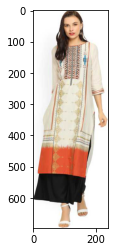

In [ ]:
feature_list = []
x=0
for i in tqdm(df['images']):
    print(i)
    urllib.request.urlretrieve(i, f'image{x}.jpg')
    filename="/content/" +f"image{x}.jpg"
    img=img1.open(filename)
    plt.imshow(img)
    feature_list.append(extract_features(filename,model))
    x=x+1

In [ ]:
len(feature_list)

2788

In [ ]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))

## Recommending algorithms

In [ ]:
def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)
    distances, indices = neighbors.kneighbors([features])
    return indices

## Recommendations

In [ ]:
indices=recommend(feature_list[2787],feature_list)

In [ ]:
indices

array([[2787, 2774, 2721, 1792, 2608, 2531]])

In [ ]:
print(df.images[2787])

https://rukminim1.flixcart.com/image/580/696/jfikknk0/kurta/q/h/y/s-18fe17004-50203-w-original-imaf3yj76pb8mjqa.jpeg?q=50


In [ ]:
for file in indices[0][1:]:
  print(df.iloc[file:file+1])
  print(df.images[file])

                                                 images brands  price  rating  \
2774  https://rukminim1.flixcart.com/image/580/696/k...     W    1699     4.0   

     category  gender  
2774    kurta  female  
https://rukminim1.flixcart.com/image/580/696/kurta/v/j/p/s-16au16173-72057-w-original-imaerawcwgxxk5hz.jpeg?q=50
                                                 images brands  price  rating  \
2721  https://rukminim1.flixcart.com/image/580/696/k...     W    1799     3.0   

     category  gender  
2721    kurta  female  
https://rukminim1.flixcart.com/image/580/696/kurta/e/k/v/s-16au16035-57983-w-original-imaequj8fngh4z3g.jpeg?q=50
                                                 images    brands  price  \
1792  https://rukminim1.flixcart.com/image/330/396/k...  HALSONS    3327   

      rating category  gender  
1792     4.8    saree  female  
https://rukminim1.flixcart.com/image/330/396/kj36ky80-0/sari/d/q/i/free-ha-31751-halsons-unstitched-original-imafyqufahvhyufg.jpeg?q=50